In [87]:
import numpy as np
import seaborn as sns
import os 
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim


Displaying The Images

In [88]:
picture_size = 48
folder_path = "E:/Projects/Emotion Recognition/images/images/train/"

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_11868\1573020728.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


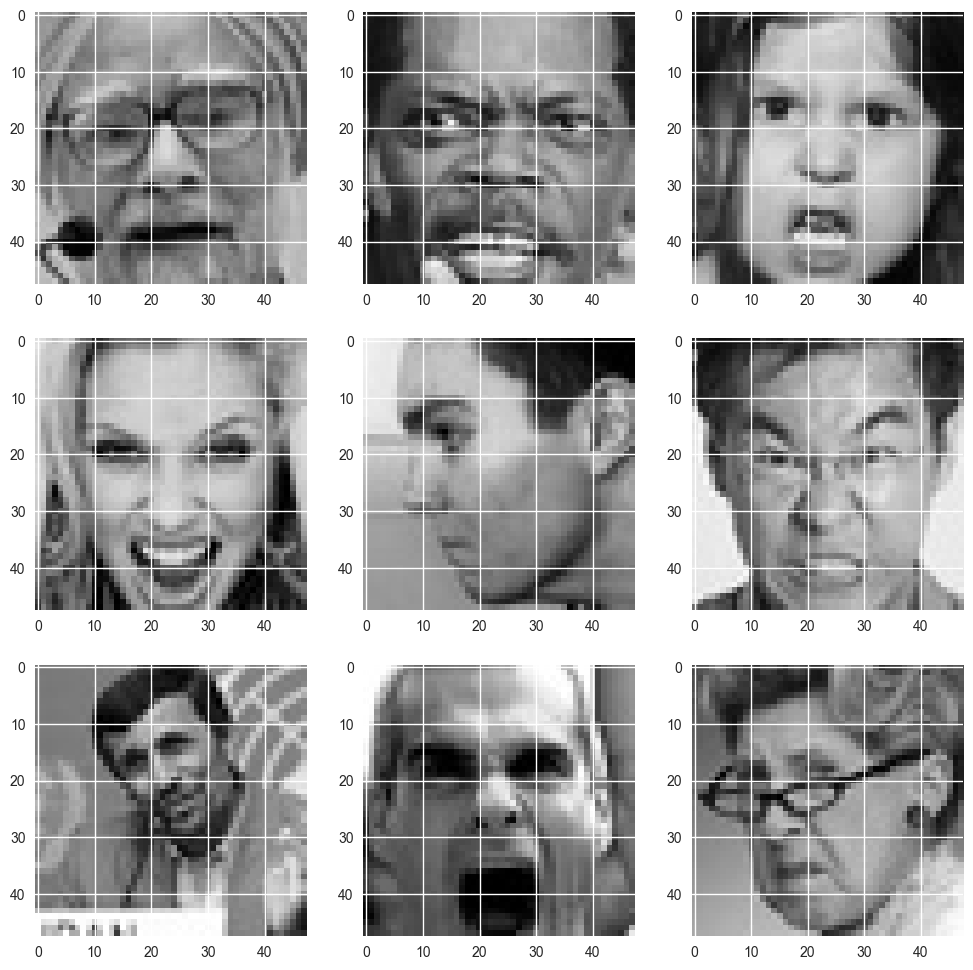

In [89]:
expression = 'angry'
plt.style.use('seaborn')
plt.figure(figsize=(12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path + expression + "/" +os.listdir(folder_path + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

Data Preprocessing

In [90]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Set the path to your data
folder_path = "E:/Projects/Emotion Recognition/images/images/"
train_path = folder_path + 'train'
val_path = folder_path + 'validation'

# Set the image size and batch size
picture_size = 48
batch_size = 128

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((picture_size, picture_size)),
    transforms.ToTensor(),  # Convert to PyTorch tensor
])

# Create ImageFolder datasets
train_dataset = ImageFolder(root=train_path, transform=transform)
val_dataset = ImageFolder(root=val_path, transform=transform)

# Create DataLoader for training and validation
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)


Building The Model

In [91]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNNModel(nn.Module):
    def __init__(self, no_of_classes):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(64)
        self.activation1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=5, padding=2)
        self.batchnorm2 = nn.BatchNorm2d(128)
        self.activation2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(128, 512, kernel_size=3, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(512)
        self.activation3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout3 = nn.Dropout(0.25)

        self.conv4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.batchnorm4 = nn.BatchNorm2d(512)
        self.activation4 = nn.ReLU()
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout4 = nn.Dropout(0.25)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(4608, 256)
        self.batchnorm_fc1 = nn.BatchNorm1d(256)
        self.activation_fc1 = nn.ReLU()
        self.dropout_fc1 = nn.Dropout(0.25)

        self.fc2 = nn.Linear(256, 512)
        self.batchnorm_fc2 = nn.BatchNorm1d(512)
        self.activation_fc2 = nn.ReLU()
        self.dropout_fc2 = nn.Dropout(0.25)

        self.fc3 = nn.Linear(512, no_of_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.dropout1(self.maxpool1(self.activation1(self.batchnorm1(self.conv1(x)))))
        x = self.dropout2(self.maxpool2(self.activation2(self.batchnorm2(self.conv2(x)))))
        x = self.dropout3(self.maxpool3(self.activation3(self.batchnorm3(self.conv3(x)))))
        x = self.dropout4(self.maxpool4(self.activation4(self.batchnorm4(self.conv4(x)))))

        # Flatten the output from the last convolutional layer
        x = x.view(x.size(0), -1)

        # Check the size before the first fully connected layer
        print(x.size())

        x = self.dropout_fc1(self.activation_fc1(self.batchnorm_fc1(self.fc1(x))))
        x = self.dropout_fc2(self.activation_fc2(self.batchnorm_fc2(self.fc2(x))))
        
        x = self.fc3(x)

        return x

# Define the model
no_of_classes = 7
model = CNNModel(no_of_classes)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Print the model summary
print(model)


CNNModel(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.25, inplace=False)
  (conv3): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout3): Dropout(p=0.25, inplace=

In [92]:
# Move the model to CUDA if available
model = model.to('cuda') if torch.cuda.is_available() else model

In [94]:
import torch
from tqdm import tqdm

# Assuming model, train_loader, and val_loader are defined

# Move data loaders to CUDA
if torch.cuda.is_available():
    train_loader = [(images.to('cuda'), labels.to('cuda')) for images, labels in tqdm(train_loader, desc='Moving Training Data to CUDA')]
    val_loader = [(images.to('cuda'), labels.to('cuda')) for images, labels in tqdm(val_loader, desc='Moving Validation Data to CUDA')]


Moving Validation Data to CUDA: 100%|██████████| 56/56 [01:08<00:00,  1.23s/it]


In [95]:
# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Number of training epochs
epochs = 50

# Lists to store training and validation losses and accuracies
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop with tqdm progress bar
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Initialize tqdm bar for training
    train_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}, Training')

    epoch_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_bar:
        optimizer.zero_grad()  # Zero gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        epoch_train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy for the epoch
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)

    # Update the progress bar after each epoch
    train_bar.set_postfix(loss=avg_train_loss, accuracy=train_accuracy)
    train_bar.close()

    # Validation loop with tqdm progress bar
    model.eval()  # Set the model to evaluation mode
    val_bar = tqdm(val_loader, desc=f'Epoch {epoch + 1}/{epochs}, Validation')

    epoch_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_bar:
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss

            epoch_val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calculate average validation loss and accuracy for the epoch
    avg_val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accuracy = correct_val / total_val
    val_accuracies.append(val_accuracy)

    # Update the progress bar after each epoch
    val_bar.set_postfix(loss=avg_val_loss, accuracy=val_accuracy)
    val_bar.close()


Epoch 1/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 1/50, Training:   0%|          | 1/226 [00:01<06:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   1%|          | 2/226 [00:03<06:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   1%|▏         | 3/226 [00:05<06:32,  1.76s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   2%|▏         | 4/226 [00:07<06:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   2%|▏         | 5/226 [00:08<06:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   3%|▎         | 6/226 [00:10<06:27,  1.76s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   3%|▎         | 7/226 [00:12<06:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   4%|▎         | 8/226 [00:14<06:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   4%|▍         | 9/226 [00:15<06:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   4%|▍         | 10/226 [00:17<06:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   5%|▍         | 11/226 [00:19<06:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   5%|▌         | 12/226 [00:20<06:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   6%|▌         | 13/226 [00:22<06:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   6%|▌         | 14/226 [00:24<06:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   7%|▋         | 15/226 [00:26<06:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   7%|▋         | 16/226 [00:27<06:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   8%|▊         | 17/226 [00:29<06:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   8%|▊         | 18/226 [00:31<06:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   8%|▊         | 19/226 [00:33<06:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   9%|▉         | 20/226 [00:34<05:59,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:   9%|▉         | 21/226 [00:36<05:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  10%|▉         | 22/226 [00:38<05:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  10%|█         | 23/226 [00:40<05:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  11%|█         | 24/226 [00:41<05:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  11%|█         | 25/226 [00:43<05:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  12%|█▏        | 26/226 [00:45<05:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  12%|█▏        | 27/226 [00:47<05:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  12%|█▏        | 28/226 [00:48<05:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  13%|█▎        | 29/226 [00:50<05:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  13%|█▎        | 30/226 [00:52<05:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  14%|█▎        | 31/226 [00:54<05:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  14%|█▍        | 32/226 [00:55<05:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  15%|█▍        | 33/226 [00:57<05:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  15%|█▌        | 34/226 [00:59<05:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  15%|█▌        | 35/226 [01:01<05:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  16%|█▌        | 36/226 [01:02<05:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  16%|█▋        | 37/226 [01:04<05:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  17%|█▋        | 38/226 [01:06<05:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  17%|█▋        | 39/226 [01:07<05:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  18%|█▊        | 40/226 [01:09<05:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  18%|█▊        | 41/226 [01:11<05:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  19%|█▊        | 42/226 [01:13<05:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  19%|█▉        | 43/226 [01:15<05:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  19%|█▉        | 44/226 [01:16<05:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  20%|█▉        | 45/226 [01:18<05:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  20%|██        | 46/226 [01:20<05:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  21%|██        | 47/226 [01:21<05:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  21%|██        | 48/226 [01:23<05:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  22%|██▏       | 49/226 [01:25<05:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  22%|██▏       | 50/226 [01:27<05:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  23%|██▎       | 51/226 [01:28<05:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  23%|██▎       | 52/226 [01:30<05:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  23%|██▎       | 53/226 [01:32<05:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  24%|██▍       | 54/226 [01:34<05:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  24%|██▍       | 55/226 [01:35<04:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  25%|██▍       | 56/226 [01:37<04:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  25%|██▌       | 57/226 [01:39<04:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  26%|██▌       | 58/226 [01:41<04:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  26%|██▌       | 59/226 [01:42<04:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  27%|██▋       | 60/226 [01:44<04:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  27%|██▋       | 61/226 [01:46<04:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  27%|██▋       | 62/226 [01:48<04:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  28%|██▊       | 63/226 [01:49<04:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  28%|██▊       | 64/226 [01:51<04:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  29%|██▉       | 65/226 [01:53<04:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  29%|██▉       | 66/226 [01:55<04:43,  1.77s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  30%|██▉       | 67/226 [01:56<04:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  30%|███       | 68/226 [01:58<04:40,  1.78s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  31%|███       | 69/226 [02:00<04:39,  1.78s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  31%|███       | 70/226 [02:02<04:38,  1.79s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  31%|███▏      | 71/226 [02:04<04:34,  1.77s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  32%|███▏      | 72/226 [02:05<04:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  32%|███▏      | 73/226 [02:07<04:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  33%|███▎      | 74/226 [02:09<04:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  33%|███▎      | 75/226 [02:11<04:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  34%|███▎      | 76/226 [02:12<04:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  34%|███▍      | 77/226 [02:14<04:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  35%|███▍      | 78/226 [02:16<04:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  35%|███▍      | 79/226 [02:18<04:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  35%|███▌      | 80/226 [02:19<04:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  36%|███▌      | 81/226 [02:21<04:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  36%|███▋      | 82/226 [02:23<04:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  37%|███▋      | 83/226 [02:24<04:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  37%|███▋      | 84/226 [02:26<04:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  38%|███▊      | 85/226 [02:28<04:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  38%|███▊      | 86/226 [02:30<04:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  38%|███▊      | 87/226 [02:31<04:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  39%|███▉      | 88/226 [02:33<04:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  39%|███▉      | 89/226 [02:35<03:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  40%|███▉      | 90/226 [02:37<03:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  40%|████      | 91/226 [02:38<03:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  41%|████      | 92/226 [02:40<03:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  41%|████      | 93/226 [02:42<03:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  42%|████▏     | 94/226 [02:44<03:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  42%|████▏     | 95/226 [02:45<03:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  42%|████▏     | 96/226 [02:47<03:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  43%|████▎     | 97/226 [02:49<03:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  43%|████▎     | 98/226 [02:51<03:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  44%|████▍     | 99/226 [02:52<03:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  44%|████▍     | 100/226 [02:54<03:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  45%|████▍     | 101/226 [02:56<03:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  45%|████▌     | 102/226 [02:57<03:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  46%|████▌     | 103/226 [02:59<03:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  46%|████▌     | 104/226 [03:01<03:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  46%|████▋     | 105/226 [03:03<03:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  47%|████▋     | 106/226 [03:04<03:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  47%|████▋     | 107/226 [03:06<03:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  48%|████▊     | 108/226 [03:08<03:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  48%|████▊     | 109/226 [03:10<03:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  49%|████▊     | 110/226 [03:11<03:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  49%|████▉     | 111/226 [03:13<03:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  50%|████▉     | 112/226 [03:15<03:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  50%|█████     | 113/226 [03:17<03:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  50%|█████     | 114/226 [03:18<03:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  51%|█████     | 115/226 [03:20<03:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  51%|█████▏    | 116/226 [03:22<03:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  52%|█████▏    | 117/226 [03:24<03:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  52%|█████▏    | 118/226 [03:25<03:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  53%|█████▎    | 119/226 [03:27<03:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  53%|█████▎    | 120/226 [03:29<03:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  54%|█████▎    | 121/226 [03:31<03:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  54%|█████▍    | 122/226 [03:32<03:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  54%|█████▍    | 123/226 [03:34<02:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  55%|█████▍    | 124/226 [03:36<02:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  55%|█████▌    | 125/226 [03:38<02:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  56%|█████▌    | 126/226 [03:39<02:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  56%|█████▌    | 127/226 [03:41<02:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  57%|█████▋    | 128/226 [03:43<02:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  57%|█████▋    | 129/226 [03:44<02:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  58%|█████▊    | 130/226 [03:46<02:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  58%|█████▊    | 131/226 [03:48<02:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  58%|█████▊    | 132/226 [03:50<02:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  59%|█████▉    | 133/226 [03:51<02:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  59%|█████▉    | 134/226 [03:53<02:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  60%|█████▉    | 135/226 [03:55<02:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  60%|██████    | 136/226 [03:57<02:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  61%|██████    | 137/226 [03:58<02:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  61%|██████    | 138/226 [04:00<02:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  62%|██████▏   | 139/226 [04:02<02:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  62%|██████▏   | 140/226 [04:04<02:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  62%|██████▏   | 141/226 [04:05<02:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  63%|██████▎   | 142/226 [04:07<02:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  63%|██████▎   | 143/226 [04:09<02:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  64%|██████▎   | 144/226 [04:11<02:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  64%|██████▍   | 145/226 [04:12<02:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  65%|██████▍   | 146/226 [04:14<02:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  65%|██████▌   | 147/226 [04:16<02:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  65%|██████▌   | 148/226 [04:18<02:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  66%|██████▌   | 149/226 [04:19<02:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  66%|██████▋   | 150/226 [04:21<02:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  67%|██████▋   | 151/226 [04:23<02:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  67%|██████▋   | 152/226 [04:24<02:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  68%|██████▊   | 153/226 [04:26<02:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  68%|██████▊   | 154/226 [04:28<02:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  69%|██████▊   | 155/226 [04:30<02:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  69%|██████▉   | 156/226 [04:31<02:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  69%|██████▉   | 157/226 [04:33<01:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  70%|██████▉   | 158/226 [04:35<01:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  70%|███████   | 159/226 [04:37<01:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  71%|███████   | 160/226 [04:38<01:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  71%|███████   | 161/226 [04:40<01:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  72%|███████▏  | 162/226 [04:42<01:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  72%|███████▏  | 163/226 [04:44<01:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  73%|███████▎  | 164/226 [04:45<01:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  73%|███████▎  | 165/226 [04:47<01:45,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  73%|███████▎  | 166/226 [04:49<01:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  74%|███████▍  | 167/226 [04:50<01:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  74%|███████▍  | 168/226 [04:52<01:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  75%|███████▍  | 169/226 [04:54<01:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  75%|███████▌  | 170/226 [04:56<01:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  76%|███████▌  | 171/226 [04:57<01:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  76%|███████▌  | 172/226 [04:59<01:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  77%|███████▋  | 173/226 [05:01<01:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  77%|███████▋  | 174/226 [05:03<01:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  77%|███████▋  | 175/226 [05:04<01:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  78%|███████▊  | 176/226 [05:06<01:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  78%|███████▊  | 177/226 [05:08<01:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  79%|███████▉  | 178/226 [05:10<01:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  79%|███████▉  | 179/226 [05:11<01:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  80%|███████▉  | 180/226 [05:13<01:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  80%|████████  | 181/226 [05:15<01:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  81%|████████  | 182/226 [05:17<01:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  81%|████████  | 183/226 [05:18<01:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  81%|████████▏ | 184/226 [05:20<01:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  82%|████████▏ | 185/226 [05:22<01:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  82%|████████▏ | 186/226 [05:24<01:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  83%|████████▎ | 187/226 [05:25<01:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  83%|████████▎ | 188/226 [05:27<01:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  84%|████████▎ | 189/226 [05:29<01:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  84%|████████▍ | 190/226 [05:30<01:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  85%|████████▍ | 191/226 [05:32<01:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  85%|████████▍ | 192/226 [05:34<00:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  85%|████████▌ | 193/226 [05:36<00:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  86%|████████▌ | 194/226 [05:37<00:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  86%|████████▋ | 195/226 [05:39<00:53,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  87%|████████▋ | 196/226 [05:41<00:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  87%|████████▋ | 197/226 [05:43<00:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  88%|████████▊ | 198/226 [05:44<00:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  88%|████████▊ | 199/226 [05:46<00:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  88%|████████▊ | 200/226 [05:48<00:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  89%|████████▉ | 201/226 [05:50<00:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  89%|████████▉ | 202/226 [05:51<00:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  90%|████████▉ | 203/226 [05:53<00:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  90%|█████████ | 204/226 [05:55<00:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  91%|█████████ | 205/226 [05:56<00:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  91%|█████████ | 206/226 [05:58<00:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  92%|█████████▏| 207/226 [06:00<00:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  92%|█████████▏| 208/226 [06:02<00:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  92%|█████████▏| 209/226 [06:03<00:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  93%|█████████▎| 210/226 [06:05<00:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  93%|█████████▎| 211/226 [06:07<00:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  94%|█████████▍| 212/226 [06:09<00:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  94%|█████████▍| 213/226 [06:10<00:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  95%|█████████▍| 214/226 [06:12<00:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  95%|█████████▌| 215/226 [06:14<00:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  96%|█████████▌| 216/226 [06:16<00:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  96%|█████████▌| 217/226 [06:17<00:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  96%|█████████▋| 218/226 [06:19<00:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  97%|█████████▋| 219/226 [06:21<00:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  97%|█████████▋| 220/226 [06:23<00:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  98%|█████████▊| 221/226 [06:24<00:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  98%|█████████▊| 222/226 [06:26<00:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  99%|█████████▊| 223/226 [06:28<00:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training:  99%|█████████▉| 224/226 [06:29<00:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 1/50, Training: 100%|█████████▉| 225/226 [06:31<00:01,  1.74s/it]

torch.Size([21, 4608])


Epoch 1/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.41it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:   4%|▎         | 2/56 [00:01<00:37,  1.43it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:   5%|▌         | 3/56 [00:02<00:37,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:   7%|▋         | 4/56 [00:02<00:36,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:   9%|▉         | 5/56 [00:03<00:35,  1.43it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  11%|█         | 6/56 [00:04<00:35,  1.43it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  12%|█▎        | 7/56 [00:04<00:34,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  14%|█▍        | 8/56 [00:05<00:33,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  18%|█▊        | 10/56 [00:07<00:32,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  20%|█▉        | 11/56 [00:07<00:31,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  25%|██▌       | 14/56 [00:09<00:29,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  27%|██▋       | 15/56 [00:10<00:28,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.43it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  30%|███       | 17/56 [00:11<00:27,  1.43it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  32%|███▏      | 18/56 [00:12<00:26,  1.43it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  34%|███▍      | 19/56 [00:13<00:25,  1.43it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  38%|███▊      | 21/56 [00:14<00:24,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  39%|███▉      | 22/56 [00:15<00:23,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.43it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  43%|████▎     | 24/56 [00:16<00:22,  1.43it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  45%|████▍     | 25/56 [00:17<00:21,  1.43it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.43it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  48%|████▊     | 27/56 [00:18<00:20,  1.43it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  50%|█████     | 28/56 [00:19<00:19,  1.41it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  52%|█████▏    | 29/56 [00:20<00:19,  1.41it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  54%|█████▎    | 30/56 [00:21<00:18,  1.41it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  55%|█████▌    | 31/56 [00:21<00:17,  1.41it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  57%|█████▋    | 32/56 [00:22<00:16,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.40it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  61%|██████    | 34/56 [00:23<00:15,  1.41it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  62%|██████▎   | 35/56 [00:24<00:14,  1.41it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  64%|██████▍   | 36/56 [00:25<00:14,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  66%|██████▌   | 37/56 [00:26<00:13,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  68%|██████▊   | 38/56 [00:26<00:12,  1.42it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  70%|██████▉   | 39/56 [00:27<00:11,  1.44it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  71%|███████▏  | 40/56 [00:28<00:10,  1.46it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  73%|███████▎  | 41/56 [00:28<00:10,  1.48it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  75%|███████▌  | 42/56 [00:29<00:09,  1.49it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  77%|███████▋  | 43/56 [00:30<00:08,  1.50it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  79%|███████▊  | 44/56 [00:30<00:07,  1.50it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  80%|████████  | 45/56 [00:31<00:07,  1.50it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  82%|████████▏ | 46/56 [00:32<00:06,  1.52it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  84%|████████▍ | 47/56 [00:32<00:06,  1.50it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  86%|████████▌ | 48/56 [00:33<00:05,  1.51it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  88%|████████▊ | 49/56 [00:34<00:04,  1.52it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  89%|████████▉ | 50/56 [00:34<00:03,  1.51it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  91%|█████████ | 51/56 [00:35<00:03,  1.52it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  93%|█████████▎| 52/56 [00:36<00:02,  1.51it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  95%|█████████▍| 53/56 [00:36<00:01,  1.52it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation:  96%|█████████▋| 54/56 [00:37<00:01,  1.50it/s]

torch.Size([128, 4608])


Epoch 1/50, Validation: 100%|██████████| 56/56 [00:38<00:00,  1.90it/s]

torch.Size([26, 4608])


Epoch 2/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 2/50, Training:   0%|          | 1/226 [00:01<06:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   1%|          | 2/226 [00:03<06:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   1%|▏         | 3/226 [00:05<06:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   2%|▏         | 4/226 [00:06<06:19,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   2%|▏         | 5/226 [00:08<06:14,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   3%|▎         | 6/226 [00:10<06:10,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   3%|▎         | 7/226 [00:11<06:05,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   4%|▎         | 8/226 [00:13<06:02,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   4%|▍         | 9/226 [00:15<06:00,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   4%|▍         | 10/226 [00:16<05:58,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   5%|▍         | 11/226 [00:18<05:56,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   5%|▌         | 12/226 [00:20<05:53,  1.65s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   6%|▌         | 13/226 [00:21<05:52,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   6%|▌         | 14/226 [00:23<05:54,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   7%|▋         | 15/226 [00:25<05:56,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   7%|▋         | 16/226 [00:26<05:58,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   8%|▊         | 17/226 [00:28<05:57,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   8%|▊         | 18/226 [00:30<05:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   8%|▊         | 19/226 [00:32<05:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   9%|▉         | 20/226 [00:33<05:50,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:   9%|▉         | 21/226 [00:35<05:45,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  10%|▉         | 22/226 [00:37<05:42,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  10%|█         | 23/226 [00:38<05:39,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  11%|█         | 24/226 [00:40<05:36,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  11%|█         | 25/226 [00:42<05:34,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  12%|█▏        | 26/226 [00:43<05:33,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  12%|█▏        | 27/226 [00:45<05:36,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  12%|█▏        | 28/226 [00:47<05:37,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  13%|█▎        | 29/226 [00:48<05:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  13%|█▎        | 30/226 [00:50<05:32,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  14%|█▎        | 31/226 [00:52<05:29,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  14%|█▍        | 32/226 [00:53<05:25,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  15%|█▍        | 33/226 [00:55<05:21,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  15%|█▌        | 34/226 [00:57<05:18,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  15%|█▌        | 35/226 [00:58<05:17,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  16%|█▌        | 36/226 [01:00<05:15,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  16%|█▋        | 37/226 [01:02<05:13,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  17%|█▋        | 38/226 [01:03<05:10,  1.65s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  17%|█▋        | 39/226 [01:05<05:09,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  18%|█▊        | 40/226 [01:07<05:08,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  18%|█▊        | 41/226 [01:08<05:10,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  19%|█▊        | 42/226 [01:10<05:11,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  19%|█▉        | 43/226 [01:12<05:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  19%|█▉        | 44/226 [01:14<05:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  20%|█▉        | 45/226 [01:15<05:11,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  20%|██        | 46/226 [01:17<05:05,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  21%|██        | 47/226 [01:19<05:00,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  21%|██        | 48/226 [01:20<04:58,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  22%|██▏       | 49/226 [01:22<04:55,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  22%|██▏       | 50/226 [01:24<04:53,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  23%|██▎       | 51/226 [01:25<04:51,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  23%|██▎       | 52/226 [01:27<04:52,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  23%|██▎       | 53/226 [01:29<04:54,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  24%|██▍       | 54/226 [01:31<04:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  24%|██▍       | 55/226 [01:32<04:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  25%|██▍       | 56/226 [01:34<04:49,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  25%|██▌       | 57/226 [01:36<04:45,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  26%|██▌       | 58/226 [01:37<04:42,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  26%|██▌       | 59/226 [01:39<04:38,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  27%|██▋       | 60/226 [01:41<04:36,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  27%|██▋       | 61/226 [01:42<04:34,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  27%|██▋       | 62/226 [01:44<04:32,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  28%|██▊       | 63/226 [01:46<04:32,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  28%|██▊       | 64/226 [01:47<04:30,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  29%|██▉       | 65/226 [01:49<04:28,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  29%|██▉       | 66/226 [01:51<04:28,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  30%|██▉       | 67/226 [01:52<04:29,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  30%|███       | 68/226 [01:54<04:29,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  31%|███       | 69/226 [01:56<04:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  31%|███       | 70/226 [01:57<04:28,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  31%|███▏      | 71/226 [01:59<04:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  32%|███▏      | 72/226 [02:01<04:21,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  32%|███▏      | 73/226 [02:03<04:18,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  33%|███▎      | 74/226 [02:04<04:15,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  33%|███▎      | 75/226 [02:06<04:13,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  34%|███▎      | 76/226 [02:07<04:10,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  34%|███▍      | 77/226 [02:09<04:07,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  35%|███▍      | 78/226 [02:11<04:08,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  35%|███▍      | 79/226 [02:13<04:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  35%|███▌      | 80/226 [02:14<04:08,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  36%|███▌      | 81/226 [02:16<04:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  36%|███▋      | 82/226 [02:18<04:03,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  37%|███▋      | 83/226 [02:19<04:00,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  37%|███▋      | 84/226 [02:21<03:56,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  38%|███▊      | 85/226 [02:23<03:54,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  38%|███▊      | 86/226 [02:24<03:52,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  38%|███▊      | 87/226 [02:26<03:51,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  39%|███▉      | 88/226 [02:28<03:48,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  39%|███▉      | 89/226 [02:29<03:47,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  40%|███▉      | 90/226 [02:31<03:45,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  40%|████      | 91/226 [02:33<03:43,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  41%|████      | 92/226 [02:34<03:44,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  41%|████      | 93/226 [02:36<03:45,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  42%|████▏     | 94/226 [02:38<03:45,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  42%|████▏     | 95/226 [02:40<03:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  42%|████▏     | 96/226 [02:41<03:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  43%|████▎     | 97/226 [02:43<03:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  43%|████▎     | 98/226 [02:45<03:36,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  44%|████▍     | 99/226 [02:46<03:33,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  44%|████▍     | 100/226 [02:48<03:29,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  45%|████▍     | 101/226 [02:50<03:27,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  45%|████▌     | 102/226 [02:51<03:25,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  46%|████▌     | 103/226 [02:53<03:23,  1.65s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  46%|████▌     | 104/226 [02:55<03:24,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  46%|████▋     | 105/226 [02:56<03:25,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  47%|████▋     | 106/226 [02:58<03:24,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  47%|████▋     | 107/226 [03:00<03:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  48%|████▊     | 108/226 [03:01<03:19,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  48%|████▊     | 109/226 [03:03<03:17,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  49%|████▊     | 110/226 [03:05<03:14,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  49%|████▉     | 111/226 [03:06<03:12,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  50%|████▉     | 112/226 [03:08<03:10,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  50%|█████     | 113/226 [03:10<03:08,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  50%|█████     | 114/226 [03:11<03:05,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  51%|█████     | 115/226 [03:13<03:04,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  51%|█████▏    | 116/226 [03:15<03:02,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  52%|█████▏    | 117/226 [03:16<03:00,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  52%|█████▏    | 118/226 [03:18<03:01,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  53%|█████▎    | 119/226 [03:20<03:01,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  53%|█████▎    | 120/226 [03:22<03:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  54%|█████▎    | 121/226 [03:23<03:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  54%|█████▍    | 122/226 [03:25<02:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  54%|█████▍    | 123/226 [03:27<02:55,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  55%|█████▍    | 124/226 [03:28<02:53,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  55%|█████▌    | 125/226 [03:30<02:49,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  56%|█████▌    | 126/226 [03:32<02:47,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  56%|█████▌    | 127/226 [03:33<02:44,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  57%|█████▋    | 128/226 [03:35<02:43,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  57%|█████▋    | 129/226 [03:37<02:40,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  58%|█████▊    | 130/226 [03:38<02:41,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  58%|█████▊    | 131/226 [03:40<02:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  58%|█████▊    | 132/226 [03:42<02:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  59%|█████▉    | 133/226 [03:44<02:38,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  59%|█████▉    | 134/226 [03:45<02:35,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  60%|█████▉    | 135/226 [03:47<02:33,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  60%|██████    | 136/226 [03:48<02:30,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  61%|██████    | 137/226 [03:50<02:28,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  61%|██████    | 138/226 [03:52<02:26,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  62%|██████▏   | 139/226 [03:53<02:24,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  62%|██████▏   | 140/226 [03:55<02:22,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  62%|██████▏   | 141/226 [03:57<02:20,  1.65s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  63%|██████▎   | 142/226 [03:58<02:18,  1.65s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  63%|██████▎   | 143/226 [04:00<02:17,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  64%|██████▎   | 144/226 [04:02<02:17,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  64%|██████▍   | 145/226 [04:04<02:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  65%|██████▍   | 146/226 [04:05<02:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  65%|██████▌   | 147/226 [04:07<02:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  65%|██████▌   | 148/226 [04:09<02:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  66%|██████▌   | 149/226 [04:10<02:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  66%|██████▋   | 150/226 [04:12<02:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  67%|██████▋   | 151/226 [04:14<02:06,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  67%|██████▋   | 152/226 [04:15<02:04,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  68%|██████▊   | 153/226 [04:17<02:02,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  68%|██████▊   | 154/226 [04:19<02:00,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  69%|██████▊   | 155/226 [04:20<01:58,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  69%|██████▉   | 156/226 [04:22<01:58,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  69%|██████▉   | 157/226 [04:24<01:57,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  70%|██████▉   | 158/226 [04:26<01:56,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  70%|███████   | 159/226 [04:27<01:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  71%|███████   | 160/226 [04:29<01:51,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  71%|███████   | 161/226 [04:31<01:49,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  72%|███████▏  | 162/226 [04:32<01:47,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  72%|███████▏  | 163/226 [04:34<01:44,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  73%|███████▎  | 164/226 [04:36<01:43,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  73%|███████▎  | 165/226 [04:37<01:41,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  73%|███████▎  | 166/226 [04:39<01:40,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  74%|███████▍  | 167/226 [04:41<01:37,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  74%|███████▍  | 168/226 [04:42<01:36,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  75%|███████▍  | 169/226 [04:44<01:34,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  75%|███████▌  | 170/226 [04:46<01:33,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  76%|███████▌  | 171/226 [04:47<01:33,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  76%|███████▌  | 172/226 [04:49<01:32,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  77%|███████▋  | 173/226 [04:51<01:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  77%|███████▋  | 174/226 [04:53<01:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  77%|███████▋  | 175/226 [04:54<01:27,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  78%|███████▊  | 176/226 [04:56<01:24,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  78%|███████▊  | 177/226 [04:58<01:22,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  79%|███████▉  | 178/226 [04:59<01:20,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  79%|███████▉  | 179/226 [05:01<01:18,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  80%|███████▉  | 180/226 [05:03<01:16,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  80%|████████  | 181/226 [05:04<01:15,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  81%|████████  | 182/226 [05:06<01:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  81%|████████  | 183/226 [05:08<01:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  81%|████████▏ | 184/226 [05:10<01:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  82%|████████▏ | 185/226 [05:11<01:09,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  82%|████████▏ | 186/226 [05:13<01:07,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  83%|████████▎ | 187/226 [05:15<01:05,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  83%|████████▎ | 188/226 [05:16<01:03,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  84%|████████▎ | 189/226 [05:18<01:01,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  84%|████████▍ | 190/226 [05:19<00:59,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  85%|████████▍ | 191/226 [05:21<00:58,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  85%|████████▍ | 192/226 [05:23<00:56,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  85%|████████▌ | 193/226 [05:24<00:54,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  86%|████████▌ | 194/226 [05:26<00:53,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  86%|████████▋ | 195/226 [05:28<00:51,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  87%|████████▋ | 196/226 [05:30<00:50,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  87%|████████▋ | 197/226 [05:31<00:49,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  88%|████████▊ | 198/226 [05:33<00:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  88%|████████▊ | 199/226 [05:35<00:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  88%|████████▊ | 200/226 [05:36<00:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  89%|████████▉ | 201/226 [05:38<00:42,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  89%|████████▉ | 202/226 [05:40<00:40,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  90%|████████▉ | 203/226 [05:41<00:38,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  90%|█████████ | 204/226 [05:43<00:36,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  91%|█████████ | 205/226 [05:45<00:35,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  91%|█████████ | 206/226 [05:46<00:33,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  92%|█████████▏| 207/226 [05:48<00:31,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  92%|█████████▏| 208/226 [05:50<00:30,  1.69s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  92%|█████████▏| 209/226 [05:52<00:29,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  93%|█████████▎| 210/226 [05:53<00:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  93%|█████████▎| 211/226 [05:55<00:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  94%|█████████▍| 212/226 [05:57<00:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  94%|█████████▍| 213/226 [05:58<00:21,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  95%|█████████▍| 214/226 [06:00<00:20,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  95%|█████████▌| 215/226 [06:02<00:18,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  96%|█████████▌| 216/226 [06:03<00:16,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  96%|█████████▌| 217/226 [06:05<00:14,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  96%|█████████▋| 218/226 [06:07<00:13,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  97%|█████████▋| 219/226 [06:08<00:11,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  97%|█████████▋| 220/226 [06:10<00:09,  1.66s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  98%|█████████▊| 221/226 [06:12<00:08,  1.67s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  98%|█████████▊| 222/226 [06:13<00:06,  1.68s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  99%|█████████▊| 223/226 [06:15<00:05,  1.70s/it]

torch.Size([128, 4608])


Epoch 2/50, Training:  99%|█████████▉| 224/226 [06:17<00:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 2/50, Training: 100%|█████████▉| 225/226 [06:19<00:01,  1.72s/it]

torch.Size([21, 4608])


Epoch 2/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:   2%|▏         | 1/56 [00:00<00:37,  1.45it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:   4%|▎         | 2/56 [00:01<00:36,  1.48it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:   5%|▌         | 3/56 [00:02<00:35,  1.48it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:   7%|▋         | 4/56 [00:02<00:34,  1.49it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:   9%|▉         | 5/56 [00:03<00:33,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  11%|█         | 6/56 [00:04<00:33,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  12%|█▎        | 7/56 [00:04<00:32,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  14%|█▍        | 8/56 [00:05<00:31,  1.52it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  16%|█▌        | 9/56 [00:05<00:31,  1.51it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  18%|█▊        | 10/56 [00:06<00:30,  1.52it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  20%|█▉        | 11/56 [00:07<00:30,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  21%|██▏       | 12/56 [00:07<00:29,  1.51it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  23%|██▎       | 13/56 [00:08<00:28,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  25%|██▌       | 14/56 [00:09<00:27,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  27%|██▋       | 15/56 [00:10<00:27,  1.49it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  29%|██▊       | 16/56 [00:10<00:26,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  30%|███       | 17/56 [00:11<00:26,  1.49it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  32%|███▏      | 18/56 [00:12<00:25,  1.47it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  34%|███▍      | 19/56 [00:12<00:25,  1.45it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  36%|███▌      | 20/56 [00:13<00:24,  1.44it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  38%|███▊      | 21/56 [00:14<00:24,  1.43it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  39%|███▉      | 22/56 [00:14<00:23,  1.43it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  41%|████      | 23/56 [00:15<00:23,  1.42it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  43%|████▎     | 24/56 [00:16<00:22,  1.42it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  45%|████▍     | 25/56 [00:17<00:21,  1.42it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  46%|████▋     | 26/56 [00:17<00:21,  1.41it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  48%|████▊     | 27/56 [00:18<00:20,  1.43it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  50%|█████     | 28/56 [00:19<00:19,  1.46it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  52%|█████▏    | 29/56 [00:19<00:18,  1.47it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  54%|█████▎    | 30/56 [00:20<00:17,  1.49it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  55%|█████▌    | 31/56 [00:21<00:16,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  57%|█████▋    | 32/56 [00:21<00:15,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  59%|█████▉    | 33/56 [00:22<00:15,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  61%|██████    | 34/56 [00:23<00:14,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  62%|██████▎   | 35/56 [00:23<00:13,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  64%|██████▍   | 36/56 [00:24<00:13,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  66%|██████▌   | 37/56 [00:25<00:12,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  68%|██████▊   | 38/56 [00:25<00:12,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  70%|██████▉   | 39/56 [00:26<00:11,  1.51it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  71%|███████▏  | 40/56 [00:27<00:10,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  73%|███████▎  | 41/56 [00:27<00:09,  1.51it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  75%|███████▌  | 42/56 [00:28<00:09,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  77%|███████▋  | 43/56 [00:29<00:08,  1.51it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  79%|███████▊  | 44/56 [00:29<00:07,  1.52it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  80%|████████  | 45/56 [00:30<00:07,  1.51it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  82%|████████▏ | 46/56 [00:30<00:06,  1.52it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  84%|████████▍ | 47/56 [00:31<00:05,  1.51it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  86%|████████▌ | 48/56 [00:32<00:05,  1.51it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  88%|████████▊ | 49/56 [00:32<00:04,  1.49it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  89%|████████▉ | 50/56 [00:33<00:03,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  91%|█████████ | 51/56 [00:34<00:03,  1.50it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  93%|█████████▎| 52/56 [00:34<00:02,  1.51it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  95%|█████████▍| 53/56 [00:35<00:02,  1.48it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation:  96%|█████████▋| 54/56 [00:36<00:01,  1.46it/s]

torch.Size([128, 4608])


Epoch 2/50, Validation: 100%|██████████| 56/56 [00:37<00:00,  1.50it/s]


torch.Size([26, 4608])


Epoch 3/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 3/50, Training:   0%|          | 1/226 [00:01<06:37,  1.76s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   1%|          | 2/226 [00:03<06:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   1%|▏         | 3/226 [00:05<06:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   2%|▏         | 4/226 [00:06<06:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   2%|▏         | 5/226 [00:08<06:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   3%|▎         | 6/226 [00:10<06:12,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   3%|▎         | 7/226 [00:11<06:09,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   4%|▎         | 8/226 [00:13<06:05,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   4%|▍         | 9/226 [00:15<06:01,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   4%|▍         | 10/226 [00:16<06:00,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   5%|▍         | 11/226 [00:18<06:00,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   5%|▌         | 12/226 [00:20<06:01,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   6%|▌         | 13/226 [00:22<06:04,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   6%|▌         | 14/226 [00:23<06:04,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   7%|▋         | 15/226 [00:25<06:00,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   7%|▋         | 16/226 [00:27<05:56,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   8%|▊         | 17/226 [00:28<05:53,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   8%|▊         | 18/226 [00:30<05:50,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   8%|▊         | 19/226 [00:32<05:46,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   9%|▉         | 20/226 [00:33<05:43,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:   9%|▉         | 21/226 [00:35<05:41,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  10%|▉         | 22/226 [00:37<05:38,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  10%|█         | 23/226 [00:38<05:36,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  11%|█         | 24/226 [00:40<05:34,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  11%|█         | 25/226 [00:42<05:34,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  12%|█▏        | 26/226 [00:43<05:37,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  12%|█▏        | 27/226 [00:45<05:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  12%|█▏        | 28/226 [00:47<05:40,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  13%|█▎        | 29/226 [00:49<05:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  13%|█▎        | 30/226 [00:50<05:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  14%|█▎        | 31/226 [00:52<05:32,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  14%|█▍        | 32/226 [00:54<05:28,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  15%|█▍        | 33/226 [00:55<05:25,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  15%|█▌        | 34/226 [00:57<05:21,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  15%|█▌        | 35/226 [00:59<05:18,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  16%|█▌        | 36/226 [01:00<05:17,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  16%|█▋        | 37/226 [01:02<05:17,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  17%|█▋        | 38/226 [01:04<05:19,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  17%|█▋        | 39/226 [01:06<05:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  18%|█▊        | 40/226 [01:07<05:19,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  18%|█▊        | 41/226 [01:09<05:14,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  19%|█▊        | 42/226 [01:11<05:10,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  19%|█▉        | 43/226 [01:12<05:07,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  19%|█▉        | 44/226 [01:14<05:05,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  20%|█▉        | 45/226 [01:16<05:01,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  20%|██        | 46/226 [01:17<04:58,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  21%|██        | 47/226 [01:19<04:56,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  21%|██        | 48/226 [01:21<04:55,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  22%|██▏       | 49/226 [01:22<04:53,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  22%|██▏       | 50/226 [01:24<04:50,  1.65s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  23%|██▎       | 51/226 [01:26<04:51,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  23%|██▎       | 52/226 [01:27<04:53,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  23%|██▎       | 53/226 [01:29<04:55,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  24%|██▍       | 54/226 [01:31<04:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  24%|██▍       | 55/226 [01:32<04:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  25%|██▍       | 56/226 [01:34<04:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  25%|██▌       | 57/226 [01:36<04:46,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  26%|██▌       | 58/226 [01:37<04:42,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  26%|██▌       | 59/226 [01:39<04:41,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  27%|██▋       | 60/226 [01:41<04:38,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  27%|██▋       | 61/226 [01:42<04:35,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  27%|██▋       | 62/226 [01:44<04:33,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  28%|██▊       | 63/226 [01:46<04:34,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  28%|██▊       | 64/226 [01:48<04:35,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  29%|██▉       | 65/226 [01:49<04:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  29%|██▉       | 66/226 [01:51<04:33,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  30%|██▉       | 67/226 [01:53<04:29,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  30%|███       | 68/226 [01:54<04:26,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  31%|███       | 69/226 [01:56<04:23,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  31%|███       | 70/226 [01:58<04:19,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  31%|███▏      | 71/226 [01:59<04:20,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  32%|███▏      | 72/226 [02:01<04:18,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  32%|███▏      | 73/226 [02:03<04:16,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  33%|███▎      | 74/226 [02:04<04:13,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  33%|███▎      | 75/226 [02:06<04:11,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  34%|███▎      | 76/226 [02:08<04:08,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  34%|███▍      | 77/226 [02:09<04:12,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  35%|███▍      | 78/226 [02:11<04:12,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  35%|███▍      | 79/226 [02:13<04:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  35%|███▌      | 80/226 [02:15<04:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  36%|███▌      | 81/226 [02:16<04:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  36%|███▋      | 82/226 [02:18<04:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  37%|███▋      | 83/226 [02:20<04:03,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  37%|███▋      | 84/226 [02:21<03:59,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  38%|███▊      | 85/226 [02:23<03:56,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  38%|███▊      | 86/226 [02:25<03:53,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  38%|███▊      | 87/226 [02:26<03:51,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  39%|███▉      | 88/226 [02:28<03:50,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  39%|███▉      | 89/226 [02:30<03:51,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  40%|███▉      | 90/226 [02:32<03:51,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  40%|████      | 91/226 [02:33<03:51,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  41%|████      | 92/226 [02:35<03:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  41%|████      | 93/226 [02:37<03:44,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  42%|████▏     | 94/226 [02:38<03:41,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  42%|████▏     | 95/226 [02:40<03:39,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  42%|████▏     | 96/226 [02:42<03:37,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  43%|████▎     | 97/226 [02:43<03:35,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  43%|████▎     | 98/226 [02:45<03:33,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  44%|████▍     | 99/226 [02:47<03:30,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  44%|████▍     | 100/226 [02:48<03:29,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  45%|████▍     | 101/226 [02:50<03:27,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  45%|████▌     | 102/226 [02:52<03:25,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  46%|████▌     | 103/226 [02:53<03:27,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  46%|████▌     | 104/226 [02:55<03:27,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  46%|████▋     | 105/226 [02:57<03:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  47%|████▋     | 106/226 [02:59<03:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  47%|████▋     | 107/226 [03:00<03:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  48%|████▊     | 108/226 [03:02<03:21,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  48%|████▊     | 109/226 [03:04<03:18,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  49%|████▊     | 110/226 [03:05<03:14,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  49%|████▉     | 111/226 [03:07<03:12,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  50%|████▉     | 112/226 [03:09<03:09,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  50%|█████     | 113/226 [03:10<03:07,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  50%|█████     | 114/226 [03:12<03:07,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  51%|█████     | 115/226 [03:14<03:07,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  51%|█████▏    | 116/226 [03:15<03:07,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  52%|█████▏    | 117/226 [03:17<03:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  52%|█████▏    | 118/226 [03:19<03:03,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  53%|█████▎    | 119/226 [03:20<03:00,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  53%|█████▎    | 120/226 [03:22<02:58,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  54%|█████▎    | 121/226 [03:24<02:55,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  54%|█████▍    | 122/226 [03:25<02:53,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  54%|█████▍    | 123/226 [03:27<02:50,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  55%|█████▍    | 124/226 [03:29<02:49,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  55%|█████▌    | 125/226 [03:30<02:47,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  56%|█████▌    | 126/226 [03:32<02:45,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  56%|█████▌    | 127/226 [03:34<02:44,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  57%|█████▋    | 128/226 [03:35<02:43,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  57%|█████▋    | 129/226 [03:37<02:43,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  58%|█████▊    | 130/226 [03:39<02:42,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  58%|█████▊    | 131/226 [03:41<02:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  58%|█████▊    | 132/226 [03:42<02:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  59%|█████▉    | 133/226 [03:44<02:40,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  59%|█████▉    | 134/226 [03:46<02:36,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  60%|█████▉    | 135/226 [03:47<02:33,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  60%|██████    | 136/226 [03:49<02:30,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  61%|██████    | 137/226 [03:51<02:28,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  61%|██████    | 138/226 [03:52<02:26,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  62%|██████▏   | 139/226 [03:54<02:23,  1.65s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  62%|██████▏   | 140/226 [03:56<02:22,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  62%|██████▏   | 141/226 [03:57<02:22,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  63%|██████▎   | 142/226 [03:59<02:22,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  63%|██████▎   | 143/226 [04:01<02:21,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  64%|██████▎   | 144/226 [04:02<02:18,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  64%|██████▍   | 145/226 [04:04<02:16,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  65%|██████▍   | 146/226 [04:06<02:13,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  65%|██████▌   | 147/226 [04:07<02:11,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  65%|██████▌   | 148/226 [04:09<02:09,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  66%|██████▌   | 149/226 [04:11<02:08,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  66%|██████▋   | 150/226 [04:12<02:06,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  67%|██████▋   | 151/226 [04:14<02:04,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  67%|██████▋   | 152/226 [04:16<02:03,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  68%|██████▊   | 153/226 [04:17<02:01,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  68%|██████▊   | 154/226 [04:19<02:00,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  69%|██████▊   | 155/226 [04:21<01:59,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  69%|██████▉   | 156/226 [04:23<01:59,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  69%|██████▉   | 157/226 [04:24<01:58,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  70%|██████▉   | 158/226 [04:26<01:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  70%|███████   | 159/226 [04:28<01:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  71%|███████   | 160/226 [04:29<01:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  71%|███████   | 161/226 [04:31<01:49,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  72%|███████▏  | 162/226 [04:33<01:47,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  72%|███████▏  | 163/226 [04:34<01:45,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  73%|███████▎  | 164/226 [04:36<01:43,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  73%|███████▎  | 165/226 [04:38<01:41,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  73%|███████▎  | 166/226 [04:39<01:40,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  74%|███████▍  | 167/226 [04:41<01:39,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  74%|███████▍  | 168/226 [04:43<01:39,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  75%|███████▍  | 169/226 [04:45<01:38,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  75%|███████▌  | 170/226 [04:46<01:35,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  76%|███████▌  | 171/226 [04:48<01:32,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  76%|███████▌  | 172/226 [04:50<01:30,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  77%|███████▋  | 173/226 [04:51<01:28,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  77%|███████▋  | 174/226 [04:53<01:26,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  77%|███████▋  | 175/226 [04:55<01:24,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  78%|███████▊  | 176/226 [04:56<01:22,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  78%|███████▊  | 177/226 [04:58<01:21,  1.65s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  79%|███████▉  | 178/226 [04:59<01:19,  1.65s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  79%|███████▉  | 179/226 [05:01<01:17,  1.65s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  80%|███████▉  | 180/226 [05:03<01:16,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  80%|████████  | 181/226 [05:05<01:16,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  81%|████████  | 182/226 [05:06<01:14,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  81%|████████  | 183/226 [05:08<01:13,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  81%|████████▏ | 184/226 [05:10<01:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  82%|████████▏ | 185/226 [05:11<01:10,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  82%|████████▏ | 186/226 [05:13<01:08,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  83%|████████▎ | 187/226 [05:15<01:05,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  83%|████████▎ | 188/226 [05:16<01:03,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  84%|████████▎ | 189/226 [05:18<01:01,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  84%|████████▍ | 190/226 [05:20<01:00,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  85%|████████▍ | 191/226 [05:21<00:58,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  85%|████████▍ | 192/226 [05:23<00:57,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  85%|████████▌ | 193/226 [05:25<00:56,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  86%|████████▌ | 194/226 [05:27<00:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  86%|████████▋ | 195/226 [05:28<00:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  87%|████████▋ | 196/226 [05:30<00:51,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  87%|████████▋ | 197/226 [05:32<00:49,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  88%|████████▊ | 198/226 [05:33<00:47,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  88%|████████▊ | 199/226 [05:35<00:45,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  88%|████████▊ | 200/226 [05:37<00:43,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  89%|████████▉ | 201/226 [05:38<00:42,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  89%|████████▉ | 202/226 [05:40<00:40,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  90%|████████▉ | 203/226 [05:42<00:38,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  90%|█████████ | 204/226 [05:43<00:36,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  91%|█████████ | 205/226 [05:45<00:35,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  91%|█████████ | 206/226 [05:47<00:33,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  92%|█████████▏| 207/226 [05:49<00:32,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  92%|█████████▏| 208/226 [05:50<00:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  92%|█████████▏| 209/226 [05:52<00:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  93%|█████████▎| 210/226 [05:54<00:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  93%|█████████▎| 211/226 [05:55<00:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  94%|█████████▍| 212/226 [05:57<00:23,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  94%|█████████▍| 213/226 [05:59<00:21,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  95%|█████████▍| 214/226 [06:00<00:20,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  95%|█████████▌| 215/226 [06:02<00:18,  1.67s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  96%|█████████▌| 216/226 [06:04<00:16,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  96%|█████████▌| 217/226 [06:05<00:14,  1.66s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  96%|█████████▋| 218/226 [06:07<00:13,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  97%|█████████▋| 219/226 [06:09<00:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  97%|█████████▋| 220/226 [06:11<00:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  98%|█████████▊| 221/226 [06:12<00:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  98%|█████████▊| 222/226 [06:14<00:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  99%|█████████▊| 223/226 [06:16<00:05,  1.69s/it]

torch.Size([128, 4608])


Epoch 3/50, Training:  99%|█████████▉| 224/226 [06:17<00:03,  1.68s/it]

torch.Size([128, 4608])


Epoch 3/50, Training: 100%|█████████▉| 225/226 [06:19<00:01,  1.67s/it]

torch.Size([21, 4608])


Epoch 3/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:   2%|▏         | 1/56 [00:00<00:36,  1.52it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:   4%|▎         | 2/56 [00:01<00:35,  1.52it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:   5%|▌         | 3/56 [00:01<00:35,  1.50it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:   7%|▋         | 4/56 [00:02<00:34,  1.51it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:   9%|▉         | 5/56 [00:03<00:34,  1.49it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  11%|█         | 6/56 [00:04<00:33,  1.49it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  12%|█▎        | 7/56 [00:04<00:32,  1.50it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  14%|█▍        | 8/56 [00:05<00:32,  1.49it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  16%|█▌        | 9/56 [00:06<00:31,  1.50it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  18%|█▊        | 10/56 [00:06<00:31,  1.48it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  20%|█▉        | 11/56 [00:07<00:30,  1.49it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  21%|██▏       | 12/56 [00:08<00:29,  1.50it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  23%|██▎       | 13/56 [00:08<00:28,  1.50it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  25%|██▌       | 14/56 [00:09<00:28,  1.49it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  27%|██▋       | 15/56 [00:10<00:27,  1.47it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  29%|██▊       | 16/56 [00:10<00:27,  1.46it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  30%|███       | 17/56 [00:11<00:26,  1.45it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  32%|███▏      | 18/56 [00:12<00:26,  1.44it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  34%|███▍      | 19/56 [00:12<00:25,  1.43it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  38%|███▊      | 21/56 [00:14<00:24,  1.42it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 3/50, Validation:  39%|███▉      | 22/56 [00:15<00:23,  1.42it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  41%|████      | 23/56 [00:15<00:23,  1.42it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  43%|████▎     | 24/56 [00:16<00:22,  1.42it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  45%|████▍     | 25/56 [00:17<00:21,  1.41it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  46%|████▋     | 26/56 [00:17<00:21,  1.41it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  48%|████▊     | 27/56 [00:18<00:20,  1.43it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  50%|█████     | 28/56 [00:19<00:19,  1.44it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  52%|█████▏    | 29/56 [00:19<00:18,  1.45it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  54%|█████▎    | 30/56 [00:20<00:17,  1.47it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  55%|█████▌    | 31/56 [00:21<00:16,  1.47it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  57%|█████▋    | 32/56 [00:21<00:16,  1.49it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  59%|█████▉    | 33/56 [00:22<00:15,  1.49it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  61%|██████    | 34/56 [00:23<00:14,  1.49it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  62%|██████▎   | 35/56 [00:23<00:14,  1.49it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  64%|██████▍   | 36/56 [00:24<00:13,  1.50it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  66%|██████▌   | 37/56 [00:25<00:12,  1.50it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  68%|██████▊   | 38/56 [00:25<00:12,  1.48it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  70%|██████▉   | 39/56 [00:26<00:11,  1.50it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  71%|███████▏  | 40/56 [00:27<00:10,  1.49it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  73%|███████▎  | 41/56 [00:27<00:09,  1.50it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  75%|███████▌  | 42/56 [00:28<00:09,  1.50it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  77%|███████▋  | 43/56 [00:29<00:08,  1.49it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  79%|███████▊  | 44/56 [00:29<00:08,  1.49it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  80%|████████  | 45/56 [00:30<00:07,  1.47it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  82%|████████▏ | 46/56 [00:31<00:06,  1.45it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  84%|████████▍ | 47/56 [00:32<00:06,  1.43it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  86%|████████▌ | 48/56 [00:32<00:05,  1.43it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  88%|████████▊ | 49/56 [00:33<00:04,  1.43it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  89%|████████▉ | 50/56 [00:34<00:04,  1.42it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  91%|█████████ | 51/56 [00:34<00:03,  1.41it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  93%|█████████▎| 52/56 [00:35<00:02,  1.41it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  95%|█████████▍| 53/56 [00:36<00:02,  1.43it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation:  96%|█████████▋| 54/56 [00:36<00:01,  1.45it/s]

torch.Size([128, 4608])


Epoch 3/50, Validation: 100%|██████████| 56/56 [00:37<00:00,  1.48it/s]


torch.Size([26, 4608])


Epoch 4/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 4/50, Training:   0%|          | 1/226 [00:01<06:12,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   1%|          | 2/226 [00:03<06:13,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   1%|▏         | 3/226 [00:04<06:10,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   2%|▏         | 4/226 [00:06<06:08,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   2%|▏         | 5/226 [00:08<06:06,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   3%|▎         | 6/226 [00:09<06:04,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   3%|▎         | 7/226 [00:11<06:03,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   4%|▎         | 8/226 [00:13<06:00,  1.65s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   4%|▍         | 9/226 [00:14<05:59,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   4%|▍         | 10/226 [00:16<06:02,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   5%|▍         | 11/226 [00:18<06:04,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   5%|▌         | 12/226 [00:20<06:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   6%|▌         | 13/226 [00:21<06:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   6%|▌         | 14/226 [00:23<06:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   7%|▋         | 15/226 [00:25<06:03,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   7%|▋         | 16/226 [00:27<06:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   8%|▊         | 17/226 [00:28<05:56,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   8%|▊         | 18/226 [00:30<05:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   8%|▊         | 19/226 [00:32<05:47,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   9%|▉         | 20/226 [00:33<05:44,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:   9%|▉         | 21/226 [00:35<05:41,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  10%|▉         | 22/226 [00:37<05:44,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  10%|█         | 23/226 [00:38<05:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  11%|█         | 24/226 [00:40<05:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  11%|█         | 25/226 [00:42<05:45,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  12%|█▏        | 26/226 [00:43<05:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  12%|█▏        | 27/226 [00:45<05:36,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  12%|█▏        | 28/226 [00:47<05:33,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  13%|█▎        | 29/226 [00:48<05:29,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  13%|█▎        | 30/226 [00:50<05:27,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  14%|█▎        | 31/226 [00:52<05:24,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  14%|█▍        | 32/226 [00:53<05:22,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  15%|█▍        | 33/226 [00:55<05:21,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  15%|█▌        | 34/226 [00:57<05:18,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  15%|█▌        | 35/226 [00:58<05:19,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  16%|█▌        | 36/226 [01:00<05:20,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  16%|█▋        | 37/226 [01:02<05:24,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  17%|█▋        | 38/226 [01:04<05:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  17%|█▋        | 39/226 [01:05<05:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  18%|█▊        | 40/226 [01:07<05:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  18%|█▊        | 41/226 [01:09<05:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  19%|█▊        | 42/226 [01:11<05:13,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  19%|█▉        | 43/226 [01:12<05:09,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  19%|█▉        | 44/226 [01:14<05:05,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  20%|█▉        | 45/226 [01:16<05:02,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  20%|██        | 46/226 [01:17<05:00,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  21%|██        | 47/226 [01:19<04:59,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  21%|██        | 48/226 [01:21<05:02,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  22%|██▏       | 49/226 [01:22<05:02,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  22%|██▏       | 50/226 [01:24<05:03,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  23%|██▎       | 51/226 [01:26<04:59,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  23%|██▎       | 52/226 [01:27<04:55,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  23%|██▎       | 53/226 [01:29<04:51,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  24%|██▍       | 54/226 [01:31<04:48,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  24%|██▍       | 55/226 [01:32<04:44,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  25%|██▍       | 56/226 [01:34<04:42,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  25%|██▌       | 57/226 [01:36<04:40,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  26%|██▌       | 58/226 [01:37<04:39,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  26%|██▌       | 59/226 [01:39<04:37,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  27%|██▋       | 60/226 [01:41<04:36,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  27%|██▋       | 61/226 [01:42<04:36,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  27%|██▋       | 62/226 [01:44<04:38,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  28%|██▊       | 63/226 [01:46<04:38,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  28%|██▊       | 64/226 [01:48<04:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  29%|██▉       | 65/226 [01:49<04:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  29%|██▉       | 66/226 [01:51<04:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  30%|██▉       | 67/226 [01:53<04:31,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  30%|███       | 68/226 [01:54<04:28,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  31%|███       | 69/226 [01:56<04:24,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  31%|███       | 70/226 [01:58<04:22,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  31%|███▏      | 71/226 [01:59<04:19,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  32%|███▏      | 72/226 [02:01<04:16,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  32%|███▏      | 73/226 [02:03<04:15,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  33%|███▎      | 74/226 [02:05<04:17,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  33%|███▎      | 75/226 [02:06<04:17,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  34%|███▎      | 76/226 [02:08<04:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  34%|███▍      | 77/226 [02:10<04:13,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  35%|███▍      | 78/226 [02:11<04:10,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  35%|███▍      | 79/226 [02:13<04:06,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  35%|███▌      | 80/226 [02:15<04:04,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  36%|███▌      | 81/226 [02:16<04:01,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  36%|███▋      | 82/226 [02:18<04:00,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  37%|███▋      | 83/226 [02:20<03:57,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  37%|███▋      | 84/226 [02:21<03:55,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  38%|███▊      | 85/226 [02:23<03:53,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  38%|███▊      | 86/226 [02:25<03:51,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  38%|███▊      | 87/226 [02:26<03:51,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  39%|███▉      | 88/226 [02:28<03:52,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  39%|███▉      | 89/226 [02:30<03:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  40%|███▉      | 90/226 [02:31<03:52,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  40%|████      | 91/226 [02:33<03:52,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  41%|████      | 92/226 [02:35<03:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  41%|████      | 93/226 [02:37<03:46,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  42%|████▏     | 94/226 [02:38<03:43,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  42%|████▏     | 95/226 [02:40<03:40,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  42%|████▏     | 96/226 [02:42<03:38,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  43%|████▎     | 97/226 [02:43<03:35,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  43%|████▎     | 98/226 [02:45<03:34,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  44%|████▍     | 99/226 [02:47<03:34,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  44%|████▍     | 100/226 [02:48<03:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  45%|████▍     | 101/226 [02:50<03:35,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  45%|████▌     | 102/226 [02:52<03:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  46%|████▌     | 103/226 [02:54<03:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  46%|████▌     | 104/226 [02:55<03:26,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  46%|████▋     | 105/226 [02:57<03:23,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  47%|████▋     | 106/226 [02:59<03:21,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  47%|████▋     | 107/226 [03:00<03:19,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  48%|████▊     | 108/226 [03:02<03:16,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  48%|████▊     | 109/226 [03:04<03:15,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  49%|████▊     | 110/226 [03:05<03:13,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  49%|████▉     | 111/226 [03:07<03:12,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  50%|████▉     | 112/226 [03:09<03:09,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  50%|█████     | 113/226 [03:10<03:10,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  50%|█████     | 114/226 [03:12<03:10,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  51%|█████     | 115/226 [03:14<03:10,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  51%|█████▏    | 116/226 [03:15<03:09,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  52%|█████▏    | 117/226 [03:17<03:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  52%|█████▏    | 118/226 [03:19<03:04,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  53%|█████▎    | 119/226 [03:21<03:01,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  53%|█████▎    | 120/226 [03:22<02:58,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  54%|█████▎    | 121/226 [03:24<02:56,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  54%|█████▍    | 122/226 [03:26<02:53,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  54%|█████▍    | 123/226 [03:27<02:51,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  55%|█████▍    | 124/226 [03:29<02:49,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  55%|█████▌    | 125/226 [03:31<02:49,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  56%|█████▌    | 126/226 [03:32<02:49,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  56%|█████▌    | 127/226 [03:34<02:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  57%|█████▋    | 128/226 [03:36<02:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  57%|█████▋    | 129/226 [03:37<02:44,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  58%|█████▊    | 130/226 [03:39<02:41,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  58%|█████▊    | 131/226 [03:41<02:38,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  58%|█████▊    | 132/226 [03:42<02:36,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  59%|█████▉    | 133/226 [03:44<02:34,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  59%|█████▉    | 134/226 [03:46<02:32,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  60%|█████▉    | 135/226 [03:47<02:31,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  60%|██████    | 136/226 [03:49<02:29,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  61%|██████    | 137/226 [03:51<02:28,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  61%|██████    | 138/226 [03:52<02:27,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  62%|██████▏   | 139/226 [03:54<02:27,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  62%|██████▏   | 140/226 [03:56<02:27,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  62%|██████▏   | 141/226 [03:58<02:26,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  63%|██████▎   | 142/226 [03:59<02:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  63%|██████▎   | 143/226 [04:01<02:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  64%|██████▎   | 144/226 [04:03<02:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  64%|██████▍   | 145/226 [04:04<02:17,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  65%|██████▍   | 146/226 [04:06<02:15,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  65%|██████▌   | 147/226 [04:08<02:12,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  65%|██████▌   | 148/226 [04:09<02:10,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  66%|██████▌   | 149/226 [04:11<02:08,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  66%|██████▋   | 150/226 [04:13<02:07,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  67%|██████▋   | 151/226 [04:15<02:07,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  67%|██████▋   | 152/226 [04:16<02:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  68%|██████▊   | 153/226 [04:18<02:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  68%|██████▊   | 154/226 [04:20<02:02,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  69%|██████▊   | 155/226 [04:21<02:00,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  69%|██████▉   | 156/226 [04:23<01:57,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  69%|██████▉   | 157/226 [04:25<01:55,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  70%|██████▉   | 158/226 [04:26<01:54,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  70%|███████   | 159/226 [04:28<01:51,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  71%|███████   | 160/226 [04:30<01:49,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  71%|███████   | 161/226 [04:31<01:48,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  72%|███████▏  | 162/226 [04:33<01:46,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  72%|███████▏  | 163/226 [04:35<01:44,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  73%|███████▎  | 164/226 [04:36<01:43,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  73%|███████▎  | 165/226 [04:38<01:43,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  73%|███████▎  | 166/226 [04:40<01:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  74%|███████▍  | 167/226 [04:42<01:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  74%|███████▍  | 168/226 [04:43<01:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  75%|███████▍  | 169/226 [04:45<01:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  75%|███████▌  | 170/226 [04:47<01:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  76%|███████▌  | 171/226 [04:48<01:34,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  76%|███████▌  | 172/226 [04:50<01:31,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  77%|███████▋  | 173/226 [04:52<01:29,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  77%|███████▋  | 174/226 [04:53<01:27,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  77%|███████▋  | 175/226 [04:55<01:25,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  78%|███████▊  | 176/226 [04:57<01:24,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  78%|███████▊  | 177/226 [04:58<01:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  79%|███████▉  | 178/226 [05:00<01:22,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  79%|███████▉  | 179/226 [05:02<01:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  80%|███████▉  | 180/226 [05:04<01:18,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  80%|████████  | 181/226 [05:05<01:15,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  81%|████████  | 182/226 [05:07<01:13,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  81%|████████  | 183/226 [05:09<01:12,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  81%|████████▏ | 184/226 [05:10<01:10,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  82%|████████▏ | 185/226 [05:12<01:08,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  82%|████████▏ | 186/226 [05:14<01:06,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  83%|████████▎ | 187/226 [05:15<01:04,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  83%|████████▎ | 188/226 [05:17<01:02,  1.65s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  84%|████████▎ | 189/226 [05:19<01:01,  1.65s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  84%|████████▍ | 190/226 [05:20<01:00,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  85%|████████▍ | 191/226 [05:22<00:59,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  85%|████████▍ | 192/226 [05:24<00:57,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  85%|████████▌ | 193/226 [05:25<00:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  86%|████████▌ | 194/226 [05:27<00:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  86%|████████▋ | 195/226 [05:29<00:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  87%|████████▋ | 196/226 [05:31<00:50,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  87%|████████▋ | 197/226 [05:32<00:48,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  88%|████████▊ | 198/226 [05:34<00:47,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  88%|████████▊ | 199/226 [05:36<00:45,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  88%|████████▊ | 200/226 [05:37<00:43,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  89%|████████▉ | 201/226 [05:39<00:41,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  89%|████████▉ | 202/226 [05:41<00:40,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  90%|████████▉ | 203/226 [05:42<00:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  90%|█████████ | 204/226 [05:44<00:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  91%|█████████ | 205/226 [05:46<00:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  91%|█████████ | 206/226 [05:47<00:33,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  92%|█████████▏| 207/226 [05:49<00:32,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  92%|█████████▏| 208/226 [05:51<00:30,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  92%|█████████▏| 209/226 [05:52<00:28,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  93%|█████████▎| 210/226 [05:54<00:26,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  93%|█████████▎| 211/226 [05:56<00:25,  1.67s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  94%|█████████▍| 212/226 [05:57<00:23,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  94%|█████████▍| 213/226 [05:59<00:21,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  95%|█████████▍| 214/226 [06:01<00:19,  1.65s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  95%|█████████▌| 215/226 [06:02<00:18,  1.66s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  96%|█████████▌| 216/226 [06:04<00:16,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  96%|█████████▌| 217/226 [06:06<00:15,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  96%|█████████▋| 218/226 [06:08<00:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  97%|█████████▋| 219/226 [06:09<00:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  97%|█████████▋| 220/226 [06:11<00:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  98%|█████████▊| 221/226 [06:13<00:08,  1.72s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  98%|█████████▊| 222/226 [06:14<00:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  99%|█████████▊| 223/226 [06:16<00:05,  1.69s/it]

torch.Size([128, 4608])


Epoch 4/50, Training:  99%|█████████▉| 224/226 [06:18<00:03,  1.68s/it]

torch.Size([128, 4608])


Epoch 4/50, Training: 100%|█████████▉| 225/226 [06:19<00:01,  1.67s/it]

torch.Size([21, 4608])


Epoch 4/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:   2%|▏         | 1/56 [00:00<00:36,  1.51it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:   4%|▎         | 2/56 [00:01<00:35,  1.53it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:   5%|▌         | 3/56 [00:01<00:35,  1.50it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:   7%|▋         | 4/56 [00:02<00:34,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:   9%|▉         | 5/56 [00:03<00:34,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  11%|█         | 6/56 [00:04<00:34,  1.47it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  12%|█▎        | 7/56 [00:04<00:33,  1.45it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  14%|█▍        | 8/56 [00:05<00:33,  1.44it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.42it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  20%|█▉        | 11/56 [00:07<00:31,  1.42it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 4/50, Validation:  21%|██▏       | 12/56 [00:08<00:30,  1.42it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.42it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  25%|██▌       | 14/56 [00:09<00:29,  1.44it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  27%|██▋       | 15/56 [00:10<00:28,  1.45it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  29%|██▊       | 16/56 [00:11<00:27,  1.46it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  30%|███       | 17/56 [00:11<00:26,  1.47it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  32%|███▏      | 18/56 [00:12<00:25,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  34%|███▍      | 19/56 [00:13<00:24,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  36%|███▌      | 20/56 [00:13<00:24,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  38%|███▊      | 21/56 [00:14<00:23,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  39%|███▉      | 22/56 [00:15<00:22,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  41%|████      | 23/56 [00:15<00:22,  1.48it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  45%|████▍     | 25/56 [00:17<00:20,  1.49it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 4/50, Validation:  46%|████▋     | 26/56 [00:17<00:20,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  48%|████▊     | 27/56 [00:18<00:19,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  50%|█████     | 28/56 [00:19<00:18,  1.50it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  52%|█████▏    | 29/56 [00:19<00:18,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  54%|█████▎    | 30/56 [00:20<00:17,  1.50it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  55%|█████▌    | 31/56 [00:21<00:16,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  57%|█████▋    | 32/56 [00:21<00:16,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  59%|█████▉    | 33/56 [00:22<00:15,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  61%|██████    | 34/56 [00:23<00:14,  1.50it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  62%|██████▎   | 35/56 [00:23<00:14,  1.50it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  64%|██████▍   | 36/56 [00:24<00:13,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  66%|██████▌   | 37/56 [00:25<00:12,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  68%|██████▊   | 38/56 [00:25<00:12,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  70%|██████▉   | 39/56 [00:26<00:11,  1.49it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  71%|███████▏  | 40/56 [00:27<00:10,  1.48it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  73%|███████▎  | 41/56 [00:27<00:10,  1.45it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  75%|███████▌  | 42/56 [00:28<00:09,  1.43it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  77%|███████▋  | 43/56 [00:29<00:09,  1.42it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  79%|███████▊  | 44/56 [00:29<00:08,  1.43it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  80%|████████  | 45/56 [00:30<00:07,  1.42it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  82%|████████▏ | 46/56 [00:31<00:07,  1.41it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  84%|████████▍ | 47/56 [00:32<00:06,  1.41it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  86%|████████▌ | 48/56 [00:32<00:05,  1.41it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  88%|████████▊ | 49/56 [00:33<00:04,  1.40it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  89%|████████▉ | 50/56 [00:34<00:04,  1.40it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  91%|█████████ | 51/56 [00:34<00:03,  1.40it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  93%|█████████▎| 52/56 [00:35<00:02,  1.41it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  95%|█████████▍| 53/56 [00:36<00:02,  1.44it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation:  96%|█████████▋| 54/56 [00:37<00:01,  1.45it/s]

torch.Size([128, 4608])


Epoch 4/50, Validation: 100%|██████████| 56/56 [00:37<00:00,  1.48it/s]


torch.Size([26, 4608])


Epoch 5/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 5/50, Training:   0%|          | 1/226 [00:01<06:14,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   1%|          | 2/226 [00:03<06:11,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   1%|▏         | 3/226 [00:04<06:09,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   2%|▏         | 4/226 [00:06<06:11,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   2%|▏         | 5/226 [00:08<06:10,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   3%|▎         | 6/226 [00:10<06:12,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   3%|▎         | 7/226 [00:11<06:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   4%|▎         | 8/226 [00:13<06:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   4%|▍         | 9/226 [00:15<06:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   4%|▍         | 10/226 [00:16<06:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   5%|▍         | 11/226 [00:18<06:04,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   5%|▌         | 12/226 [00:20<06:00,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   6%|▌         | 13/226 [00:21<05:57,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   6%|▌         | 14/226 [00:23<05:55,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   7%|▋         | 15/226 [00:25<05:52,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   7%|▋         | 16/226 [00:26<05:49,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   8%|▊         | 17/226 [00:28<05:47,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   8%|▊         | 18/226 [00:30<05:46,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   8%|▊         | 19/226 [00:31<05:45,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   9%|▉         | 20/226 [00:33<05:48,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:   9%|▉         | 21/226 [00:35<05:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  10%|▉         | 22/226 [00:37<05:50,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  10%|█         | 23/226 [00:38<05:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  11%|█         | 24/226 [00:40<05:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  11%|█         | 25/226 [00:42<05:43,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  12%|█▏        | 26/226 [00:43<05:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  12%|█▏        | 27/226 [00:45<05:34,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  12%|█▏        | 28/226 [00:47<05:31,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  13%|█▎        | 29/226 [00:48<05:30,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  13%|█▎        | 30/226 [00:50<05:28,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  14%|█▎        | 31/226 [00:52<05:27,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  14%|█▍        | 32/226 [00:54<05:29,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  15%|█▍        | 33/226 [00:55<05:29,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  15%|█▌        | 34/226 [00:57<05:30,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  15%|█▌        | 35/226 [00:59<05:26,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  16%|█▌        | 36/226 [01:00<05:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  16%|█▋        | 37/226 [01:02<05:18,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  17%|█▋        | 38/226 [01:04<05:15,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  17%|█▋        | 39/226 [01:05<05:14,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  18%|█▊        | 40/226 [01:07<05:11,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  18%|█▊        | 41/226 [01:09<05:08,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  19%|█▊        | 42/226 [01:10<05:07,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  19%|█▉        | 43/226 [01:12<05:05,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  19%|█▉        | 44/226 [01:14<05:04,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  20%|█▉        | 45/226 [01:15<05:02,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  20%|██        | 46/226 [01:17<05:04,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  21%|██        | 47/226 [01:19<05:05,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  21%|██        | 48/226 [01:21<05:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  22%|██▏       | 49/226 [01:22<05:04,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  22%|██▏       | 50/226 [01:24<05:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  23%|██▎       | 51/226 [01:26<04:58,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  23%|██▎       | 52/226 [01:27<04:55,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  23%|██▎       | 53/226 [01:29<04:52,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  24%|██▍       | 54/226 [01:31<04:49,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  24%|██▍       | 55/226 [01:32<04:46,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  25%|██▍       | 56/226 [01:34<04:44,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  25%|██▌       | 57/226 [01:36<04:42,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  26%|██▌       | 58/226 [01:38<04:44,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  26%|██▌       | 59/226 [01:39<04:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  27%|██▋       | 60/226 [01:41<04:45,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  27%|██▋       | 61/226 [01:43<04:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  27%|██▋       | 62/226 [01:44<04:38,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  28%|██▊       | 63/226 [01:46<04:34,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  28%|██▊       | 64/226 [01:48<04:31,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  29%|██▉       | 65/226 [01:49<04:28,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  29%|██▉       | 66/226 [01:51<04:27,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  30%|██▉       | 67/226 [01:53<04:25,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  30%|███       | 68/226 [01:54<04:22,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  31%|███       | 69/226 [01:56<04:20,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  31%|███       | 70/226 [01:58<04:20,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  31%|███▏      | 71/226 [01:59<04:19,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  32%|███▏      | 72/226 [02:01<04:20,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  32%|███▏      | 73/226 [02:03<04:20,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  33%|███▎      | 74/226 [02:05<04:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  33%|███▎      | 75/226 [02:06<04:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  34%|███▎      | 76/226 [02:08<04:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  34%|███▍      | 77/226 [02:10<04:14,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  35%|███▍      | 78/226 [02:11<04:11,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  35%|███▍      | 79/226 [02:13<04:07,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  35%|███▌      | 80/226 [02:15<04:05,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  36%|███▌      | 81/226 [02:16<04:02,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  36%|███▋      | 82/226 [02:18<04:00,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  37%|███▋      | 83/226 [02:20<04:00,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  37%|███▋      | 84/226 [02:21<04:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  38%|███▊      | 85/226 [02:23<04:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  38%|███▊      | 86/226 [02:25<04:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  38%|███▊      | 87/226 [02:27<03:55,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  39%|███▉      | 88/226 [02:28<03:52,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  39%|███▉      | 89/226 [02:30<03:50,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  40%|███▉      | 90/226 [02:32<03:47,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  40%|████      | 91/226 [02:33<03:45,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  41%|████      | 92/226 [02:35<03:43,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  41%|████      | 93/226 [02:37<03:41,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  42%|████▏     | 94/226 [02:38<03:39,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  42%|████▏     | 95/226 [02:40<03:38,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  42%|████▏     | 96/226 [02:42<03:36,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  43%|████▎     | 97/226 [02:43<03:36,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  43%|████▎     | 98/226 [02:45<03:36,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  44%|████▍     | 99/226 [02:47<03:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  44%|████▍     | 100/226 [02:48<03:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  45%|████▍     | 101/226 [02:50<03:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  45%|████▌     | 102/226 [02:52<03:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  46%|████▌     | 103/226 [02:54<03:29,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  46%|████▌     | 104/226 [02:55<03:26,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  46%|████▋     | 105/226 [02:57<03:24,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  47%|████▋     | 106/226 [02:59<03:22,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  47%|████▋     | 107/226 [03:00<03:19,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  48%|████▊     | 108/226 [03:02<03:18,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  48%|████▊     | 109/226 [03:04<03:18,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  49%|████▊     | 110/226 [03:05<03:19,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  49%|████▉     | 111/226 [03:07<03:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  50%|████▉     | 112/226 [03:09<03:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  50%|█████     | 113/226 [03:11<03:12,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  50%|█████     | 114/226 [03:12<03:09,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  51%|█████     | 115/226 [03:14<03:07,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  51%|█████▏    | 116/226 [03:16<03:04,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  52%|█████▏    | 117/226 [03:17<03:03,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  52%|█████▏    | 118/226 [03:19<03:00,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  53%|█████▎    | 119/226 [03:21<02:58,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  53%|█████▎    | 120/226 [03:22<02:56,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  54%|█████▎    | 121/226 [03:24<02:54,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  54%|█████▍    | 122/226 [03:26<02:52,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  54%|█████▍    | 123/226 [03:27<02:53,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  55%|█████▍    | 124/226 [03:29<02:53,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  55%|█████▌    | 125/226 [03:31<02:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  56%|█████▌    | 126/226 [03:33<02:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  56%|█████▌    | 127/226 [03:34<02:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  57%|█████▋    | 128/226 [03:36<02:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  57%|█████▋    | 129/226 [03:38<02:45,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  58%|█████▊    | 130/226 [03:39<02:42,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  58%|█████▊    | 131/226 [03:41<02:40,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  58%|█████▊    | 132/226 [03:43<02:38,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  59%|█████▉    | 133/226 [03:44<02:36,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  59%|█████▉    | 134/226 [03:46<02:34,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  60%|█████▉    | 135/226 [03:48<02:34,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  60%|██████    | 136/226 [03:49<02:34,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  61%|██████    | 137/226 [03:51<02:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  61%|██████    | 138/226 [03:53<02:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  62%|██████▏   | 139/226 [03:55<02:27,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  62%|██████▏   | 140/226 [03:56<02:25,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  62%|██████▏   | 141/226 [03:58<02:22,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  63%|██████▎   | 142/226 [04:00<02:21,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  63%|██████▎   | 143/226 [04:01<02:18,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  64%|██████▎   | 144/226 [04:03<02:16,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  64%|██████▍   | 145/226 [04:05<02:14,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  65%|██████▍   | 146/226 [04:06<02:13,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  65%|██████▌   | 147/226 [04:08<02:11,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  65%|██████▌   | 148/226 [04:10<02:10,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  66%|██████▌   | 149/226 [04:11<02:10,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  66%|██████▋   | 150/226 [04:13<02:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  67%|██████▋   | 151/226 [04:15<02:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  67%|██████▋   | 152/226 [04:17<02:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  68%|██████▊   | 153/226 [04:18<02:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  68%|██████▊   | 154/226 [04:20<02:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  69%|██████▊   | 155/226 [04:22<02:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  69%|██████▉   | 156/226 [04:23<01:58,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  69%|██████▉   | 157/226 [04:25<01:55,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  70%|██████▉   | 158/226 [04:27<01:53,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  70%|███████   | 159/226 [04:28<01:52,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  71%|███████   | 160/226 [04:30<01:50,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  71%|███████   | 161/226 [04:32<01:50,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  72%|███████▏  | 162/226 [04:34<01:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  72%|███████▏  | 163/226 [04:35<01:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  73%|███████▎  | 164/226 [04:37<01:45,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  73%|███████▎  | 165/226 [04:39<01:43,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  73%|███████▎  | 166/226 [04:40<01:40,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  74%|███████▍  | 167/226 [04:42<01:38,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  74%|███████▍  | 168/226 [04:44<01:37,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  75%|███████▍  | 169/226 [04:45<01:35,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  75%|███████▌  | 170/226 [04:47<01:33,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  76%|███████▌  | 171/226 [04:49<01:32,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  76%|███████▌  | 172/226 [04:50<01:30,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  77%|███████▋  | 173/226 [04:52<01:28,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  77%|███████▋  | 174/226 [04:54<01:27,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  77%|███████▋  | 175/226 [04:55<01:26,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  78%|███████▊  | 176/226 [04:57<01:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  78%|███████▊  | 177/226 [04:59<01:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  79%|███████▉  | 178/226 [05:01<01:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  79%|███████▉  | 179/226 [05:02<01:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  80%|███████▉  | 180/226 [05:04<01:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  80%|████████  | 181/226 [05:06<01:16,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  81%|████████  | 182/226 [05:07<01:14,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  81%|████████  | 183/226 [05:09<01:12,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  81%|████████▏ | 184/226 [05:11<01:10,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  82%|████████▏ | 185/226 [05:12<01:08,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  82%|████████▏ | 186/226 [05:14<01:07,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  83%|████████▎ | 187/226 [05:16<01:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  83%|████████▎ | 188/226 [05:18<01:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  84%|████████▎ | 189/226 [05:19<01:03,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  84%|████████▍ | 190/226 [05:21<01:01,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  85%|████████▍ | 191/226 [05:23<00:59,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  85%|████████▍ | 192/226 [05:24<00:57,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  85%|████████▌ | 193/226 [05:26<00:55,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  86%|████████▌ | 194/226 [05:28<00:53,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  86%|████████▋ | 195/226 [05:29<00:51,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  87%|████████▋ | 196/226 [05:31<00:50,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  87%|████████▋ | 197/226 [05:33<00:48,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  88%|████████▊ | 198/226 [05:34<00:46,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  88%|████████▊ | 199/226 [05:36<00:44,  1.66s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  88%|████████▊ | 200/226 [05:38<00:43,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  89%|████████▉ | 201/226 [05:39<00:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  89%|████████▉ | 202/226 [05:41<00:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  90%|████████▉ | 203/226 [05:43<00:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  90%|█████████ | 204/226 [05:45<00:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  91%|█████████ | 205/226 [05:46<00:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  91%|█████████ | 206/226 [05:48<00:33,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  92%|█████████▏| 207/226 [05:50<00:32,  1.69s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  92%|█████████▏| 208/226 [05:51<00:30,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  92%|█████████▏| 209/226 [05:53<00:28,  1.68s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  93%|█████████▎| 210/226 [05:55<00:26,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  93%|█████████▎| 211/226 [05:56<00:25,  1.67s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  94%|█████████▍| 212/226 [05:58<00:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  94%|█████████▍| 213/226 [06:00<00:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  95%|█████████▍| 214/226 [06:02<00:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  95%|█████████▌| 215/226 [06:03<00:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  96%|█████████▌| 216/226 [06:05<00:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  96%|█████████▌| 217/226 [06:07<00:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  96%|█████████▋| 218/226 [06:09<00:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  97%|█████████▋| 219/226 [06:10<00:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  97%|█████████▋| 220/226 [06:12<00:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  98%|█████████▊| 221/226 [06:14<00:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  98%|█████████▊| 222/226 [06:15<00:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  99%|█████████▊| 223/226 [06:17<00:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 5/50, Training:  99%|█████████▉| 224/226 [06:19<00:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 5/50, Training: 100%|█████████▉| 225/226 [06:21<00:01,  1.70s/it]

torch.Size([21, 4608])


Epoch 5/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:   2%|▏         | 1/56 [00:00<00:38,  1.42it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.39it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:   5%|▌         | 3/56 [00:02<00:37,  1.40it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:   7%|▋         | 4/56 [00:02<00:36,  1.41it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.41it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  11%|█         | 6/56 [00:04<00:35,  1.41it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  12%|█▎        | 7/56 [00:04<00:35,  1.40it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.41it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.41it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  18%|█▊        | 10/56 [00:07<00:32,  1.40it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  20%|█▉        | 11/56 [00:07<00:31,  1.41it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  21%|██▏       | 12/56 [00:08<00:30,  1.42it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  23%|██▎       | 13/56 [00:09<00:29,  1.45it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  25%|██▌       | 14/56 [00:09<00:28,  1.47it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  27%|██▋       | 15/56 [00:10<00:27,  1.47it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  29%|██▊       | 16/56 [00:11<00:27,  1.48it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  30%|███       | 17/56 [00:11<00:26,  1.47it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  32%|███▏      | 18/56 [00:12<00:25,  1.48it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  34%|███▍      | 19/56 [00:13<00:24,  1.49it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  36%|███▌      | 20/56 [00:13<00:24,  1.49it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  38%|███▊      | 21/56 [00:14<00:23,  1.48it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  39%|███▉      | 22/56 [00:15<00:23,  1.48it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  41%|████      | 23/56 [00:15<00:22,  1.48it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  43%|████▎     | 24/56 [00:16<00:21,  1.48it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  45%|████▍     | 25/56 [00:17<00:20,  1.49it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  46%|████▋     | 26/56 [00:17<00:20,  1.49it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  48%|████▊     | 27/56 [00:18<00:19,  1.49it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  50%|█████     | 28/56 [00:19<00:18,  1.48it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  52%|█████▏    | 29/56 [00:19<00:18,  1.46it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  54%|█████▎    | 30/56 [00:20<00:18,  1.44it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  55%|█████▌    | 31/56 [00:21<00:17,  1.44it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  57%|█████▋    | 32/56 [00:22<00:16,  1.43it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  59%|█████▉    | 33/56 [00:22<00:16,  1.42it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  61%|██████    | 34/56 [00:23<00:15,  1.42it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  62%|██████▎   | 35/56 [00:24<00:14,  1.42it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  64%|██████▍   | 36/56 [00:24<00:14,  1.41it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  66%|██████▌   | 37/56 [00:25<00:13,  1.45it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  68%|██████▊   | 38/56 [00:26<00:12,  1.46it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  70%|██████▉   | 39/56 [00:26<00:11,  1.46it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  71%|███████▏  | 40/56 [00:27<00:10,  1.48it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  75%|███████▌  | 42/56 [00:28<00:09,  1.49it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 5/50, Validation:  77%|███████▋  | 43/56 [00:29<00:08,  1.49it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  79%|███████▊  | 44/56 [00:30<00:08,  1.49it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  80%|████████  | 45/56 [00:30<00:07,  1.48it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  82%|████████▏ | 46/56 [00:31<00:06,  1.49it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  84%|████████▍ | 47/56 [00:32<00:06,  1.50it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  86%|████████▌ | 48/56 [00:32<00:05,  1.50it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  88%|████████▊ | 49/56 [00:33<00:04,  1.49it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  89%|████████▉ | 50/56 [00:34<00:04,  1.50it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  91%|█████████ | 51/56 [00:34<00:03,  1.49it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation:  95%|█████████▍| 53/56 [00:36<00:02,  1.48it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 5/50, Validation:  96%|█████████▋| 54/56 [00:36<00:01,  1.49it/s]

torch.Size([128, 4608])


Epoch 5/50, Validation: 100%|██████████| 56/56 [00:37<00:00,  1.48it/s]


torch.Size([26, 4608])


Epoch 6/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 6/50, Training:   0%|          | 1/226 [00:01<06:16,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   1%|          | 2/226 [00:03<06:14,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   1%|▏         | 3/226 [00:05<06:17,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   2%|▏         | 4/226 [00:06<06:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   2%|▏         | 5/226 [00:08<06:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   3%|▎         | 6/226 [00:10<06:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   3%|▎         | 7/226 [00:12<06:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   4%|▎         | 8/226 [00:13<06:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   4%|▍         | 9/226 [00:15<06:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   4%|▍         | 10/226 [00:17<06:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   5%|▍         | 11/226 [00:18<06:01,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   5%|▌         | 12/226 [00:20<05:58,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   6%|▌         | 13/226 [00:22<05:56,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   6%|▌         | 14/226 [00:23<05:53,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   7%|▋         | 15/226 [00:25<05:54,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   7%|▋         | 16/226 [00:27<05:55,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   8%|▊         | 17/226 [00:28<05:57,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   8%|▊         | 18/226 [00:30<05:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   8%|▊         | 19/226 [00:32<05:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   9%|▉         | 20/226 [00:34<05:48,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:   9%|▉         | 21/226 [00:35<05:44,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  10%|▉         | 22/226 [00:37<05:42,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  10%|█         | 23/226 [00:38<05:37,  1.66s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  11%|█         | 24/226 [00:40<05:36,  1.66s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  11%|█         | 25/226 [00:42<05:34,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  12%|█▏        | 26/226 [00:43<05:33,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  12%|█▏        | 27/226 [00:45<05:32,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  12%|█▏        | 28/226 [00:47<05:29,  1.66s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  13%|█▎        | 29/226 [00:49<05:31,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  13%|█▎        | 30/226 [00:50<05:32,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  14%|█▎        | 31/226 [00:52<05:34,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  14%|█▍        | 32/226 [00:54<05:34,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  15%|█▍        | 33/226 [00:56<05:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  15%|█▌        | 34/226 [00:57<05:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  15%|█▌        | 35/226 [00:59<05:26,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  16%|█▌        | 36/226 [01:01<05:22,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  16%|█▋        | 37/226 [01:02<05:20,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  17%|█▋        | 38/226 [01:04<05:16,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  17%|█▋        | 39/226 [01:06<05:14,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  18%|█▊        | 40/226 [01:07<05:12,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  18%|█▊        | 41/226 [01:09<05:14,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  19%|█▊        | 42/226 [01:11<05:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  19%|█▉        | 43/226 [01:13<05:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  19%|█▉        | 44/226 [01:14<05:13,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  20%|█▉        | 45/226 [01:16<05:07,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  20%|██        | 46/226 [01:18<05:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  21%|██        | 47/226 [01:19<05:02,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  21%|██        | 48/226 [01:21<04:59,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  22%|██▏       | 49/226 [01:23<04:57,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  22%|██▏       | 50/226 [01:24<04:55,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  23%|██▎       | 51/226 [01:26<04:52,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  23%|██▎       | 52/226 [01:28<04:50,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  23%|██▎       | 53/226 [01:29<04:48,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  24%|██▍       | 54/226 [01:31<04:46,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  24%|██▍       | 55/226 [01:33<04:48,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  25%|██▍       | 56/226 [01:34<04:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  25%|██▌       | 57/226 [01:36<04:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  26%|██▌       | 58/226 [01:38<04:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  26%|██▌       | 59/226 [01:40<04:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  27%|██▋       | 60/226 [01:41<04:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  27%|██▋       | 61/226 [01:43<04:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  27%|██▋       | 62/226 [01:45<04:37,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  28%|██▊       | 63/226 [01:46<04:34,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  28%|██▊       | 64/226 [01:48<04:31,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  29%|██▉       | 65/226 [01:50<04:30,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  29%|██▉       | 66/226 [01:51<04:29,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  30%|██▉       | 67/226 [01:53<04:29,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  30%|███       | 68/226 [01:55<04:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  31%|███       | 69/226 [01:57<04:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  31%|███       | 70/226 [01:58<04:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  31%|███▏      | 71/226 [02:00<04:24,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  32%|███▏      | 72/226 [02:02<04:19,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  32%|███▏      | 73/226 [02:03<04:17,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  33%|███▎      | 74/226 [02:05<04:15,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  33%|███▎      | 75/226 [02:07<04:13,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  34%|███▎      | 76/226 [02:08<04:11,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  34%|███▍      | 77/226 [02:10<04:07,  1.66s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  35%|███▍      | 78/226 [02:12<04:06,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  35%|███▍      | 79/226 [02:13<04:07,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  35%|███▌      | 80/226 [02:15<04:05,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  36%|███▌      | 81/226 [02:17<04:07,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  36%|███▋      | 82/226 [02:19<04:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  37%|███▋      | 83/226 [02:20<04:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  37%|███▋      | 84/226 [02:22<04:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  38%|███▊      | 85/226 [02:24<04:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  38%|███▊      | 86/226 [02:25<04:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  38%|███▊      | 87/226 [02:27<03:56,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  39%|███▉      | 88/226 [02:29<03:54,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  39%|███▉      | 89/226 [02:31<03:51,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  40%|███▉      | 90/226 [02:32<03:48,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  40%|████      | 91/226 [02:34<03:45,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  41%|████      | 92/226 [02:36<03:46,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  41%|████      | 93/226 [02:37<03:46,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  42%|████▏     | 94/226 [02:39<03:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  42%|████▏     | 95/226 [02:41<03:45,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  42%|████▏     | 96/226 [02:42<03:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  43%|████▎     | 97/226 [02:44<03:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  43%|████▎     | 98/226 [02:46<03:36,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  44%|████▍     | 99/226 [02:47<03:33,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  44%|████▍     | 100/226 [02:49<03:31,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  45%|████▍     | 101/226 [02:51<03:28,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  45%|████▌     | 102/226 [02:52<03:26,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  46%|████▌     | 103/226 [02:54<03:24,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  46%|████▌     | 104/226 [02:56<03:23,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  46%|████▋     | 105/226 [02:57<03:22,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  47%|████▋     | 106/226 [02:59<03:22,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  47%|████▋     | 107/226 [03:01<03:22,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  48%|████▊     | 108/226 [03:03<03:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  48%|████▊     | 109/226 [03:04<03:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  49%|████▊     | 110/226 [03:06<03:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  49%|████▉     | 111/226 [03:08<03:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  50%|████▉     | 112/226 [03:10<03:14,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  50%|█████     | 113/226 [03:11<03:11,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  50%|█████     | 114/226 [03:13<03:08,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  51%|█████     | 115/226 [03:15<03:07,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  51%|█████▏    | 116/226 [03:16<03:04,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  52%|█████▏    | 117/226 [03:18<03:02,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  52%|█████▏    | 118/226 [03:20<03:02,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  53%|█████▎    | 119/226 [03:21<03:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  53%|█████▎    | 120/226 [03:23<03:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  54%|█████▎    | 121/226 [03:25<03:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  54%|█████▍    | 122/226 [03:27<02:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  54%|█████▍    | 123/226 [03:28<02:55,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  55%|█████▍    | 124/226 [03:30<02:52,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  55%|█████▌    | 125/226 [03:32<02:50,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  56%|█████▌    | 126/226 [03:33<02:48,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  56%|█████▌    | 127/226 [03:35<02:46,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  57%|█████▋    | 128/226 [03:37<02:44,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  57%|█████▋    | 129/226 [03:38<02:43,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  58%|█████▊    | 130/226 [03:40<02:42,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  58%|█████▊    | 131/226 [03:42<02:40,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  58%|█████▊    | 132/226 [03:43<02:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  59%|█████▉    | 133/226 [03:45<02:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  59%|█████▉    | 134/226 [03:47<02:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  60%|█████▉    | 135/226 [03:49<02:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  60%|██████    | 136/226 [03:50<02:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  61%|██████    | 137/226 [03:52<02:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  61%|██████    | 138/226 [03:54<02:29,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  62%|██████▏   | 139/226 [03:55<02:27,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  62%|██████▏   | 140/226 [03:57<02:24,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  62%|██████▏   | 141/226 [03:59<02:23,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  63%|██████▎   | 142/226 [04:00<02:21,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  63%|██████▎   | 143/226 [04:02<02:20,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  64%|██████▎   | 144/226 [04:04<02:19,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  64%|██████▍   | 145/226 [04:06<02:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  65%|██████▍   | 146/226 [04:08<02:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  65%|██████▌   | 147/226 [04:09<02:16,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  65%|██████▌   | 148/226 [04:11<02:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  66%|██████▌   | 149/226 [04:13<02:10,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  66%|██████▋   | 150/226 [04:14<02:08,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  67%|██████▋   | 151/226 [04:16<02:06,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  67%|██████▋   | 152/226 [04:18<02:04,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  68%|██████▊   | 153/226 [04:19<02:02,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  68%|██████▊   | 154/226 [04:21<02:00,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  69%|██████▊   | 155/226 [04:23<01:58,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  69%|██████▉   | 156/226 [04:24<01:56,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  69%|██████▉   | 157/226 [04:26<01:56,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  70%|██████▉   | 158/226 [04:28<01:56,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  70%|███████   | 159/226 [04:29<01:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  71%|███████   | 160/226 [04:31<01:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  71%|███████   | 161/226 [04:33<01:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  72%|███████▏  | 162/226 [04:35<01:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  72%|███████▏  | 163/226 [04:36<01:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  73%|███████▎  | 164/226 [04:38<01:45,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  73%|███████▎  | 165/226 [04:40<01:43,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  73%|███████▎  | 166/226 [04:41<01:41,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  74%|███████▍  | 167/226 [04:43<01:38,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  74%|███████▍  | 168/226 [04:45<01:37,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  75%|███████▍  | 169/226 [04:46<01:36,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  75%|███████▌  | 170/226 [04:48<01:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  76%|███████▌  | 171/226 [04:50<01:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  76%|███████▌  | 172/226 [04:52<01:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  77%|███████▋  | 173/226 [04:53<01:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  77%|███████▋  | 174/226 [04:55<01:28,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  77%|███████▋  | 175/226 [04:57<01:26,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  78%|███████▊  | 176/226 [04:58<01:24,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  78%|███████▊  | 177/226 [05:00<01:22,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  79%|███████▉  | 178/226 [05:02<01:20,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  79%|███████▉  | 179/226 [05:03<01:19,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  80%|███████▉  | 180/226 [05:05<01:17,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  80%|████████  | 181/226 [05:07<01:15,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  81%|████████  | 182/226 [05:08<01:13,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  81%|████████  | 183/226 [05:10<01:12,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  81%|████████▏ | 184/226 [05:12<01:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  82%|████████▏ | 185/226 [05:14<01:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  82%|████████▏ | 186/226 [05:15<01:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  83%|████████▎ | 187/226 [05:17<01:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  83%|████████▎ | 188/226 [05:19<01:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  84%|████████▎ | 189/226 [05:21<01:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  84%|████████▍ | 190/226 [05:22<01:01,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  85%|████████▍ | 191/226 [05:24<00:59,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  85%|████████▍ | 192/226 [05:26<00:57,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  85%|████████▌ | 193/226 [05:27<00:55,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  86%|████████▌ | 194/226 [05:29<00:54,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  86%|████████▋ | 195/226 [05:31<00:52,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  87%|████████▋ | 196/226 [05:33<00:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  87%|████████▋ | 197/226 [05:34<00:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  88%|████████▊ | 198/226 [05:36<00:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  88%|████████▊ | 199/226 [05:38<00:45,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  88%|████████▊ | 200/226 [05:39<00:44,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  89%|████████▉ | 201/226 [05:41<00:42,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  89%|████████▉ | 202/226 [05:43<00:40,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  90%|████████▉ | 203/226 [05:44<00:38,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  90%|█████████ | 204/226 [05:46<00:36,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  91%|█████████ | 205/226 [05:48<00:35,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  91%|█████████ | 206/226 [05:49<00:33,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  92%|█████████▏| 207/226 [05:51<00:31,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  92%|█████████▏| 208/226 [05:53<00:30,  1.70s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  92%|█████████▏| 209/226 [05:55<00:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  93%|█████████▎| 210/226 [05:56<00:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  93%|█████████▎| 211/226 [05:58<00:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  94%|█████████▍| 212/226 [06:00<00:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  94%|█████████▍| 213/226 [06:02<00:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  95%|█████████▍| 214/226 [06:03<00:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  95%|█████████▌| 215/226 [06:05<00:18,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  96%|█████████▌| 216/226 [06:07<00:16,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  96%|█████████▌| 217/226 [06:08<00:15,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  96%|█████████▋| 218/226 [06:10<00:13,  1.68s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  97%|█████████▋| 219/226 [06:12<00:11,  1.67s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  97%|█████████▋| 220/226 [06:13<00:10,  1.69s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  98%|█████████▊| 221/226 [06:15<00:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  98%|█████████▊| 222/226 [06:17<00:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  99%|█████████▊| 223/226 [06:19<00:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training:  99%|█████████▉| 224/226 [06:20<00:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 6/50, Training: 100%|█████████▉| 225/226 [06:22<00:01,  1.71s/it]

torch.Size([21, 4608])


Epoch 6/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:   2%|▏         | 1/56 [00:00<00:38,  1.45it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:   4%|▎         | 2/56 [00:01<00:36,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:   5%|▌         | 3/56 [00:02<00:35,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:   7%|▋         | 4/56 [00:02<00:35,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:   9%|▉         | 5/56 [00:03<00:34,  1.47it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  11%|█         | 6/56 [00:04<00:34,  1.47it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  12%|█▎        | 7/56 [00:04<00:33,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  14%|█▍        | 8/56 [00:05<00:32,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  16%|█▌        | 9/56 [00:06<00:31,  1.47it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  18%|█▊        | 10/56 [00:06<00:31,  1.47it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  20%|█▉        | 11/56 [00:07<00:30,  1.47it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  21%|██▏       | 12/56 [00:08<00:29,  1.49it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  23%|██▎       | 13/56 [00:08<00:28,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  25%|██▌       | 14/56 [00:09<00:28,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  27%|██▋       | 15/56 [00:10<00:27,  1.49it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  29%|██▊       | 16/56 [00:10<00:26,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  30%|███       | 17/56 [00:11<00:26,  1.47it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  32%|███▏      | 18/56 [00:12<00:25,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  34%|███▍      | 19/56 [00:12<00:25,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  36%|███▌      | 20/56 [00:13<00:24,  1.46it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  38%|███▊      | 21/56 [00:14<00:24,  1.44it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  39%|███▉      | 22/56 [00:15<00:23,  1.42it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  41%|████      | 23/56 [00:15<00:23,  1.42it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  43%|████▎     | 24/56 [00:16<00:22,  1.41it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  45%|████▍     | 25/56 [00:17<00:22,  1.41it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  46%|████▋     | 26/56 [00:17<00:21,  1.41it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  48%|████▊     | 27/56 [00:18<00:20,  1.40it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  50%|█████     | 28/56 [00:19<00:19,  1.40it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  52%|█████▏    | 29/56 [00:19<00:19,  1.40it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  54%|█████▎    | 30/56 [00:20<00:18,  1.40it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  55%|█████▌    | 31/56 [00:21<00:17,  1.40it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  57%|█████▋    | 32/56 [00:22<00:17,  1.40it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  59%|█████▉    | 33/56 [00:22<00:16,  1.43it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  61%|██████    | 34/56 [00:23<00:15,  1.45it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  62%|██████▎   | 35/56 [00:24<00:14,  1.46it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  64%|██████▍   | 36/56 [00:24<00:13,  1.45it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  66%|██████▌   | 37/56 [00:25<00:13,  1.46it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  68%|██████▊   | 38/56 [00:26<00:12,  1.47it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  70%|██████▉   | 39/56 [00:26<00:11,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  71%|███████▏  | 40/56 [00:27<00:10,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  73%|███████▎  | 41/56 [00:28<00:10,  1.47it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  75%|███████▌  | 42/56 [00:28<00:09,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  77%|███████▋  | 43/56 [00:29<00:08,  1.47it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  79%|███████▊  | 44/56 [00:30<00:08,  1.47it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  80%|████████  | 45/56 [00:30<00:07,  1.47it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  82%|████████▏ | 46/56 [00:31<00:06,  1.47it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  84%|████████▍ | 47/56 [00:32<00:06,  1.48it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  86%|████████▌ | 48/56 [00:32<00:05,  1.47it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  88%|████████▊ | 49/56 [00:33<00:04,  1.45it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  89%|████████▉ | 50/56 [00:34<00:04,  1.44it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  91%|█████████ | 51/56 [00:35<00:03,  1.41it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  93%|█████████▎| 52/56 [00:35<00:02,  1.41it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  95%|█████████▍| 53/56 [00:36<00:02,  1.40it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation:  96%|█████████▋| 54/56 [00:37<00:01,  1.40it/s]

torch.Size([128, 4608])


Epoch 6/50, Validation: 100%|██████████| 56/56 [00:38<00:00,  1.47it/s]

torch.Size([26, 4608])



Epoch 7/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 7/50, Training:   0%|          | 1/226 [00:01<06:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   1%|          | 2/226 [00:03<06:20,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   1%|▏         | 3/226 [00:05<06:17,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   2%|▏         | 4/226 [00:06<06:14,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   2%|▏         | 5/226 [00:08<06:10,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   3%|▎         | 6/226 [00:10<06:08,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   3%|▎         | 7/226 [00:11<06:08,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   4%|▎         | 8/226 [00:13<06:04,  1.67s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   4%|▍         | 9/226 [00:15<06:03,  1.67s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   4%|▍         | 10/226 [00:16<06:01,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   5%|▍         | 11/226 [00:18<06:01,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   5%|▌         | 12/226 [00:20<06:04,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   6%|▌         | 13/226 [00:22<06:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   6%|▌         | 14/226 [00:23<06:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   7%|▋         | 15/226 [00:25<06:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   7%|▋         | 16/226 [00:27<06:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   8%|▊         | 17/226 [00:28<06:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   8%|▊         | 18/226 [00:30<05:56,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   8%|▊         | 19/226 [00:32<05:51,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   9%|▉         | 20/226 [00:34<05:49,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:   9%|▉         | 21/226 [00:35<05:46,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  10%|▉         | 22/226 [00:37<05:43,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  10%|█         | 23/226 [00:39<05:43,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  11%|█         | 24/226 [00:40<05:45,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  11%|█         | 25/226 [00:42<05:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  12%|█▏        | 26/226 [00:44<05:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  12%|█▏        | 27/226 [00:46<05:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  12%|█▏        | 28/226 [00:47<05:38,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  13%|█▎        | 29/226 [00:49<05:33,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  13%|█▎        | 30/226 [00:51<05:32,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  14%|█▎        | 31/226 [00:52<05:28,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  14%|█▍        | 32/226 [00:54<05:25,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  15%|█▍        | 33/226 [00:56<05:22,  1.67s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  15%|█▌        | 34/226 [00:57<05:22,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  15%|█▌        | 35/226 [00:59<05:20,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  16%|█▌        | 36/226 [01:01<05:18,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  16%|█▋        | 37/226 [01:02<05:19,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  17%|█▋        | 38/226 [01:04<05:22,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  17%|█▋        | 39/226 [01:06<05:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  18%|█▊        | 40/226 [01:08<05:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  18%|█▊        | 41/226 [01:09<05:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  19%|█▊        | 42/226 [01:11<05:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  19%|█▉        | 43/226 [01:13<05:13,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  19%|█▉        | 44/226 [01:14<05:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  20%|█▉        | 45/226 [01:16<05:07,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  20%|██        | 46/226 [01:18<05:03,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  21%|██        | 47/226 [01:19<05:00,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  21%|██        | 48/226 [01:21<04:58,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  22%|██▏       | 49/226 [01:23<05:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  22%|██▏       | 50/226 [01:25<05:03,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  23%|██▎       | 51/226 [01:26<05:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  23%|██▎       | 52/226 [01:28<05:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  23%|██▎       | 53/226 [01:30<04:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  24%|██▍       | 54/226 [01:31<04:51,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  24%|██▍       | 55/226 [01:33<04:49,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  25%|██▍       | 56/226 [01:35<04:46,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  25%|██▌       | 57/226 [01:36<04:43,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  26%|██▌       | 58/226 [01:38<04:41,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  26%|██▌       | 59/226 [01:40<04:39,  1.67s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  27%|██▋       | 60/226 [01:42<04:39,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  27%|██▋       | 61/226 [01:43<04:37,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  27%|██▋       | 62/226 [01:45<04:34,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  28%|██▊       | 63/226 [01:47<04:36,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  28%|██▊       | 64/226 [01:48<04:37,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  29%|██▉       | 65/226 [01:50<04:37,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  29%|██▉       | 66/226 [01:52<04:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  30%|██▉       | 67/226 [01:54<04:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  30%|███       | 68/226 [01:55<04:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  31%|███       | 69/226 [01:57<04:27,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  31%|███       | 70/226 [01:59<04:24,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  31%|███▏      | 71/226 [02:00<04:21,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  32%|███▏      | 72/226 [02:02<04:18,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  32%|███▏      | 73/226 [02:04<04:17,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  33%|███▎      | 74/226 [02:05<04:17,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  33%|███▎      | 75/226 [02:07<04:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  34%|███▎      | 76/226 [02:09<04:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  34%|███▍      | 77/226 [02:11<04:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  35%|███▍      | 78/226 [02:12<04:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  35%|███▍      | 79/226 [02:14<04:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  35%|███▌      | 80/226 [02:16<04:07,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  36%|███▌      | 81/226 [02:17<04:03,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  36%|███▋      | 82/226 [02:19<04:02,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  37%|███▋      | 83/226 [02:21<04:00,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  37%|███▋      | 84/226 [02:22<03:58,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  38%|███▊      | 85/226 [02:24<03:56,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  38%|███▊      | 86/226 [02:26<03:54,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  38%|███▊      | 87/226 [02:27<03:53,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  39%|███▉      | 88/226 [02:29<03:52,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  39%|███▉      | 89/226 [02:31<03:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  40%|███▉      | 90/226 [02:33<03:54,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  40%|████      | 91/226 [02:34<03:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  41%|████      | 92/226 [02:36<03:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  41%|████      | 93/226 [02:38<03:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  42%|████▏     | 94/226 [02:40<03:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  42%|████▏     | 95/226 [02:41<03:42,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  42%|████▏     | 96/226 [02:43<03:39,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  43%|████▎     | 97/226 [02:45<03:37,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  43%|████▎     | 98/226 [02:46<03:34,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  44%|████▍     | 99/226 [02:48<03:33,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  44%|████▍     | 100/226 [02:50<03:34,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  45%|████▍     | 101/226 [02:51<03:34,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  45%|████▌     | 102/226 [02:53<03:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  46%|████▌     | 103/226 [02:55<03:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  46%|████▌     | 104/226 [02:57<03:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  46%|████▋     | 105/226 [02:58<03:26,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  47%|████▋     | 106/226 [03:00<03:22,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  47%|████▋     | 107/226 [03:02<03:21,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  48%|████▊     | 108/226 [03:03<03:18,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  48%|████▊     | 109/226 [03:05<03:16,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  49%|████▊     | 110/226 [03:07<03:14,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  49%|████▉     | 111/226 [03:08<03:12,  1.67s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  50%|████▉     | 112/226 [03:10<03:11,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  50%|█████     | 113/226 [03:12<03:09,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  50%|█████     | 114/226 [03:13<03:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  51%|█████     | 115/226 [03:15<03:11,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  51%|█████▏    | 116/226 [03:17<03:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  52%|█████▏    | 117/226 [03:19<03:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  52%|█████▏    | 118/226 [03:20<03:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  53%|█████▎    | 119/226 [03:22<03:04,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  53%|█████▎    | 120/226 [03:24<03:00,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  54%|█████▎    | 121/226 [03:25<02:59,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  54%|█████▍    | 122/226 [03:27<02:57,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  54%|█████▍    | 123/226 [03:29<02:54,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  55%|█████▍    | 124/226 [03:31<02:52,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  55%|█████▌    | 125/226 [03:32<02:50,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  56%|█████▌    | 126/226 [03:34<02:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  56%|█████▌    | 127/226 [03:36<02:50,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  57%|█████▋    | 128/226 [03:37<02:49,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  57%|█████▋    | 129/226 [03:39<02:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  58%|█████▊    | 130/226 [03:41<02:43,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  58%|█████▊    | 131/226 [03:43<02:41,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  58%|█████▊    | 132/226 [03:44<02:39,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  59%|█████▉    | 133/226 [03:46<02:37,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  59%|█████▉    | 134/226 [03:48<02:34,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  60%|█████▉    | 135/226 [03:49<02:33,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  60%|██████    | 136/226 [03:51<02:31,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  61%|██████    | 137/226 [03:53<02:29,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  61%|██████    | 138/226 [03:54<02:28,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  62%|██████▏   | 139/226 [03:56<02:26,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  62%|██████▏   | 140/226 [03:58<02:27,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  62%|██████▏   | 141/226 [04:00<02:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  63%|██████▎   | 142/226 [04:01<02:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  63%|██████▎   | 143/226 [04:03<02:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  64%|██████▎   | 144/226 [04:05<02:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  64%|██████▍   | 145/226 [04:07<02:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  65%|██████▍   | 146/226 [04:08<02:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  65%|██████▌   | 147/226 [04:10<02:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  65%|██████▌   | 148/226 [04:12<02:12,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  66%|██████▌   | 149/226 [04:13<02:09,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  66%|██████▋   | 150/226 [04:15<02:08,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  67%|██████▋   | 151/226 [04:17<02:07,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  67%|██████▋   | 152/226 [04:18<02:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  68%|██████▊   | 153/226 [04:20<02:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  68%|██████▊   | 154/226 [04:22<02:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  69%|██████▊   | 155/226 [04:24<02:01,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  69%|██████▉   | 156/226 [04:25<01:59,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  69%|██████▉   | 157/226 [04:27<01:57,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  70%|██████▉   | 158/226 [04:29<01:54,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  70%|███████   | 159/226 [04:30<01:53,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  71%|███████   | 160/226 [04:32<01:51,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  71%|███████   | 161/226 [04:34<01:49,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  72%|███████▏  | 162/226 [04:35<01:47,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  72%|███████▏  | 163/226 [04:37<01:45,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  73%|███████▎  | 164/226 [04:39<01:44,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  73%|███████▎  | 165/226 [04:40<01:43,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  73%|███████▎  | 166/226 [04:42<01:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  74%|███████▍  | 167/226 [04:44<01:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  74%|███████▍  | 168/226 [04:46<01:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  75%|███████▍  | 169/226 [04:47<01:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  75%|███████▌  | 170/226 [04:49<01:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  76%|███████▌  | 171/226 [04:51<01:34,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  76%|███████▌  | 172/226 [04:53<01:31,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  77%|███████▋  | 173/226 [04:54<01:30,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  77%|███████▋  | 174/226 [04:56<01:29,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  77%|███████▋  | 175/226 [04:58<01:27,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  78%|███████▊  | 176/226 [04:59<01:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  78%|███████▊  | 177/226 [05:01<01:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  79%|███████▉  | 178/226 [05:03<01:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  79%|███████▉  | 179/226 [05:05<01:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  80%|███████▉  | 180/226 [05:06<01:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  80%|████████  | 181/226 [05:08<01:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  81%|████████  | 182/226 [05:10<01:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  81%|████████  | 183/226 [05:11<01:13,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  81%|████████▏ | 184/226 [05:13<01:11,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  82%|████████▏ | 185/226 [05:15<01:09,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  82%|████████▏ | 186/226 [05:16<01:07,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  83%|████████▎ | 187/226 [05:18<01:05,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  83%|████████▎ | 188/226 [05:20<01:03,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  84%|████████▎ | 189/226 [05:21<01:02,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  84%|████████▍ | 190/226 [05:23<01:00,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  85%|████████▍ | 191/226 [05:25<00:59,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  85%|████████▍ | 192/226 [05:27<00:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  85%|████████▌ | 193/226 [05:28<00:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  86%|████████▌ | 194/226 [05:30<00:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  86%|████████▋ | 195/226 [05:32<00:53,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  87%|████████▋ | 196/226 [05:34<00:51,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  87%|████████▋ | 197/226 [05:35<00:49,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  88%|████████▊ | 198/226 [05:37<00:47,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  88%|████████▊ | 199/226 [05:39<00:45,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  88%|████████▊ | 200/226 [05:40<00:43,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  89%|████████▉ | 201/226 [05:42<00:42,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  89%|████████▉ | 202/226 [05:44<00:40,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  90%|████████▉ | 203/226 [05:45<00:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  90%|█████████ | 204/226 [05:47<00:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  91%|█████████ | 205/226 [05:49<00:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  91%|█████████ | 206/226 [05:51<00:34,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  92%|█████████▏| 207/226 [05:52<00:32,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  92%|█████████▏| 208/226 [05:54<00:30,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  92%|█████████▏| 209/226 [05:56<00:28,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  93%|█████████▎| 210/226 [05:57<00:26,  1.69s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  93%|█████████▎| 211/226 [05:59<00:25,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  94%|█████████▍| 212/226 [06:01<00:23,  1.67s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  94%|█████████▍| 213/226 [06:02<00:21,  1.67s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  95%|█████████▍| 214/226 [06:04<00:20,  1.68s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  95%|█████████▌| 215/226 [06:06<00:18,  1.67s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  96%|█████████▌| 216/226 [06:07<00:16,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  96%|█████████▌| 217/226 [06:09<00:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  96%|█████████▋| 218/226 [06:11<00:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  97%|█████████▋| 219/226 [06:13<00:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  97%|█████████▋| 220/226 [06:15<00:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  98%|█████████▊| 221/226 [06:16<00:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  98%|█████████▊| 222/226 [06:18<00:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  99%|█████████▊| 223/226 [06:20<00:05,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training:  99%|█████████▉| 224/226 [06:21<00:03,  1.70s/it]

torch.Size([128, 4608])


Epoch 7/50, Training: 100%|█████████▉| 225/226 [06:23<00:01,  1.69s/it]

torch.Size([21, 4608])


Epoch 7/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:   2%|▏         | 1/56 [00:00<00:36,  1.49it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:   4%|▎         | 2/56 [00:01<00:36,  1.48it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:   5%|▌         | 3/56 [00:02<00:35,  1.50it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:   7%|▋         | 4/56 [00:02<00:35,  1.49it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:   9%|▉         | 5/56 [00:03<00:35,  1.45it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  11%|█         | 6/56 [00:04<00:34,  1.44it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  12%|█▎        | 7/56 [00:04<00:34,  1.44it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  14%|█▍        | 8/56 [00:05<00:33,  1.43it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  16%|█▌        | 9/56 [00:06<00:32,  1.42it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  18%|█▊        | 10/56 [00:06<00:32,  1.42it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  20%|█▉        | 11/56 [00:07<00:32,  1.40it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.40it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.41it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  25%|██▌       | 14/56 [00:09<00:29,  1.43it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  27%|██▋       | 15/56 [00:10<00:28,  1.45it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  29%|██▊       | 16/56 [00:11<00:27,  1.44it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  30%|███       | 17/56 [00:11<00:27,  1.44it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  32%|███▏      | 18/56 [00:12<00:25,  1.46it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  34%|███▍      | 19/56 [00:13<00:25,  1.46it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  36%|███▌      | 20/56 [00:13<00:24,  1.47it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  38%|███▊      | 21/56 [00:14<00:23,  1.47it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  41%|████      | 23/56 [00:15<00:22,  1.47it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 7/50, Validation:  43%|████▎     | 24/56 [00:16<00:21,  1.48it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  45%|████▍     | 25/56 [00:17<00:21,  1.47it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  46%|████▋     | 26/56 [00:17<00:20,  1.47it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  48%|████▊     | 27/56 [00:18<00:19,  1.47it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  50%|█████     | 28/56 [00:19<00:19,  1.47it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  52%|█████▏    | 29/56 [00:19<00:18,  1.48it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  54%|█████▎    | 30/56 [00:20<00:17,  1.48it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  55%|█████▌    | 31/56 [00:21<00:16,  1.48it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  57%|█████▋    | 32/56 [00:21<00:16,  1.48it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  59%|█████▉    | 33/56 [00:22<00:15,  1.49it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  61%|██████    | 34/56 [00:23<00:14,  1.49it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  62%|██████▎   | 35/56 [00:23<00:14,  1.49it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  64%|██████▍   | 36/56 [00:24<00:13,  1.49it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  66%|██████▌   | 37/56 [00:25<00:13,  1.46it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  68%|██████▊   | 38/56 [00:26<00:12,  1.46it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  70%|██████▉   | 39/56 [00:26<00:11,  1.46it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  71%|███████▏  | 40/56 [00:27<00:11,  1.43it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  73%|███████▎  | 41/56 [00:28<00:10,  1.42it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  75%|███████▌  | 42/56 [00:28<00:09,  1.42it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  77%|███████▋  | 43/56 [00:29<00:09,  1.40it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  79%|███████▊  | 44/56 [00:30<00:08,  1.40it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  80%|████████  | 45/56 [00:31<00:07,  1.40it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  82%|████████▏ | 46/56 [00:31<00:07,  1.39it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  84%|████████▍ | 47/56 [00:32<00:06,  1.39it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  86%|████████▌ | 48/56 [00:33<00:05,  1.39it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  88%|████████▊ | 49/56 [00:33<00:05,  1.39it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  89%|████████▉ | 50/56 [00:34<00:04,  1.39it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  91%|█████████ | 51/56 [00:35<00:03,  1.39it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  93%|█████████▎| 52/56 [00:36<00:02,  1.41it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  95%|█████████▍| 53/56 [00:36<00:02,  1.44it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation:  96%|█████████▋| 54/56 [00:37<00:01,  1.44it/s]

torch.Size([128, 4608])


Epoch 7/50, Validation: 100%|██████████| 56/56 [00:38<00:00,  1.46it/s]


torch.Size([26, 4608])


Epoch 8/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 8/50, Training:   0%|          | 1/226 [00:01<06:19,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   1%|          | 2/226 [00:03<06:15,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   1%|▏         | 3/226 [00:05<06:14,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   2%|▏         | 4/226 [00:06<06:14,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   2%|▏         | 5/226 [00:08<06:14,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   3%|▎         | 6/226 [00:10<06:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   3%|▎         | 7/226 [00:11<06:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   4%|▎         | 8/226 [00:13<06:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   4%|▍         | 9/226 [00:15<06:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   4%|▍         | 10/226 [00:17<06:09,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   5%|▍         | 11/226 [00:18<06:05,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   5%|▌         | 12/226 [00:20<06:00,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   6%|▌         | 13/226 [00:22<05:59,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   6%|▌         | 14/226 [00:23<05:56,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   7%|▋         | 15/226 [00:25<05:54,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   7%|▋         | 16/226 [00:27<05:52,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   8%|▊         | 17/226 [00:28<05:54,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   8%|▊         | 18/226 [00:30<05:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   8%|▊         | 19/226 [00:32<05:53,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   9%|▉         | 20/226 [00:34<05:54,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:   9%|▉         | 21/226 [00:35<05:54,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  10%|▉         | 22/226 [00:37<05:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  10%|█         | 23/226 [00:39<05:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  11%|█         | 24/226 [00:41<05:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  11%|█         | 25/226 [00:42<05:45,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  12%|█▏        | 26/226 [00:44<05:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  12%|█▏        | 27/226 [00:46<05:38,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  12%|█▏        | 28/226 [00:47<05:35,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  13%|█▎        | 29/226 [00:49<05:31,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  13%|█▎        | 30/226 [00:51<05:28,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  14%|█▎        | 31/226 [00:52<05:30,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  14%|█▍        | 32/226 [00:54<05:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  15%|█▍        | 33/226 [00:56<05:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  15%|█▌        | 34/226 [00:58<05:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  15%|█▌        | 35/226 [00:59<05:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  16%|█▌        | 36/226 [01:01<05:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  16%|█▋        | 37/226 [01:03<05:20,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  17%|█▋        | 38/226 [01:04<05:19,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  17%|█▋        | 39/226 [01:06<05:16,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  18%|█▊        | 40/226 [01:08<05:13,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  18%|█▊        | 41/226 [01:09<05:11,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  19%|█▊        | 42/226 [01:11<05:09,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  19%|█▉        | 43/226 [01:13<05:09,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  19%|█▉        | 44/226 [01:14<05:07,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  20%|█▉        | 45/226 [01:16<05:09,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  20%|██        | 46/226 [01:18<05:09,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  21%|██        | 47/226 [01:20<05:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  21%|██        | 48/226 [01:21<05:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  22%|██▏       | 49/226 [01:23<05:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  22%|██▏       | 50/226 [01:25<05:02,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  23%|██▎       | 51/226 [01:27<04:58,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  23%|██▎       | 52/226 [01:28<04:55,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  23%|██▎       | 53/226 [01:30<04:53,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  24%|██▍       | 54/226 [01:32<04:50,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  24%|██▍       | 55/226 [01:33<04:47,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  25%|██▍       | 56/226 [01:35<04:47,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  25%|██▌       | 57/226 [01:37<04:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  26%|██▌       | 58/226 [01:38<04:49,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  26%|██▌       | 59/226 [01:40<04:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  27%|██▋       | 60/226 [01:42<04:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  27%|██▋       | 61/226 [01:44<04:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  27%|██▋       | 62/226 [01:45<04:40,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  28%|██▊       | 63/226 [01:47<04:36,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  28%|██▊       | 64/226 [01:49<04:34,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  29%|██▉       | 65/226 [01:50<04:31,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  29%|██▉       | 66/226 [01:52<04:28,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  30%|██▉       | 67/226 [01:54<04:27,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  30%|███       | 68/226 [01:55<04:25,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  31%|███       | 69/226 [01:57<04:23,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  31%|███       | 70/226 [01:59<04:24,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  31%|███▏      | 71/226 [02:01<04:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  32%|███▏      | 72/226 [02:02<04:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  32%|███▏      | 73/226 [02:04<04:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  33%|███▎      | 74/226 [02:06<04:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  33%|███▎      | 75/226 [02:08<04:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  34%|███▎      | 76/226 [02:09<04:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  34%|███▍      | 77/226 [02:11<04:13,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  35%|███▍      | 78/226 [02:13<04:12,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  35%|███▍      | 79/226 [02:14<04:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  35%|███▌      | 80/226 [02:16<04:06,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  36%|███▌      | 81/226 [02:18<04:05,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  36%|███▋      | 82/226 [02:19<04:05,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  37%|███▋      | 83/226 [02:21<04:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  37%|███▋      | 84/226 [02:23<04:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  38%|███▊      | 85/226 [02:25<04:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  38%|███▊      | 86/226 [02:26<03:59,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  38%|███▊      | 87/226 [02:28<03:57,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  39%|███▉      | 88/226 [02:30<03:55,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  39%|███▉      | 89/226 [02:31<03:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  40%|███▉      | 90/226 [02:33<03:49,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  40%|████      | 91/226 [02:35<03:48,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  41%|████      | 92/226 [02:36<03:46,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  41%|████      | 93/226 [02:38<03:44,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  42%|████▏     | 94/226 [02:40<03:42,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  42%|████▏     | 95/226 [02:41<03:40,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  42%|████▏     | 96/226 [02:43<03:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  43%|████▎     | 97/226 [02:45<03:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  43%|████▎     | 98/226 [02:47<03:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  44%|████▍     | 99/226 [02:48<03:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  44%|████▍     | 100/226 [02:50<03:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  45%|████▍     | 101/226 [02:52<03:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  45%|████▌     | 102/226 [02:54<03:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  46%|████▌     | 103/226 [02:55<03:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  46%|████▌     | 104/226 [02:57<03:26,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  46%|████▋     | 105/226 [02:59<03:24,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  47%|████▋     | 106/226 [03:00<03:22,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  47%|████▋     | 107/226 [03:02<03:21,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  48%|████▊     | 108/226 [03:04<03:22,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  48%|████▊     | 109/226 [03:06<03:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  49%|████▊     | 110/226 [03:07<03:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  49%|████▉     | 111/226 [03:09<03:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  50%|████▉     | 112/226 [03:11<03:14,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  50%|█████     | 113/226 [03:12<03:12,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  50%|█████     | 114/226 [03:14<03:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  51%|█████     | 115/226 [03:16<03:07,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  51%|█████▏    | 116/226 [03:17<03:05,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  52%|█████▏    | 117/226 [03:19<03:04,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  52%|█████▏    | 118/226 [03:21<03:02,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  53%|█████▎    | 119/226 [03:23<03:00,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  53%|█████▎    | 120/226 [03:24<02:58,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  54%|█████▎    | 121/226 [03:26<02:57,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  54%|█████▍    | 122/226 [03:28<02:58,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  54%|█████▍    | 123/226 [03:29<02:57,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  55%|█████▍    | 124/226 [03:31<02:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  55%|█████▌    | 125/226 [03:33<02:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  56%|█████▌    | 126/226 [03:35<02:53,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  56%|█████▌    | 127/226 [03:36<02:50,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  57%|█████▋    | 128/226 [03:38<02:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  57%|█████▋    | 129/226 [03:40<02:44,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  58%|█████▊    | 130/226 [03:41<02:42,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  58%|█████▊    | 131/226 [03:43<02:40,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  58%|█████▊    | 132/226 [03:45<02:38,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  59%|█████▉    | 133/226 [03:47<02:38,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  59%|█████▉    | 134/226 [03:48<02:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  60%|█████▉    | 135/226 [03:50<02:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  60%|██████    | 136/226 [03:52<02:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  61%|██████    | 137/226 [03:53<02:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  61%|██████    | 138/226 [03:55<02:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  62%|██████▏   | 139/226 [03:57<02:27,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  62%|██████▏   | 140/226 [03:59<02:26,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  62%|██████▏   | 141/226 [04:00<02:23,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  63%|██████▎   | 142/226 [04:02<02:21,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  63%|██████▎   | 143/226 [04:04<02:19,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  64%|██████▎   | 144/226 [04:05<02:17,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  64%|██████▍   | 145/226 [04:07<02:15,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  65%|██████▍   | 146/226 [04:09<02:14,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  65%|██████▌   | 147/226 [04:10<02:14,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  65%|██████▌   | 148/226 [04:12<02:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  66%|██████▌   | 149/226 [04:14<02:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  66%|██████▋   | 150/226 [04:16<02:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  67%|██████▋   | 151/226 [04:17<02:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  67%|██████▋   | 152/226 [04:19<02:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  68%|██████▊   | 153/226 [04:21<02:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  68%|██████▊   | 154/226 [04:22<02:02,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  69%|██████▊   | 155/226 [04:24<02:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  69%|██████▉   | 156/226 [04:26<01:58,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  69%|██████▉   | 157/226 [04:28<01:57,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  70%|██████▉   | 158/226 [04:29<01:56,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  70%|███████   | 159/226 [04:31<01:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  71%|███████   | 160/226 [04:33<01:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  71%|███████   | 161/226 [04:35<01:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  72%|███████▏  | 162/226 [04:36<01:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  72%|███████▏  | 163/226 [04:38<01:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  73%|███████▎  | 164/226 [04:40<01:45,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  73%|███████▎  | 165/226 [04:41<01:43,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  73%|███████▎  | 166/226 [04:43<01:41,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  74%|███████▍  | 167/226 [04:45<01:39,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  74%|███████▍  | 168/226 [04:46<01:37,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  75%|███████▍  | 169/226 [04:48<01:35,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  75%|███████▌  | 170/226 [04:50<01:33,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  76%|███████▌  | 171/226 [04:51<01:32,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  76%|███████▌  | 172/226 [04:53<01:31,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  77%|███████▋  | 173/226 [04:55<01:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  77%|███████▋  | 174/226 [04:57<01:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  77%|███████▋  | 175/226 [04:58<01:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  78%|███████▊  | 176/226 [05:00<01:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  78%|███████▊  | 177/226 [05:02<01:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  79%|███████▉  | 178/226 [05:04<01:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  79%|███████▉  | 179/226 [05:05<01:20,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  80%|███████▉  | 180/226 [05:07<01:17,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  80%|████████  | 181/226 [05:09<01:16,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  81%|████████  | 182/226 [05:10<01:14,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  81%|████████  | 183/226 [05:12<01:12,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  81%|████████▏ | 184/226 [05:14<01:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  82%|████████▏ | 185/226 [05:15<01:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  82%|████████▏ | 186/226 [05:17<01:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  83%|████████▎ | 187/226 [05:19<01:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  83%|████████▎ | 188/226 [05:21<01:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  84%|████████▎ | 189/226 [05:22<01:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  84%|████████▍ | 190/226 [05:24<01:00,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  85%|████████▍ | 191/226 [05:26<00:59,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  85%|████████▍ | 192/226 [05:27<00:57,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  85%|████████▌ | 193/226 [05:29<00:55,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  86%|████████▌ | 194/226 [05:31<00:54,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  86%|████████▋ | 195/226 [05:32<00:52,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  87%|████████▋ | 196/226 [05:34<00:50,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  87%|████████▋ | 197/226 [05:36<00:49,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  88%|████████▊ | 198/226 [05:38<00:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  88%|████████▊ | 199/226 [05:39<00:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  88%|████████▊ | 200/226 [05:41<00:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  89%|████████▉ | 201/226 [05:43<00:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  89%|████████▉ | 202/226 [05:45<00:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  90%|████████▉ | 203/226 [05:46<00:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  90%|█████████ | 204/226 [05:48<00:37,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  91%|█████████ | 205/226 [05:50<00:35,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  91%|█████████ | 206/226 [05:51<00:33,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  92%|█████████▏| 207/226 [05:53<00:32,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  92%|█████████▏| 208/226 [05:55<00:30,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  92%|█████████▏| 209/226 [05:56<00:28,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  93%|█████████▎| 210/226 [05:58<00:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  93%|█████████▎| 211/226 [06:00<00:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  94%|█████████▍| 212/226 [06:02<00:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  94%|█████████▍| 213/226 [06:03<00:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  95%|█████████▍| 214/226 [06:05<00:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  95%|█████████▌| 215/226 [06:07<00:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  96%|█████████▌| 216/226 [06:08<00:17,  1.70s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  96%|█████████▌| 217/226 [06:10<00:15,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  96%|█████████▋| 218/226 [06:12<00:13,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  97%|█████████▋| 219/226 [06:13<00:11,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  97%|█████████▋| 220/226 [06:15<00:10,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  98%|█████████▊| 221/226 [06:17<00:08,  1.68s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  98%|█████████▊| 222/226 [06:19<00:06,  1.69s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  99%|█████████▊| 223/226 [06:20<00:05,  1.71s/it]

torch.Size([128, 4608])


Epoch 8/50, Training:  99%|█████████▉| 224/226 [06:22<00:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 8/50, Training: 100%|█████████▉| 225/226 [06:24<00:01,  1.74s/it]

torch.Size([21, 4608])


Epoch 8/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.38it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:   4%|▎         | 2/56 [00:01<00:39,  1.37it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:   5%|▌         | 3/56 [00:02<00:38,  1.37it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:   7%|▋         | 4/56 [00:02<00:37,  1.38it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.38it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  11%|█         | 6/56 [00:04<00:35,  1.42it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  12%|█▎        | 7/56 [00:04<00:34,  1.43it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  14%|█▍        | 8/56 [00:05<00:33,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  16%|█▌        | 9/56 [00:06<00:32,  1.47it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  18%|█▊        | 10/56 [00:07<00:31,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  20%|█▉        | 11/56 [00:07<00:31,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  21%|██▏       | 12/56 [00:08<00:30,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  23%|██▎       | 13/56 [00:09<00:29,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  25%|██▌       | 14/56 [00:09<00:28,  1.46it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  27%|██▋       | 15/56 [00:10<00:27,  1.47it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  29%|██▊       | 16/56 [00:11<00:27,  1.46it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  30%|███       | 17/56 [00:11<00:26,  1.46it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  32%|███▏      | 18/56 [00:12<00:26,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  34%|███▍      | 19/56 [00:13<00:25,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  36%|███▌      | 20/56 [00:13<00:24,  1.46it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  38%|███▊      | 21/56 [00:14<00:24,  1.46it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  39%|███▉      | 22/56 [00:15<00:23,  1.44it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.42it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  43%|████▎     | 24/56 [00:16<00:22,  1.41it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  45%|████▍     | 25/56 [00:17<00:22,  1.39it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.40it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  48%|████▊     | 27/56 [00:18<00:20,  1.40it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  50%|█████     | 28/56 [00:19<00:20,  1.39it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  52%|█████▏    | 29/56 [00:20<00:19,  1.39it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  54%|█████▎    | 30/56 [00:21<00:18,  1.39it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  55%|█████▌    | 31/56 [00:21<00:17,  1.42it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  57%|█████▋    | 32/56 [00:22<00:16,  1.42it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.43it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  61%|██████    | 34/56 [00:23<00:15,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  62%|██████▎   | 35/56 [00:24<00:14,  1.46it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  64%|██████▍   | 36/56 [00:25<00:13,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  66%|██████▌   | 37/56 [00:25<00:13,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  68%|██████▊   | 38/56 [00:26<00:12,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  70%|██████▉   | 39/56 [00:27<00:11,  1.44it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  71%|███████▏  | 40/56 [00:27<00:11,  1.43it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  73%|███████▎  | 41/56 [00:28<00:10,  1.44it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  75%|███████▌  | 42/56 [00:29<00:09,  1.43it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  77%|███████▋  | 43/56 [00:30<00:08,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  79%|███████▊  | 44/56 [00:30<00:08,  1.46it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  80%|████████  | 45/56 [00:31<00:07,  1.46it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  82%|████████▏ | 46/56 [00:32<00:06,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  84%|████████▍ | 47/56 [00:32<00:06,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  86%|████████▌ | 48/56 [00:33<00:05,  1.44it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  88%|████████▊ | 49/56 [00:34<00:04,  1.44it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  89%|████████▉ | 50/56 [00:34<00:04,  1.44it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  91%|█████████ | 51/56 [00:35<00:03,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  93%|█████████▎| 52/56 [00:36<00:02,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  95%|█████████▍| 53/56 [00:36<00:02,  1.45it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation:  96%|█████████▋| 54/56 [00:37<00:01,  1.46it/s]

torch.Size([128, 4608])


Epoch 8/50, Validation: 100%|██████████| 56/56 [00:38<00:00,  1.45it/s]

torch.Size([26, 4608])



Epoch 9/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 9/50, Training:   0%|          | 1/226 [00:01<06:44,  1.80s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   1%|          | 2/226 [00:03<06:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   1%|▏         | 3/226 [00:05<06:36,  1.78s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   2%|▏         | 4/226 [00:07<06:34,  1.78s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   2%|▏         | 5/226 [00:08<06:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   3%|▎         | 6/226 [00:10<06:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   3%|▎         | 7/226 [00:12<06:14,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   4%|▎         | 8/226 [00:13<06:11,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   4%|▍         | 9/226 [00:15<06:08,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   4%|▍         | 10/226 [00:17<06:05,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   5%|▍         | 11/226 [00:18<06:02,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   5%|▌         | 12/226 [00:20<06:05,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   6%|▌         | 13/226 [00:22<06:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   6%|▌         | 14/226 [00:24<06:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   7%|▋         | 15/226 [00:25<06:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   7%|▋         | 16/226 [00:27<06:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   8%|▊         | 17/226 [00:29<05:57,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   8%|▊         | 18/226 [00:31<05:54,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   8%|▊         | 19/226 [00:32<05:51,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   9%|▉         | 20/226 [00:34<05:48,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:   9%|▉         | 21/226 [00:36<05:46,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  10%|▉         | 22/226 [00:37<05:43,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  10%|█         | 23/226 [00:39<05:43,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  11%|█         | 24/226 [00:41<05:39,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  11%|█         | 25/226 [00:42<05:38,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  12%|█▏        | 26/226 [00:44<05:40,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  12%|█▏        | 27/226 [00:46<05:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  12%|█▏        | 28/226 [00:48<05:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  13%|█▎        | 29/226 [00:49<05:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  13%|█▎        | 30/226 [00:51<05:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  14%|█▎        | 31/226 [00:53<05:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  14%|█▍        | 32/226 [00:54<05:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  15%|█▍        | 33/226 [00:56<05:27,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  15%|█▌        | 34/226 [00:58<05:25,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  15%|█▌        | 35/226 [00:59<05:22,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  16%|█▌        | 36/226 [01:01<05:19,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  16%|█▋        | 37/226 [01:03<05:18,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  17%|█▋        | 38/226 [01:05<05:21,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  17%|█▋        | 39/226 [01:06<05:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  18%|█▊        | 40/226 [01:08<05:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  18%|█▊        | 41/226 [01:10<05:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  19%|█▊        | 42/226 [01:12<05:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  19%|█▉        | 43/226 [01:13<05:12,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  19%|█▉        | 44/226 [01:15<05:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  20%|█▉        | 45/226 [01:17<05:05,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  20%|██        | 46/226 [01:18<05:03,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  21%|██        | 47/226 [01:20<05:01,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  21%|██        | 48/226 [01:22<04:59,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  22%|██▏       | 49/226 [01:23<04:57,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  22%|██▏       | 50/226 [01:25<04:55,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  23%|██▎       | 51/226 [01:27<04:55,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  23%|██▎       | 52/226 [01:28<04:57,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  23%|██▎       | 53/226 [01:30<04:59,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  24%|██▍       | 54/226 [01:32<04:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  24%|██▍       | 55/226 [01:34<04:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  25%|██▍       | 56/226 [01:35<04:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  25%|██▌       | 57/226 [01:37<04:50,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  26%|██▌       | 58/226 [01:39<04:46,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  26%|██▌       | 59/226 [01:41<04:44,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  27%|██▋       | 60/226 [01:42<04:42,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  27%|██▋       | 61/226 [01:44<04:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  27%|██▋       | 62/226 [01:46<04:36,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  28%|██▊       | 63/226 [01:47<04:37,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  28%|██▊       | 64/226 [01:49<04:38,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  29%|██▉       | 65/226 [01:51<04:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  29%|██▉       | 66/226 [01:53<04:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  30%|██▉       | 67/226 [01:54<04:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  30%|███       | 68/226 [01:56<04:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  31%|███       | 69/226 [01:58<04:26,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  31%|███       | 70/226 [01:59<04:24,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  31%|███▏      | 71/226 [02:01<04:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  32%|███▏      | 72/226 [02:03<04:21,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  32%|███▏      | 73/226 [02:04<04:19,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  33%|███▎      | 74/226 [02:06<04:16,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  33%|███▎      | 75/226 [02:08<04:14,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  34%|███▎      | 76/226 [02:09<04:12,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  34%|███▍      | 77/226 [02:11<04:14,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  35%|███▍      | 78/226 [02:13<04:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  35%|███▍      | 79/226 [02:15<04:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  35%|███▌      | 80/226 [02:16<04:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  36%|███▌      | 81/226 [02:18<04:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  36%|███▋      | 82/226 [02:20<04:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  37%|███▋      | 83/226 [02:22<04:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  37%|███▋      | 84/226 [02:23<04:01,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  38%|███▊      | 85/226 [02:25<03:59,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  38%|███▊      | 86/226 [02:27<03:55,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  38%|███▊      | 87/226 [02:28<03:55,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  39%|███▉      | 88/226 [02:30<03:55,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  39%|███▉      | 89/226 [02:32<03:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  40%|███▉      | 90/226 [02:34<03:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  40%|████      | 91/226 [02:35<03:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  41%|████      | 92/226 [02:37<03:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  41%|████      | 93/226 [02:39<03:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  42%|████▏     | 94/226 [02:40<03:45,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  42%|████▏     | 95/226 [02:42<03:42,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  42%|████▏     | 96/226 [02:44<03:39,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  43%|████▎     | 97/226 [02:45<03:37,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  43%|████▎     | 98/226 [02:47<03:36,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  44%|████▍     | 99/226 [02:49<03:33,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  44%|████▍     | 100/226 [02:50<03:31,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  45%|████▍     | 101/226 [02:52<03:30,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  45%|████▌     | 102/226 [02:54<03:30,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  46%|████▌     | 103/226 [02:56<03:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  46%|████▌     | 104/226 [02:57<03:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  46%|████▋     | 105/226 [02:59<03:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  47%|████▋     | 106/226 [03:01<03:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  47%|████▋     | 107/226 [03:03<03:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  48%|████▊     | 108/226 [03:04<03:23,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  48%|████▊     | 109/226 [03:06<03:21,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  49%|████▊     | 110/226 [03:08<03:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  49%|████▉     | 111/226 [03:09<03:16,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  50%|████▉     | 112/226 [03:11<03:13,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  50%|█████     | 113/226 [03:13<03:12,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  50%|█████     | 114/226 [03:15<03:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  51%|█████     | 115/226 [03:16<03:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  51%|█████▏    | 116/226 [03:18<03:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  52%|█████▏    | 117/226 [03:20<03:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  52%|█████▏    | 118/226 [03:22<03:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  53%|█████▎    | 119/226 [03:23<03:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  53%|█████▎    | 120/226 [03:25<03:00,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  54%|█████▎    | 121/226 [03:27<02:58,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  54%|█████▍    | 122/226 [03:28<02:56,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  54%|█████▍    | 123/226 [03:30<02:54,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  55%|█████▍    | 124/226 [03:32<02:51,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  55%|█████▌    | 125/226 [03:33<02:49,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  56%|█████▌    | 126/226 [03:35<02:48,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  56%|█████▌    | 127/226 [03:37<02:47,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  57%|█████▋    | 128/226 [03:38<02:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  57%|█████▋    | 129/226 [03:40<02:47,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  58%|█████▊    | 130/226 [03:42<02:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  58%|█████▊    | 131/226 [03:44<02:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  58%|█████▊    | 132/226 [03:46<02:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  59%|█████▉    | 133/226 [03:47<02:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  59%|█████▉    | 134/226 [03:49<02:38,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  60%|█████▉    | 135/226 [03:51<02:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  60%|██████    | 136/226 [03:52<02:32,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  61%|██████    | 137/226 [03:54<02:30,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  61%|██████    | 138/226 [03:56<02:29,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  62%|██████▏   | 139/226 [03:57<02:28,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  62%|██████▏   | 140/226 [03:59<02:28,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  62%|██████▏   | 141/226 [04:01<02:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  63%|██████▎   | 142/226 [04:03<02:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  63%|██████▎   | 143/226 [04:04<02:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  64%|██████▎   | 144/226 [04:06<02:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  64%|██████▍   | 145/226 [04:08<02:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  65%|██████▍   | 146/226 [04:09<02:15,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  65%|██████▌   | 147/226 [04:11<02:12,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  65%|██████▌   | 148/226 [04:13<02:11,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  66%|██████▌   | 149/226 [04:14<02:09,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  66%|██████▋   | 150/226 [04:16<02:08,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  67%|██████▋   | 151/226 [04:18<02:07,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  67%|██████▋   | 152/226 [04:20<02:05,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  68%|██████▊   | 153/226 [04:21<02:04,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  68%|██████▊   | 154/226 [04:23<02:03,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  69%|██████▊   | 155/226 [04:25<02:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  69%|██████▉   | 156/226 [04:27<02:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  69%|██████▉   | 157/226 [04:28<02:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  70%|██████▉   | 158/226 [04:30<01:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  70%|███████   | 159/226 [04:32<01:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  71%|███████   | 160/226 [04:33<01:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  71%|███████   | 161/226 [04:35<01:50,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  72%|███████▏  | 162/226 [04:37<01:48,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  72%|███████▏  | 163/226 [04:38<01:46,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  73%|███████▎  | 164/226 [04:40<01:45,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  73%|███████▎  | 165/226 [04:42<01:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  73%|███████▎  | 166/226 [04:44<01:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  74%|███████▍  | 167/226 [04:45<01:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  74%|███████▍  | 168/226 [04:47<01:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  75%|███████▍  | 169/226 [04:49<01:38,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  75%|███████▌  | 170/226 [04:51<01:35,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  76%|███████▌  | 171/226 [04:52<01:33,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  76%|███████▌  | 172/226 [04:54<01:31,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  77%|███████▋  | 173/226 [04:56<01:29,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  77%|███████▋  | 174/226 [04:57<01:27,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  77%|███████▋  | 175/226 [04:59<01:25,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  78%|███████▊  | 176/226 [05:01<01:24,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  78%|███████▊  | 177/226 [05:02<01:22,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  79%|███████▉  | 178/226 [05:04<01:21,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  79%|███████▉  | 179/226 [05:06<01:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  80%|███████▉  | 180/226 [05:08<01:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  80%|████████  | 181/226 [05:09<01:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  81%|████████  | 182/226 [05:11<01:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  81%|████████  | 183/226 [05:13<01:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  81%|████████▏ | 184/226 [05:14<01:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  82%|████████▏ | 185/226 [05:16<01:10,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  82%|████████▏ | 186/226 [05:18<01:08,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  83%|████████▎ | 187/226 [05:20<01:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  83%|████████▎ | 188/226 [05:21<01:04,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  84%|████████▎ | 189/226 [05:23<01:02,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  84%|████████▍ | 190/226 [05:25<01:01,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  85%|████████▍ | 191/226 [05:26<01:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  85%|████████▍ | 192/226 [05:28<00:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  85%|████████▌ | 193/226 [05:30<00:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  86%|████████▌ | 194/226 [05:32<00:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  86%|████████▋ | 195/226 [05:33<00:53,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  87%|████████▋ | 196/226 [05:35<00:51,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  87%|████████▋ | 197/226 [05:37<00:49,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  88%|████████▊ | 198/226 [05:38<00:47,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  88%|████████▊ | 199/226 [05:40<00:45,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  88%|████████▊ | 200/226 [05:42<00:43,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  89%|████████▉ | 201/226 [05:43<00:42,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  89%|████████▉ | 202/226 [05:45<00:40,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  90%|████████▉ | 203/226 [05:47<00:38,  1.68s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  90%|█████████ | 204/226 [05:48<00:37,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  91%|█████████ | 205/226 [05:50<00:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  91%|█████████ | 206/226 [05:52<00:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  92%|█████████▏| 207/226 [05:54<00:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  92%|█████████▏| 208/226 [05:56<00:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  92%|█████████▏| 209/226 [05:57<00:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  93%|█████████▎| 210/226 [05:59<00:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  93%|█████████▎| 211/226 [06:01<00:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  94%|█████████▍| 212/226 [06:02<00:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  94%|█████████▍| 213/226 [06:04<00:22,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  95%|█████████▍| 214/226 [06:06<00:20,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  95%|█████████▌| 215/226 [06:07<00:18,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  96%|█████████▌| 216/226 [06:09<00:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  96%|█████████▌| 217/226 [06:11<00:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  96%|█████████▋| 218/226 [06:13<00:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  97%|█████████▋| 219/226 [06:14<00:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  97%|█████████▋| 220/226 [06:16<00:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  98%|█████████▊| 221/226 [06:18<00:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  98%|█████████▊| 222/226 [06:19<00:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  99%|█████████▊| 223/226 [06:21<00:05,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training:  99%|█████████▉| 224/226 [06:23<00:03,  1.69s/it]

torch.Size([128, 4608])


Epoch 9/50, Training: 100%|█████████▉| 225/226 [06:25<00:01,  1.69s/it]

torch.Size([21, 4608])


Epoch 9/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.39it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.42it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:   5%|▌         | 3/56 [00:02<00:37,  1.43it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:   7%|▋         | 4/56 [00:02<00:35,  1.45it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:   9%|▉         | 5/56 [00:03<00:34,  1.48it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  11%|█         | 6/56 [00:04<00:34,  1.46it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  12%|█▎        | 7/56 [00:04<00:33,  1.46it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  14%|█▍        | 8/56 [00:05<00:32,  1.46it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  16%|█▌        | 9/56 [00:06<00:32,  1.44it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  18%|█▊        | 10/56 [00:06<00:32,  1.41it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  20%|█▉        | 11/56 [00:07<00:31,  1.41it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.40it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.39it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  25%|██▌       | 14/56 [00:09<00:30,  1.38it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.38it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.38it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 9/50, Validation:  32%|███▏      | 18/56 [00:12<00:27,  1.39it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.38it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.39it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  38%|███▊      | 21/56 [00:14<00:24,  1.40it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  39%|███▉      | 22/56 [00:15<00:23,  1.42it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.43it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  43%|████▎     | 24/56 [00:16<00:22,  1.45it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  45%|████▍     | 25/56 [00:17<00:21,  1.46it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  46%|████▋     | 26/56 [00:18<00:20,  1.46it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  48%|████▊     | 27/56 [00:18<00:19,  1.45it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  50%|█████     | 28/56 [00:19<00:19,  1.45it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  52%|█████▏    | 29/56 [00:20<00:18,  1.44it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  54%|█████▎    | 30/56 [00:21<00:17,  1.45it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  55%|█████▌    | 31/56 [00:21<00:17,  1.43it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  57%|█████▋    | 32/56 [00:22<00:16,  1.44it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.42it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  61%|██████    | 34/56 [00:23<00:15,  1.45it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  62%|██████▎   | 35/56 [00:24<00:14,  1.44it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  64%|██████▍   | 36/56 [00:25<00:13,  1.46it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  66%|██████▌   | 37/56 [00:25<00:13,  1.44it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  68%|██████▊   | 38/56 [00:26<00:12,  1.43it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  70%|██████▉   | 39/56 [00:27<00:12,  1.40it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.40it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  73%|███████▎  | 41/56 [00:28<00:10,  1.40it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  75%|███████▌  | 42/56 [00:29<00:10,  1.39it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  77%|███████▋  | 43/56 [00:30<00:09,  1.39it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  79%|███████▊  | 44/56 [00:30<00:08,  1.38it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  80%|████████  | 45/56 [00:31<00:07,  1.39it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  82%|████████▏ | 46/56 [00:32<00:07,  1.39it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.40it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  86%|████████▌ | 48/56 [00:33<00:05,  1.41it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  88%|████████▊ | 49/56 [00:34<00:04,  1.41it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  89%|████████▉ | 50/56 [00:35<00:04,  1.41it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  91%|█████████ | 51/56 [00:35<00:03,  1.43it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  93%|█████████▎| 52/56 [00:36<00:02,  1.42it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  95%|█████████▍| 53/56 [00:37<00:02,  1.43it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.43it/s]

torch.Size([128, 4608])


Epoch 9/50, Validation: 100%|██████████| 56/56 [00:38<00:00,  1.44it/s]


torch.Size([26, 4608])


Epoch 10/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 10/50, Training:   0%|          | 1/226 [00:01<06:18,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   1%|          | 2/226 [00:03<06:16,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   1%|▏         | 3/226 [00:05<06:15,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   2%|▏         | 4/226 [00:06<06:11,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   2%|▏         | 5/226 [00:08<06:11,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   3%|▎         | 6/226 [00:10<06:07,  1.67s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   3%|▎         | 7/226 [00:11<06:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   4%|▎         | 8/226 [00:13<06:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   4%|▍         | 9/226 [00:15<06:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   4%|▍         | 10/226 [00:17<06:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   5%|▍         | 11/226 [00:18<06:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   5%|▌         | 12/226 [00:20<06:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   6%|▌         | 13/226 [00:22<06:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   6%|▌         | 14/226 [00:23<06:01,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   7%|▋         | 15/226 [00:25<05:59,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   7%|▋         | 16/226 [00:27<05:55,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   8%|▊         | 17/226 [00:28<05:52,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   8%|▊         | 18/226 [00:30<05:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   8%|▊         | 19/226 [00:32<05:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   9%|▉         | 20/226 [00:34<05:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:   9%|▉         | 21/226 [00:36<05:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  10%|▉         | 22/226 [00:37<05:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  10%|█         | 23/226 [00:39<05:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  11%|█         | 24/226 [00:41<05:43,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  11%|█         | 25/226 [00:42<05:41,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  12%|█▏        | 26/226 [00:44<05:38,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  12%|█▏        | 27/226 [00:46<05:36,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  12%|█▏        | 28/226 [00:47<05:32,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  13%|█▎        | 29/226 [00:49<05:31,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  13%|█▎        | 30/226 [00:51<05:29,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  14%|█▎        | 31/226 [00:52<05:28,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  14%|█▍        | 32/226 [00:54<05:28,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  15%|█▍        | 33/226 [00:56<05:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  15%|█▌        | 34/226 [00:58<05:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  15%|█▌        | 35/226 [00:59<05:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  16%|█▌        | 36/226 [01:01<05:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  16%|█▋        | 37/226 [01:03<05:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  17%|█▋        | 38/226 [01:05<05:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  17%|█▋        | 39/226 [01:06<05:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  18%|█▊        | 40/226 [01:08<05:16,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  18%|█▊        | 41/226 [01:10<05:13,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  19%|█▊        | 42/226 [01:11<05:10,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  19%|█▉        | 43/226 [01:13<05:09,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  19%|█▉        | 44/226 [01:15<05:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  20%|█▉        | 45/226 [01:16<05:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  20%|██        | 46/226 [01:18<05:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  21%|██        | 47/226 [01:20<05:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  21%|██        | 48/226 [01:22<05:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  22%|██▏       | 49/226 [01:23<05:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  22%|██▏       | 50/226 [01:25<04:59,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  23%|██▎       | 51/226 [01:27<04:55,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  23%|██▎       | 52/226 [01:28<04:53,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  23%|██▎       | 53/226 [01:30<04:51,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  24%|██▍       | 54/226 [01:32<04:49,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  24%|██▍       | 55/226 [01:33<04:46,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  25%|██▍       | 56/226 [01:35<04:45,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  25%|██▌       | 57/226 [01:37<04:44,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  26%|██▌       | 58/226 [01:38<04:46,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  26%|██▌       | 59/226 [01:40<04:47,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  27%|██▋       | 60/226 [01:42<04:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  27%|██▋       | 61/226 [01:44<04:48,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  27%|██▋       | 62/226 [01:46<04:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  28%|██▊       | 63/226 [01:47<04:40,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  28%|██▊       | 64/226 [01:49<04:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  29%|██▉       | 65/226 [01:51<04:34,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  29%|██▉       | 66/226 [01:52<04:32,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  30%|██▉       | 67/226 [01:54<04:29,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  30%|███       | 68/226 [01:56<04:27,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  31%|███       | 69/226 [01:57<04:26,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  31%|███       | 70/226 [01:59<04:28,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  31%|███▏      | 71/226 [02:01<04:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  32%|███▏      | 72/226 [02:03<04:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  32%|███▏      | 73/226 [02:04<04:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  33%|███▎      | 74/226 [02:06<04:19,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  33%|███▎      | 75/226 [02:08<04:17,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  34%|███▎      | 76/226 [02:09<04:14,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  34%|███▍      | 77/226 [02:11<04:11,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  35%|███▍      | 78/226 [02:13<04:09,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  35%|███▍      | 79/226 [02:14<04:06,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  35%|███▌      | 80/226 [02:16<04:05,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  36%|███▌      | 81/226 [02:18<04:03,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  36%|███▋      | 82/226 [02:19<04:02,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  37%|███▋      | 83/226 [02:21<04:02,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  37%|███▋      | 84/226 [02:23<04:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  38%|███▊      | 85/226 [02:25<04:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  38%|███▊      | 86/226 [02:26<04:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  38%|███▊      | 87/226 [02:28<04:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  39%|███▉      | 88/226 [02:30<04:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  39%|███▉      | 89/226 [02:32<03:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  40%|███▉      | 90/226 [02:33<03:51,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  40%|████      | 91/226 [02:35<03:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  41%|████      | 92/226 [02:37<03:48,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  41%|████      | 93/226 [02:38<03:45,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  42%|████▏     | 94/226 [02:40<03:43,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  42%|████▏     | 95/226 [02:42<03:45,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  42%|████▏     | 96/226 [02:44<03:45,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  43%|████▎     | 97/226 [02:45<03:46,  1.76s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  43%|████▎     | 98/226 [02:47<03:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  44%|████▍     | 99/226 [02:49<03:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  44%|████▍     | 100/226 [02:51<03:36,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  45%|████▍     | 101/226 [02:52<03:33,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  45%|████▌     | 102/226 [02:54<03:30,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  46%|████▌     | 103/226 [02:56<03:28,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  46%|████▌     | 104/226 [02:57<03:26,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  46%|████▋     | 105/226 [02:59<03:24,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  47%|████▋     | 106/226 [03:01<03:21,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  47%|████▋     | 107/226 [03:02<03:19,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  48%|████▊     | 108/226 [03:04<03:18,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  48%|████▊     | 109/226 [03:06<03:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  49%|████▊     | 110/226 [03:08<03:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  49%|████▉     | 111/226 [03:09<03:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  50%|████▉     | 112/226 [03:11<03:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  50%|█████     | 113/226 [03:13<03:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  50%|█████     | 114/226 [03:14<03:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  51%|█████     | 115/226 [03:16<03:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  51%|█████▏    | 116/226 [03:18<03:07,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  52%|█████▏    | 117/226 [03:20<03:05,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  52%|█████▏    | 118/226 [03:21<03:02,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  53%|█████▎    | 119/226 [03:23<03:00,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  53%|█████▎    | 120/226 [03:25<03:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  54%|█████▎    | 121/226 [03:26<03:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  54%|█████▍    | 122/226 [03:28<03:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  54%|█████▍    | 123/226 [03:30<03:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  55%|█████▍    | 124/226 [03:32<02:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  55%|█████▌    | 125/226 [03:33<02:52,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  56%|█████▌    | 126/226 [03:35<02:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  56%|█████▌    | 127/226 [03:37<02:47,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  57%|█████▋    | 128/226 [03:38<02:45,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  57%|█████▋    | 129/226 [03:40<02:43,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  58%|█████▊    | 130/226 [03:42<02:41,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  58%|█████▊    | 131/226 [03:43<02:39,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  58%|█████▊    | 132/226 [03:45<02:38,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  59%|█████▉    | 133/226 [03:47<02:36,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  59%|█████▉    | 134/226 [03:48<02:36,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  60%|█████▉    | 135/226 [03:50<02:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  60%|██████    | 136/226 [03:52<02:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  61%|██████    | 137/226 [03:54<02:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  61%|██████    | 138/226 [03:56<02:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  62%|██████▏   | 139/226 [03:57<02:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  62%|██████▏   | 140/226 [03:59<02:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  62%|██████▏   | 141/226 [04:01<02:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  63%|██████▎   | 142/226 [04:02<02:22,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  63%|██████▎   | 143/226 [04:04<02:20,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  64%|██████▎   | 144/226 [04:06<02:19,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  64%|██████▍   | 145/226 [04:07<02:16,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  65%|██████▍   | 146/226 [04:09<02:16,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  65%|██████▌   | 147/226 [04:11<02:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  65%|██████▌   | 148/226 [04:13<02:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  66%|██████▌   | 149/226 [04:14<02:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  66%|██████▋   | 150/226 [04:16<02:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  67%|██████▋   | 151/226 [04:18<02:07,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  67%|██████▋   | 152/226 [04:19<02:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  68%|██████▊   | 153/226 [04:21<02:03,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  68%|██████▊   | 154/226 [04:23<02:01,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  69%|██████▊   | 155/226 [04:25<02:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  69%|██████▉   | 156/226 [04:26<01:58,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  69%|██████▉   | 157/226 [04:28<01:56,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  70%|██████▉   | 158/226 [04:30<01:54,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  70%|███████   | 159/226 [04:31<01:53,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  71%|███████   | 160/226 [04:33<01:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  71%|███████   | 161/226 [04:35<01:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  72%|███████▏  | 162/226 [04:37<01:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  72%|███████▏  | 163/226 [04:38<01:50,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  73%|███████▎  | 164/226 [04:40<01:48,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  73%|███████▎  | 165/226 [04:42<01:45,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  73%|███████▎  | 166/226 [04:43<01:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  74%|███████▍  | 167/226 [04:45<01:40,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  74%|███████▍  | 168/226 [04:47<01:38,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  75%|███████▍  | 169/226 [04:48<01:36,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  75%|███████▌  | 170/226 [04:50<01:34,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  76%|███████▌  | 171/226 [04:52<01:33,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  76%|███████▌  | 172/226 [04:54<01:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  77%|███████▋  | 173/226 [04:55<01:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  77%|███████▋  | 174/226 [04:57<01:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  77%|███████▋  | 175/226 [04:59<01:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  78%|███████▊  | 176/226 [05:01<01:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  78%|███████▊  | 177/226 [05:02<01:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  79%|███████▉  | 178/226 [05:04<01:21,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  79%|███████▉  | 179/226 [05:06<01:19,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  80%|███████▉  | 180/226 [05:07<01:17,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  80%|████████  | 181/226 [05:09<01:15,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  81%|████████  | 182/226 [05:11<01:13,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  81%|████████  | 183/226 [05:12<01:12,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  81%|████████▏ | 184/226 [05:14<01:10,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  82%|████████▏ | 185/226 [05:16<01:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  82%|████████▏ | 186/226 [05:18<01:08,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  83%|████████▎ | 187/226 [05:19<01:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  83%|████████▎ | 188/226 [05:21<01:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  84%|████████▎ | 189/226 [05:23<01:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  84%|████████▍ | 190/226 [05:25<01:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  85%|████████▍ | 191/226 [05:26<01:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  85%|████████▍ | 192/226 [05:28<00:57,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  85%|████████▌ | 193/226 [05:30<00:56,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  86%|████████▌ | 194/226 [05:31<00:54,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  86%|████████▋ | 195/226 [05:33<00:52,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  87%|████████▋ | 196/226 [05:35<00:50,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  87%|████████▋ | 197/226 [05:36<00:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  88%|████████▊ | 198/226 [05:38<00:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  88%|████████▊ | 199/226 [05:40<00:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  88%|████████▊ | 200/226 [05:42<00:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  89%|████████▉ | 201/226 [05:43<00:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  89%|████████▉ | 202/226 [05:45<00:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  90%|████████▉ | 203/226 [05:47<00:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  90%|█████████ | 204/226 [05:48<00:37,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  91%|█████████ | 205/226 [05:50<00:35,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  91%|█████████ | 206/226 [05:52<00:33,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  92%|█████████▏| 207/226 [05:53<00:31,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  92%|█████████▏| 208/226 [05:55<00:30,  1.68s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  92%|█████████▏| 209/226 [05:57<00:28,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  93%|█████████▎| 210/226 [05:58<00:27,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  93%|█████████▎| 211/226 [06:00<00:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  94%|█████████▍| 212/226 [06:02<00:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  94%|█████████▍| 213/226 [06:04<00:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  95%|█████████▍| 214/226 [06:06<00:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  95%|█████████▌| 215/226 [06:07<00:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  96%|█████████▌| 216/226 [06:09<00:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  96%|█████████▌| 217/226 [06:11<00:15,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  96%|█████████▋| 218/226 [06:12<00:13,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  97%|█████████▋| 219/226 [06:14<00:11,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  97%|█████████▋| 220/226 [06:16<00:10,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  98%|█████████▊| 221/226 [06:17<00:08,  1.69s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  98%|█████████▊| 222/226 [06:19<00:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  99%|█████████▊| 223/226 [06:21<00:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 10/50, Training:  99%|█████████▉| 224/226 [06:23<00:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 10/50, Training: 100%|█████████▉| 225/226 [06:24<00:01,  1.74s/it]

torch.Size([21, 4608])


Epoch 10/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:   2%|▏         | 1/56 [00:00<00:36,  1.49it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:   4%|▎         | 2/56 [00:01<00:36,  1.48it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:   5%|▌         | 3/56 [00:02<00:36,  1.46it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:   7%|▋         | 4/56 [00:02<00:35,  1.46it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:   9%|▉         | 5/56 [00:03<00:35,  1.44it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  11%|█         | 6/56 [00:04<00:34,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  12%|█▎        | 7/56 [00:04<00:34,  1.44it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  14%|█▍        | 8/56 [00:05<00:33,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  16%|█▌        | 9/56 [00:06<00:32,  1.44it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  18%|█▊        | 10/56 [00:06<00:31,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  20%|█▉        | 11/56 [00:07<00:31,  1.44it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  21%|██▏       | 12/56 [00:08<00:30,  1.44it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  23%|██▎       | 13/56 [00:08<00:29,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  25%|██▌       | 14/56 [00:09<00:28,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  27%|██▋       | 15/56 [00:10<00:28,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  29%|██▊       | 16/56 [00:11<00:27,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  30%|███       | 17/56 [00:11<00:26,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  32%|███▏      | 18/56 [00:12<00:26,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  34%|███▍      | 19/56 [00:13<00:25,  1.46it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  36%|███▌      | 20/56 [00:13<00:24,  1.46it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  38%|███▊      | 21/56 [00:14<00:23,  1.47it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  39%|███▉      | 22/56 [00:15<00:23,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  41%|████      | 23/56 [00:15<00:22,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  43%|████▎     | 24/56 [00:16<00:22,  1.43it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  45%|████▍     | 25/56 [00:17<00:21,  1.42it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.41it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  48%|████▊     | 27/56 [00:18<00:20,  1.40it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  50%|█████     | 28/56 [00:19<00:20,  1.39it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  52%|█████▏    | 29/56 [00:20<00:19,  1.38it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  55%|█████▌    | 31/56 [00:21<00:18,  1.39it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 10/50, Validation:  57%|█████▋    | 32/56 [00:22<00:17,  1.40it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.39it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  61%|██████    | 34/56 [00:23<00:15,  1.38it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  62%|██████▎   | 35/56 [00:24<00:15,  1.38it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  64%|██████▍   | 36/56 [00:25<00:14,  1.37it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  66%|██████▌   | 37/56 [00:25<00:13,  1.39it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  68%|██████▊   | 38/56 [00:26<00:12,  1.42it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  70%|██████▉   | 39/56 [00:27<00:11,  1.42it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.43it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  73%|███████▎  | 41/56 [00:28<00:10,  1.44it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  75%|███████▌  | 42/56 [00:29<00:09,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  77%|███████▋  | 43/56 [00:30<00:08,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  79%|███████▊  | 44/56 [00:30<00:08,  1.46it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  80%|████████  | 45/56 [00:31<00:07,  1.46it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  82%|████████▏ | 46/56 [00:32<00:06,  1.46it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  84%|████████▍ | 47/56 [00:32<00:06,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  86%|████████▌ | 48/56 [00:33<00:05,  1.46it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  88%|████████▊ | 49/56 [00:34<00:04,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  89%|████████▉ | 50/56 [00:34<00:04,  1.45it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  91%|█████████ | 51/56 [00:35<00:03,  1.46it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  93%|█████████▎| 52/56 [00:36<00:02,  1.46it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  95%|█████████▍| 53/56 [00:36<00:02,  1.44it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation:  96%|█████████▋| 54/56 [00:37<00:01,  1.43it/s]

torch.Size([128, 4608])


Epoch 10/50, Validation: 100%|██████████| 56/56 [00:38<00:00,  1.80it/s]

torch.Size([26, 4608])


Epoch 11/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 11/50, Training:   0%|          | 1/226 [00:01<06:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   1%|          | 2/226 [00:03<06:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   1%|▏         | 3/226 [00:05<06:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   2%|▏         | 4/226 [00:06<06:19,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   2%|▏         | 5/226 [00:08<06:16,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   3%|▎         | 6/226 [00:10<06:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   3%|▎         | 7/226 [00:11<06:11,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   4%|▎         | 8/226 [00:13<06:08,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   4%|▍         | 9/226 [00:15<06:06,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   4%|▍         | 10/226 [00:17<06:03,  1.68s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   5%|▍         | 11/226 [00:18<06:01,  1.68s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   5%|▌         | 12/226 [00:20<05:59,  1.68s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   6%|▌         | 13/226 [00:22<06:00,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   6%|▌         | 14/226 [00:23<06:02,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   7%|▋         | 15/226 [00:25<06:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   7%|▋         | 16/226 [00:27<06:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   8%|▊         | 17/226 [00:29<06:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   8%|▊         | 18/226 [00:30<06:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   8%|▊         | 19/226 [00:32<05:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   9%|▉         | 20/226 [00:34<05:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:   9%|▉         | 21/226 [00:35<05:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  10%|▉         | 22/226 [00:37<05:47,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  10%|█         | 23/226 [00:39<05:44,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  11%|█         | 24/226 [00:41<05:40,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  11%|█         | 25/226 [00:42<05:43,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  12%|█▏        | 26/226 [00:44<05:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  12%|█▏        | 27/226 [00:46<05:48,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  12%|█▏        | 28/226 [00:48<05:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  13%|█▎        | 29/226 [00:49<05:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  13%|█▎        | 30/226 [00:51<05:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  14%|█▎        | 31/226 [00:53<05:30,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  14%|█▍        | 32/226 [00:54<05:28,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  15%|█▍        | 33/226 [00:56<05:26,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  15%|█▌        | 34/226 [00:58<05:23,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  15%|█▌        | 35/226 [00:59<05:21,  1.68s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  16%|█▌        | 36/226 [01:01<05:19,  1.68s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  16%|█▋        | 37/226 [01:03<05:19,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  17%|█▋        | 38/226 [01:04<05:17,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  17%|█▋        | 39/226 [01:06<05:19,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  18%|█▊        | 40/226 [01:08<05:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  18%|█▊        | 41/226 [01:10<05:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  19%|█▊        | 42/226 [01:12<05:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  19%|█▉        | 43/226 [01:13<05:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  19%|█▉        | 44/226 [01:15<05:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  20%|█▉        | 45/226 [01:17<05:10,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  20%|██        | 46/226 [01:18<05:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  21%|██        | 47/226 [01:20<05:03,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  21%|██        | 48/226 [01:22<05:02,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  22%|██▏       | 49/226 [01:23<05:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  22%|██▏       | 50/226 [01:25<05:00,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  23%|██▎       | 51/226 [01:27<05:01,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  23%|██▎       | 52/226 [01:29<05:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  23%|██▎       | 53/226 [01:30<05:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  24%|██▍       | 54/226 [01:32<04:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  24%|██▍       | 55/226 [01:34<04:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  25%|██▍       | 56/226 [01:35<04:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  25%|██▌       | 57/226 [01:37<04:46,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  26%|██▌       | 58/226 [01:39<04:43,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  26%|██▌       | 59/226 [01:40<04:41,  1.68s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  27%|██▋       | 60/226 [01:42<04:40,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  27%|██▋       | 61/226 [01:44<04:37,  1.68s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  27%|██▋       | 62/226 [01:46<04:34,  1.67s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  28%|██▊       | 63/226 [01:47<04:33,  1.68s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  28%|██▊       | 64/226 [01:49<04:35,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  29%|██▉       | 65/226 [01:51<04:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  29%|██▉       | 66/226 [01:53<04:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  30%|██▉       | 67/226 [01:54<04:39,  1.76s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  30%|███       | 68/226 [01:56<04:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  31%|███       | 69/226 [01:58<04:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  31%|███       | 70/226 [01:59<04:28,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  31%|███▏      | 71/226 [02:01<04:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  32%|███▏      | 72/226 [02:03<04:22,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  32%|███▏      | 73/226 [02:05<04:19,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  33%|███▎      | 74/226 [02:06<04:17,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  33%|███▎      | 75/226 [02:08<04:15,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  34%|███▎      | 76/226 [02:10<04:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  34%|███▍      | 77/226 [02:11<04:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  35%|███▍      | 78/226 [02:13<04:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  35%|███▍      | 79/226 [02:15<04:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  35%|███▌      | 80/226 [02:17<04:11,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  36%|███▌      | 81/226 [02:18<04:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  36%|███▋      | 82/226 [02:20<04:04,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  37%|███▋      | 83/226 [02:22<04:03,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  37%|███▋      | 84/226 [02:23<04:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  38%|███▊      | 85/226 [02:25<03:58,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  38%|███▊      | 86/226 [02:27<03:56,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  38%|███▊      | 87/226 [02:28<03:54,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  39%|███▉      | 88/226 [02:30<03:53,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  39%|███▉      | 89/226 [02:32<03:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  40%|███▉      | 90/226 [02:34<03:54,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  40%|████      | 91/226 [02:35<03:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  41%|████      | 92/226 [02:37<03:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  41%|████      | 93/226 [02:39<03:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  42%|████▏     | 94/226 [02:41<03:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  42%|████▏     | 95/226 [02:42<03:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  42%|████▏     | 96/226 [02:44<03:42,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  43%|████▎     | 97/226 [02:46<03:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  43%|████▎     | 98/226 [02:47<03:36,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  44%|████▍     | 99/226 [02:49<03:35,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  44%|████▍     | 100/226 [02:51<03:32,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  45%|████▍     | 101/226 [02:53<03:33,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  45%|████▌     | 102/226 [02:54<03:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  46%|████▌     | 103/226 [02:56<03:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  46%|████▌     | 104/226 [02:58<03:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  46%|████▋     | 105/226 [02:59<03:28,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  47%|████▋     | 106/226 [03:01<03:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  47%|████▋     | 107/226 [03:03<03:22,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  48%|████▊     | 108/226 [03:05<03:19,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  48%|████▊     | 109/226 [03:06<03:18,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  49%|████▊     | 110/226 [03:08<03:17,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  49%|████▉     | 111/226 [03:10<03:14,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  50%|████▉     | 112/226 [03:11<03:12,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  50%|█████     | 113/226 [03:13<03:10,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  50%|█████     | 114/226 [03:15<03:08,  1.68s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  51%|█████     | 115/226 [03:16<03:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  51%|█████▏    | 116/226 [03:18<03:09,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  52%|█████▏    | 117/226 [03:20<03:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  52%|█████▏    | 118/226 [03:22<03:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  53%|█████▎    | 119/226 [03:23<03:07,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  53%|█████▎    | 120/226 [03:25<03:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  54%|█████▎    | 121/226 [03:27<03:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  54%|█████▍    | 122/226 [03:29<02:58,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  54%|█████▍    | 123/226 [03:30<02:56,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  55%|█████▍    | 124/226 [03:32<02:53,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  55%|█████▌    | 125/226 [03:34<02:52,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  56%|█████▌    | 126/226 [03:35<02:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  56%|█████▌    | 127/226 [03:37<02:50,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  57%|█████▋    | 128/226 [03:39<02:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  57%|█████▋    | 129/226 [03:41<02:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  58%|█████▊    | 130/226 [03:42<02:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  58%|█████▊    | 131/226 [03:44<02:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  58%|█████▊    | 132/226 [03:46<02:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  59%|█████▉    | 133/226 [03:47<02:38,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  59%|█████▉    | 134/226 [03:49<02:36,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  60%|█████▉    | 135/226 [03:51<02:34,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  60%|██████    | 136/226 [03:53<02:32,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  61%|██████    | 137/226 [03:54<02:30,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  61%|██████    | 138/226 [03:56<02:28,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  62%|██████▏   | 139/226 [03:58<02:26,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  62%|██████▏   | 140/226 [03:59<02:26,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  62%|██████▏   | 141/226 [04:01<02:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  63%|██████▎   | 142/226 [04:03<02:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  63%|██████▎   | 143/226 [04:05<02:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  64%|██████▎   | 144/226 [04:06<02:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  64%|██████▍   | 145/226 [04:08<02:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  65%|██████▍   | 146/226 [04:10<02:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  65%|██████▌   | 147/226 [04:11<02:14,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  65%|██████▌   | 148/226 [04:13<02:12,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  66%|██████▌   | 149/226 [04:15<02:10,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  66%|██████▋   | 150/226 [04:16<02:08,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  67%|██████▋   | 151/226 [04:18<02:07,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  67%|██████▋   | 152/226 [04:20<02:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  68%|██████▊   | 153/226 [04:22<02:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  68%|██████▊   | 154/226 [04:23<02:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  69%|██████▊   | 155/226 [04:25<02:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  69%|██████▉   | 156/226 [04:27<02:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  69%|██████▉   | 157/226 [04:29<01:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  70%|██████▉   | 158/226 [04:30<01:55,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  70%|███████   | 159/226 [04:32<01:53,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  71%|███████   | 160/226 [04:34<01:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  71%|███████   | 161/226 [04:35<01:50,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  72%|███████▏  | 162/226 [04:37<01:48,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  72%|███████▏  | 163/226 [04:39<01:46,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  73%|███████▎  | 164/226 [04:40<01:44,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  73%|███████▎  | 165/226 [04:42<01:43,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  73%|███████▎  | 166/226 [04:44<01:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  74%|███████▍  | 167/226 [04:46<01:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  74%|███████▍  | 168/226 [04:47<01:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  75%|███████▍  | 169/226 [04:49<01:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  75%|███████▌  | 170/226 [04:51<01:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  76%|███████▌  | 171/226 [04:53<01:34,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  76%|███████▌  | 172/226 [04:54<01:32,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  77%|███████▋  | 173/226 [04:56<01:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  77%|███████▋  | 174/226 [04:58<01:28,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  77%|███████▋  | 175/226 [04:59<01:26,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  78%|███████▊  | 176/226 [05:01<01:24,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  78%|███████▊  | 177/226 [05:03<01:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  79%|███████▉  | 178/226 [05:04<01:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  79%|███████▉  | 179/226 [05:06<01:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  80%|███████▉  | 180/226 [05:08<01:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  80%|████████  | 181/226 [05:10<01:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  81%|████████  | 182/226 [05:11<01:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  81%|████████  | 183/226 [05:13<01:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  81%|████████▏ | 184/226 [05:15<01:11,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  82%|████████▏ | 185/226 [05:16<01:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  82%|████████▏ | 186/226 [05:18<01:07,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  83%|████████▎ | 187/226 [05:20<01:05,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  83%|████████▎ | 188/226 [05:22<01:04,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  84%|████████▎ | 189/226 [05:23<01:02,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  84%|████████▍ | 190/226 [05:25<01:00,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  85%|████████▍ | 191/226 [05:27<00:59,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  85%|████████▍ | 192/226 [05:28<00:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  85%|████████▌ | 193/226 [05:30<00:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  86%|████████▌ | 194/226 [05:32<00:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  86%|████████▋ | 195/226 [05:34<00:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  87%|████████▋ | 196/226 [05:35<00:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  87%|████████▋ | 197/226 [05:37<00:49,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  88%|████████▊ | 198/226 [05:39<00:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  88%|████████▊ | 199/226 [05:40<00:45,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  88%|████████▊ | 200/226 [05:42<00:44,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  89%|████████▉ | 201/226 [05:44<00:42,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  89%|████████▉ | 202/226 [05:46<00:40,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  90%|████████▉ | 203/226 [05:47<00:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  90%|█████████ | 204/226 [05:49<00:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  91%|█████████ | 205/226 [05:51<00:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  91%|█████████ | 206/226 [05:53<00:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  92%|█████████▏| 207/226 [05:54<00:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  92%|█████████▏| 208/226 [05:56<00:30,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  92%|█████████▏| 209/226 [05:58<00:28,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  93%|█████████▎| 210/226 [05:59<00:27,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  93%|█████████▎| 211/226 [06:01<00:25,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  94%|█████████▍| 212/226 [06:03<00:23,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  94%|█████████▍| 213/226 [06:04<00:22,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  95%|█████████▍| 214/226 [06:06<00:20,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  95%|█████████▌| 215/226 [06:08<00:18,  1.69s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  96%|█████████▌| 216/226 [06:09<00:16,  1.70s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  96%|█████████▌| 217/226 [06:11<00:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  96%|█████████▋| 218/226 [06:13<00:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  97%|█████████▋| 219/226 [06:15<00:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  97%|█████████▋| 220/226 [06:16<00:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  98%|█████████▊| 221/226 [06:18<00:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  98%|█████████▊| 222/226 [06:20<00:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  99%|█████████▊| 223/226 [06:22<00:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 11/50, Training:  99%|█████████▉| 224/226 [06:23<00:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 11/50, Training: 100%|█████████▉| 225/226 [06:25<00:01,  1.70s/it]

torch.Size([21, 4608])


Epoch 11/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:   2%|▏         | 1/56 [00:00<00:38,  1.43it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:   4%|▎         | 2/56 [00:01<00:37,  1.44it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:   5%|▌         | 3/56 [00:02<00:37,  1.43it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:   7%|▋         | 4/56 [00:02<00:36,  1.44it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:   9%|▉         | 5/56 [00:03<00:35,  1.44it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  11%|█         | 6/56 [00:04<00:35,  1.42it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  12%|█▎        | 7/56 [00:04<00:35,  1.39it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.39it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.38it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.39it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  20%|█▉        | 11/56 [00:07<00:32,  1.37it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  21%|██▏       | 12/56 [00:08<00:32,  1.36it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.36it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  25%|██▌       | 14/56 [00:10<00:30,  1.38it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.40it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.40it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  30%|███       | 17/56 [00:12<00:27,  1.40it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  32%|███▏      | 18/56 [00:12<00:26,  1.42it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.41it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.43it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  38%|███▊      | 21/56 [00:14<00:24,  1.43it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  39%|███▉      | 22/56 [00:15<00:23,  1.44it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.43it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  43%|████▎     | 24/56 [00:17<00:22,  1.44it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  45%|████▍     | 25/56 [00:17<00:21,  1.44it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  46%|████▋     | 26/56 [00:18<00:20,  1.44it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.45it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  50%|█████     | 28/56 [00:19<00:19,  1.44it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  52%|█████▏    | 29/56 [00:20<00:18,  1.45it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  54%|█████▎    | 30/56 [00:21<00:17,  1.45it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  55%|█████▌    | 31/56 [00:21<00:17,  1.45it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  57%|█████▋    | 32/56 [00:22<00:16,  1.45it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  59%|█████▉    | 33/56 [00:23<00:15,  1.45it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  61%|██████    | 34/56 [00:23<00:15,  1.45it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  62%|██████▎   | 35/56 [00:24<00:14,  1.45it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  64%|██████▍   | 36/56 [00:25<00:13,  1.44it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  66%|██████▌   | 37/56 [00:25<00:13,  1.45it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  68%|██████▊   | 38/56 [00:26<00:12,  1.44it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  70%|██████▉   | 39/56 [00:27<00:11,  1.43it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.40it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  73%|███████▎  | 41/56 [00:28<00:10,  1.39it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  75%|███████▌  | 42/56 [00:29<00:10,  1.38it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  77%|███████▋  | 43/56 [00:30<00:09,  1.36it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  79%|███████▊  | 44/56 [00:31<00:08,  1.37it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  80%|████████  | 45/56 [00:31<00:08,  1.35it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  82%|████████▏ | 46/56 [00:32<00:07,  1.36it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.36it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.36it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  88%|████████▊ | 49/56 [00:34<00:05,  1.36it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  89%|████████▉ | 50/56 [00:35<00:04,  1.35it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  91%|█████████ | 51/56 [00:36<00:03,  1.38it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  93%|█████████▎| 52/56 [00:36<00:02,  1.39it/s]

torch.Size([128, 4608])


Epoch 11/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.42it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 11/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.43it/s]


torch.Size([26, 4608])


Epoch 12/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 12/50, Training:   0%|          | 1/226 [00:01<06:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   1%|          | 2/226 [00:03<06:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   1%|▏         | 3/226 [00:05<06:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   2%|▏         | 4/226 [00:06<06:16,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   2%|▏         | 5/226 [00:08<06:16,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   3%|▎         | 6/226 [00:10<06:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   3%|▎         | 7/226 [00:12<06:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   4%|▎         | 8/226 [00:13<06:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   4%|▍         | 9/226 [00:15<06:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   4%|▍         | 10/226 [00:17<06:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   5%|▍         | 11/226 [00:18<06:07,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   5%|▌         | 12/226 [00:20<06:05,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   6%|▌         | 13/226 [00:22<06:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   6%|▌         | 14/226 [00:24<06:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   7%|▋         | 15/226 [00:25<05:58,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   7%|▋         | 16/226 [00:27<05:56,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   8%|▊         | 17/226 [00:29<05:53,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   8%|▊         | 18/226 [00:30<05:51,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   8%|▊         | 19/226 [00:32<05:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   9%|▉         | 20/226 [00:34<05:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:   9%|▉         | 21/226 [00:36<05:59,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  10%|▉         | 22/226 [00:37<06:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  10%|█         | 23/226 [00:39<05:59,  1.77s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  11%|█         | 24/226 [00:41<05:55,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  11%|█         | 25/226 [00:43<05:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  12%|█▏        | 26/226 [00:44<05:45,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  12%|█▏        | 27/226 [00:46<05:42,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  12%|█▏        | 28/226 [00:48<05:40,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  13%|█▎        | 29/226 [00:49<05:36,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  13%|█▎        | 30/226 [00:51<05:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  14%|█▎        | 31/226 [00:53<05:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  14%|█▍        | 32/226 [00:55<05:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  15%|█▍        | 33/226 [00:56<05:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  15%|█▌        | 34/226 [00:58<05:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  15%|█▌        | 35/226 [01:00<05:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  16%|█▌        | 36/226 [01:02<05:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  16%|█▋        | 37/226 [01:03<05:22,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  17%|█▋        | 38/226 [01:05<05:20,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  17%|█▋        | 39/226 [01:07<05:18,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  18%|█▊        | 40/226 [01:08<05:15,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  18%|█▊        | 41/226 [01:10<05:12,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  19%|█▊        | 42/226 [01:12<05:11,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  19%|█▉        | 43/226 [01:13<05:09,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  19%|█▉        | 44/226 [01:15<05:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  20%|█▉        | 45/226 [01:17<05:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  20%|██        | 46/226 [01:19<05:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  21%|██        | 47/226 [01:20<05:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  21%|██        | 48/226 [01:22<05:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  22%|██▏       | 49/226 [01:24<05:09,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  22%|██▏       | 50/226 [01:26<05:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  23%|██▎       | 51/226 [01:27<05:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  23%|██▎       | 52/226 [01:29<04:58,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  23%|██▎       | 53/226 [01:31<04:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  24%|██▍       | 54/226 [01:32<04:53,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  24%|██▍       | 55/226 [01:34<04:51,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  25%|██▍       | 56/226 [01:36<04:53,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  25%|██▌       | 57/226 [01:38<04:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  26%|██▌       | 58/226 [01:39<04:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  26%|██▌       | 59/226 [01:41<04:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  27%|██▋       | 60/226 [01:43<04:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  27%|██▋       | 61/226 [01:45<04:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  27%|██▋       | 62/226 [01:46<04:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  28%|██▊       | 63/226 [01:48<04:36,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  28%|██▊       | 64/226 [01:50<04:34,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  29%|██▉       | 65/226 [01:51<04:32,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  29%|██▉       | 66/226 [01:53<04:29,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  30%|██▉       | 67/226 [01:55<04:29,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  30%|███       | 68/226 [01:56<04:26,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  31%|███       | 69/226 [01:58<04:26,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  31%|███       | 70/226 [02:00<04:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  31%|███▏      | 71/226 [02:02<04:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  32%|███▏      | 72/226 [02:03<04:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  32%|███▏      | 73/226 [02:05<04:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  33%|███▎      | 74/226 [02:07<04:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  33%|███▎      | 75/226 [02:09<04:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  34%|███▎      | 76/226 [02:10<04:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  34%|███▍      | 77/226 [02:12<04:14,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  35%|███▍      | 78/226 [02:14<04:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  35%|███▍      | 79/226 [02:15<04:10,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  35%|███▌      | 80/226 [02:17<04:07,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  36%|███▌      | 81/226 [02:19<04:08,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  36%|███▋      | 82/226 [02:21<04:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  37%|███▋      | 83/226 [02:22<04:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  37%|███▋      | 84/226 [02:24<04:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  38%|███▊      | 85/226 [02:26<04:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  38%|███▊      | 86/226 [02:28<04:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  38%|███▊      | 87/226 [02:29<03:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  39%|███▉      | 88/226 [02:31<03:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  39%|███▉      | 89/226 [02:33<03:53,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  40%|███▉      | 90/226 [02:34<03:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  40%|████      | 91/226 [02:36<03:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  41%|████      | 92/226 [02:38<03:48,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  41%|████      | 93/226 [02:39<03:45,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  42%|████▏     | 94/226 [02:41<03:43,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  42%|████▏     | 95/226 [02:43<03:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  42%|████▏     | 96/226 [02:45<03:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  43%|████▎     | 97/226 [02:46<03:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  43%|████▎     | 98/226 [02:48<03:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  44%|████▍     | 99/226 [02:50<03:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  44%|████▍     | 100/226 [02:52<03:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  45%|████▍     | 101/226 [02:53<03:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  45%|████▌     | 102/226 [02:55<03:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  46%|████▌     | 103/226 [02:57<03:30,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  46%|████▌     | 104/226 [02:59<03:27,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  46%|████▋     | 105/226 [03:00<03:26,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  47%|████▋     | 106/226 [03:02<03:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  47%|████▋     | 107/226 [03:04<03:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  48%|████▊     | 108/226 [03:05<03:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  48%|████▊     | 109/226 [03:07<03:25,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  49%|████▊     | 110/226 [03:09<03:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  49%|████▉     | 111/226 [03:11<03:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  50%|████▉     | 112/226 [03:12<03:14,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  50%|█████     | 113/226 [03:14<03:12,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  50%|█████     | 114/226 [03:16<03:10,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  51%|█████     | 115/226 [03:17<03:08,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  51%|█████▏    | 116/226 [03:19<03:06,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  52%|█████▏    | 117/226 [03:21<03:04,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  52%|█████▏    | 118/226 [03:22<03:02,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  53%|█████▎    | 119/226 [03:24<03:01,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  53%|█████▎    | 120/226 [03:26<03:01,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  54%|█████▎    | 121/226 [03:28<03:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  54%|█████▍    | 122/226 [03:29<03:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  54%|█████▍    | 123/226 [03:31<03:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  55%|█████▍    | 124/226 [03:33<03:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  55%|█████▌    | 125/226 [03:35<02:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  56%|█████▌    | 126/226 [03:36<02:53,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  56%|█████▌    | 127/226 [03:38<02:50,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  57%|█████▋    | 128/226 [03:40<02:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  57%|█████▋    | 129/226 [03:41<02:44,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  58%|█████▊    | 130/226 [03:43<02:43,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  58%|█████▊    | 131/226 [03:45<02:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  58%|█████▊    | 132/226 [03:47<02:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  59%|█████▉    | 133/226 [03:48<02:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  59%|█████▉    | 134/226 [03:50<02:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  60%|█████▉    | 135/226 [03:52<02:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  60%|██████    | 136/226 [03:54<02:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  61%|██████    | 137/226 [03:55<02:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  61%|██████    | 138/226 [03:57<02:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  62%|██████▏   | 139/226 [03:59<02:28,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  62%|██████▏   | 140/226 [04:00<02:26,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  62%|██████▏   | 141/226 [04:02<02:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  63%|██████▎   | 142/226 [04:04<02:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  63%|██████▎   | 143/226 [04:06<02:21,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  64%|██████▎   | 144/226 [04:07<02:19,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  64%|██████▍   | 145/226 [04:09<02:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  65%|██████▍   | 146/226 [04:11<02:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  65%|██████▌   | 147/226 [04:13<02:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  65%|██████▌   | 148/226 [04:14<02:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  66%|██████▌   | 149/226 [04:16<02:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  66%|██████▋   | 150/226 [04:18<02:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  67%|██████▋   | 151/226 [04:20<02:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  67%|██████▋   | 152/226 [04:21<02:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  68%|██████▊   | 153/226 [04:23<02:05,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  68%|██████▊   | 154/226 [04:25<02:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  69%|██████▊   | 155/226 [04:26<02:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  69%|██████▉   | 156/226 [04:28<01:59,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  69%|██████▉   | 157/226 [04:30<01:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  70%|██████▉   | 158/226 [04:32<01:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  70%|███████   | 159/226 [04:33<01:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  71%|███████   | 160/226 [04:35<01:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  71%|███████   | 161/226 [04:37<01:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  72%|███████▏  | 162/226 [04:38<01:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  72%|███████▏  | 163/226 [04:40<01:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  73%|███████▎  | 164/226 [04:42<01:46,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  73%|███████▎  | 165/226 [04:44<01:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  73%|███████▎  | 166/226 [04:45<01:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  74%|███████▍  | 167/226 [04:47<01:40,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  74%|███████▍  | 168/226 [04:49<01:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  75%|███████▍  | 169/226 [04:50<01:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  75%|███████▌  | 170/226 [04:52<01:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  76%|███████▌  | 171/226 [04:54<01:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  76%|███████▌  | 172/226 [04:56<01:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  77%|███████▋  | 173/226 [04:58<01:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  77%|███████▋  | 174/226 [04:59<01:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  77%|███████▋  | 175/226 [05:01<01:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  78%|███████▊  | 176/226 [05:03<01:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  78%|███████▊  | 177/226 [05:04<01:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  79%|███████▉  | 178/226 [05:06<01:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  79%|███████▉  | 179/226 [05:08<01:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  80%|███████▉  | 180/226 [05:10<01:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  80%|████████  | 181/226 [05:11<01:16,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  81%|████████  | 182/226 [05:13<01:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  81%|████████  | 183/226 [05:15<01:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  81%|████████▏ | 184/226 [05:17<01:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  82%|████████▏ | 185/226 [05:18<01:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  82%|████████▏ | 186/226 [05:20<01:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  83%|████████▎ | 187/226 [05:22<01:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  83%|████████▎ | 188/226 [05:23<01:04,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  84%|████████▎ | 189/226 [05:25<01:02,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  84%|████████▍ | 190/226 [05:27<01:01,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  85%|████████▍ | 191/226 [05:28<00:59,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  85%|████████▍ | 192/226 [05:30<00:57,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  85%|████████▌ | 193/226 [05:32<00:55,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  86%|████████▌ | 194/226 [05:33<00:54,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  86%|████████▋ | 195/226 [05:35<00:52,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  87%|████████▋ | 196/226 [05:37<00:51,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  87%|████████▋ | 197/226 [05:39<00:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  88%|████████▊ | 198/226 [05:40<00:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  88%|████████▊ | 199/226 [05:42<00:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  88%|████████▊ | 200/226 [05:44<00:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  89%|████████▉ | 201/226 [05:46<00:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  89%|████████▉ | 202/226 [05:47<00:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  90%|████████▉ | 203/226 [05:49<00:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  90%|█████████ | 204/226 [05:51<00:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  91%|█████████ | 205/226 [05:52<00:35,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  91%|█████████ | 206/226 [05:54<00:33,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  92%|█████████▏| 207/226 [05:56<00:32,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  92%|█████████▏| 208/226 [05:58<00:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  92%|█████████▏| 209/226 [05:59<00:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  93%|█████████▎| 210/226 [06:01<00:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  93%|█████████▎| 211/226 [06:03<00:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  94%|█████████▍| 212/226 [06:05<00:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  94%|█████████▍| 213/226 [06:06<00:22,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  95%|█████████▍| 214/226 [06:08<00:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  95%|█████████▌| 215/226 [06:10<00:18,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  96%|█████████▌| 216/226 [06:11<00:16,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  96%|█████████▌| 217/226 [06:13<00:15,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  96%|█████████▋| 218/226 [06:15<00:13,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  97%|█████████▋| 219/226 [06:16<00:11,  1.69s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  97%|█████████▋| 220/226 [06:18<00:10,  1.68s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  98%|█████████▊| 221/226 [06:20<00:08,  1.70s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  98%|█████████▊| 222/226 [06:22<00:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  99%|█████████▊| 223/226 [06:23<00:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 12/50, Training:  99%|█████████▉| 224/226 [06:25<00:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 12/50, Training: 100%|█████████▉| 225/226 [06:27<00:01,  1.76s/it]

torch.Size([21, 4608])


Epoch 12/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.38it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:   4%|▎         | 2/56 [00:01<00:37,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:   5%|▌         | 3/56 [00:02<00:36,  1.45it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:   7%|▋         | 4/56 [00:02<00:36,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:   9%|▉         | 5/56 [00:03<00:35,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  11%|█         | 6/56 [00:04<00:34,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  12%|█▎        | 7/56 [00:04<00:34,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  14%|█▍        | 8/56 [00:05<00:33,  1.42it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  16%|█▌        | 9/56 [00:06<00:32,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  18%|█▊        | 10/56 [00:06<00:32,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  20%|█▉        | 11/56 [00:07<00:31,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  21%|██▏       | 12/56 [00:08<00:30,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  25%|██▌       | 14/56 [00:09<00:29,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  27%|██▋       | 15/56 [00:10<00:28,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  29%|██▊       | 16/56 [00:11<00:27,  1.45it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  30%|███       | 17/56 [00:11<00:27,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  32%|███▏      | 18/56 [00:12<00:26,  1.41it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.39it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.39it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  38%|███▊      | 21/56 [00:14<00:25,  1.37it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  39%|███▉      | 22/56 [00:15<00:24,  1.37it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  41%|████      | 23/56 [00:16<00:24,  1.36it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.36it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  45%|████▍     | 25/56 [00:17<00:22,  1.37it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.39it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.41it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  50%|█████     | 28/56 [00:19<00:19,  1.41it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  52%|█████▏    | 29/56 [00:20<00:18,  1.42it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  54%|█████▎    | 30/56 [00:21<00:18,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  55%|█████▌    | 31/56 [00:21<00:17,  1.42it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  57%|█████▋    | 32/56 [00:22<00:16,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  61%|██████    | 34/56 [00:24<00:15,  1.42it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  62%|██████▎   | 35/56 [00:24<00:14,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  64%|██████▍   | 36/56 [00:25<00:13,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  66%|██████▌   | 37/56 [00:26<00:13,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  68%|██████▊   | 38/56 [00:26<00:12,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  70%|██████▉   | 39/56 [00:27<00:11,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  73%|███████▎  | 41/56 [00:28<00:10,  1.45it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  75%|███████▌  | 42/56 [00:29<00:09,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  77%|███████▋  | 43/56 [00:30<00:09,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  79%|███████▊  | 44/56 [00:30<00:08,  1.45it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  80%|████████  | 45/56 [00:31<00:07,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  82%|████████▏ | 46/56 [00:32<00:06,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  86%|████████▌ | 48/56 [00:33<00:05,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  88%|████████▊ | 49/56 [00:34<00:04,  1.44it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  89%|████████▉ | 50/56 [00:35<00:04,  1.43it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  91%|█████████ | 51/56 [00:35<00:03,  1.41it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  93%|█████████▎| 52/56 [00:36<00:02,  1.39it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  95%|█████████▍| 53/56 [00:37<00:02,  1.38it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.38it/s]

torch.Size([128, 4608])


Epoch 12/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.76it/s]

torch.Size([26, 4608])


Epoch 13/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 13/50, Training:   0%|          | 1/226 [00:01<06:50,  1.83s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   1%|          | 2/226 [00:03<06:44,  1.81s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   1%|▏         | 3/226 [00:05<06:37,  1.78s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   2%|▏         | 4/226 [00:07<06:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   2%|▏         | 5/226 [00:08<06:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   3%|▎         | 6/226 [00:10<06:17,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   3%|▎         | 7/226 [00:12<06:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   4%|▎         | 8/226 [00:13<06:10,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   4%|▍         | 9/226 [00:15<06:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   4%|▍         | 10/226 [00:17<06:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   5%|▍         | 11/226 [00:19<06:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   5%|▌         | 12/226 [00:20<06:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   6%|▌         | 13/226 [00:22<06:14,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   6%|▌         | 14/226 [00:24<06:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   7%|▋         | 15/226 [00:26<06:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   7%|▋         | 16/226 [00:27<06:00,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   8%|▊         | 17/226 [00:29<05:58,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   8%|▊         | 18/226 [00:31<05:55,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   8%|▊         | 19/226 [00:32<05:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   9%|▉         | 20/226 [00:34<05:52,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:   9%|▉         | 21/226 [00:36<05:48,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  10%|▉         | 22/226 [00:37<05:46,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  10%|█         | 23/226 [00:39<05:44,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  11%|█         | 24/226 [00:41<05:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  11%|█         | 25/226 [00:43<05:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  12%|█▏        | 26/226 [00:45<05:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  12%|█▏        | 27/226 [00:46<05:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  12%|█▏        | 28/226 [00:48<05:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  13%|█▎        | 29/226 [00:50<05:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  13%|█▎        | 30/226 [00:51<05:37,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  14%|█▎        | 31/226 [00:53<05:31,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  14%|█▍        | 32/226 [00:55<05:31,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  15%|█▍        | 33/226 [00:56<05:29,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  15%|█▌        | 34/226 [00:58<05:27,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  15%|█▌        | 35/226 [01:00<05:26,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  16%|█▌        | 36/226 [01:02<05:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  16%|█▋        | 37/226 [01:03<05:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  17%|█▋        | 38/226 [01:05<05:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  17%|█▋        | 39/226 [01:07<05:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  18%|█▊        | 40/226 [01:09<05:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  18%|█▊        | 41/226 [01:10<05:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  19%|█▊        | 42/226 [01:12<05:14,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  19%|█▉        | 43/226 [01:14<05:12,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  19%|█▉        | 44/226 [01:15<05:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  20%|█▉        | 45/226 [01:17<05:08,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  20%|██        | 46/226 [01:19<05:07,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  21%|██        | 47/226 [01:21<05:04,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  21%|██        | 48/226 [01:22<05:02,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  22%|██▏       | 49/226 [01:24<05:04,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  22%|██▏       | 50/226 [01:26<05:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  23%|██▎       | 51/226 [01:28<05:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  23%|██▎       | 52/226 [01:29<05:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  23%|██▎       | 53/226 [01:31<05:06,  1.77s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  24%|██▍       | 54/226 [01:33<05:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  24%|██▍       | 55/226 [01:35<04:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  25%|██▍       | 56/226 [01:36<04:54,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  25%|██▌       | 57/226 [01:38<04:50,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  26%|██▌       | 58/226 [01:40<04:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  26%|██▌       | 59/226 [01:41<04:44,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  27%|██▋       | 60/226 [01:43<04:45,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  27%|██▋       | 61/226 [01:45<04:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  27%|██▋       | 62/226 [01:47<04:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  28%|██▊       | 63/226 [01:48<04:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  28%|██▊       | 64/226 [01:50<04:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  29%|██▉       | 65/226 [01:52<04:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  29%|██▉       | 66/226 [01:54<04:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  30%|██▉       | 67/226 [01:55<04:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  30%|███       | 68/226 [01:57<04:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  31%|███       | 69/226 [01:59<04:29,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  31%|███       | 70/226 [02:00<04:26,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  31%|███▏      | 71/226 [02:02<04:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  32%|███▏      | 72/226 [02:04<04:22,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  32%|███▏      | 73/226 [02:06<04:20,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  33%|███▎      | 74/226 [02:07<04:21,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  33%|███▎      | 75/226 [02:09<04:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  34%|███▎      | 76/226 [02:11<04:23,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  34%|███▍      | 77/226 [02:13<04:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  35%|███▍      | 78/226 [02:14<04:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  35%|███▍      | 79/226 [02:16<04:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  35%|███▌      | 80/226 [02:18<04:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  36%|███▌      | 81/226 [02:20<04:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  36%|███▋      | 82/226 [02:21<04:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  37%|███▋      | 83/226 [02:23<04:04,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  37%|███▋      | 84/226 [02:25<04:01,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  38%|███▊      | 85/226 [02:26<04:01,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  38%|███▊      | 86/226 [02:28<04:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  38%|███▊      | 87/226 [02:30<04:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  39%|███▉      | 88/226 [02:32<04:02,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  39%|███▉      | 89/226 [02:33<03:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  40%|███▉      | 90/226 [02:35<03:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  40%|████      | 91/226 [02:37<03:51,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  41%|████      | 92/226 [02:39<03:48,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  41%|████      | 93/226 [02:40<03:46,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  42%|████▏     | 94/226 [02:42<03:45,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  42%|████▏     | 95/226 [02:44<03:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  42%|████▏     | 96/226 [02:45<03:41,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  43%|████▎     | 97/226 [02:47<03:40,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  43%|████▎     | 98/226 [02:49<03:38,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  44%|████▍     | 99/226 [02:50<03:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  44%|████▍     | 100/226 [02:52<03:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  45%|████▍     | 101/226 [02:54<03:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  45%|████▌     | 102/226 [02:56<03:39,  1.77s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  46%|████▌     | 103/226 [02:58<03:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  46%|████▌     | 104/226 [02:59<03:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  46%|████▋     | 105/226 [03:01<03:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  47%|████▋     | 106/226 [03:03<03:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  47%|████▋     | 107/226 [03:04<03:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  48%|████▊     | 108/226 [03:06<03:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  48%|████▊     | 109/226 [03:08<03:19,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  49%|████▊     | 110/226 [03:10<03:17,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  49%|████▉     | 111/226 [03:11<03:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  50%|████▉     | 112/226 [03:13<03:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  50%|█████     | 113/226 [03:15<03:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  50%|█████     | 114/226 [03:17<03:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  51%|█████     | 115/226 [03:18<03:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  51%|█████▏    | 116/226 [03:20<03:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  52%|█████▏    | 117/226 [03:22<03:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  52%|█████▏    | 118/226 [03:23<03:04,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  53%|█████▎    | 119/226 [03:25<03:02,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  53%|█████▎    | 120/226 [03:27<03:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  54%|█████▎    | 121/226 [03:29<02:58,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  54%|█████▍    | 122/226 [03:30<02:56,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  54%|█████▍    | 123/226 [03:32<02:54,  1.69s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  55%|█████▍    | 124/226 [03:34<02:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  55%|█████▌    | 125/226 [03:35<02:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  56%|█████▌    | 126/226 [03:37<02:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  56%|█████▌    | 127/226 [03:39<02:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  57%|█████▋    | 128/226 [03:41<02:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  57%|█████▋    | 129/226 [03:43<02:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  58%|█████▊    | 130/226 [03:44<02:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  58%|█████▊    | 131/226 [03:46<02:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  58%|█████▊    | 132/226 [03:48<02:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  59%|█████▉    | 133/226 [03:49<02:38,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  59%|█████▉    | 134/226 [03:51<02:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  60%|█████▉    | 135/226 [03:53<02:35,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  60%|██████    | 136/226 [03:54<02:34,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  61%|██████    | 137/226 [03:56<02:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  61%|██████    | 138/226 [03:58<02:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  62%|██████▏   | 139/226 [04:00<02:32,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  62%|██████▏   | 140/226 [04:01<02:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  62%|██████▏   | 141/226 [04:03<02:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  63%|██████▎   | 142/226 [04:05<02:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  63%|██████▎   | 143/226 [04:07<02:21,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  64%|██████▎   | 144/226 [04:08<02:19,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  64%|██████▍   | 145/226 [04:10<02:17,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  65%|██████▍   | 146/226 [04:12<02:15,  1.69s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  65%|██████▌   | 147/226 [04:13<02:14,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  65%|██████▌   | 148/226 [04:15<02:12,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  66%|██████▌   | 149/226 [04:17<02:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  66%|██████▋   | 150/226 [04:18<02:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  67%|██████▋   | 151/226 [04:20<02:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  67%|██████▋   | 152/226 [04:22<02:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  68%|██████▊   | 153/226 [04:24<02:08,  1.77s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  68%|██████▊   | 154/226 [04:26<02:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  69%|██████▊   | 155/226 [04:27<02:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  69%|██████▉   | 156/226 [04:29<02:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  69%|██████▉   | 157/226 [04:31<01:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  70%|██████▉   | 158/226 [04:32<01:55,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  70%|███████   | 159/226 [04:34<01:53,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  71%|███████   | 160/226 [04:36<01:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  71%|███████   | 161/226 [04:37<01:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  72%|███████▏  | 162/226 [04:39<01:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  72%|███████▏  | 163/226 [04:41<01:50,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  73%|███████▎  | 164/226 [04:43<01:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  73%|███████▎  | 165/226 [04:44<01:45,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  73%|███████▎  | 166/226 [04:46<01:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  74%|███████▍  | 167/226 [04:48<01:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  74%|███████▍  | 168/226 [04:50<01:39,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  75%|███████▍  | 169/226 [04:51<01:36,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  75%|███████▌  | 170/226 [04:53<01:35,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  76%|███████▌  | 171/226 [04:55<01:33,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  76%|███████▌  | 172/226 [04:56<01:31,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  77%|███████▋  | 173/226 [04:58<01:29,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  77%|███████▋  | 174/226 [05:00<01:28,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  77%|███████▋  | 175/226 [05:02<01:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  78%|███████▊  | 176/226 [05:03<01:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  78%|███████▊  | 177/226 [05:05<01:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  79%|███████▉  | 178/226 [05:07<01:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  79%|███████▉  | 179/226 [05:09<01:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  80%|███████▉  | 180/226 [05:10<01:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  80%|████████  | 181/226 [05:12<01:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  81%|████████  | 182/226 [05:14<01:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  81%|████████  | 183/226 [05:15<01:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  81%|████████▏ | 184/226 [05:17<01:11,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  82%|████████▏ | 185/226 [05:19<01:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  82%|████████▏ | 186/226 [05:21<01:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  83%|████████▎ | 187/226 [05:22<01:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  83%|████████▎ | 188/226 [05:24<01:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  84%|████████▎ | 189/226 [05:26<01:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  84%|████████▍ | 190/226 [05:28<01:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  85%|████████▍ | 191/226 [05:29<01:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  85%|████████▍ | 192/226 [05:31<00:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  85%|████████▌ | 193/226 [05:33<00:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  86%|████████▌ | 194/226 [05:34<00:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  86%|████████▋ | 195/226 [05:36<00:52,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  87%|████████▋ | 196/226 [05:38<00:50,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  87%|████████▋ | 197/226 [05:40<00:49,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  88%|████████▊ | 198/226 [05:41<00:47,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  88%|████████▊ | 199/226 [05:43<00:45,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  88%|████████▊ | 200/226 [05:45<00:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  89%|████████▉ | 201/226 [05:46<00:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  89%|████████▉ | 202/226 [05:48<00:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  90%|████████▉ | 203/226 [05:50<00:40,  1.77s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  90%|█████████ | 204/226 [05:52<00:39,  1.78s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  91%|█████████ | 205/226 [05:54<00:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  91%|█████████ | 206/226 [05:55<00:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  92%|█████████▏| 207/226 [05:57<00:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  92%|█████████▏| 208/226 [05:59<00:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  92%|█████████▏| 209/226 [06:00<00:29,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  93%|█████████▎| 210/226 [06:02<00:27,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  93%|█████████▎| 211/226 [06:04<00:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  94%|█████████▍| 212/226 [06:06<00:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  94%|█████████▍| 213/226 [06:07<00:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  95%|█████████▍| 214/226 [06:09<00:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  95%|█████████▌| 215/226 [06:11<00:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  96%|█████████▌| 216/226 [06:13<00:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  96%|█████████▌| 217/226 [06:14<00:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  96%|█████████▋| 218/226 [06:16<00:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  97%|█████████▋| 219/226 [06:18<00:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  97%|█████████▋| 220/226 [06:19<00:10,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  98%|█████████▊| 221/226 [06:21<00:08,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  98%|█████████▊| 222/226 [06:23<00:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  99%|█████████▊| 223/226 [06:24<00:05,  1.69s/it]

torch.Size([128, 4608])


Epoch 13/50, Training:  99%|█████████▉| 224/226 [06:26<00:03,  1.70s/it]

torch.Size([128, 4608])


Epoch 13/50, Training: 100%|█████████▉| 225/226 [06:28<00:01,  1.71s/it]

torch.Size([21, 4608])


Epoch 13/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:   2%|▏         | 1/56 [00:00<00:41,  1.33it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:   4%|▎         | 2/56 [00:01<00:39,  1.35it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:   5%|▌         | 3/56 [00:02<00:39,  1.35it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:   7%|▋         | 4/56 [00:02<00:38,  1.35it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:   9%|▉         | 5/56 [00:03<00:38,  1.34it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.35it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  12%|█▎        | 7/56 [00:05<00:36,  1.35it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  14%|█▍        | 8/56 [00:05<00:35,  1.35it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.35it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.36it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  20%|█▉        | 11/56 [00:08<00:32,  1.38it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.40it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.41it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  25%|██▌       | 14/56 [00:10<00:29,  1.41it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.41it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.41it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  30%|███       | 17/56 [00:12<00:27,  1.43it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  32%|███▏      | 18/56 [00:13<00:26,  1.42it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  34%|███▍      | 19/56 [00:13<00:25,  1.42it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  36%|███▌      | 20/56 [00:14<00:24,  1.44it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  38%|███▊      | 21/56 [00:15<00:24,  1.42it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  39%|███▉      | 22/56 [00:15<00:23,  1.43it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.43it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  43%|████▎     | 24/56 [00:17<00:22,  1.43it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  45%|████▍     | 25/56 [00:17<00:21,  1.42it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.42it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.40it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.38it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  52%|█████▏    | 29/56 [00:20<00:19,  1.36it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  54%|█████▎    | 30/56 [00:21<00:19,  1.35it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  55%|█████▌    | 31/56 [00:22<00:18,  1.36it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.35it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  59%|█████▉    | 33/56 [00:23<00:17,  1.35it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  61%|██████    | 34/56 [00:24<00:16,  1.34it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.37it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  64%|██████▍   | 36/56 [00:25<00:14,  1.39it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  66%|██████▌   | 37/56 [00:26<00:13,  1.40it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  68%|██████▊   | 38/56 [00:27<00:12,  1.42it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.41it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.42it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  73%|███████▎  | 41/56 [00:29<00:10,  1.42it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  75%|███████▌  | 42/56 [00:30<00:09,  1.43it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  77%|███████▋  | 43/56 [00:30<00:09,  1.43it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  79%|███████▊  | 44/56 [00:31<00:08,  1.43it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  80%|████████  | 45/56 [00:32<00:07,  1.44it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  82%|████████▏ | 46/56 [00:32<00:06,  1.43it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.44it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.44it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  88%|████████▊ | 49/56 [00:35<00:04,  1.43it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  89%|████████▉ | 50/56 [00:35<00:04,  1.42it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  91%|█████████ | 51/56 [00:36<00:03,  1.43it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.44it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  95%|█████████▍| 53/56 [00:37<00:02,  1.43it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.43it/s]

torch.Size([128, 4608])


Epoch 13/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.42it/s]


torch.Size([26, 4608])


Epoch 14/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 14/50, Training:   0%|          | 1/226 [00:01<06:24,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   1%|          | 2/226 [00:03<06:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   1%|▏         | 3/226 [00:05<06:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   2%|▏         | 4/226 [00:07<06:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   2%|▏         | 5/226 [00:08<06:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   3%|▎         | 6/226 [00:10<06:33,  1.79s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   3%|▎         | 7/226 [00:12<06:27,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   4%|▎         | 8/226 [00:14<06:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   4%|▍         | 9/226 [00:15<06:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   4%|▍         | 10/226 [00:17<06:11,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   5%|▍         | 11/226 [00:19<06:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   5%|▌         | 12/226 [00:20<06:04,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   6%|▌         | 13/226 [00:22<06:02,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   6%|▌         | 14/226 [00:24<06:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   7%|▋         | 15/226 [00:26<06:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   7%|▋         | 16/226 [00:27<06:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   8%|▊         | 17/226 [00:29<06:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   8%|▊         | 18/226 [00:31<06:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   8%|▊         | 19/226 [00:33<05:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   9%|▉         | 20/226 [00:34<05:54,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:   9%|▉         | 21/226 [00:36<05:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  10%|▉         | 22/226 [00:38<05:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  10%|█         | 23/226 [00:39<05:46,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  11%|█         | 24/226 [00:41<05:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  11%|█         | 25/226 [00:43<05:42,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  12%|█▏        | 26/226 [00:44<05:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  12%|█▏        | 27/226 [00:46<05:40,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  12%|█▏        | 28/226 [00:48<05:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  13%|█▎        | 29/226 [00:50<05:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  13%|█▎        | 30/226 [00:51<05:44,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  14%|█▎        | 31/226 [00:53<05:44,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  14%|█▍        | 32/226 [00:55<05:44,  1.78s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  15%|█▍        | 33/226 [00:57<05:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  15%|█▌        | 34/226 [00:58<05:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  15%|█▌        | 35/226 [01:00<05:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  16%|█▌        | 36/226 [01:02<05:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  16%|█▋        | 37/226 [01:04<05:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  17%|█▋        | 38/226 [01:05<05:19,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  17%|█▋        | 39/226 [01:07<05:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  18%|█▊        | 40/226 [01:09<05:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  18%|█▊        | 41/226 [01:11<05:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  19%|█▊        | 42/226 [01:12<05:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  19%|█▉        | 43/226 [01:14<05:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  19%|█▉        | 44/226 [01:16<05:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  20%|█▉        | 45/226 [01:17<05:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  20%|██        | 46/226 [01:19<05:08,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  21%|██        | 47/226 [01:21<05:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  21%|██        | 48/226 [01:23<05:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  22%|██▏       | 49/226 [01:24<05:02,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  22%|██▏       | 50/226 [01:26<04:59,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  23%|██▎       | 51/226 [01:28<04:58,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  23%|██▎       | 52/226 [01:29<04:57,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  23%|██▎       | 53/226 [01:31<04:59,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  24%|██▍       | 54/226 [01:33<05:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  24%|██▍       | 55/226 [01:35<05:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  25%|██▍       | 56/226 [01:37<05:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  25%|██▌       | 57/226 [01:38<04:59,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  26%|██▌       | 58/226 [01:40<04:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  26%|██▌       | 59/226 [01:42<04:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  27%|██▋       | 60/226 [01:43<04:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  27%|██▋       | 61/226 [01:45<04:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  27%|██▋       | 62/226 [01:47<04:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  28%|██▊       | 63/226 [01:49<04:39,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  28%|██▊       | 64/226 [01:50<04:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  29%|██▉       | 65/226 [01:52<04:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  29%|██▉       | 66/226 [01:54<04:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  30%|██▉       | 67/226 [01:56<04:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  30%|███       | 68/226 [01:57<04:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  31%|███       | 69/226 [01:59<04:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  31%|███       | 70/226 [02:01<04:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  31%|███▏      | 71/226 [02:02<04:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  32%|███▏      | 72/226 [02:04<04:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  32%|███▏      | 73/226 [02:06<04:19,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  33%|███▎      | 74/226 [02:08<04:17,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  33%|███▎      | 75/226 [02:09<04:16,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  34%|███▎      | 76/226 [02:11<04:14,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  34%|███▍      | 77/226 [02:13<04:13,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  35%|███▍      | 78/226 [02:14<04:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  35%|███▍      | 79/226 [02:16<04:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  35%|███▌      | 80/226 [02:18<04:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  36%|███▌      | 81/226 [02:20<04:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  36%|███▋      | 82/226 [02:22<04:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  37%|███▋      | 83/226 [02:23<04:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  37%|███▋      | 84/226 [02:25<04:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  38%|███▊      | 85/226 [02:27<04:02,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  38%|███▊      | 86/226 [02:28<03:59,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  38%|███▊      | 87/226 [02:30<03:56,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  39%|███▉      | 88/226 [02:32<03:55,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  39%|███▉      | 89/226 [02:34<03:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  40%|███▉      | 90/226 [02:35<03:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  40%|████      | 91/226 [02:37<03:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  41%|████      | 92/226 [02:39<03:57,  1.78s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  41%|████      | 93/226 [02:41<03:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  42%|████▏     | 94/226 [02:42<03:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  42%|████▏     | 95/226 [02:44<03:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  42%|████▏     | 96/226 [02:46<03:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  43%|████▎     | 97/226 [02:47<03:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  43%|████▎     | 98/226 [02:49<03:39,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  44%|████▍     | 99/226 [02:51<03:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  44%|████▍     | 100/226 [02:53<03:34,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  45%|████▍     | 101/226 [02:54<03:32,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  45%|████▌     | 102/226 [02:56<03:30,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  46%|████▌     | 103/226 [02:58<03:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  46%|████▌     | 104/226 [03:00<03:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  46%|████▋     | 105/226 [03:01<03:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  47%|████▋     | 106/226 [03:03<03:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  47%|████▋     | 107/226 [03:05<03:31,  1.78s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  48%|████▊     | 108/226 [03:07<03:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  48%|████▊     | 109/226 [03:08<03:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  49%|████▊     | 110/226 [03:10<03:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  49%|████▉     | 111/226 [03:12<03:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  50%|████▉     | 112/226 [03:13<03:14,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  50%|█████     | 113/226 [03:15<03:12,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  50%|█████     | 114/226 [03:17<03:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  51%|█████     | 115/226 [03:19<03:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  51%|█████▏    | 116/226 [03:20<03:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  52%|█████▏    | 117/226 [03:22<03:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  52%|█████▏    | 118/226 [03:24<03:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  53%|█████▎    | 119/226 [03:26<03:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  53%|█████▎    | 120/226 [03:27<03:02,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  54%|█████▎    | 121/226 [03:29<02:59,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  54%|█████▍    | 122/226 [03:31<02:56,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  54%|█████▍    | 123/226 [03:32<02:55,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  55%|█████▍    | 124/226 [03:34<02:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  55%|█████▌    | 125/226 [03:36<02:51,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  56%|█████▌    | 126/226 [03:37<02:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  56%|█████▌    | 127/226 [03:39<02:48,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  57%|█████▋    | 128/226 [03:41<02:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  57%|█████▋    | 129/226 [03:43<02:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  58%|█████▊    | 130/226 [03:44<02:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  58%|█████▊    | 131/226 [03:46<02:47,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  58%|█████▊    | 132/226 [03:48<02:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  59%|█████▉    | 133/226 [03:50<02:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  59%|█████▉    | 134/226 [03:51<02:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  60%|█████▉    | 135/226 [03:53<02:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  60%|██████    | 136/226 [03:55<02:35,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  61%|██████    | 137/226 [03:57<02:32,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  61%|██████    | 138/226 [03:58<02:30,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  62%|██████▏   | 139/226 [04:00<02:28,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  62%|██████▏   | 140/226 [04:02<02:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  62%|██████▏   | 141/226 [04:04<02:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  63%|██████▎   | 142/226 [04:05<02:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  63%|██████▎   | 143/226 [04:07<02:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  64%|██████▎   | 144/226 [04:09<02:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  64%|██████▍   | 145/226 [04:10<02:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  65%|██████▍   | 146/226 [04:12<02:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  65%|██████▌   | 147/226 [04:14<02:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  65%|██████▌   | 148/226 [04:16<02:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  66%|██████▌   | 149/226 [04:17<02:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  66%|██████▋   | 150/226 [04:19<02:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  67%|██████▋   | 151/226 [04:21<02:07,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  67%|██████▋   | 152/226 [04:22<02:05,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  68%|██████▊   | 153/226 [04:24<02:04,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  68%|██████▊   | 154/226 [04:26<02:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  69%|██████▊   | 155/226 [04:28<02:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  69%|██████▉   | 156/226 [04:29<02:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  69%|██████▉   | 157/226 [04:31<02:02,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  70%|██████▉   | 158/226 [04:33<01:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  70%|███████   | 159/226 [04:35<01:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  71%|███████   | 160/226 [04:36<01:54,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  71%|███████   | 161/226 [04:38<01:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  72%|███████▏  | 162/226 [04:40<01:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  72%|███████▏  | 163/226 [04:42<01:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  73%|███████▎  | 164/226 [04:43<01:45,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  73%|███████▎  | 165/226 [04:45<01:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  73%|███████▎  | 166/226 [04:47<01:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  74%|███████▍  | 167/226 [04:49<01:44,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  74%|███████▍  | 168/226 [04:50<01:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  75%|███████▍  | 169/226 [04:52<01:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  75%|███████▌  | 170/226 [04:54<01:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  76%|███████▌  | 171/226 [04:55<01:34,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  76%|███████▌  | 172/226 [04:57<01:31,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  77%|███████▋  | 173/226 [04:59<01:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  77%|███████▋  | 174/226 [05:01<01:28,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  77%|███████▋  | 175/226 [05:02<01:27,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  78%|███████▊  | 176/226 [05:04<01:24,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  78%|███████▊  | 177/226 [05:06<01:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  79%|███████▉  | 178/226 [05:07<01:21,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  79%|███████▉  | 179/226 [05:09<01:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  80%|███████▉  | 180/226 [05:11<01:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  80%|████████  | 181/226 [05:13<01:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  81%|████████  | 182/226 [05:14<01:17,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  81%|████████  | 183/226 [05:16<01:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  81%|████████▏ | 184/226 [05:18<01:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  82%|████████▏ | 185/226 [05:20<01:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  82%|████████▏ | 186/226 [05:21<01:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  83%|████████▎ | 187/226 [05:23<01:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  83%|████████▎ | 188/226 [05:25<01:04,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  84%|████████▎ | 189/226 [05:26<01:03,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  84%|████████▍ | 190/226 [05:28<01:02,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  85%|████████▍ | 191/226 [05:30<01:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  85%|████████▍ | 192/226 [05:32<00:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  85%|████████▌ | 193/226 [05:34<00:58,  1.76s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  86%|████████▌ | 194/226 [05:35<00:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  86%|████████▋ | 195/226 [05:37<00:53,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  87%|████████▋ | 196/226 [05:39<00:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  87%|████████▋ | 197/226 [05:40<00:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  88%|████████▊ | 198/226 [05:42<00:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  88%|████████▊ | 199/226 [05:44<00:45,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  88%|████████▊ | 200/226 [05:45<00:44,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  89%|████████▉ | 201/226 [05:47<00:42,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  89%|████████▉ | 202/226 [05:49<00:40,  1.70s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  90%|████████▉ | 203/226 [05:51<00:39,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  90%|█████████ | 204/226 [05:52<00:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  91%|█████████ | 205/226 [05:54<00:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  91%|█████████ | 206/226 [05:56<00:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  92%|█████████▏| 207/226 [05:58<00:33,  1.78s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  92%|█████████▏| 208/226 [06:00<00:31,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  92%|█████████▏| 209/226 [06:01<00:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  93%|█████████▎| 210/226 [06:03<00:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  93%|█████████▎| 211/226 [06:05<00:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  94%|█████████▍| 212/226 [06:06<00:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  94%|█████████▍| 213/226 [06:08<00:22,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  95%|█████████▍| 214/226 [06:10<00:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  95%|█████████▌| 215/226 [06:11<00:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  96%|█████████▌| 216/226 [06:13<00:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  96%|█████████▌| 217/226 [06:15<00:15,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  96%|█████████▋| 218/226 [06:17<00:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  97%|█████████▋| 219/226 [06:19<00:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  97%|█████████▋| 220/226 [06:20<00:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  98%|█████████▊| 221/226 [06:22<00:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  98%|█████████▊| 222/226 [06:24<00:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  99%|█████████▊| 223/226 [06:25<00:05,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training:  99%|█████████▉| 224/226 [06:27<00:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 14/50, Training: 100%|█████████▉| 225/226 [06:29<00:01,  1.70s/it]

torch.Size([21, 4608])


Epoch 14/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.41it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.40it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:   5%|▌         | 3/56 [00:02<00:37,  1.41it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:   7%|▋         | 4/56 [00:02<00:37,  1.40it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.42it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  11%|█         | 6/56 [00:04<00:34,  1.43it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  12%|█▎        | 7/56 [00:04<00:35,  1.39it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.38it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.37it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.37it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  20%|█▉        | 11/56 [00:07<00:33,  1.35it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  21%|██▏       | 12/56 [00:08<00:32,  1.35it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  23%|██▎       | 13/56 [00:09<00:32,  1.34it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  25%|██▌       | 14/56 [00:10<00:31,  1.35it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  27%|██▋       | 15/56 [00:10<00:30,  1.33it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  29%|██▊       | 16/56 [00:11<00:29,  1.34it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  30%|███       | 17/56 [00:12<00:29,  1.34it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  32%|███▏      | 18/56 [00:13<00:28,  1.35it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  34%|███▍      | 19/56 [00:13<00:27,  1.35it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  36%|███▌      | 20/56 [00:14<00:26,  1.38it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  38%|███▊      | 21/56 [00:15<00:24,  1.41it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  39%|███▉      | 22/56 [00:15<00:24,  1.41it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.41it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  43%|████▎     | 24/56 [00:17<00:22,  1.41it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  45%|████▍     | 25/56 [00:18<00:21,  1.43it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.42it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.42it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  50%|█████     | 28/56 [00:20<00:19,  1.43it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  52%|█████▏    | 29/56 [00:20<00:19,  1.42it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  54%|█████▎    | 30/56 [00:21<00:18,  1.43it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  55%|█████▌    | 31/56 [00:22<00:17,  1.43it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  57%|█████▋    | 32/56 [00:22<00:16,  1.44it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.42it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  61%|██████    | 34/56 [00:24<00:15,  1.43it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  62%|██████▎   | 35/56 [00:25<00:14,  1.41it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  64%|██████▍   | 36/56 [00:25<00:14,  1.39it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  66%|██████▌   | 37/56 [00:26<00:13,  1.37it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  68%|██████▊   | 38/56 [00:27<00:13,  1.36it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.35it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.34it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  73%|███████▎  | 41/56 [00:29<00:11,  1.34it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  75%|███████▌  | 42/56 [00:30<00:10,  1.34it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.36it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  79%|███████▊  | 44/56 [00:31<00:08,  1.37it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  80%|████████  | 45/56 [00:32<00:07,  1.39it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.41it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.41it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.40it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  88%|████████▊ | 49/56 [00:35<00:04,  1.42it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  89%|████████▉ | 50/56 [00:35<00:04,  1.43it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  91%|█████████ | 51/56 [00:36<00:03,  1.42it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.42it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.43it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.41it/s]

torch.Size([128, 4608])


Epoch 14/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.84it/s]

torch.Size([26, 4608])


Epoch 15/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 15/50, Training:   0%|          | 1/226 [00:01<06:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   1%|          | 2/226 [00:03<06:22,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   1%|▏         | 3/226 [00:05<06:18,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   2%|▏         | 4/226 [00:06<06:17,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   2%|▏         | 5/226 [00:08<06:16,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   3%|▎         | 6/226 [00:10<06:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   3%|▎         | 7/226 [00:12<06:25,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   4%|▎         | 8/226 [00:13<06:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   4%|▍         | 9/226 [00:15<06:26,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   4%|▍         | 10/226 [00:17<06:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   5%|▍         | 11/226 [00:19<06:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   5%|▌         | 12/226 [00:20<06:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   6%|▌         | 13/226 [00:22<06:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   6%|▌         | 14/226 [00:24<06:03,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   7%|▋         | 15/226 [00:25<06:01,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   7%|▋         | 16/226 [00:27<05:58,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   8%|▊         | 17/226 [00:29<06:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   8%|▊         | 18/226 [00:31<06:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   8%|▊         | 19/226 [00:32<06:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   9%|▉         | 20/226 [00:34<06:04,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:   9%|▉         | 21/226 [00:36<05:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  10%|▉         | 22/226 [00:38<05:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  10%|█         | 23/226 [00:39<05:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  11%|█         | 24/226 [00:41<05:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  11%|█         | 25/226 [00:43<05:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  12%|█▏        | 26/226 [00:45<05:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  12%|█▏        | 27/226 [00:46<05:39,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  12%|█▏        | 28/226 [00:48<05:37,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  13%|█▎        | 29/226 [00:50<05:37,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  13%|█▎        | 30/226 [00:51<05:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  14%|█▎        | 31/226 [00:53<05:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  14%|█▍        | 32/226 [00:55<05:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  15%|█▍        | 33/226 [00:57<05:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  15%|█▌        | 34/226 [00:59<05:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  15%|█▌        | 35/226 [01:00<05:40,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  16%|█▌        | 36/226 [01:02<05:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  16%|█▋        | 37/226 [01:04<05:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  17%|█▋        | 38/226 [01:05<05:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  17%|█▋        | 39/226 [01:07<05:21,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  18%|█▊        | 40/226 [01:09<05:19,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  18%|█▊        | 41/226 [01:11<05:16,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  19%|█▊        | 42/226 [01:12<05:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  19%|█▉        | 43/226 [01:14<05:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  19%|█▉        | 44/226 [01:16<05:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  20%|█▉        | 45/226 [01:18<05:20,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  20%|██        | 46/226 [01:19<05:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  21%|██        | 47/226 [01:21<05:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  21%|██        | 48/226 [01:23<05:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  22%|██▏       | 49/226 [01:25<05:04,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  22%|██▏       | 50/226 [01:26<05:01,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  23%|██▎       | 51/226 [01:28<05:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  23%|██▎       | 52/226 [01:30<05:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  23%|██▎       | 53/226 [01:31<04:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  24%|██▍       | 54/226 [01:33<04:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  24%|██▍       | 55/226 [01:35<04:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  25%|██▍       | 56/226 [01:37<04:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  25%|██▌       | 57/226 [01:38<04:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  26%|██▌       | 58/226 [01:40<04:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  26%|██▌       | 59/226 [01:42<04:57,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  27%|██▋       | 60/226 [01:44<04:55,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  27%|██▋       | 61/226 [01:46<04:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  27%|██▋       | 62/226 [01:47<04:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  28%|██▊       | 63/226 [01:49<04:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  28%|██▊       | 64/226 [01:51<04:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  29%|██▉       | 65/226 [01:53<04:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  29%|██▉       | 66/226 [01:54<04:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  30%|██▉       | 67/226 [01:56<04:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  30%|███       | 68/226 [01:58<04:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  31%|███       | 69/226 [02:00<04:39,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  31%|███       | 70/226 [02:01<04:36,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  31%|███▏      | 71/226 [02:03<04:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  32%|███▏      | 72/226 [02:05<04:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  32%|███▏      | 73/226 [02:06<04:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  33%|███▎      | 74/226 [02:08<04:21,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  33%|███▎      | 75/226 [02:10<04:19,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  34%|███▎      | 76/226 [02:12<04:17,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  34%|███▍      | 77/226 [02:13<04:14,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  35%|███▍      | 78/226 [02:15<04:12,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  35%|███▍      | 79/226 [02:17<04:10,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  35%|███▌      | 80/226 [02:18<04:09,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  36%|███▌      | 81/226 [02:20<04:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  36%|███▋      | 82/226 [02:22<04:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  37%|███▋      | 83/226 [02:24<04:13,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  37%|███▋      | 84/226 [02:26<04:12,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  38%|███▊      | 85/226 [02:27<04:10,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  38%|███▊      | 86/226 [02:29<04:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  38%|███▊      | 87/226 [02:31<04:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  39%|███▉      | 88/226 [02:33<03:59,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  39%|███▉      | 89/226 [02:34<03:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  40%|███▉      | 90/226 [02:36<03:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  40%|████      | 91/226 [02:38<03:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  41%|████      | 92/226 [02:39<03:49,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  41%|████      | 93/226 [02:41<03:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  42%|████▏     | 94/226 [02:43<03:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  42%|████▏     | 95/226 [02:45<03:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  42%|████▏     | 96/226 [02:46<03:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  43%|████▎     | 97/226 [02:48<03:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  43%|████▎     | 98/226 [02:50<03:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  44%|████▍     | 99/226 [02:52<03:38,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  44%|████▍     | 100/226 [02:53<03:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  45%|████▍     | 101/226 [02:55<03:33,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  45%|████▌     | 102/226 [02:57<03:31,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  46%|████▌     | 103/226 [02:58<03:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  46%|████▌     | 104/226 [03:00<03:27,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  46%|████▋     | 105/226 [03:02<03:26,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  47%|████▋     | 106/226 [03:04<03:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  47%|████▋     | 107/226 [03:05<03:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  48%|████▊     | 108/226 [03:07<03:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  48%|████▊     | 109/226 [03:09<03:27,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  49%|████▊     | 110/226 [03:11<03:26,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  49%|████▉     | 111/226 [03:12<03:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  50%|████▉     | 112/226 [03:14<03:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  50%|█████     | 113/226 [03:16<03:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  50%|█████     | 114/226 [03:18<03:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  51%|█████     | 115/226 [03:19<03:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  51%|█████▏    | 116/226 [03:21<03:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  52%|█████▏    | 117/226 [03:23<03:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  52%|█████▏    | 118/226 [03:25<03:09,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  53%|█████▎    | 119/226 [03:26<03:09,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  53%|█████▎    | 120/226 [03:28<03:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  54%|█████▎    | 121/226 [03:30<03:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  54%|█████▍    | 122/226 [03:32<03:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  54%|█████▍    | 123/226 [03:33<02:57,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  55%|█████▍    | 124/226 [03:35<02:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  55%|█████▌    | 125/226 [03:37<02:52,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  56%|█████▌    | 126/226 [03:38<02:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  56%|█████▌    | 127/226 [03:40<02:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  57%|█████▋    | 128/226 [03:42<02:46,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  57%|█████▋    | 129/226 [03:43<02:44,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  58%|█████▊    | 130/226 [03:45<02:43,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  58%|█████▊    | 131/226 [03:47<02:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  58%|█████▊    | 132/226 [03:49<02:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  59%|█████▉    | 133/226 [03:50<02:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  59%|█████▉    | 134/226 [03:52<02:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  60%|█████▉    | 135/226 [03:54<02:40,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  60%|██████    | 136/226 [03:56<02:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  61%|██████    | 137/226 [03:57<02:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  61%|██████    | 138/226 [03:59<02:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  62%|██████▏   | 139/226 [04:01<02:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  62%|██████▏   | 140/226 [04:03<02:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  62%|██████▏   | 141/226 [04:04<02:26,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  63%|██████▎   | 142/226 [04:06<02:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  63%|██████▎   | 143/226 [04:08<02:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  64%|██████▎   | 144/226 [04:10<02:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  64%|██████▍   | 145/226 [04:11<02:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  65%|██████▍   | 146/226 [04:13<02:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  65%|██████▌   | 147/226 [04:15<02:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  65%|██████▌   | 148/226 [04:17<02:13,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  66%|██████▌   | 149/226 [04:18<02:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  66%|██████▋   | 150/226 [04:20<02:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  67%|██████▋   | 151/226 [04:22<02:08,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  67%|██████▋   | 152/226 [04:23<02:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  68%|██████▊   | 153/226 [04:25<02:04,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  68%|██████▊   | 154/226 [04:27<02:02,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  69%|██████▊   | 155/226 [04:28<02:01,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  69%|██████▉   | 156/226 [04:30<02:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  69%|██████▉   | 157/226 [04:32<02:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  70%|██████▉   | 158/226 [04:34<02:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  70%|███████   | 159/226 [04:36<01:59,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  71%|███████   | 160/226 [04:37<01:57,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  71%|███████   | 161/226 [04:39<01:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  72%|███████▏  | 162/226 [04:41<01:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  72%|███████▏  | 163/226 [04:43<01:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  73%|███████▎  | 164/226 [04:44<01:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  73%|███████▎  | 165/226 [04:46<01:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  73%|███████▎  | 166/226 [04:48<01:42,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  74%|███████▍  | 167/226 [04:49<01:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  74%|███████▍  | 168/226 [04:51<01:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  75%|███████▍  | 169/226 [04:53<01:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  75%|███████▌  | 170/226 [04:55<01:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  76%|███████▌  | 171/226 [04:57<01:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  76%|███████▌  | 172/226 [04:58<01:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  77%|███████▋  | 173/226 [05:00<01:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  77%|███████▋  | 174/226 [05:02<01:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  77%|███████▋  | 175/226 [05:03<01:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  78%|███████▊  | 176/226 [05:05<01:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  78%|███████▊  | 177/226 [05:07<01:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  79%|███████▉  | 178/226 [05:08<01:21,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  79%|███████▉  | 179/226 [05:10<01:20,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  80%|███████▉  | 180/226 [05:12<01:18,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  80%|████████  | 181/226 [05:14<01:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  81%|████████  | 182/226 [05:15<01:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  81%|████████  | 183/226 [05:17<01:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  81%|████████▏ | 184/226 [05:19<01:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  82%|████████▏ | 185/226 [05:21<01:13,  1.78s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  82%|████████▏ | 186/226 [05:23<01:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  83%|████████▎ | 187/226 [05:24<01:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  83%|████████▎ | 188/226 [05:26<01:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  84%|████████▎ | 189/226 [05:28<01:03,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  84%|████████▍ | 190/226 [05:29<01:01,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  85%|████████▍ | 191/226 [05:31<00:59,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  85%|████████▍ | 192/226 [05:33<00:57,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  85%|████████▌ | 193/226 [05:35<00:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  86%|████████▌ | 194/226 [05:36<00:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  86%|████████▋ | 195/226 [05:38<00:54,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  87%|████████▋ | 196/226 [05:40<00:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  87%|████████▋ | 197/226 [05:42<00:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  88%|████████▊ | 198/226 [05:43<00:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  88%|████████▊ | 199/226 [05:45<00:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  88%|████████▊ | 200/226 [05:47<00:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  89%|████████▉ | 201/226 [05:48<00:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  89%|████████▉ | 202/226 [05:50<00:40,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  90%|████████▉ | 203/226 [05:52<00:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  90%|█████████ | 204/226 [05:53<00:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  91%|█████████ | 205/226 [05:55<00:35,  1.70s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  91%|█████████ | 206/226 [05:57<00:34,  1.71s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  92%|█████████▏| 207/226 [05:59<00:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  92%|█████████▏| 208/226 [06:00<00:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  92%|█████████▏| 209/226 [06:02<00:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  93%|█████████▎| 210/226 [06:04<00:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  93%|█████████▎| 211/226 [06:06<00:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  94%|█████████▍| 212/226 [06:08<00:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  94%|█████████▍| 213/226 [06:09<00:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  95%|█████████▍| 214/226 [06:11<00:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  95%|█████████▌| 215/226 [06:13<00:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  96%|█████████▌| 216/226 [06:14<00:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  96%|█████████▌| 217/226 [06:16<00:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  96%|█████████▋| 218/226 [06:18<00:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  97%|█████████▋| 219/226 [06:20<00:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  97%|█████████▋| 220/226 [06:21<00:10,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  98%|█████████▊| 221/226 [06:23<00:08,  1.77s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  98%|█████████▊| 222/226 [06:25<00:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  99%|█████████▊| 223/226 [06:27<00:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training:  99%|█████████▉| 224/226 [06:28<00:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 15/50, Training: 100%|█████████▉| 225/226 [06:30<00:01,  1.72s/it]

torch.Size([21, 4608])


Epoch 15/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:   2%|▏         | 1/56 [00:00<00:38,  1.41it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.41it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:   5%|▌         | 3/56 [00:02<00:37,  1.41it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:   7%|▋         | 4/56 [00:02<00:36,  1.41it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.41it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  11%|█         | 6/56 [00:04<00:35,  1.41it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  12%|█▎        | 7/56 [00:04<00:34,  1.42it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.40it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.41it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  18%|█▊        | 10/56 [00:07<00:32,  1.41it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  20%|█▉        | 11/56 [00:07<00:31,  1.42it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  21%|██▏       | 12/56 [00:08<00:30,  1.42it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.40it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  25%|██▌       | 14/56 [00:09<00:30,  1.38it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  27%|██▋       | 15/56 [00:10<00:30,  1.36it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  29%|██▊       | 16/56 [00:11<00:29,  1.36it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  30%|███       | 17/56 [00:12<00:29,  1.34it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  32%|███▏      | 18/56 [00:12<00:28,  1.35it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  34%|███▍      | 19/56 [00:13<00:27,  1.34it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  36%|███▌      | 20/56 [00:14<00:26,  1.35it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  38%|███▊      | 21/56 [00:15<00:26,  1.34it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  39%|███▉      | 22/56 [00:15<00:25,  1.35it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  41%|████      | 23/56 [00:16<00:24,  1.35it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.35it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.36it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.39it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.41it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  50%|█████     | 28/56 [00:20<00:19,  1.40it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  52%|█████▏    | 29/56 [00:20<00:19,  1.42it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  54%|█████▎    | 30/56 [00:21<00:18,  1.42it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  55%|█████▌    | 31/56 [00:22<00:17,  1.43it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  57%|█████▋    | 32/56 [00:23<00:16,  1.42it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.43it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  61%|██████    | 34/56 [00:24<00:15,  1.42it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  62%|██████▎   | 35/56 [00:25<00:14,  1.42it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  64%|██████▍   | 36/56 [00:25<00:14,  1.42it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  66%|██████▌   | 37/56 [00:26<00:13,  1.44it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  68%|██████▊   | 38/56 [00:27<00:12,  1.41it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  70%|██████▉   | 39/56 [00:27<00:11,  1.43it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.42it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  73%|███████▎  | 41/56 [00:29<00:10,  1.40it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  75%|███████▌  | 42/56 [00:30<00:10,  1.38it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  77%|███████▋  | 43/56 [00:30<00:09,  1.36it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  79%|███████▊  | 44/56 [00:31<00:08,  1.36it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  80%|████████  | 45/56 [00:32<00:08,  1.35it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.34it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.34it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.34it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  88%|████████▊ | 49/56 [00:35<00:05,  1.35it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  89%|████████▉ | 50/56 [00:36<00:04,  1.37it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  91%|█████████ | 51/56 [00:36<00:03,  1.38it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.41it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.41it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.42it/s]

torch.Size([128, 4608])


Epoch 15/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.41it/s]


torch.Size([26, 4608])


Epoch 16/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 16/50, Training:   0%|          | 1/226 [00:01<06:24,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   1%|          | 2/226 [00:03<06:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   1%|▏         | 3/226 [00:05<06:19,  1.70s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   2%|▏         | 4/226 [00:06<06:17,  1.70s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   2%|▏         | 5/226 [00:08<06:15,  1.70s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   3%|▎         | 6/226 [00:10<06:13,  1.70s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   3%|▎         | 7/226 [00:11<06:13,  1.70s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   4%|▎         | 8/226 [00:13<06:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   4%|▍         | 9/226 [00:15<06:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   4%|▍         | 10/226 [00:17<06:21,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   5%|▍         | 11/226 [00:19<06:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   5%|▌         | 12/226 [00:20<06:20,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   6%|▌         | 13/226 [00:22<06:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   6%|▌         | 14/226 [00:24<06:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   7%|▋         | 15/226 [00:26<06:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   7%|▋         | 16/226 [00:27<06:01,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   8%|▊         | 17/226 [00:29<05:59,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   8%|▊         | 18/226 [00:31<05:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   8%|▊         | 19/226 [00:32<05:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   9%|▉         | 20/226 [00:34<05:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:   9%|▉         | 21/226 [00:36<06:00,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  10%|▉         | 22/226 [00:38<06:01,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  10%|█         | 23/226 [00:40<05:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  11%|█         | 24/226 [00:41<05:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  11%|█         | 25/226 [00:43<05:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  12%|█▏        | 26/226 [00:45<05:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  12%|█▏        | 27/226 [00:46<05:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  12%|█▏        | 28/226 [00:48<05:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  13%|█▎        | 29/226 [00:50<05:38,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  13%|█▎        | 30/226 [00:51<05:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  14%|█▎        | 31/226 [00:53<05:32,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  14%|█▍        | 32/226 [00:55<05:32,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  15%|█▍        | 33/226 [00:57<05:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  15%|█▌        | 34/226 [00:58<05:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  15%|█▌        | 35/226 [01:00<05:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  16%|█▌        | 36/226 [01:02<05:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  16%|█▋        | 37/226 [01:04<05:35,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  17%|█▋        | 38/226 [01:05<05:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  17%|█▋        | 39/226 [01:07<05:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  18%|█▊        | 40/226 [01:09<05:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  18%|█▊        | 41/226 [01:11<05:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  19%|█▊        | 42/226 [01:12<05:16,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  19%|█▉        | 43/226 [01:14<05:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  19%|█▉        | 44/226 [01:16<05:12,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  20%|█▉        | 45/226 [01:18<05:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  20%|██        | 46/226 [01:19<05:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  21%|██        | 47/226 [01:21<05:17,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  21%|██        | 48/226 [01:23<05:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  22%|██▏       | 49/226 [01:25<05:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  22%|██▏       | 50/226 [01:26<05:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  23%|██▎       | 51/226 [01:28<05:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  23%|██▎       | 52/226 [01:30<05:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  23%|██▎       | 53/226 [01:31<04:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  24%|██▍       | 54/226 [01:33<04:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  24%|██▍       | 55/226 [01:35<04:51,  1.70s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  25%|██▍       | 56/226 [01:37<04:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  25%|██▌       | 57/226 [01:38<04:48,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  26%|██▌       | 58/226 [01:40<04:48,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  26%|██▌       | 59/226 [01:42<04:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  27%|██▋       | 60/226 [01:44<04:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  27%|██▋       | 61/226 [01:45<04:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  27%|██▋       | 62/226 [01:47<04:51,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  28%|██▊       | 63/226 [01:49<04:48,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  28%|██▊       | 64/226 [01:51<04:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  29%|██▉       | 65/226 [01:52<04:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  29%|██▉       | 66/226 [01:54<04:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  30%|██▉       | 67/226 [01:56<04:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  30%|███       | 68/226 [01:58<04:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  31%|███       | 69/226 [01:59<04:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  31%|███       | 70/226 [02:01<04:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  31%|███▏      | 71/226 [02:03<04:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  32%|███▏      | 72/226 [02:05<04:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  32%|███▏      | 73/226 [02:06<04:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  33%|███▎      | 74/226 [02:08<04:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  33%|███▎      | 75/226 [02:10<04:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  34%|███▎      | 76/226 [02:11<04:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  34%|███▍      | 77/226 [02:13<04:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  35%|███▍      | 78/226 [02:15<04:13,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  35%|███▍      | 79/226 [02:17<04:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  35%|███▌      | 80/226 [02:18<04:09,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  36%|███▌      | 81/226 [02:20<04:07,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  36%|███▋      | 82/226 [02:22<04:05,  1.70s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  37%|███▋      | 83/226 [02:23<04:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  37%|███▋      | 84/226 [02:25<04:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  38%|███▊      | 85/226 [02:27<04:07,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  38%|███▊      | 86/226 [02:29<04:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  38%|███▊      | 87/226 [02:31<04:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  39%|███▉      | 88/226 [02:32<04:04,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  39%|███▉      | 89/226 [02:34<03:59,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  40%|███▉      | 90/226 [02:36<03:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  40%|████      | 91/226 [02:37<03:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  41%|████      | 92/226 [02:39<03:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  41%|████      | 93/226 [02:41<03:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  42%|████▏     | 94/226 [02:43<03:45,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  42%|████▏     | 95/226 [02:44<03:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  42%|████▏     | 96/226 [02:46<03:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  43%|████▎     | 97/226 [02:48<03:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  43%|████▎     | 98/226 [02:50<03:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  44%|████▍     | 99/226 [02:51<03:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  44%|████▍     | 100/226 [02:53<03:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  45%|████▍     | 101/226 [02:55<03:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  45%|████▌     | 102/226 [02:57<03:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  46%|████▌     | 103/226 [02:58<03:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  46%|████▌     | 104/226 [03:00<03:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  46%|████▋     | 105/226 [03:02<03:26,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  47%|████▋     | 106/226 [03:03<03:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  47%|████▋     | 107/226 [03:05<03:22,  1.70s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  48%|████▊     | 108/226 [03:07<03:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  48%|████▊     | 109/226 [03:09<03:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  49%|████▊     | 110/226 [03:10<03:23,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  49%|████▉     | 111/226 [03:12<03:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  50%|████▉     | 112/226 [03:14<03:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  50%|█████     | 113/226 [03:16<03:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  50%|█████     | 114/226 [03:17<03:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  51%|█████     | 115/226 [03:19<03:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  51%|█████▏    | 116/226 [03:21<03:09,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  52%|█████▏    | 117/226 [03:22<03:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  52%|█████▏    | 118/226 [03:24<03:04,  1.70s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  53%|█████▎    | 119/226 [03:26<03:02,  1.70s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  53%|█████▎    | 120/226 [03:28<03:02,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  54%|█████▎    | 121/226 [03:29<03:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  54%|█████▍    | 122/226 [03:31<03:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  54%|█████▍    | 123/226 [03:33<03:01,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  55%|█████▍    | 124/226 [03:35<02:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  55%|█████▌    | 125/226 [03:36<02:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  56%|█████▌    | 126/226 [03:38<02:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  56%|█████▌    | 127/226 [03:40<02:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  57%|█████▋    | 128/226 [03:42<02:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  57%|█████▋    | 129/226 [03:43<02:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  58%|█████▊    | 130/226 [03:45<02:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  58%|█████▊    | 131/226 [03:47<02:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  58%|█████▊    | 132/226 [03:48<02:40,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  59%|█████▉    | 133/226 [03:50<02:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  59%|█████▉    | 134/226 [03:52<02:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  60%|█████▉    | 135/226 [03:54<02:39,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  60%|██████    | 136/226 [03:56<02:39,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  61%|██████    | 137/226 [03:57<02:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  61%|██████    | 138/226 [03:59<02:36,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  62%|██████▏   | 139/226 [04:01<02:32,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  62%|██████▏   | 140/226 [04:03<02:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  62%|██████▏   | 141/226 [04:04<02:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  63%|██████▎   | 142/226 [04:06<02:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  63%|██████▎   | 143/226 [04:08<02:22,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  64%|██████▎   | 144/226 [04:09<02:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  64%|██████▍   | 145/226 [04:11<02:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  65%|██████▍   | 146/226 [04:13<02:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  65%|██████▌   | 147/226 [04:15<02:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  65%|██████▌   | 148/226 [04:16<02:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  66%|██████▌   | 149/226 [04:18<02:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  66%|██████▋   | 150/226 [04:20<02:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  67%|██████▋   | 151/226 [04:22<02:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  67%|██████▋   | 152/226 [04:23<02:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  68%|██████▊   | 153/226 [04:25<02:04,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  68%|██████▊   | 154/226 [04:27<02:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  69%|██████▊   | 155/226 [04:28<02:00,  1.70s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  69%|██████▉   | 156/226 [04:30<01:59,  1.70s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  69%|██████▉   | 157/226 [04:32<01:57,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  70%|██████▉   | 158/226 [04:33<01:56,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  70%|███████   | 159/226 [04:35<01:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  71%|███████   | 160/226 [04:37<01:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  71%|███████   | 161/226 [04:39<01:55,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  72%|███████▏  | 162/226 [04:41<01:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  72%|███████▏  | 163/226 [04:42<01:51,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  73%|███████▎  | 164/226 [04:44<01:48,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  73%|███████▎  | 165/226 [04:46<01:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  73%|███████▎  | 166/226 [04:48<01:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  74%|███████▍  | 167/226 [04:49<01:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  74%|███████▍  | 168/226 [04:51<01:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  75%|███████▍  | 169/226 [04:53<01:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  75%|███████▌  | 170/226 [04:54<01:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  76%|███████▌  | 171/226 [04:56<01:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  76%|███████▌  | 172/226 [04:58<01:35,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  77%|███████▋  | 173/226 [05:00<01:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  77%|███████▋  | 174/226 [05:01<01:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  77%|███████▋  | 175/226 [05:03<01:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  78%|███████▊  | 176/226 [05:05<01:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  78%|███████▊  | 177/226 [05:07<01:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  79%|███████▉  | 178/226 [05:08<01:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  79%|███████▉  | 179/226 [05:10<01:20,  1.70s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  80%|███████▉  | 180/226 [05:12<01:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  80%|████████  | 181/226 [05:13<01:16,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  81%|████████  | 182/226 [05:15<01:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  81%|████████  | 183/226 [05:17<01:13,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  81%|████████▏ | 184/226 [05:19<01:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  82%|████████▏ | 185/226 [05:20<01:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  82%|████████▏ | 186/226 [05:22<01:10,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  83%|████████▎ | 187/226 [05:24<01:09,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  83%|████████▎ | 188/226 [05:26<01:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  84%|████████▎ | 189/226 [05:28<01:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  84%|████████▍ | 190/226 [05:29<01:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  85%|████████▍ | 191/226 [05:31<01:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  85%|████████▍ | 192/226 [05:33<00:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  85%|████████▌ | 193/226 [05:34<00:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  86%|████████▌ | 194/226 [05:36<00:54,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  86%|████████▋ | 195/226 [05:38<00:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  87%|████████▋ | 196/226 [05:40<00:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  87%|████████▋ | 197/226 [05:41<00:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  88%|████████▊ | 198/226 [05:43<00:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  88%|████████▊ | 199/226 [05:45<00:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  88%|████████▊ | 200/226 [05:47<00:45,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  89%|████████▉ | 201/226 [05:48<00:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  89%|████████▉ | 202/226 [05:50<00:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  90%|████████▉ | 203/226 [05:52<00:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  90%|█████████ | 204/226 [05:53<00:37,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  91%|█████████ | 205/226 [05:55<00:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  91%|█████████ | 206/226 [05:57<00:34,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  92%|█████████▏| 207/226 [05:59<00:32,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  92%|█████████▏| 208/226 [06:00<00:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  92%|█████████▏| 209/226 [06:02<00:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  93%|█████████▎| 210/226 [06:04<00:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  93%|█████████▎| 211/226 [06:06<00:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  94%|█████████▍| 212/226 [06:07<00:24,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  94%|█████████▍| 213/226 [06:09<00:23,  1.78s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  95%|█████████▍| 214/226 [06:11<00:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  95%|█████████▌| 215/226 [06:13<00:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  96%|█████████▌| 216/226 [06:14<00:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  96%|█████████▌| 217/226 [06:16<00:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  96%|█████████▋| 218/226 [06:18<00:13,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  97%|█████████▋| 219/226 [06:19<00:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  97%|█████████▋| 220/226 [06:21<00:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  98%|█████████▊| 221/226 [06:23<00:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  98%|█████████▊| 222/226 [06:25<00:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  99%|█████████▊| 223/226 [06:27<00:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 16/50, Training:  99%|█████████▉| 224/226 [06:28<00:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 16/50, Training: 100%|█████████▉| 225/226 [06:30<00:01,  1.73s/it]

torch.Size([21, 4608])


Epoch 16/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.40it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.39it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:   5%|▌         | 3/56 [00:02<00:38,  1.39it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:   7%|▋         | 4/56 [00:02<00:36,  1.41it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.40it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  11%|█         | 6/56 [00:04<00:35,  1.41it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  12%|█▎        | 7/56 [00:04<00:34,  1.41it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  14%|█▍        | 8/56 [00:05<00:33,  1.41it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.40it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  18%|█▊        | 10/56 [00:07<00:32,  1.42it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  20%|█▉        | 11/56 [00:07<00:31,  1.42it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.41it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.40it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  25%|██▌       | 14/56 [00:09<00:29,  1.41it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.40it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.41it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  30%|███       | 17/56 [00:12<00:27,  1.40it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.40it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 16/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.40it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  38%|███▊      | 21/56 [00:14<00:25,  1.38it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  39%|███▉      | 22/56 [00:15<00:24,  1.37it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  41%|████      | 23/56 [00:16<00:24,  1.36it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.37it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  45%|████▍     | 25/56 [00:17<00:22,  1.39it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.40it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  48%|████▊     | 27/56 [00:19<00:21,  1.35it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.34it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  52%|█████▏    | 29/56 [00:20<00:20,  1.34it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  54%|█████▎    | 30/56 [00:21<00:19,  1.33it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  55%|█████▌    | 31/56 [00:22<00:18,  1.34it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.37it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.39it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  61%|██████    | 34/56 [00:24<00:15,  1.39it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.39it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  64%|██████▍   | 36/56 [00:25<00:14,  1.41it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  66%|██████▌   | 37/56 [00:26<00:13,  1.40it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  68%|██████▊   | 38/56 [00:27<00:12,  1.40it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.41it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.44it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  73%|███████▎  | 41/56 [00:29<00:10,  1.42it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  75%|███████▌  | 42/56 [00:30<00:09,  1.43it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  77%|███████▋  | 43/56 [00:30<00:09,  1.42it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  79%|███████▊  | 44/56 [00:31<00:08,  1.41it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  80%|████████  | 45/56 [00:32<00:07,  1.41it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  82%|████████▏ | 46/56 [00:32<00:06,  1.43it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.41it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.38it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  88%|████████▊ | 49/56 [00:35<00:05,  1.37it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  89%|████████▉ | 50/56 [00:35<00:04,  1.37it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  91%|█████████ | 51/56 [00:36<00:03,  1.35it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.34it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.34it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.35it/s]

torch.Size([128, 4608])


Epoch 16/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.41it/s]


torch.Size([26, 4608])


Epoch 17/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 17/50, Training:   0%|          | 1/226 [00:01<06:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   1%|          | 2/226 [00:03<06:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   1%|▏         | 3/226 [00:05<06:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   2%|▏         | 4/226 [00:06<06:19,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   2%|▏         | 5/226 [00:08<06:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   3%|▎         | 6/226 [00:10<06:16,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   3%|▎         | 7/226 [00:11<06:14,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   4%|▎         | 8/226 [00:13<06:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   4%|▍         | 9/226 [00:15<06:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   4%|▍         | 10/226 [00:17<06:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   5%|▍         | 11/226 [00:18<06:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   5%|▌         | 12/226 [00:20<06:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   6%|▌         | 13/226 [00:22<06:19,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   6%|▌         | 14/226 [00:24<06:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   7%|▋         | 15/226 [00:26<06:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   7%|▋         | 16/226 [00:27<06:09,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   8%|▊         | 17/226 [00:29<06:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   8%|▊         | 18/226 [00:31<05:59,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   8%|▊         | 19/226 [00:32<05:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   9%|▉         | 20/226 [00:34<05:54,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:   9%|▉         | 21/226 [00:36<05:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  10%|▉         | 22/226 [00:38<05:53,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  10%|█         | 23/226 [00:39<05:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  11%|█         | 24/226 [00:41<05:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  11%|█         | 25/226 [00:43<05:59,  1.79s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  12%|█▏        | 26/226 [00:45<05:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  12%|█▏        | 27/226 [00:46<05:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  12%|█▏        | 28/226 [00:48<05:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  13%|█▎        | 29/226 [00:50<05:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  13%|█▎        | 30/226 [00:52<05:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  14%|█▎        | 31/226 [00:53<05:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  14%|█▍        | 32/226 [00:55<05:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  15%|█▍        | 33/226 [00:57<05:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  15%|█▌        | 34/226 [00:59<05:28,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  15%|█▌        | 35/226 [01:00<05:28,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  16%|█▌        | 36/226 [01:02<05:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  16%|█▋        | 37/226 [01:04<05:34,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  17%|█▋        | 38/226 [01:06<05:34,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  17%|█▋        | 39/226 [01:07<05:33,  1.79s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  18%|█▊        | 40/226 [01:09<05:31,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  18%|█▊        | 41/226 [01:11<05:25,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  19%|█▊        | 42/226 [01:13<05:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  19%|█▉        | 43/226 [01:14<05:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  19%|█▉        | 44/226 [01:16<05:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  20%|█▉        | 45/226 [01:18<05:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  20%|██        | 46/226 [01:20<05:09,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  21%|██        | 47/226 [01:21<05:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  21%|██        | 48/226 [01:23<05:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  22%|██▏       | 49/226 [01:25<05:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  22%|██▏       | 50/226 [01:27<05:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  23%|██▎       | 51/226 [01:28<05:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  23%|██▎       | 52/226 [01:30<05:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  23%|██▎       | 53/226 [01:32<04:59,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  24%|██▍       | 54/226 [01:33<04:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  24%|██▍       | 55/226 [01:35<04:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  25%|██▍       | 56/226 [01:37<04:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  25%|██▌       | 57/226 [01:39<04:48,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  26%|██▌       | 58/226 [01:40<04:45,  1.70s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  26%|██▌       | 59/226 [01:42<04:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  27%|██▋       | 60/226 [01:44<04:45,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  27%|██▋       | 61/226 [01:46<04:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  27%|██▋       | 62/226 [01:47<04:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  28%|██▊       | 63/226 [01:49<04:49,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  28%|██▊       | 64/226 [01:51<04:49,  1.79s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  29%|██▉       | 65/226 [01:53<04:45,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  29%|██▉       | 66/226 [01:54<04:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  30%|██▉       | 67/226 [01:56<04:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  30%|███       | 68/226 [01:58<04:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  31%|███       | 69/226 [02:00<04:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  31%|███       | 70/226 [02:01<04:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  31%|███▏      | 71/226 [02:03<04:26,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  32%|███▏      | 72/226 [02:05<04:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  32%|███▏      | 73/226 [02:07<04:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  33%|███▎      | 74/226 [02:08<04:27,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  33%|███▎      | 75/226 [02:10<04:25,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  34%|███▎      | 76/226 [02:12<04:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  34%|███▍      | 77/226 [02:13<04:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  35%|███▍      | 78/226 [02:15<04:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  35%|███▍      | 79/226 [02:17<04:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  35%|███▌      | 80/226 [02:19<04:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  36%|███▌      | 81/226 [02:20<04:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  36%|███▋      | 82/226 [02:22<04:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  37%|███▋      | 83/226 [02:24<04:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  37%|███▋      | 84/226 [02:25<04:02,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  38%|███▊      | 85/226 [02:27<04:02,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  38%|███▊      | 86/226 [02:29<04:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  38%|███▊      | 87/226 [02:31<04:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  39%|███▉      | 88/226 [02:33<04:04,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  39%|███▉      | 89/226 [02:34<04:03,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  40%|███▉      | 90/226 [02:36<04:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  40%|████      | 91/226 [02:38<03:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  41%|████      | 92/226 [02:40<03:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  41%|████      | 93/226 [02:41<03:49,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  42%|████▏     | 94/226 [02:43<03:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  42%|████▏     | 95/226 [02:45<03:45,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  42%|████▏     | 96/226 [02:46<03:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  43%|████▎     | 97/226 [02:48<03:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  43%|████▎     | 98/226 [02:50<03:44,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  44%|████▍     | 99/226 [02:52<03:45,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  44%|████▍     | 100/226 [02:54<03:43,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  45%|████▍     | 101/226 [02:55<03:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  45%|████▌     | 102/226 [02:57<03:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  46%|████▌     | 103/226 [02:59<03:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  46%|████▌     | 104/226 [03:00<03:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  46%|████▋     | 105/226 [03:02<03:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  47%|████▋     | 106/226 [03:04<03:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  47%|████▋     | 107/226 [03:06<03:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  48%|████▊     | 108/226 [03:07<03:22,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  48%|████▊     | 109/226 [03:09<03:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  49%|████▊     | 110/226 [03:11<03:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  49%|████▉     | 111/226 [03:12<03:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  50%|████▉     | 112/226 [03:14<03:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  50%|█████     | 113/226 [03:16<03:21,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  50%|█████     | 114/226 [03:18<03:20,  1.79s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  51%|█████     | 115/226 [03:20<03:18,  1.79s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  51%|█████▏    | 116/226 [03:21<03:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  52%|█████▏    | 117/226 [03:23<03:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  52%|█████▏    | 118/226 [03:25<03:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  53%|█████▎    | 119/226 [03:27<03:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  53%|█████▎    | 120/226 [03:28<03:02,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  54%|█████▎    | 121/226 [03:30<03:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  54%|█████▍    | 122/226 [03:32<03:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  54%|█████▍    | 123/226 [03:34<03:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  55%|█████▍    | 124/226 [03:35<02:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  55%|█████▌    | 125/226 [03:37<02:58,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  56%|█████▌    | 126/226 [03:39<02:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  56%|█████▌    | 127/226 [03:41<02:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  57%|█████▋    | 128/226 [03:42<02:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  57%|█████▋    | 129/226 [03:44<02:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  58%|█████▊    | 130/226 [03:46<02:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  58%|█████▊    | 131/226 [03:47<02:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  58%|█████▊    | 132/226 [03:49<02:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  59%|█████▉    | 133/226 [03:51<02:39,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  59%|█████▉    | 134/226 [03:52<02:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  60%|█████▉    | 135/226 [03:54<02:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  60%|██████    | 136/226 [03:56<02:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  61%|██████    | 137/226 [03:58<02:36,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  61%|██████    | 138/226 [04:00<02:35,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  62%|██████▏   | 139/226 [04:01<02:35,  1.79s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  62%|██████▏   | 140/226 [04:03<02:34,  1.79s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  62%|██████▏   | 141/226 [04:05<02:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  63%|██████▎   | 142/226 [04:07<02:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  63%|██████▎   | 143/226 [04:08<02:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  64%|██████▎   | 144/226 [04:10<02:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  64%|██████▍   | 145/226 [04:12<02:19,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  65%|██████▍   | 146/226 [04:13<02:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  65%|██████▌   | 147/226 [04:15<02:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  65%|██████▌   | 148/226 [04:17<02:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  66%|██████▌   | 149/226 [04:19<02:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  66%|██████▋   | 150/226 [04:21<02:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  67%|██████▋   | 151/226 [04:22<02:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  67%|██████▋   | 152/226 [04:24<02:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  68%|██████▊   | 153/226 [04:26<02:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  68%|██████▊   | 154/226 [04:27<02:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  69%|██████▊   | 155/226 [04:29<02:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  69%|██████▉   | 156/226 [04:31<02:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  69%|██████▉   | 157/226 [04:33<01:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  70%|██████▉   | 158/226 [04:34<01:56,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  70%|███████   | 159/226 [04:36<01:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  71%|███████   | 160/226 [04:38<01:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  71%|███████   | 161/226 [04:40<01:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  72%|███████▏  | 162/226 [04:41<01:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  72%|███████▏  | 163/226 [04:43<01:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  73%|███████▎  | 164/226 [04:45<01:50,  1.79s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  73%|███████▎  | 165/226 [04:47<01:48,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  73%|███████▎  | 166/226 [04:48<01:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  74%|███████▍  | 167/226 [04:50<01:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  74%|███████▍  | 168/226 [04:52<01:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  75%|███████▍  | 169/226 [04:53<01:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  75%|███████▌  | 170/226 [04:55<01:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  76%|███████▌  | 171/226 [04:57<01:34,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  76%|███████▌  | 172/226 [04:59<01:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  77%|███████▋  | 173/226 [05:00<01:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  77%|███████▋  | 174/226 [05:02<01:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  77%|███████▋  | 175/226 [05:04<01:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  78%|███████▊  | 176/226 [05:06<01:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  78%|███████▊  | 177/226 [05:07<01:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  79%|███████▉  | 178/226 [05:09<01:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  79%|███████▉  | 179/226 [05:11<01:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  80%|███████▉  | 180/226 [05:13<01:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  80%|████████  | 181/226 [05:14<01:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  81%|████████  | 182/226 [05:16<01:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  81%|████████  | 183/226 [05:18<01:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  81%|████████▏ | 184/226 [05:19<01:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  82%|████████▏ | 185/226 [05:21<01:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  82%|████████▏ | 186/226 [05:23<01:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  83%|████████▎ | 187/226 [05:25<01:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  83%|████████▎ | 188/226 [05:27<01:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  84%|████████▎ | 189/226 [05:28<01:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  84%|████████▍ | 190/226 [05:30<01:04,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  85%|████████▍ | 191/226 [05:32<01:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  85%|████████▍ | 192/226 [05:34<00:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  85%|████████▌ | 193/226 [05:35<00:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  86%|████████▌ | 194/226 [05:37<00:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  86%|████████▋ | 195/226 [05:39<00:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  87%|████████▋ | 196/226 [05:40<00:51,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  87%|████████▋ | 197/226 [05:42<00:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  88%|████████▊ | 198/226 [05:44<00:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  88%|████████▊ | 199/226 [05:46<00:47,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  88%|████████▊ | 200/226 [05:48<00:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  89%|████████▉ | 201/226 [05:49<00:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  89%|████████▉ | 202/226 [05:51<00:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  90%|████████▉ | 203/226 [05:53<00:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  90%|█████████ | 204/226 [05:54<00:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  91%|█████████ | 205/226 [05:56<00:36,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  91%|█████████ | 206/226 [05:58<00:34,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  92%|█████████▏| 207/226 [05:59<00:32,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  92%|█████████▏| 208/226 [06:01<00:30,  1.70s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  92%|█████████▏| 209/226 [06:03<00:29,  1.71s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  93%|█████████▎| 210/226 [06:05<00:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  93%|█████████▎| 211/226 [06:06<00:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  94%|█████████▍| 212/226 [06:08<00:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  94%|█████████▍| 213/226 [06:10<00:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  95%|█████████▍| 214/226 [06:12<00:21,  1.78s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  95%|█████████▌| 215/226 [06:14<00:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  96%|█████████▌| 216/226 [06:15<00:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  96%|█████████▌| 217/226 [06:17<00:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  96%|█████████▋| 218/226 [06:19<00:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  97%|█████████▋| 219/226 [06:20<00:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  97%|█████████▋| 220/226 [06:22<00:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  98%|█████████▊| 221/226 [06:24<00:08,  1.72s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  98%|█████████▊| 222/226 [06:26<00:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  99%|█████████▊| 223/226 [06:27<00:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 17/50, Training:  99%|█████████▉| 224/226 [06:29<00:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 17/50, Training: 100%|█████████▉| 225/226 [06:31<00:01,  1.76s/it]

torch.Size([21, 4608])


Epoch 17/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:   2%|▏         | 1/56 [00:00<00:40,  1.36it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.39it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:   5%|▌         | 3/56 [00:02<00:37,  1.40it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:   7%|▋         | 4/56 [00:02<00:37,  1.39it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.40it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  11%|█         | 6/56 [00:04<00:35,  1.40it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  12%|█▎        | 7/56 [00:04<00:34,  1.41it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.40it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  16%|█▌        | 9/56 [00:06<00:32,  1.43it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  18%|█▊        | 10/56 [00:07<00:32,  1.42it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  20%|█▉        | 11/56 [00:07<00:31,  1.44it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.40it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.42it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  25%|██▌       | 14/56 [00:09<00:29,  1.41it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.41it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.43it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  30%|███       | 17/56 [00:12<00:27,  1.42it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  32%|███▏      | 18/56 [00:12<00:26,  1.42it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.42it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.42it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  38%|███▊      | 21/56 [00:14<00:24,  1.41it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  39%|███▉      | 22/56 [00:15<00:23,  1.42it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.42it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.38it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  45%|████▍     | 25/56 [00:17<00:22,  1.37it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  46%|████▋     | 26/56 [00:18<00:22,  1.36it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  48%|████▊     | 27/56 [00:19<00:21,  1.36it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.34it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  52%|█████▏    | 29/56 [00:20<00:20,  1.33it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  54%|█████▎    | 30/56 [00:21<00:19,  1.34it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  55%|█████▌    | 31/56 [00:22<00:18,  1.34it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.34it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  59%|█████▉    | 33/56 [00:23<00:17,  1.33it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  61%|██████    | 34/56 [00:24<00:16,  1.32it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.33it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.35it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  66%|██████▌   | 37/56 [00:26<00:13,  1.37it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  68%|██████▊   | 38/56 [00:27<00:13,  1.38it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.40it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.39it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  73%|███████▎  | 41/56 [00:29<00:10,  1.41it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  75%|███████▌  | 42/56 [00:30<00:09,  1.41it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  77%|███████▋  | 43/56 [00:30<00:09,  1.40it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  79%|███████▊  | 44/56 [00:31<00:08,  1.39it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  80%|████████  | 45/56 [00:32<00:07,  1.40it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.41it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.40it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.40it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  88%|████████▊ | 49/56 [00:35<00:05,  1.40it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  89%|████████▉ | 50/56 [00:35<00:04,  1.39it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  91%|█████████ | 51/56 [00:36<00:03,  1.39it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.38it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.36it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.34it/s]

torch.Size([128, 4608])


Epoch 17/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.72it/s]

torch.Size([26, 4608])


Epoch 18/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 18/50, Training:   0%|          | 1/226 [00:01<06:53,  1.84s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   1%|          | 2/226 [00:03<06:41,  1.79s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   1%|▏         | 3/226 [00:05<06:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   2%|▏         | 4/226 [00:07<06:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   2%|▏         | 5/226 [00:08<06:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   3%|▎         | 6/226 [00:10<06:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   3%|▎         | 7/226 [00:12<06:16,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   4%|▎         | 8/226 [00:13<06:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   4%|▍         | 9/226 [00:15<06:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   4%|▍         | 10/226 [00:17<06:09,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   5%|▍         | 11/226 [00:19<06:09,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   5%|▌         | 12/226 [00:20<06:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   6%|▌         | 13/226 [00:22<06:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   6%|▌         | 14/226 [00:24<06:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   7%|▋         | 15/226 [00:26<06:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   7%|▋         | 16/226 [00:27<06:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   8%|▊         | 17/226 [00:29<06:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   8%|▊         | 18/226 [00:31<06:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   8%|▊         | 19/226 [00:33<05:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   9%|▉         | 20/226 [00:34<05:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:   9%|▉         | 21/226 [00:36<05:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  10%|▉         | 22/226 [00:38<05:50,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  10%|█         | 23/226 [00:39<05:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  11%|█         | 24/226 [00:41<05:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  11%|█         | 25/226 [00:43<05:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  12%|█▏        | 26/226 [00:45<05:54,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  12%|█▏        | 27/226 [00:47<05:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  12%|█▏        | 28/226 [00:48<05:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  13%|█▎        | 29/226 [00:50<05:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  13%|█▎        | 30/226 [00:52<05:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  14%|█▎        | 31/226 [00:53<05:35,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  14%|█▍        | 32/226 [00:55<05:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  15%|█▍        | 33/226 [00:57<05:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  15%|█▌        | 34/226 [00:59<05:28,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  15%|█▌        | 35/226 [01:00<05:26,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  16%|█▌        | 36/226 [01:02<05:24,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  16%|█▋        | 37/226 [01:04<05:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  17%|█▋        | 38/226 [01:05<05:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  17%|█▋        | 39/226 [01:07<05:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  18%|█▊        | 40/226 [01:09<05:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  18%|█▊        | 41/226 [01:11<05:30,  1.79s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  19%|█▊        | 42/226 [01:13<05:27,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  19%|█▉        | 43/226 [01:14<05:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  19%|█▉        | 44/226 [01:16<05:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  20%|█▉        | 45/226 [01:18<05:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  20%|██        | 46/226 [01:20<05:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  21%|██        | 47/226 [01:21<05:08,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  21%|██        | 48/226 [01:23<05:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  22%|██▏       | 49/226 [01:25<05:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  22%|██▏       | 50/226 [01:27<05:09,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  23%|██▎       | 51/226 [01:28<05:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  23%|██▎       | 52/226 [01:30<05:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  23%|██▎       | 53/226 [01:32<05:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  24%|██▍       | 54/226 [01:34<04:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  24%|██▍       | 55/226 [01:35<04:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  25%|██▍       | 56/226 [01:37<04:54,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  25%|██▌       | 57/226 [01:39<04:50,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  26%|██▌       | 58/226 [01:40<04:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  26%|██▌       | 59/226 [01:42<04:45,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  27%|██▋       | 60/226 [01:44<04:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  27%|██▋       | 61/226 [01:46<04:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  27%|██▋       | 62/226 [01:47<04:42,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  28%|██▊       | 63/226 [01:49<04:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  28%|██▊       | 64/226 [01:51<04:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  29%|██▉       | 65/226 [01:53<04:45,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  29%|██▉       | 66/226 [01:54<04:45,  1.79s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  30%|██▉       | 67/226 [01:56<04:43,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  30%|███       | 68/226 [01:58<04:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  31%|███       | 69/226 [02:00<04:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  31%|███       | 70/226 [02:01<04:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  31%|███▏      | 71/226 [02:03<04:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  32%|███▏      | 72/226 [02:05<04:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  32%|███▏      | 73/226 [02:07<04:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  33%|███▎      | 74/226 [02:08<04:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  33%|███▎      | 75/226 [02:10<04:27,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  34%|███▎      | 76/226 [02:12<04:26,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  34%|███▍      | 77/226 [02:14<04:24,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  35%|███▍      | 78/226 [02:15<04:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  35%|███▍      | 79/226 [02:17<04:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  35%|███▌      | 80/226 [02:19<04:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  36%|███▌      | 81/226 [02:21<04:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  36%|███▋      | 82/226 [02:22<04:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  37%|███▋      | 83/226 [02:24<04:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  37%|███▋      | 84/226 [02:26<04:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  38%|███▊      | 85/226 [02:27<04:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  38%|███▊      | 86/226 [02:29<04:01,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  38%|███▊      | 87/226 [02:31<04:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  39%|███▉      | 88/226 [02:33<04:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  39%|███▉      | 89/226 [02:35<04:01,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  40%|███▉      | 90/226 [02:36<04:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  40%|████      | 91/226 [02:38<04:02,  1.79s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  41%|████      | 92/226 [02:40<03:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  41%|████      | 93/226 [02:42<03:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  42%|████▏     | 94/226 [02:43<03:50,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  42%|████▏     | 95/226 [02:45<03:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  42%|████▏     | 96/226 [02:47<03:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  43%|████▎     | 97/226 [02:48<03:42,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  43%|████▎     | 98/226 [02:50<03:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  44%|████▍     | 99/226 [02:52<03:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  44%|████▍     | 100/226 [02:54<03:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  45%|████▍     | 101/226 [02:56<03:42,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  45%|████▌     | 102/226 [02:57<03:39,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  46%|████▌     | 103/226 [02:59<03:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  46%|████▌     | 104/226 [03:01<03:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  46%|████▋     | 105/226 [03:02<03:28,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  47%|████▋     | 106/226 [03:04<03:26,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  47%|████▋     | 107/226 [03:06<03:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  48%|████▊     | 108/226 [03:08<03:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  48%|████▊     | 109/226 [03:09<03:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  49%|████▊     | 110/226 [03:11<03:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  49%|████▉     | 111/226 [03:13<03:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  50%|████▉     | 112/226 [03:15<03:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  50%|█████     | 113/226 [03:16<03:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  50%|█████     | 114/226 [03:18<03:18,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  51%|█████     | 115/226 [03:20<03:17,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  51%|█████▏    | 116/226 [03:22<03:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  52%|█████▏    | 117/226 [03:23<03:13,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  52%|█████▏    | 118/226 [03:25<03:09,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  53%|█████▎    | 119/226 [03:27<03:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  53%|█████▎    | 120/226 [03:29<03:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  54%|█████▎    | 121/226 [03:30<03:01,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  54%|█████▍    | 122/226 [03:32<02:57,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  54%|█████▍    | 123/226 [03:34<02:56,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  55%|█████▍    | 124/226 [03:36<02:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  55%|█████▌    | 125/226 [03:37<02:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  56%|█████▌    | 126/226 [03:39<02:57,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  56%|█████▌    | 127/226 [03:41<02:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  57%|█████▋    | 128/226 [03:43<02:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  57%|█████▋    | 129/226 [03:44<02:47,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  58%|█████▊    | 130/226 [03:46<02:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  58%|█████▊    | 131/226 [03:48<02:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  58%|█████▊    | 132/226 [03:49<02:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  59%|█████▉    | 133/226 [03:51<02:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  59%|█████▉    | 134/226 [03:53<02:37,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  60%|█████▉    | 135/226 [03:55<02:36,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  60%|██████    | 136/226 [03:56<02:34,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  61%|██████    | 137/226 [03:58<02:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  61%|██████    | 138/226 [04:00<02:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  62%|██████▏   | 139/226 [04:02<02:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  62%|██████▏   | 140/226 [04:03<02:33,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  62%|██████▏   | 141/226 [04:05<02:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  63%|██████▎   | 142/226 [04:07<02:29,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  63%|██████▎   | 143/226 [04:09<02:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  64%|██████▎   | 144/226 [04:10<02:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  64%|██████▍   | 145/226 [04:12<02:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  65%|██████▍   | 146/226 [04:14<02:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  65%|██████▌   | 147/226 [04:16<02:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  65%|██████▌   | 148/226 [04:17<02:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  66%|██████▌   | 149/226 [04:19<02:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  66%|██████▋   | 150/226 [04:21<02:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  67%|██████▋   | 151/226 [04:23<02:13,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  67%|██████▋   | 152/226 [04:24<02:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  68%|██████▊   | 153/226 [04:26<02:07,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  68%|██████▊   | 154/226 [04:28<02:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  69%|██████▊   | 155/226 [04:30<02:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  69%|██████▉   | 156/226 [04:31<02:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  69%|██████▉   | 157/226 [04:33<01:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  70%|██████▉   | 158/226 [04:35<01:56,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  70%|███████   | 159/226 [04:36<01:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  71%|███████   | 160/226 [04:38<01:53,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  71%|███████   | 161/226 [04:40<01:51,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  72%|███████▏  | 162/226 [04:42<01:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  72%|███████▏  | 163/226 [04:43<01:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  73%|███████▎  | 164/226 [04:45<01:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  73%|███████▎  | 165/226 [04:47<01:48,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  73%|███████▎  | 166/226 [04:49<01:47,  1.79s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  74%|███████▍  | 167/226 [04:51<01:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  74%|███████▍  | 168/226 [04:52<01:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  75%|███████▍  | 169/226 [04:54<01:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  75%|███████▌  | 170/226 [04:56<01:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  76%|███████▌  | 171/226 [04:57<01:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  76%|███████▌  | 172/226 [04:59<01:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  77%|███████▋  | 173/226 [05:01<01:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  77%|███████▋  | 174/226 [05:03<01:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  77%|███████▋  | 175/226 [05:05<01:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  78%|███████▊  | 176/226 [05:06<01:29,  1.79s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  78%|███████▊  | 177/226 [05:08<01:27,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  79%|███████▉  | 178/226 [05:10<01:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  79%|███████▉  | 179/226 [05:12<01:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  80%|███████▉  | 180/226 [05:13<01:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  80%|████████  | 181/226 [05:15<01:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  81%|████████  | 182/226 [05:17<01:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  81%|████████  | 183/226 [05:18<01:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  81%|████████▏ | 184/226 [05:20<01:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  82%|████████▏ | 185/226 [05:22<01:10,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  82%|████████▏ | 186/226 [05:23<01:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  83%|████████▎ | 187/226 [05:25<01:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  83%|████████▎ | 188/226 [05:27<01:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  84%|████████▎ | 189/226 [05:29<01:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  84%|████████▍ | 190/226 [05:31<01:03,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  85%|████████▍ | 191/226 [05:32<01:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  85%|████████▍ | 192/226 [05:34<01:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  85%|████████▌ | 193/226 [05:36<00:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  86%|████████▌ | 194/226 [05:38<00:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  86%|████████▋ | 195/226 [05:39<00:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  87%|████████▋ | 196/226 [05:41<00:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  87%|████████▋ | 197/226 [05:43<00:49,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  88%|████████▊ | 198/226 [05:44<00:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  88%|████████▊ | 199/226 [05:46<00:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  88%|████████▊ | 200/226 [05:48<00:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  89%|████████▉ | 201/226 [05:50<00:44,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  89%|████████▉ | 202/226 [05:52<00:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  90%|████████▉ | 203/226 [05:53<00:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  90%|█████████ | 204/226 [05:55<00:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  91%|█████████ | 205/226 [05:57<00:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  91%|█████████ | 206/226 [05:59<00:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  92%|█████████▏| 207/226 [06:00<00:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  92%|█████████▏| 208/226 [06:02<00:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  92%|█████████▏| 209/226 [06:04<00:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  93%|█████████▎| 210/226 [06:05<00:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  93%|█████████▎| 211/226 [06:07<00:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  94%|█████████▍| 212/226 [06:09<00:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  94%|█████████▍| 213/226 [06:11<00:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  95%|█████████▍| 214/226 [06:13<00:21,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  95%|█████████▌| 215/226 [06:14<00:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  96%|█████████▌| 216/226 [06:16<00:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  96%|█████████▌| 217/226 [06:18<00:15,  1.78s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  96%|█████████▋| 218/226 [06:20<00:14,  1.76s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  97%|█████████▋| 219/226 [06:21<00:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  97%|█████████▋| 220/226 [06:23<00:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  98%|█████████▊| 221/226 [06:25<00:08,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  98%|█████████▊| 222/226 [06:26<00:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  99%|█████████▊| 223/226 [06:28<00:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 18/50, Training:  99%|█████████▉| 224/226 [06:30<00:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 18/50, Training: 100%|█████████▉| 225/226 [06:32<00:01,  1.76s/it]

torch.Size([21, 4608])


Epoch 18/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:   2%|▏         | 1/56 [00:00<00:41,  1.32it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:   4%|▎         | 2/56 [00:01<00:41,  1.32it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:   5%|▌         | 3/56 [00:02<00:39,  1.34it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:   7%|▋         | 4/56 [00:02<00:37,  1.37it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.38it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.39it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.39it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.39it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.40it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  18%|█▊        | 10/56 [00:07<00:32,  1.39it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  20%|█▉        | 11/56 [00:07<00:32,  1.40it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.41it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.40it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  25%|██▌       | 14/56 [00:10<00:29,  1.41it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.41it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.42it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  30%|███       | 17/56 [00:12<00:27,  1.40it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  32%|███▏      | 18/56 [00:12<00:27,  1.40it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.40it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.39it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.39it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  39%|███▉      | 22/56 [00:15<00:24,  1.41it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.41it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.39it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  45%|████▍     | 25/56 [00:17<00:22,  1.39it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.40it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.38it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.36it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  52%|█████▏    | 29/56 [00:20<00:20,  1.34it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  54%|█████▎    | 30/56 [00:21<00:19,  1.34it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  55%|█████▌    | 31/56 [00:22<00:18,  1.33it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  57%|█████▋    | 32/56 [00:23<00:18,  1.33it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  59%|█████▉    | 33/56 [00:23<00:17,  1.32it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  61%|██████    | 34/56 [00:24<00:16,  1.33it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.32it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  64%|██████▍   | 36/56 [00:26<00:15,  1.32it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  66%|██████▌   | 37/56 [00:27<00:14,  1.32it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  68%|██████▊   | 38/56 [00:27<00:13,  1.32it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.35it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.36it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  73%|███████▎  | 41/56 [00:29<00:10,  1.38it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  75%|███████▌  | 42/56 [00:30<00:10,  1.39it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.40it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  79%|███████▊  | 44/56 [00:31<00:08,  1.40it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  80%|████████  | 45/56 [00:32<00:07,  1.40it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.40it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.38it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.38it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  88%|████████▊ | 49/56 [00:35<00:05,  1.38it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  89%|████████▉ | 50/56 [00:36<00:04,  1.39it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.39it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.40it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.42it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation:  96%|█████████▋| 54/56 [00:39<00:01,  1.39it/s]

torch.Size([128, 4608])


Epoch 18/50, Validation: 100%|██████████| 56/56 [00:40<00:00,  1.75it/s]

torch.Size([26, 4608])


Epoch 19/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 19/50, Training:   0%|          | 1/226 [00:01<06:49,  1.82s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   1%|          | 2/226 [00:03<06:45,  1.81s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   1%|▏         | 3/226 [00:05<06:39,  1.79s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   2%|▏         | 4/226 [00:07<06:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   2%|▏         | 5/226 [00:08<06:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   3%|▎         | 6/226 [00:10<06:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   3%|▎         | 7/226 [00:12<06:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   4%|▎         | 8/226 [00:13<06:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   4%|▍         | 9/226 [00:15<06:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   4%|▍         | 10/226 [00:17<06:09,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   5%|▍         | 11/226 [00:19<06:07,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   5%|▌         | 12/226 [00:20<06:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   6%|▌         | 13/226 [00:22<06:04,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   6%|▌         | 14/226 [00:24<06:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   7%|▋         | 15/226 [00:26<06:09,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   7%|▋         | 16/226 [00:27<06:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   8%|▊         | 17/226 [00:29<06:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   8%|▊         | 18/226 [00:31<06:09,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   8%|▊         | 19/226 [00:33<06:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   9%|▉         | 20/226 [00:34<06:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:   9%|▉         | 21/226 [00:36<05:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  10%|▉         | 22/226 [00:38<05:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  10%|█         | 23/226 [00:40<05:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  11%|█         | 24/226 [00:41<05:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  11%|█         | 25/226 [00:43<05:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  12%|█▏        | 26/226 [00:45<05:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  12%|█▏        | 27/226 [00:47<05:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  12%|█▏        | 28/226 [00:48<05:52,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  13%|█▎        | 29/226 [00:50<05:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  13%|█▎        | 30/226 [00:52<05:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  14%|█▎        | 31/226 [00:54<05:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  14%|█▍        | 32/226 [00:55<05:34,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  15%|█▍        | 33/226 [00:57<05:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  15%|█▌        | 34/226 [00:59<05:28,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  15%|█▌        | 35/226 [01:00<05:26,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  16%|█▌        | 36/226 [01:02<05:24,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  16%|█▋        | 37/226 [01:04<05:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  17%|█▋        | 38/226 [01:06<05:23,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  17%|█▋        | 39/226 [01:07<05:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  18%|█▊        | 40/226 [01:09<05:27,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  18%|█▊        | 41/226 [01:11<05:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  19%|█▊        | 42/226 [01:13<05:28,  1.79s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  19%|█▉        | 43/226 [01:15<05:26,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  19%|█▉        | 44/226 [01:16<05:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  20%|█▉        | 45/226 [01:18<05:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  20%|██        | 46/226 [01:20<05:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  21%|██        | 47/226 [01:21<05:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  21%|██        | 48/226 [01:23<05:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  22%|██▏       | 49/226 [01:25<05:04,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  22%|██▏       | 50/226 [01:27<05:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  23%|██▎       | 51/226 [01:28<05:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  23%|██▎       | 52/226 [01:30<05:08,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  23%|██▎       | 53/226 [01:32<05:06,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  24%|██▍       | 54/226 [01:34<05:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  24%|██▍       | 55/226 [01:35<04:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  25%|██▍       | 56/226 [01:37<04:53,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  25%|██▌       | 57/226 [01:39<04:50,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  26%|██▌       | 58/226 [01:40<04:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  26%|██▌       | 59/226 [01:42<04:47,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  27%|██▋       | 60/226 [01:44<04:45,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  27%|██▋       | 61/226 [01:46<04:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  27%|██▋       | 62/226 [01:47<04:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  28%|██▊       | 63/226 [01:49<04:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  28%|██▊       | 64/226 [01:51<04:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  29%|██▉       | 65/226 [01:53<04:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  29%|██▉       | 66/226 [01:55<04:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  30%|██▉       | 67/226 [01:56<04:43,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  30%|███       | 68/226 [01:58<04:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  31%|███       | 69/226 [02:00<04:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  31%|███       | 70/226 [02:02<04:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  31%|███▏      | 71/226 [02:03<04:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  32%|███▏      | 72/226 [02:05<04:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  32%|███▏      | 73/226 [02:07<04:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  33%|███▎      | 74/226 [02:08<04:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  33%|███▎      | 75/226 [02:10<04:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  34%|███▎      | 76/226 [02:12<04:25,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  34%|███▍      | 77/226 [02:14<04:26,  1.79s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  35%|███▍      | 78/226 [02:16<04:24,  1.79s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  35%|███▍      | 79/226 [02:17<04:20,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  35%|███▌      | 80/226 [02:19<04:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  36%|███▌      | 81/226 [02:21<04:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  36%|███▋      | 82/226 [02:23<04:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  37%|███▋      | 83/226 [02:24<04:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  37%|███▋      | 84/226 [02:26<04:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  38%|███▊      | 85/226 [02:28<04:03,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  38%|███▊      | 86/226 [02:29<04:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  38%|███▊      | 87/226 [02:31<03:59,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  39%|███▉      | 88/226 [02:33<03:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  39%|███▉      | 89/226 [02:35<04:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  40%|███▉      | 90/226 [02:37<03:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  40%|████      | 91/226 [02:38<03:59,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  41%|████      | 92/226 [02:40<03:59,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  41%|████      | 93/226 [02:42<03:55,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  42%|████▏     | 94/226 [02:44<03:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  42%|████▏     | 95/226 [02:45<03:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  42%|████▏     | 96/226 [02:47<03:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  43%|████▎     | 97/226 [02:49<03:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  43%|████▎     | 98/226 [02:50<03:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  44%|████▍     | 99/226 [02:52<03:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  44%|████▍     | 100/226 [02:54<03:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  45%|████▍     | 101/226 [02:56<03:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  45%|████▌     | 102/226 [02:58<03:40,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  46%|████▌     | 103/226 [02:59<03:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  46%|████▌     | 104/226 [03:01<03:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  46%|████▋     | 105/226 [03:03<03:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  47%|████▋     | 106/226 [03:04<03:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  47%|████▋     | 107/226 [03:06<03:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  48%|████▊     | 108/226 [03:08<03:23,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  48%|████▊     | 109/226 [03:10<03:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  49%|████▊     | 110/226 [03:11<03:19,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  49%|████▉     | 111/226 [03:13<03:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  50%|████▉     | 112/226 [03:15<03:16,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  50%|█████     | 113/226 [03:17<03:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  50%|█████     | 114/226 [03:18<03:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  51%|█████     | 115/226 [03:20<03:17,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  51%|█████▏    | 116/226 [03:22<03:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  52%|█████▏    | 117/226 [03:24<03:15,  1.79s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  52%|█████▏    | 118/226 [03:26<03:13,  1.79s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  53%|█████▎    | 119/226 [03:27<03:09,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  53%|█████▎    | 120/226 [03:29<03:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  54%|█████▎    | 121/226 [03:31<03:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  54%|█████▍    | 122/226 [03:32<03:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  54%|█████▍    | 123/226 [03:34<02:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  55%|█████▍    | 124/226 [03:36<02:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  55%|█████▌    | 125/226 [03:38<02:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  56%|█████▌    | 126/226 [03:40<02:57,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  56%|█████▌    | 127/226 [03:41<02:57,  1.79s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  57%|█████▋    | 128/226 [03:43<02:54,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  57%|█████▋    | 129/226 [03:45<02:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  58%|█████▊    | 130/226 [03:47<02:48,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  58%|█████▊    | 131/226 [03:48<02:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  58%|█████▊    | 132/226 [03:50<02:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  59%|█████▉    | 133/226 [03:52<02:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  59%|█████▉    | 134/226 [03:53<02:38,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  60%|█████▉    | 135/226 [03:55<02:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  60%|██████    | 136/226 [03:57<02:34,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  61%|██████    | 137/226 [03:59<02:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  61%|██████    | 138/226 [04:00<02:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  62%|██████▏   | 139/226 [04:02<02:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  62%|██████▏   | 140/226 [04:04<02:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  62%|██████▏   | 141/226 [04:06<02:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  63%|██████▎   | 142/226 [04:08<02:30,  1.80s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  63%|██████▎   | 143/226 [04:09<02:27,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  64%|██████▎   | 144/226 [04:11<02:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  64%|██████▍   | 145/226 [04:13<02:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  65%|██████▍   | 146/226 [04:14<02:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  65%|██████▌   | 147/226 [04:16<02:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  65%|██████▌   | 148/226 [04:18<02:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  66%|██████▌   | 149/226 [04:20<02:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  66%|██████▋   | 150/226 [04:21<02:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  67%|██████▋   | 151/226 [04:23<02:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  67%|██████▋   | 152/226 [04:25<02:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  68%|██████▊   | 153/226 [04:27<02:09,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  68%|██████▊   | 154/226 [04:29<02:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  69%|██████▊   | 155/226 [04:30<02:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  69%|██████▉   | 156/226 [04:32<02:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  69%|██████▉   | 157/226 [04:34<01:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  70%|██████▉   | 158/226 [04:35<01:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  70%|███████   | 159/226 [04:37<01:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  71%|███████   | 160/226 [04:39<01:54,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  71%|███████   | 161/226 [04:41<01:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  72%|███████▏  | 162/226 [04:42<01:50,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  72%|███████▏  | 163/226 [04:44<01:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  73%|███████▎  | 164/226 [04:46<01:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  73%|███████▎  | 165/226 [04:48<01:48,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  73%|███████▎  | 166/226 [04:50<01:47,  1.79s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  74%|███████▍  | 167/226 [04:51<01:45,  1.79s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  74%|███████▍  | 168/226 [04:53<01:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  75%|███████▍  | 169/226 [04:55<01:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  75%|███████▌  | 170/226 [04:56<01:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  76%|███████▌  | 171/226 [04:58<01:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  76%|███████▌  | 172/226 [05:00<01:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  77%|███████▋  | 173/226 [05:02<01:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  77%|███████▋  | 174/226 [05:03<01:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  77%|███████▋  | 175/226 [05:05<01:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  78%|███████▊  | 176/226 [05:07<01:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  78%|███████▊  | 177/226 [05:09<01:27,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  79%|███████▉  | 178/226 [05:10<01:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  79%|███████▉  | 179/226 [05:12<01:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  80%|███████▉  | 180/226 [05:14<01:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  80%|████████  | 181/226 [05:16<01:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  81%|████████  | 182/226 [05:17<01:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  81%|████████  | 183/226 [05:19<01:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  81%|████████▏ | 184/226 [05:21<01:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  82%|████████▏ | 185/226 [05:23<01:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  82%|████████▏ | 186/226 [05:24<01:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  83%|████████▎ | 187/226 [05:26<01:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  83%|████████▎ | 188/226 [05:28<01:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  84%|████████▎ | 189/226 [05:30<01:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  84%|████████▍ | 190/226 [05:31<01:04,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  85%|████████▍ | 191/226 [05:33<01:02,  1.80s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  85%|████████▍ | 192/226 [05:35<01:01,  1.80s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  85%|████████▌ | 193/226 [05:37<00:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  86%|████████▌ | 194/226 [05:39<00:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  86%|████████▋ | 195/226 [05:40<00:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  87%|████████▋ | 196/226 [05:42<00:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  87%|████████▋ | 197/226 [05:44<00:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  88%|████████▊ | 198/226 [05:45<00:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  88%|████████▊ | 199/226 [05:47<00:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  88%|████████▊ | 200/226 [05:49<00:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  89%|████████▉ | 201/226 [05:51<00:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  89%|████████▉ | 202/226 [05:53<00:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  90%|████████▉ | 203/226 [05:54<00:40,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  90%|█████████ | 204/226 [05:56<00:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  91%|█████████ | 205/226 [05:58<00:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  91%|█████████ | 206/226 [05:59<00:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  92%|█████████▏| 207/226 [06:01<00:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  92%|█████████▏| 208/226 [06:03<00:30,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  92%|█████████▏| 209/226 [06:05<00:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  93%|█████████▎| 210/226 [06:06<00:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  93%|█████████▎| 211/226 [06:08<00:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  94%|█████████▍| 212/226 [06:10<00:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  94%|█████████▍| 213/226 [06:12<00:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  95%|█████████▍| 214/226 [06:13<00:21,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  95%|█████████▌| 215/226 [06:15<00:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  96%|█████████▌| 216/226 [06:17<00:17,  1.78s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  96%|█████████▌| 217/226 [06:19<00:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  96%|█████████▋| 218/226 [06:20<00:14,  1.76s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  97%|█████████▋| 219/226 [06:22<00:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  97%|█████████▋| 220/226 [06:24<00:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  98%|█████████▊| 221/226 [06:25<00:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  98%|█████████▊| 222/226 [06:27<00:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  99%|█████████▊| 223/226 [06:29<00:05,  1.71s/it]

torch.Size([128, 4608])


Epoch 19/50, Training:  99%|█████████▉| 224/226 [06:31<00:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 19/50, Training: 100%|█████████▉| 225/226 [06:32<00:01,  1.75s/it]

torch.Size([21, 4608])


Epoch 19/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:   2%|▏         | 1/56 [00:00<00:42,  1.30it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:   4%|▎         | 2/56 [00:01<00:41,  1.31it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:   5%|▌         | 3/56 [00:02<00:40,  1.32it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:   7%|▋         | 4/56 [00:03<00:39,  1.31it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:   9%|▉         | 5/56 [00:03<00:38,  1.32it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  11%|█         | 6/56 [00:04<00:37,  1.35it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.38it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.38it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.38it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  20%|█▉        | 11/56 [00:08<00:32,  1.40it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  25%|██▌       | 14/56 [00:10<00:30,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  30%|███       | 17/56 [00:12<00:27,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.40it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.40it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.41it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  38%|███▊      | 21/56 [00:15<00:24,  1.41it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.43it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 19/50, Validation:  43%|████▎     | 24/56 [00:17<00:22,  1.44it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  45%|████▍     | 25/56 [00:17<00:21,  1.42it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  52%|█████▏    | 29/56 [00:20<00:19,  1.36it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  54%|█████▎    | 30/56 [00:21<00:19,  1.35it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  55%|█████▌    | 31/56 [00:22<00:18,  1.34it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  57%|█████▋    | 32/56 [00:23<00:18,  1.33it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  59%|█████▉    | 33/56 [00:24<00:17,  1.32it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  61%|██████    | 34/56 [00:24<00:16,  1.33it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.32it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  64%|██████▍   | 36/56 [00:26<00:15,  1.32it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  66%|██████▌   | 37/56 [00:27<00:14,  1.32it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  68%|██████▊   | 38/56 [00:27<00:13,  1.31it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  70%|██████▉   | 39/56 [00:28<00:13,  1.31it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  73%|███████▎  | 41/56 [00:30<00:11,  1.36it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 19/50, Validation:  75%|███████▌  | 42/56 [00:30<00:10,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.40it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.40it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  80%|████████  | 45/56 [00:32<00:07,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.38it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.41it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  88%|████████▊ | 49/56 [00:35<00:05,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  89%|████████▉ | 50/56 [00:36<00:04,  1.39it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.42it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.40it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.40it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation:  96%|█████████▋| 54/56 [00:39<00:01,  1.41it/s]

torch.Size([128, 4608])


Epoch 19/50, Validation: 100%|██████████| 56/56 [00:40<00:00,  1.82it/s]

torch.Size([26, 4608])


Epoch 20/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 20/50, Training:   0%|          | 1/226 [00:01<06:51,  1.83s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   1%|          | 2/226 [00:03<06:47,  1.82s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   1%|▏         | 3/226 [00:05<06:50,  1.84s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   2%|▏         | 4/226 [00:07<06:43,  1.82s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   2%|▏         | 5/226 [00:09<06:33,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   3%|▎         | 6/226 [00:10<06:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   3%|▎         | 7/226 [00:12<06:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   4%|▎         | 8/226 [00:14<06:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   4%|▍         | 9/226 [00:15<06:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   4%|▍         | 10/226 [00:17<06:11,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   5%|▍         | 11/226 [00:19<06:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   5%|▌         | 12/226 [00:21<06:08,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   6%|▌         | 13/226 [00:22<06:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   6%|▌         | 14/226 [00:24<06:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   7%|▋         | 15/226 [00:26<06:11,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   7%|▋         | 16/226 [00:28<06:13,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   8%|▊         | 17/226 [00:29<06:12,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   8%|▊         | 18/226 [00:31<06:13,  1.80s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   8%|▊         | 19/226 [00:33<06:09,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   9%|▉         | 20/226 [00:35<06:04,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:   9%|▉         | 21/226 [00:36<05:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  10%|▉         | 22/226 [00:38<05:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  10%|█         | 23/226 [00:40<05:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  11%|█         | 24/226 [00:42<05:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  11%|█         | 25/226 [00:43<05:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  12%|█▏        | 26/226 [00:45<05:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  12%|█▏        | 27/226 [00:47<05:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  12%|█▏        | 28/226 [00:49<05:55,  1.80s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  13%|█▎        | 29/226 [00:51<05:52,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  13%|█▎        | 30/226 [00:52<05:47,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  14%|█▎        | 31/226 [00:54<05:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  14%|█▍        | 32/226 [00:56<05:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  15%|█▍        | 33/226 [00:58<05:39,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  15%|█▌        | 34/226 [00:59<05:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  15%|█▌        | 35/226 [01:01<05:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  16%|█▌        | 36/226 [01:03<05:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  16%|█▋        | 37/226 [01:05<05:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  17%|█▋        | 38/226 [01:06<05:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  17%|█▋        | 39/226 [01:08<05:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  18%|█▊        | 40/226 [01:10<05:29,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  18%|█▊        | 41/226 [01:12<05:30,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  19%|█▊        | 42/226 [01:14<05:30,  1.80s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  19%|█▉        | 43/226 [01:15<05:29,  1.80s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  19%|█▉        | 44/226 [01:17<05:24,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  20%|█▉        | 45/226 [01:19<05:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  20%|██        | 46/226 [01:21<05:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  21%|██        | 47/226 [01:22<05:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  21%|██        | 48/226 [01:24<05:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  22%|██▏       | 49/226 [01:26<05:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  22%|██▏       | 50/226 [01:27<05:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  23%|██▎       | 51/226 [01:29<05:07,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  23%|██▎       | 52/226 [01:31<05:08,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  23%|██▎       | 53/226 [01:33<05:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  24%|██▍       | 54/226 [01:35<05:03,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  24%|██▍       | 55/226 [01:36<04:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  25%|██▍       | 56/226 [01:38<04:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  25%|██▌       | 57/226 [01:40<04:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  26%|██▌       | 58/226 [01:41<04:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  26%|██▌       | 59/226 [01:43<04:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  27%|██▋       | 60/226 [01:45<04:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  27%|██▋       | 61/226 [01:47<04:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  27%|██▋       | 62/226 [01:48<04:40,  1.71s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  28%|██▊       | 63/226 [01:50<04:40,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  28%|██▊       | 64/226 [01:52<04:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  29%|██▉       | 65/226 [01:54<04:45,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  29%|██▉       | 66/226 [01:55<04:45,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  30%|██▉       | 67/226 [01:57<04:43,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  30%|███       | 68/226 [01:59<04:43,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  31%|███       | 69/226 [02:01<04:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  31%|███       | 70/226 [02:02<04:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  31%|███▏      | 71/226 [02:04<04:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  32%|███▏      | 72/226 [02:06<04:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  32%|███▏      | 73/226 [02:08<04:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  33%|███▎      | 74/226 [02:09<04:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  33%|███▎      | 75/226 [02:11<04:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  34%|███▎      | 76/226 [02:13<04:23,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  34%|███▍      | 77/226 [02:15<04:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  35%|███▍      | 78/226 [02:17<04:22,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  35%|███▍      | 79/226 [02:18<04:18,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  35%|███▌      | 80/226 [02:20<04:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  36%|███▌      | 81/226 [02:22<04:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  36%|███▋      | 82/226 [02:23<04:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  37%|███▋      | 83/226 [02:25<04:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  37%|███▋      | 84/226 [02:27<04:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  38%|███▊      | 85/226 [02:29<04:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  38%|███▊      | 86/226 [02:30<04:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  38%|███▊      | 87/226 [02:32<03:59,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  39%|███▉      | 88/226 [02:34<03:57,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  39%|███▉      | 89/226 [02:36<04:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  40%|███▉      | 90/226 [02:37<04:01,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  40%|████      | 91/226 [02:39<04:01,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  41%|████      | 92/226 [02:41<04:00,  1.80s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  41%|████      | 93/226 [02:43<03:59,  1.80s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  42%|████▏     | 94/226 [02:45<03:54,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  42%|████▏     | 95/226 [02:46<03:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  42%|████▏     | 96/226 [02:48<03:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  43%|████▎     | 97/226 [02:50<03:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  43%|████▎     | 98/226 [02:51<03:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  44%|████▍     | 99/226 [02:53<03:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  44%|████▍     | 100/226 [02:55<03:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  45%|████▍     | 101/226 [02:57<03:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  45%|████▌     | 102/226 [02:59<03:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  46%|████▌     | 103/226 [03:00<03:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  46%|████▌     | 104/226 [03:02<03:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  46%|████▋     | 105/226 [03:04<03:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  47%|████▋     | 106/226 [03:06<03:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  47%|████▋     | 107/226 [03:07<03:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  48%|████▊     | 108/226 [03:09<03:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  48%|████▊     | 109/226 [03:11<03:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  49%|████▊     | 110/226 [03:12<03:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  49%|████▉     | 111/226 [03:14<03:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  50%|████▉     | 112/226 [03:16<03:16,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  50%|█████     | 113/226 [03:18<03:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  50%|█████     | 114/226 [03:19<03:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  51%|█████     | 115/226 [03:21<03:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  51%|█████▏    | 116/226 [03:23<03:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  52%|█████▏    | 117/226 [03:25<03:16,  1.80s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  52%|█████▏    | 118/226 [03:27<03:13,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  53%|█████▎    | 119/226 [03:28<03:09,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  53%|█████▎    | 120/226 [03:30<03:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  54%|█████▎    | 121/226 [03:32<03:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  54%|█████▍    | 122/226 [03:34<03:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  54%|█████▍    | 123/226 [03:35<02:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  55%|█████▍    | 124/226 [03:37<02:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  55%|█████▌    | 125/226 [03:39<02:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  56%|█████▌    | 126/226 [03:41<02:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  56%|█████▌    | 127/226 [03:42<02:55,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  57%|█████▋    | 128/226 [03:44<02:54,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  57%|█████▋    | 129/226 [03:46<02:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  58%|█████▊    | 130/226 [03:48<02:48,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  58%|█████▊    | 131/226 [03:49<02:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  58%|█████▊    | 132/226 [03:51<02:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  59%|█████▉    | 133/226 [03:53<02:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  59%|█████▉    | 134/226 [03:54<02:38,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  60%|█████▉    | 135/226 [03:56<02:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  60%|██████    | 136/226 [03:58<02:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  61%|██████    | 137/226 [04:00<02:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  61%|██████    | 138/226 [04:01<02:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  62%|██████▏   | 139/226 [04:03<02:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  62%|██████▏   | 140/226 [04:05<02:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  62%|██████▏   | 141/226 [04:07<02:32,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  63%|██████▎   | 142/226 [04:09<02:31,  1.81s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  63%|██████▎   | 143/226 [04:10<02:29,  1.80s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  64%|██████▎   | 144/226 [04:12<02:25,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  64%|██████▍   | 145/226 [04:14<02:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  65%|██████▍   | 146/226 [04:16<02:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  65%|██████▌   | 147/226 [04:17<02:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  65%|██████▌   | 148/226 [04:19<02:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  66%|██████▌   | 149/226 [04:21<02:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  66%|██████▋   | 150/226 [04:23<02:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  67%|██████▋   | 151/226 [04:24<02:13,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  67%|██████▋   | 152/226 [04:26<02:12,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  68%|██████▊   | 153/226 [04:28<02:10,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  68%|██████▊   | 154/226 [04:30<02:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  69%|██████▊   | 155/226 [04:31<02:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  69%|██████▉   | 156/226 [04:33<02:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  69%|██████▉   | 157/226 [04:35<01:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  70%|██████▉   | 158/226 [04:37<01:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  70%|███████   | 159/226 [04:38<01:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  71%|███████   | 160/226 [04:40<01:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  71%|███████   | 161/226 [04:42<01:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  72%|███████▏  | 162/226 [04:43<01:49,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  72%|███████▏  | 163/226 [04:45<01:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  73%|███████▎  | 164/226 [04:47<01:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  73%|███████▎  | 165/226 [04:49<01:48,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  73%|███████▎  | 166/226 [04:51<01:47,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  74%|███████▍  | 167/226 [04:52<01:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  74%|███████▍  | 168/226 [04:54<01:43,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  75%|███████▍  | 169/226 [04:56<01:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  75%|███████▌  | 170/226 [04:58<01:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  76%|███████▌  | 171/226 [04:59<01:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  76%|███████▌  | 172/226 [05:01<01:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  77%|███████▋  | 173/226 [05:03<01:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  77%|███████▋  | 174/226 [05:05<01:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  77%|███████▋  | 175/226 [05:06<01:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  78%|███████▊  | 176/226 [05:08<01:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  78%|███████▊  | 177/226 [05:10<01:27,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  79%|███████▉  | 178/226 [05:12<01:25,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  79%|███████▉  | 179/226 [05:13<01:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  80%|███████▉  | 180/226 [05:15<01:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  80%|████████  | 181/226 [05:17<01:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  81%|████████  | 182/226 [05:19<01:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  81%|████████  | 183/226 [05:20<01:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  81%|████████▏ | 184/226 [05:22<01:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  82%|████████▏ | 185/226 [05:24<01:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  82%|████████▏ | 186/226 [05:26<01:08,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  83%|████████▎ | 187/226 [05:27<01:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  83%|████████▎ | 188/226 [05:29<01:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  84%|████████▎ | 189/226 [05:31<01:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  84%|████████▍ | 190/226 [05:33<01:03,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  85%|████████▍ | 191/226 [05:35<01:02,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  85%|████████▍ | 192/226 [05:36<01:01,  1.80s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  85%|████████▌ | 193/226 [05:38<00:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  86%|████████▌ | 194/226 [05:40<00:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  86%|████████▋ | 195/226 [05:42<00:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  87%|████████▋ | 196/226 [05:43<00:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  87%|████████▋ | 197/226 [05:45<00:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  88%|████████▊ | 198/226 [05:47<00:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  88%|████████▊ | 199/226 [05:48<00:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  88%|████████▊ | 200/226 [05:50<00:45,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  89%|████████▉ | 201/226 [05:52<00:44,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  89%|████████▉ | 202/226 [05:54<00:43,  1.80s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  90%|████████▉ | 203/226 [05:56<00:40,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  90%|█████████ | 204/226 [05:57<00:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  91%|█████████ | 205/226 [05:59<00:36,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  91%|█████████ | 206/226 [06:01<00:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  92%|█████████▏| 207/226 [06:03<00:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  92%|█████████▏| 208/226 [06:04<00:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  92%|█████████▏| 209/226 [06:06<00:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  93%|█████████▎| 210/226 [06:08<00:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  93%|█████████▎| 211/226 [06:10<00:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  94%|█████████▍| 212/226 [06:11<00:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  94%|█████████▍| 213/226 [06:13<00:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  95%|█████████▍| 214/226 [06:15<00:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  95%|█████████▌| 215/226 [06:17<00:19,  1.78s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  96%|█████████▌| 216/226 [06:19<00:17,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  96%|█████████▌| 217/226 [06:20<00:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  96%|█████████▋| 218/226 [06:22<00:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  97%|█████████▋| 219/226 [06:24<00:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  97%|█████████▋| 220/226 [06:26<00:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  98%|█████████▊| 221/226 [06:27<00:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  98%|█████████▊| 222/226 [06:29<00:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  99%|█████████▊| 223/226 [06:31<00:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 20/50, Training:  99%|█████████▉| 224/226 [06:32<00:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 20/50, Training: 100%|█████████▉| 225/226 [06:34<00:01,  1.77s/it]

torch.Size([21, 4608])


Epoch 20/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:   2%|▏         | 1/56 [00:00<00:42,  1.31it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:   4%|▎         | 2/56 [00:01<00:41,  1.30it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:   7%|▋         | 4/56 [00:03<00:39,  1.33it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 20/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.39it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.39it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.38it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.38it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.39it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.39it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  20%|█▉        | 11/56 [00:08<00:32,  1.39it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.40it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.40it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  25%|██▌       | 14/56 [00:10<00:29,  1.40it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.41it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.40it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.39it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.40it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.41it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.41it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.40it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  39%|███▉      | 22/56 [00:15<00:24,  1.40it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.39it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.38it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.37it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.39it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.39it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.37it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  52%|█████▏    | 29/56 [00:20<00:19,  1.36it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  54%|█████▎    | 30/56 [00:21<00:19,  1.34it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  55%|█████▌    | 31/56 [00:22<00:18,  1.33it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  57%|█████▋    | 32/56 [00:23<00:18,  1.32it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  59%|█████▉    | 33/56 [00:24<00:17,  1.31it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.32it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 20/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.33it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  66%|██████▌   | 37/56 [00:27<00:14,  1.32it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  68%|██████▊   | 38/56 [00:27<00:13,  1.33it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.31it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  71%|███████▏  | 40/56 [00:29<00:12,  1.32it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  73%|███████▎  | 41/56 [00:30<00:11,  1.35it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  75%|███████▌  | 42/56 [00:30<00:10,  1.38it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.37it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.38it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.40it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 20/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.43it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.41it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  88%|████████▊ | 49/56 [00:35<00:04,  1.40it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  89%|████████▉ | 50/56 [00:36<00:04,  1.40it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.40it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.39it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.41it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation:  96%|█████████▋| 54/56 [00:39<00:01,  1.39it/s]

torch.Size([128, 4608])


Epoch 20/50, Validation: 100%|██████████| 56/56 [00:40<00:00,  1.78it/s]

torch.Size([26, 4608])


Epoch 21/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 21/50, Training:   0%|          | 1/226 [00:01<06:52,  1.83s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   1%|          | 2/226 [00:03<06:47,  1.82s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   1%|▏         | 3/226 [00:05<06:44,  1.81s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   2%|▏         | 4/226 [00:07<06:36,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   2%|▏         | 5/226 [00:08<06:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   3%|▎         | 6/226 [00:10<06:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   3%|▎         | 7/226 [00:12<06:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   4%|▎         | 8/226 [00:14<06:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   4%|▍         | 9/226 [00:15<06:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   4%|▍         | 10/226 [00:17<06:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   5%|▍         | 11/226 [00:19<06:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   5%|▌         | 12/226 [00:21<06:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   6%|▌         | 13/226 [00:22<06:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   6%|▌         | 14/226 [00:24<06:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   7%|▋         | 15/226 [00:26<06:13,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   7%|▋         | 16/226 [00:28<06:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   8%|▊         | 17/226 [00:30<06:15,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   8%|▊         | 18/226 [00:31<06:15,  1.80s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   8%|▊         | 19/226 [00:33<06:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   9%|▉         | 20/226 [00:35<06:02,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:   9%|▉         | 21/226 [00:36<05:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  10%|▉         | 22/226 [00:38<05:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  10%|█         | 23/226 [00:40<05:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  11%|█         | 24/226 [00:42<05:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  11%|█         | 25/226 [00:43<05:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  12%|█▏        | 26/226 [00:45<05:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  12%|█▏        | 27/226 [00:47<05:52,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  12%|█▏        | 28/226 [00:49<05:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  13%|█▎        | 29/226 [00:51<05:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  13%|█▎        | 30/226 [00:52<05:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  14%|█▎        | 31/226 [00:54<05:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  14%|█▍        | 32/226 [00:56<05:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  15%|█▍        | 33/226 [00:57<05:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  15%|█▌        | 34/226 [00:59<05:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  15%|█▌        | 35/226 [01:01<05:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  16%|█▌        | 36/226 [01:03<05:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  16%|█▋        | 37/226 [01:04<05:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  17%|█▋        | 38/226 [01:06<05:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  17%|█▋        | 39/226 [01:08<05:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  18%|█▊        | 40/226 [01:10<05:27,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  18%|█▊        | 41/226 [01:11<05:29,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  19%|█▊        | 42/226 [01:13<05:30,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  19%|█▉        | 43/226 [01:15<05:31,  1.81s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  19%|█▉        | 44/226 [01:17<05:25,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  20%|█▉        | 45/226 [01:19<05:20,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  20%|██        | 46/226 [01:20<05:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  21%|██        | 47/226 [01:22<05:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  21%|██        | 48/226 [01:24<05:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  22%|██▏       | 49/226 [01:26<05:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  22%|██▏       | 50/226 [01:27<05:09,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  23%|██▎       | 51/226 [01:29<05:10,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  23%|██▎       | 52/226 [01:31<05:10,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  23%|██▎       | 53/226 [01:33<05:09,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  24%|██▍       | 54/226 [01:35<05:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  24%|██▍       | 55/226 [01:36<05:02,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  25%|██▍       | 56/226 [01:38<04:58,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  25%|██▌       | 57/226 [01:40<04:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  26%|██▌       | 58/226 [01:41<04:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  26%|██▌       | 59/226 [01:43<04:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  27%|██▋       | 60/226 [01:45<04:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  27%|██▋       | 61/226 [01:47<04:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  27%|██▋       | 62/226 [01:48<04:42,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  28%|██▊       | 63/226 [01:50<04:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  28%|██▊       | 64/226 [01:52<04:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  29%|██▉       | 65/226 [01:54<04:44,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  29%|██▉       | 66/226 [01:55<04:45,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  30%|██▉       | 67/226 [01:57<04:45,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  30%|███       | 68/226 [01:59<04:43,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  31%|███       | 69/226 [02:01<04:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  31%|███       | 70/226 [02:03<04:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  31%|███▏      | 71/226 [02:04<04:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  32%|███▏      | 72/226 [02:06<04:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  32%|███▏      | 73/226 [02:08<04:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  33%|███▎      | 74/226 [02:10<04:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  33%|███▎      | 75/226 [02:11<04:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  34%|███▎      | 76/226 [02:13<04:27,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  34%|███▍      | 77/226 [02:15<04:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  35%|███▍      | 78/226 [02:17<04:25,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  35%|███▍      | 79/226 [02:19<04:21,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  35%|███▌      | 80/226 [02:20<04:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  36%|███▌      | 81/226 [02:22<04:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  36%|███▋      | 82/226 [02:24<04:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  37%|███▋      | 83/226 [02:25<04:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  37%|███▋      | 84/226 [02:27<04:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  38%|███▊      | 85/226 [02:29<04:01,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  38%|███▊      | 86/226 [02:30<04:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  38%|███▊      | 87/226 [02:32<03:59,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  39%|███▉      | 88/226 [02:34<03:57,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  39%|███▉      | 89/226 [02:36<04:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  40%|███▉      | 90/226 [02:38<04:01,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  40%|████      | 91/226 [02:39<04:02,  1.80s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  41%|████      | 92/226 [02:41<04:01,  1.80s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  41%|████      | 93/226 [02:43<03:58,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  42%|████▏     | 94/226 [02:45<03:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  42%|████▏     | 95/226 [02:46<03:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  42%|████▏     | 96/226 [02:48<03:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  43%|████▎     | 97/226 [02:50<03:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  43%|████▎     | 98/226 [02:52<03:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  44%|████▍     | 99/226 [02:53<03:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  44%|████▍     | 100/226 [02:55<03:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  45%|████▍     | 101/226 [02:57<03:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  45%|████▌     | 102/226 [02:59<03:41,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  46%|████▌     | 103/226 [03:01<03:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  46%|████▌     | 104/226 [03:02<03:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  46%|████▋     | 105/226 [03:04<03:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  47%|████▋     | 106/226 [03:06<03:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  47%|████▋     | 107/226 [03:07<03:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  48%|████▊     | 108/226 [03:09<03:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  48%|████▊     | 109/226 [03:11<03:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  49%|████▊     | 110/226 [03:13<03:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  49%|████▉     | 111/226 [03:14<03:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  50%|████▉     | 112/226 [03:16<03:16,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  50%|█████     | 113/226 [03:18<03:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  50%|█████     | 114/226 [03:20<03:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  51%|█████     | 115/226 [03:21<03:17,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  51%|█████▏    | 116/226 [03:23<03:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  52%|█████▏    | 117/226 [03:25<03:16,  1.80s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  52%|█████▏    | 118/226 [03:27<03:12,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  53%|█████▎    | 119/226 [03:29<03:09,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  53%|█████▎    | 120/226 [03:30<03:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  54%|█████▎    | 121/226 [03:32<03:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  54%|█████▍    | 122/226 [03:34<03:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  54%|█████▍    | 123/226 [03:35<02:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  55%|█████▍    | 124/226 [03:37<02:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  55%|█████▌    | 125/226 [03:39<02:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  56%|█████▌    | 126/226 [03:41<02:57,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  56%|█████▌    | 127/226 [03:43<02:57,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  57%|█████▋    | 128/226 [03:44<02:54,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  57%|█████▋    | 129/226 [03:46<02:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  58%|█████▊    | 130/226 [03:48<02:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  58%|█████▊    | 131/226 [03:50<02:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  58%|█████▊    | 132/226 [03:51<02:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  59%|█████▉    | 133/226 [03:53<02:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  59%|█████▉    | 134/226 [03:55<02:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  60%|█████▉    | 135/226 [03:57<02:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  60%|██████    | 136/226 [03:58<02:35,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  61%|██████    | 137/226 [04:00<02:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  61%|██████    | 138/226 [04:02<02:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  62%|██████▏   | 139/226 [04:04<02:34,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  62%|██████▏   | 140/226 [04:05<02:33,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  62%|██████▏   | 141/226 [04:07<02:32,  1.80s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  63%|██████▎   | 142/226 [04:09<02:31,  1.81s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  63%|██████▎   | 143/226 [04:11<02:27,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  64%|██████▎   | 144/226 [04:13<02:25,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  64%|██████▍   | 145/226 [04:14<02:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  65%|██████▍   | 146/226 [04:16<02:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  65%|██████▌   | 147/226 [04:18<02:18,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  65%|██████▌   | 148/226 [04:20<02:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  66%|██████▌   | 149/226 [04:21<02:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  66%|██████▋   | 150/226 [04:23<02:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  67%|██████▋   | 151/226 [04:25<02:14,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  67%|██████▋   | 152/226 [04:27<02:12,  1.80s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  68%|██████▊   | 153/226 [04:28<02:09,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  68%|██████▊   | 154/226 [04:30<02:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  69%|██████▊   | 155/226 [04:32<02:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  69%|██████▉   | 156/226 [04:34<02:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  69%|██████▉   | 157/226 [04:35<01:59,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  70%|██████▉   | 158/226 [04:37<01:57,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  70%|███████   | 159/226 [04:39<01:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  71%|███████   | 160/226 [04:41<01:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  71%|███████   | 161/226 [04:42<01:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  72%|███████▏  | 162/226 [04:44<01:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  72%|███████▏  | 163/226 [04:46<01:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  73%|███████▎  | 164/226 [04:48<01:50,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  73%|███████▎  | 165/226 [04:49<01:49,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  73%|███████▎  | 166/226 [04:51<01:47,  1.80s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  74%|███████▍  | 167/226 [04:53<01:45,  1.80s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  74%|███████▍  | 168/226 [04:55<01:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  75%|███████▍  | 169/226 [04:56<01:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  75%|███████▌  | 170/226 [04:58<01:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  76%|███████▌  | 171/226 [05:00<01:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  76%|███████▌  | 172/226 [05:02<01:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  77%|███████▋  | 173/226 [05:03<01:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  77%|███████▋  | 174/226 [05:05<01:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  77%|███████▋  | 175/226 [05:07<01:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  78%|███████▊  | 176/226 [05:09<01:29,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  78%|███████▊  | 177/226 [05:11<01:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  79%|███████▉  | 178/226 [05:12<01:25,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  79%|███████▉  | 179/226 [05:14<01:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  80%|███████▉  | 180/226 [05:16<01:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  80%|████████  | 181/226 [05:18<01:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  81%|████████  | 182/226 [05:19<01:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  81%|████████  | 183/226 [05:21<01:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  81%|████████▏ | 184/226 [05:23<01:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  82%|████████▏ | 185/226 [05:24<01:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  82%|████████▏ | 186/226 [05:26<01:08,  1.72s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  83%|████████▎ | 187/226 [05:28<01:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  83%|████████▎ | 188/226 [05:30<01:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  84%|████████▎ | 189/226 [05:32<01:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  84%|████████▍ | 190/226 [05:33<01:04,  1.80s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  85%|████████▍ | 191/226 [05:35<01:03,  1.80s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  85%|████████▍ | 192/226 [05:37<01:00,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  85%|████████▌ | 193/226 [05:39<00:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  86%|████████▌ | 194/226 [05:40<00:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  86%|████████▋ | 195/226 [05:42<00:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  87%|████████▋ | 196/226 [05:44<00:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  87%|████████▋ | 197/226 [05:46<00:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  88%|████████▊ | 198/226 [05:47<00:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  88%|████████▊ | 199/226 [05:49<00:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  88%|████████▊ | 200/226 [05:51<00:46,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  89%|████████▉ | 201/226 [05:53<00:44,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  89%|████████▉ | 202/226 [05:55<00:42,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  90%|████████▉ | 203/226 [05:56<00:40,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  90%|█████████ | 204/226 [05:58<00:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  91%|█████████ | 205/226 [06:00<00:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  91%|█████████ | 206/226 [06:01<00:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  92%|█████████▏| 207/226 [06:03<00:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  92%|█████████▏| 208/226 [06:05<00:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  92%|█████████▏| 209/226 [06:07<00:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  93%|█████████▎| 210/226 [06:08<00:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  93%|█████████▎| 211/226 [06:10<00:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  94%|█████████▍| 212/226 [06:12<00:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  94%|█████████▍| 213/226 [06:14<00:22,  1.77s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  95%|█████████▍| 214/226 [06:15<00:21,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  95%|█████████▌| 215/226 [06:17<00:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  96%|█████████▌| 216/226 [06:19<00:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  96%|█████████▌| 217/226 [06:21<00:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  96%|█████████▋| 218/226 [06:23<00:14,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  97%|█████████▋| 219/226 [06:24<00:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  97%|█████████▋| 220/226 [06:26<00:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  98%|█████████▊| 221/226 [06:28<00:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  98%|█████████▊| 222/226 [06:29<00:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  99%|█████████▊| 223/226 [06:31<00:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 21/50, Training:  99%|█████████▉| 224/226 [06:33<00:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 21/50, Training: 100%|█████████▉| 225/226 [06:35<00:01,  1.78s/it]

torch.Size([21, 4608])


Epoch 21/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:   2%|▏         | 1/56 [00:00<00:43,  1.28it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:   4%|▎         | 2/56 [00:01<00:42,  1.27it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:   5%|▌         | 3/56 [00:02<00:40,  1.32it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.39it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 21/50, Validation:  11%|█         | 6/56 [00:04<00:35,  1.40it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.40it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.40it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  18%|█▊        | 10/56 [00:07<00:32,  1.40it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  20%|█▉        | 11/56 [00:07<00:32,  1.40it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  25%|██▌       | 14/56 [00:10<00:30,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.40it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.40it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.38it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  39%|███▉      | 22/56 [00:15<00:24,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.38it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.38it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  48%|████▊     | 27/56 [00:19<00:21,  1.36it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.34it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  52%|█████▏    | 29/56 [00:21<00:20,  1.32it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  54%|█████▎    | 30/56 [00:21<00:19,  1.32it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  55%|█████▌    | 31/56 [00:22<00:18,  1.32it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  57%|█████▋    | 32/56 [00:23<00:18,  1.31it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  59%|█████▉    | 33/56 [00:24<00:17,  1.30it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.33it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 21/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.34it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  66%|██████▌   | 37/56 [00:27<00:14,  1.32it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  68%|██████▊   | 38/56 [00:27<00:13,  1.32it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.35it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.36it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  75%|███████▌  | 42/56 [00:30<00:10,  1.39it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 21/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.42it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.40it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  80%|████████  | 45/56 [00:32<00:07,  1.40it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.40it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  86%|████████▌ | 48/56 [00:35<00:05,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  88%|████████▊ | 49/56 [00:35<00:05,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  89%|████████▉ | 50/56 [00:36<00:04,  1.38it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.38it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.39it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.40it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation:  96%|█████████▋| 54/56 [00:39<00:01,  1.36it/s]

torch.Size([128, 4608])


Epoch 21/50, Validation: 100%|██████████| 56/56 [00:40<00:00,  1.73it/s]

torch.Size([26, 4608])


Epoch 22/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 22/50, Training:   0%|          | 1/226 [00:01<06:56,  1.85s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   1%|          | 2/226 [00:03<06:51,  1.84s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   1%|▏         | 3/226 [00:05<06:43,  1.81s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   2%|▏         | 4/226 [00:07<06:33,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   2%|▏         | 5/226 [00:08<06:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   3%|▎         | 6/226 [00:10<06:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   3%|▎         | 7/226 [00:12<06:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   4%|▎         | 8/226 [00:14<06:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   4%|▍         | 9/226 [00:15<06:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   4%|▍         | 10/226 [00:17<06:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   5%|▍         | 11/226 [00:19<06:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   5%|▌         | 12/226 [00:21<06:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   6%|▌         | 13/226 [00:22<06:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   6%|▌         | 14/226 [00:24<06:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   7%|▋         | 15/226 [00:26<06:15,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   7%|▋         | 16/226 [00:28<06:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   8%|▊         | 17/226 [00:30<06:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   8%|▊         | 18/226 [00:31<06:13,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   8%|▊         | 19/226 [00:33<06:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   9%|▉         | 20/226 [00:35<06:02,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:   9%|▉         | 21/226 [00:37<05:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  10%|▉         | 22/226 [00:38<05:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  10%|█         | 23/226 [00:40<05:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  11%|█         | 24/226 [00:42<05:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  11%|█         | 25/226 [00:44<05:55,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  12%|█▏        | 26/226 [00:45<05:58,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  12%|█▏        | 27/226 [00:47<05:57,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  12%|█▏        | 28/226 [00:49<05:54,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  13%|█▎        | 29/226 [00:51<05:48,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  13%|█▎        | 30/226 [00:52<05:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  14%|█▎        | 31/226 [00:54<05:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  14%|█▍        | 32/226 [00:56<05:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  15%|█▍        | 33/226 [00:58<05:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  15%|█▌        | 34/226 [00:59<05:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  15%|█▌        | 35/226 [01:01<05:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  16%|█▌        | 36/226 [01:03<05:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  16%|█▋        | 37/226 [01:04<05:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  17%|█▋        | 38/226 [01:06<05:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  17%|█▋        | 39/226 [01:08<05:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  18%|█▊        | 40/226 [01:10<05:32,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  18%|█▊        | 41/226 [01:12<05:32,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  19%|█▊        | 42/226 [01:14<05:31,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  19%|█▉        | 43/226 [01:15<05:26,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  19%|█▉        | 44/226 [01:17<05:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  20%|█▉        | 45/226 [01:19<05:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  20%|██        | 46/226 [01:20<05:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  21%|██        | 47/226 [01:22<05:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  21%|██        | 48/226 [01:24<05:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  22%|██▏       | 49/226 [01:26<05:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  22%|██▏       | 50/226 [01:27<05:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  23%|██▎       | 51/226 [01:29<05:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  23%|██▎       | 52/226 [01:31<05:11,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  23%|██▎       | 53/226 [01:33<05:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  24%|██▍       | 54/226 [01:35<05:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  24%|██▍       | 55/226 [01:36<05:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  25%|██▍       | 56/226 [01:38<04:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  25%|██▌       | 57/226 [01:40<04:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  26%|██▌       | 58/226 [01:42<04:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  26%|██▌       | 59/226 [01:43<04:49,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  27%|██▋       | 60/226 [01:45<04:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  27%|██▋       | 61/226 [01:47<04:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  27%|██▋       | 62/226 [01:48<04:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  28%|██▊       | 63/226 [01:50<04:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  28%|██▊       | 64/226 [01:52<04:47,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  29%|██▉       | 65/226 [01:54<04:48,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  29%|██▉       | 66/226 [01:56<04:48,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  30%|██▉       | 67/226 [01:58<04:47,  1.81s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  30%|███       | 68/226 [01:59<04:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  31%|███       | 69/226 [02:01<04:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  31%|███       | 70/226 [02:03<04:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  31%|███▏      | 71/226 [02:04<04:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  32%|███▏      | 72/226 [02:06<04:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  32%|███▏      | 73/226 [02:08<04:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  33%|███▎      | 74/226 [02:10<04:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  33%|███▎      | 75/226 [02:12<04:27,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  34%|███▎      | 76/226 [02:13<04:28,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  34%|███▍      | 77/226 [02:15<04:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  35%|███▍      | 78/226 [02:17<04:22,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  35%|███▍      | 79/226 [02:19<04:18,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  35%|███▌      | 80/226 [02:20<04:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  36%|███▌      | 81/226 [02:22<04:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  36%|███▋      | 82/226 [02:24<04:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  37%|███▋      | 83/226 [02:26<04:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  37%|███▋      | 84/226 [02:27<04:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  38%|███▊      | 85/226 [02:29<04:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  38%|███▊      | 86/226 [02:31<04:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  38%|███▊      | 87/226 [02:32<04:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  39%|███▉      | 88/226 [02:34<04:03,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  39%|███▉      | 89/226 [02:36<04:05,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  40%|███▉      | 90/226 [02:38<04:04,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  40%|████      | 91/226 [02:40<04:03,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  41%|████      | 92/226 [02:42<04:01,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  41%|████      | 93/226 [02:43<03:56,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  42%|████▏     | 94/226 [02:45<03:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  42%|████▏     | 95/226 [02:47<03:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  42%|████▏     | 96/226 [02:48<03:45,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  43%|████▎     | 97/226 [02:50<03:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  43%|████▎     | 98/226 [02:52<03:40,  1.72s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  44%|████▍     | 99/226 [02:54<03:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  44%|████▍     | 100/226 [02:56<03:43,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  45%|████▍     | 101/226 [02:57<03:43,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  45%|████▌     | 102/226 [02:59<03:41,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  46%|████▌     | 103/226 [03:01<03:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  46%|████▌     | 104/226 [03:03<03:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  46%|████▋     | 105/226 [03:04<03:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  47%|████▋     | 106/226 [03:06<03:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  47%|████▋     | 107/226 [03:08<03:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  48%|████▊     | 108/226 [03:10<03:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  48%|████▊     | 109/226 [03:11<03:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  49%|████▊     | 110/226 [03:13<03:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  49%|████▉     | 111/226 [03:15<03:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  50%|████▉     | 112/226 [03:16<03:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  50%|█████     | 113/226 [03:18<03:20,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  50%|█████     | 114/226 [03:20<03:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  51%|█████     | 115/226 [03:22<03:19,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  51%|█████▏    | 116/226 [03:24<03:18,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  52%|█████▏    | 117/226 [03:26<03:14,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  52%|█████▏    | 118/226 [03:27<03:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  53%|█████▎    | 119/226 [03:29<03:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  53%|█████▎    | 120/226 [03:31<03:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  54%|█████▎    | 121/226 [03:32<03:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  54%|█████▍    | 122/226 [03:34<03:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  54%|█████▍    | 123/226 [03:36<02:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  55%|█████▍    | 124/226 [03:38<02:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  55%|█████▌    | 125/226 [03:40<03:00,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  56%|█████▌    | 126/226 [03:41<02:59,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  56%|█████▌    | 127/226 [03:43<02:56,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  57%|█████▋    | 128/226 [03:45<02:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  57%|█████▋    | 129/226 [03:47<02:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  58%|█████▊    | 130/226 [03:48<02:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  58%|█████▊    | 131/226 [03:50<02:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  58%|█████▊    | 132/226 [03:52<02:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  59%|█████▉    | 133/226 [03:53<02:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  59%|█████▉    | 134/226 [03:55<02:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  60%|█████▉    | 135/226 [03:57<02:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  60%|██████    | 136/226 [03:59<02:35,  1.72s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  61%|██████    | 137/226 [04:00<02:36,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  61%|██████    | 138/226 [04:02<02:36,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  62%|██████▏   | 139/226 [04:04<02:36,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  62%|██████▏   | 140/226 [04:06<02:34,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  62%|██████▏   | 141/226 [04:08<02:33,  1.81s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  63%|██████▎   | 142/226 [04:09<02:29,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  63%|██████▎   | 143/226 [04:11<02:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  64%|██████▎   | 144/226 [04:13<02:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  64%|██████▍   | 145/226 [04:15<02:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  65%|██████▍   | 146/226 [04:16<02:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  65%|██████▌   | 147/226 [04:18<02:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  65%|██████▌   | 148/226 [04:20<02:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  66%|██████▌   | 149/226 [04:22<02:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  66%|██████▋   | 150/226 [04:24<02:15,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  67%|██████▋   | 151/226 [04:25<02:14,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  67%|██████▋   | 152/226 [04:27<02:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  68%|██████▊   | 153/226 [04:29<02:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  68%|██████▊   | 154/226 [04:31<02:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  69%|██████▊   | 155/226 [04:32<02:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  69%|██████▉   | 156/226 [04:34<02:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  69%|██████▉   | 157/226 [04:36<01:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  70%|██████▉   | 158/226 [04:37<01:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  70%|███████   | 159/226 [04:39<01:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  71%|███████   | 160/226 [04:41<01:54,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  71%|███████   | 161/226 [04:43<01:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  72%|███████▏  | 162/226 [04:45<01:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  72%|███████▏  | 163/226 [04:46<01:52,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  73%|███████▎  | 164/226 [04:48<01:51,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  73%|███████▎  | 165/226 [04:50<01:49,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  73%|███████▎  | 166/226 [04:52<01:48,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  74%|███████▍  | 167/226 [04:53<01:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  74%|███████▍  | 168/226 [04:55<01:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  75%|███████▍  | 169/226 [04:57<01:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  75%|███████▌  | 170/226 [04:59<01:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  76%|███████▌  | 171/226 [05:00<01:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  76%|███████▌  | 172/226 [05:02<01:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  77%|███████▋  | 173/226 [05:04<01:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  77%|███████▋  | 174/226 [05:06<01:31,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  77%|███████▋  | 175/226 [05:08<01:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  78%|███████▊  | 176/226 [05:09<01:29,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  78%|███████▊  | 177/226 [05:11<01:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  79%|███████▉  | 178/226 [05:13<01:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  79%|███████▉  | 179/226 [05:14<01:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  80%|███████▉  | 180/226 [05:16<01:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  80%|████████  | 181/226 [05:18<01:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  81%|████████  | 182/226 [05:20<01:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  81%|████████  | 183/226 [05:21<01:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  81%|████████▏ | 184/226 [05:23<01:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  82%|████████▏ | 185/226 [05:25<01:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  82%|████████▏ | 186/226 [05:27<01:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  83%|████████▎ | 187/226 [05:28<01:08,  1.77s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  83%|████████▎ | 188/226 [05:30<01:08,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  84%|████████▎ | 189/226 [05:32<01:06,  1.81s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  84%|████████▍ | 190/226 [05:34<01:05,  1.82s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  85%|████████▍ | 191/226 [05:36<01:03,  1.81s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  85%|████████▍ | 192/226 [05:38<01:00,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  85%|████████▌ | 193/226 [05:39<00:58,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  86%|████████▌ | 194/226 [05:41<00:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  86%|████████▋ | 195/226 [05:43<00:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  87%|████████▋ | 196/226 [05:44<00:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  87%|████████▋ | 197/226 [05:46<00:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  88%|████████▊ | 198/226 [05:48<00:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  88%|████████▊ | 199/226 [05:50<00:48,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  88%|████████▊ | 200/226 [05:52<00:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  89%|████████▉ | 201/226 [05:53<00:44,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  89%|████████▉ | 202/226 [05:55<00:42,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  90%|████████▉ | 203/226 [05:57<00:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  90%|█████████ | 204/226 [05:59<00:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  91%|█████████ | 205/226 [06:00<00:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  91%|█████████ | 206/226 [06:02<00:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  92%|█████████▏| 207/226 [06:04<00:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  92%|█████████▏| 208/226 [06:06<00:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  92%|█████████▏| 209/226 [06:07<00:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  93%|█████████▎| 210/226 [06:09<00:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  93%|█████████▎| 211/226 [06:11<00:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  94%|█████████▍| 212/226 [06:13<00:24,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  94%|█████████▍| 213/226 [06:14<00:23,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  95%|█████████▍| 214/226 [06:16<00:21,  1.81s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  95%|█████████▌| 215/226 [06:18<00:20,  1.83s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  96%|█████████▌| 216/226 [06:20<00:17,  1.79s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  96%|█████████▌| 217/226 [06:22<00:15,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  96%|█████████▋| 218/226 [06:23<00:14,  1.76s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  97%|█████████▋| 219/226 [06:25<00:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  97%|█████████▋| 220/226 [06:27<00:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  98%|█████████▊| 221/226 [06:29<00:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  98%|█████████▊| 222/226 [06:30<00:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  99%|█████████▊| 223/226 [06:32<00:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 22/50, Training:  99%|█████████▉| 224/226 [06:34<00:03,  1.80s/it]

torch.Size([128, 4608])


Epoch 22/50, Training: 100%|█████████▉| 225/226 [06:36<00:01,  1.80s/it]

torch.Size([21, 4608])


Epoch 22/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.40it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.40it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:   5%|▌         | 3/56 [00:02<00:38,  1.39it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:   7%|▋         | 4/56 [00:02<00:37,  1.39it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.39it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.39it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.39it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.40it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.39it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.38it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  20%|█▉        | 11/56 [00:07<00:32,  1.38it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.38it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.38it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  25%|██▌       | 14/56 [00:10<00:30,  1.37it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.38it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  29%|██▊       | 16/56 [00:11<00:29,  1.38it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.38it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.38it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.41it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.40it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.39it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  39%|███▉      | 22/56 [00:15<00:24,  1.38it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.39it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.36it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.35it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  46%|████▋     | 26/56 [00:18<00:22,  1.33it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  48%|████▊     | 27/56 [00:19<00:22,  1.32it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  50%|█████     | 28/56 [00:20<00:21,  1.29it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  52%|█████▏    | 29/56 [00:21<00:20,  1.29it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  54%|█████▎    | 30/56 [00:22<00:20,  1.29it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  55%|█████▌    | 31/56 [00:22<00:19,  1.29it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  57%|█████▋    | 32/56 [00:23<00:18,  1.29it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  59%|█████▉    | 33/56 [00:24<00:17,  1.29it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  61%|██████    | 34/56 [00:25<00:17,  1.29it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  62%|██████▎   | 35/56 [00:25<00:16,  1.31it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.34it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  66%|██████▌   | 37/56 [00:27<00:14,  1.36it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.35it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.37it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.37it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  73%|███████▎  | 41/56 [00:30<00:10,  1.38it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  75%|███████▌  | 42/56 [00:30<00:10,  1.39it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.38it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.38it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  80%|████████  | 45/56 [00:33<00:07,  1.38it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.40it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.39it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  86%|████████▌ | 48/56 [00:35<00:05,  1.39it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  88%|████████▊ | 49/56 [00:35<00:05,  1.36it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  89%|████████▉ | 50/56 [00:36<00:04,  1.37it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.35it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  93%|█████████▎| 52/56 [00:38<00:03,  1.32it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.31it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation:  96%|█████████▋| 54/56 [00:39<00:01,  1.31it/s]

torch.Size([128, 4608])


Epoch 22/50, Validation: 100%|██████████| 56/56 [00:40<00:00,  1.68it/s]

torch.Size([26, 4608])


Epoch 23/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 23/50, Training:   0%|          | 1/226 [00:01<06:56,  1.85s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   1%|          | 2/226 [00:03<06:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   1%|▏         | 3/226 [00:05<06:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   2%|▏         | 4/226 [00:07<06:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   2%|▏         | 5/226 [00:08<06:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   3%|▎         | 6/226 [00:10<06:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   3%|▎         | 7/226 [00:12<06:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   4%|▎         | 8/226 [00:13<06:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   4%|▍         | 9/226 [00:15<06:13,  1.72s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   4%|▍         | 10/226 [00:17<06:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   5%|▍         | 11/226 [00:19<06:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   5%|▌         | 12/226 [00:20<06:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   6%|▌         | 13/226 [00:22<06:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   6%|▌         | 14/226 [00:24<06:15,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   7%|▋         | 15/226 [00:26<06:17,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   7%|▋         | 16/226 [00:28<06:18,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   8%|▊         | 17/226 [00:29<06:12,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   8%|▊         | 18/226 [00:31<06:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   8%|▊         | 19/226 [00:33<06:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   9%|▉         | 20/226 [00:35<06:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:   9%|▉         | 21/226 [00:36<06:00,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  10%|▉         | 22/226 [00:38<05:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  10%|█         | 23/226 [00:40<05:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  11%|█         | 24/226 [00:42<06:00,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  11%|█         | 25/226 [00:44<06:00,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  12%|█▏        | 26/226 [00:45<06:00,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  12%|█▏        | 27/226 [00:47<05:54,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  12%|█▏        | 28/226 [00:49<05:50,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  13%|█▎        | 29/226 [00:51<05:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  13%|█▎        | 30/226 [00:52<05:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  14%|█▎        | 31/226 [00:54<05:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  14%|█▍        | 32/226 [00:56<05:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  15%|█▍        | 33/226 [00:58<05:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  15%|█▌        | 34/226 [00:59<05:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  15%|█▌        | 35/226 [01:01<05:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  16%|█▌        | 36/226 [01:03<05:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  16%|█▋        | 37/226 [01:05<05:32,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  17%|█▋        | 38/226 [01:06<05:34,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  17%|█▋        | 39/226 [01:08<05:35,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  18%|█▊        | 40/226 [01:10<05:36,  1.81s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  18%|█▊        | 41/226 [01:12<05:34,  1.81s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  19%|█▊        | 42/226 [01:14<05:29,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  19%|█▉        | 43/226 [01:15<05:24,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  19%|█▉        | 44/226 [01:17<05:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  20%|█▉        | 45/226 [01:19<05:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  20%|██        | 46/226 [01:20<05:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  21%|██        | 47/226 [01:22<05:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  21%|██        | 48/226 [01:24<05:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  22%|██▏       | 49/226 [01:26<05:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  22%|██▏       | 50/226 [01:28<05:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  23%|██▎       | 51/226 [01:29<05:15,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  23%|██▎       | 52/226 [01:31<05:09,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  23%|██▎       | 53/226 [01:33<05:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  24%|██▍       | 54/226 [01:35<05:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  24%|██▍       | 55/226 [01:36<04:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  25%|██▍       | 56/226 [01:38<04:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  25%|██▌       | 57/226 [01:40<04:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  26%|██▌       | 58/226 [01:42<04:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  26%|██▌       | 59/226 [01:43<04:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  27%|██▋       | 60/226 [01:45<04:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  27%|██▋       | 61/226 [01:47<04:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  27%|██▋       | 62/226 [01:49<04:52,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  28%|██▊       | 63/226 [01:51<04:52,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  28%|██▊       | 64/226 [01:52<04:52,  1.81s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  29%|██▉       | 65/226 [01:54<04:52,  1.81s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  29%|██▉       | 66/226 [01:56<04:48,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  30%|██▉       | 67/226 [01:58<04:42,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  30%|███       | 68/226 [01:59<04:39,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  31%|███       | 69/226 [02:01<04:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  31%|███       | 70/226 [02:03<04:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  31%|███▏      | 71/226 [02:05<04:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  32%|███▏      | 72/226 [02:06<04:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  32%|███▏      | 73/226 [02:08<04:31,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  33%|███▎      | 74/226 [02:10<04:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  33%|███▎      | 75/226 [02:12<04:32,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  34%|███▎      | 76/226 [02:14<04:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  34%|███▍      | 77/226 [02:15<04:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  35%|███▍      | 78/226 [02:17<04:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  35%|███▍      | 79/226 [02:19<04:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  35%|███▌      | 80/226 [02:21<04:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  36%|███▌      | 81/226 [02:22<04:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  36%|███▋      | 82/226 [02:24<04:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  37%|███▋      | 83/226 [02:26<04:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  37%|███▋      | 84/226 [02:28<04:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  38%|███▊      | 85/226 [02:29<04:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  38%|███▊      | 86/226 [02:31<04:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  38%|███▊      | 87/226 [02:33<04:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  39%|███▉      | 88/226 [02:35<04:09,  1.81s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  39%|███▉      | 89/226 [02:37<04:08,  1.81s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  40%|███▉      | 90/226 [02:38<04:07,  1.82s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  40%|████      | 91/226 [02:40<04:02,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  41%|████      | 92/226 [02:42<03:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  41%|████      | 93/226 [02:44<03:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  42%|████▏     | 94/226 [02:45<03:50,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  42%|████▏     | 95/226 [02:47<03:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  42%|████▏     | 96/226 [02:49<03:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  43%|████▎     | 97/226 [02:51<03:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  43%|████▎     | 98/226 [02:52<03:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  44%|████▍     | 99/226 [02:54<03:46,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  44%|████▍     | 100/226 [02:56<03:45,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  45%|████▍     | 101/226 [02:58<03:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  45%|████▌     | 102/226 [02:59<03:37,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  46%|████▌     | 103/226 [03:01<03:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  46%|████▌     | 104/226 [03:03<03:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  46%|████▋     | 105/226 [03:05<03:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  47%|████▋     | 106/226 [03:06<03:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  47%|████▋     | 107/226 [03:08<03:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  48%|████▊     | 108/226 [03:10<03:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  48%|████▊     | 109/226 [03:12<03:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  49%|████▊     | 110/226 [03:13<03:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  49%|████▉     | 111/226 [03:15<03:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  50%|████▉     | 112/226 [03:17<03:23,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  50%|█████     | 113/226 [03:19<03:23,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  50%|█████     | 114/226 [03:21<03:21,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  51%|█████     | 115/226 [03:22<03:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  51%|█████▏    | 116/226 [03:24<03:15,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  52%|█████▏    | 117/226 [03:26<03:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  52%|█████▏    | 118/226 [03:28<03:09,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  53%|█████▎    | 119/226 [03:29<03:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  53%|█████▎    | 120/226 [03:31<03:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  54%|█████▎    | 121/226 [03:33<03:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  54%|█████▍    | 122/226 [03:35<03:04,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  54%|█████▍    | 123/226 [03:37<03:04,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  55%|█████▍    | 124/226 [03:38<03:03,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  55%|█████▌    | 125/226 [03:40<03:01,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  56%|█████▌    | 126/226 [03:42<02:57,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  56%|█████▌    | 127/226 [03:44<02:54,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  57%|█████▋    | 128/226 [03:45<02:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  57%|█████▋    | 129/226 [03:47<02:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  58%|█████▊    | 130/226 [03:49<02:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  58%|█████▊    | 131/226 [03:50<02:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  58%|█████▊    | 132/226 [03:52<02:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  59%|█████▉    | 133/226 [03:54<02:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  59%|█████▉    | 134/226 [03:56<02:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  60%|█████▉    | 135/226 [03:58<02:39,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  60%|██████    | 136/226 [03:59<02:40,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  61%|██████    | 137/226 [04:01<02:39,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  61%|██████    | 138/226 [04:03<02:39,  1.81s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  62%|██████▏   | 139/226 [04:05<02:38,  1.82s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  62%|██████▏   | 140/226 [04:07<02:35,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  62%|██████▏   | 141/226 [04:08<02:31,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  63%|██████▎   | 142/226 [04:10<02:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  63%|██████▎   | 143/226 [04:12<02:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  64%|██████▎   | 144/226 [04:14<02:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  64%|██████▍   | 145/226 [04:15<02:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  65%|██████▍   | 146/226 [04:17<02:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  65%|██████▌   | 147/226 [04:19<02:20,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  65%|██████▌   | 148/226 [04:21<02:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  66%|██████▌   | 149/226 [04:23<02:18,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  66%|██████▋   | 150/226 [04:24<02:15,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  67%|██████▋   | 151/226 [04:26<02:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  67%|██████▋   | 152/226 [04:28<02:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  68%|██████▊   | 153/226 [04:30<02:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  68%|██████▊   | 154/226 [04:31<02:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  69%|██████▊   | 155/226 [04:33<02:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  69%|██████▉   | 156/226 [04:35<02:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  69%|██████▉   | 157/226 [04:36<01:59,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  70%|██████▉   | 158/226 [04:38<01:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  70%|███████   | 159/226 [04:40<01:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  71%|███████   | 160/226 [04:42<01:57,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  71%|███████   | 161/226 [04:44<01:57,  1.81s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  72%|███████▏  | 162/226 [04:46<01:57,  1.83s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  72%|███████▏  | 163/226 [04:47<01:55,  1.83s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  73%|███████▎  | 164/226 [04:49<01:53,  1.83s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  73%|███████▎  | 165/226 [04:51<01:49,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  73%|███████▎  | 166/226 [04:53<01:46,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  74%|███████▍  | 167/226 [04:54<01:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  74%|███████▍  | 168/226 [04:56<01:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  75%|███████▍  | 169/226 [04:58<01:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  75%|███████▌  | 170/226 [05:00<01:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  76%|███████▌  | 171/226 [05:01<01:36,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  76%|███████▌  | 172/226 [05:03<01:36,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  77%|███████▋  | 173/226 [05:05<01:35,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  77%|███████▋  | 174/226 [05:07<01:33,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  77%|███████▋  | 175/226 [05:09<01:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  78%|███████▊  | 176/226 [05:10<01:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  78%|███████▊  | 177/226 [05:12<01:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  79%|███████▉  | 178/226 [05:14<01:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  79%|███████▉  | 179/226 [05:15<01:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  80%|███████▉  | 180/226 [05:17<01:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  80%|████████  | 181/226 [05:19<01:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  81%|████████  | 182/226 [05:21<01:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  81%|████████  | 183/226 [05:22<01:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  81%|████████▏ | 184/226 [05:24<01:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  82%|████████▏ | 185/226 [05:26<01:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  82%|████████▏ | 186/226 [05:28<01:11,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  83%|████████▎ | 187/226 [05:30<01:10,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  83%|████████▎ | 188/226 [05:31<01:08,  1.81s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  84%|████████▎ | 189/226 [05:33<01:06,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  84%|████████▍ | 190/226 [05:35<01:04,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  85%|████████▍ | 191/226 [05:37<01:02,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  85%|████████▍ | 192/226 [05:38<01:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  85%|████████▌ | 193/226 [05:40<00:58,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  86%|████████▌ | 194/226 [05:42<00:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  86%|████████▋ | 195/226 [05:44<00:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  87%|████████▋ | 196/226 [05:46<00:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  87%|████████▋ | 197/226 [05:47<00:51,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  88%|████████▊ | 198/226 [05:49<00:50,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  88%|████████▊ | 199/226 [05:51<00:48,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  88%|████████▊ | 200/226 [05:53<00:46,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  89%|████████▉ | 201/226 [05:54<00:44,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  89%|████████▉ | 202/226 [05:56<00:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  90%|████████▉ | 203/226 [05:58<00:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  90%|█████████ | 204/226 [06:00<00:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  91%|█████████ | 205/226 [06:01<00:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  91%|█████████ | 206/226 [06:03<00:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  92%|█████████▏| 207/226 [06:05<00:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  92%|█████████▏| 208/226 [06:07<00:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  92%|█████████▏| 209/226 [06:08<00:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  93%|█████████▎| 210/226 [06:10<00:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  93%|█████████▎| 211/226 [06:12<00:26,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  94%|█████████▍| 212/226 [06:14<00:25,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  94%|█████████▍| 213/226 [06:16<00:23,  1.82s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  95%|█████████▍| 214/226 [06:17<00:21,  1.79s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  95%|█████████▌| 215/226 [06:19<00:19,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  96%|█████████▌| 216/226 [06:21<00:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  96%|█████████▌| 217/226 [06:23<00:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  96%|█████████▋| 218/226 [06:24<00:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  97%|█████████▋| 219/226 [06:26<00:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  98%|█████████▊| 221/226 [06:30<00:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  98%|█████████▊| 222/226 [06:32<00:07,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  99%|█████████▊| 223/226 [06:33<00:05,  1.80s/it]

torch.Size([128, 4608])


Epoch 23/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.78s/it]

torch.Size([128, 4608])


Epoch 23/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.77s/it]

torch.Size([21, 4608])


Epoch 23/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:   2%|▏         | 1/56 [00:00<00:41,  1.33it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:   4%|▎         | 2/56 [00:01<00:39,  1.35it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:   5%|▌         | 3/56 [00:02<00:38,  1.37it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:   7%|▋         | 4/56 [00:02<00:38,  1.36it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:   9%|▉         | 5/56 [00:03<00:37,  1.37it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.37it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.37it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  14%|█▍        | 8/56 [00:05<00:35,  1.37it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.38it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.39it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  20%|█▉        | 11/56 [00:08<00:32,  1.37it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  21%|██▏       | 12/56 [00:08<00:32,  1.37it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.38it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  25%|██▌       | 14/56 [00:10<00:30,  1.38it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  29%|██▊       | 16/56 [00:11<00:29,  1.36it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 23/50, Validation:  30%|███       | 17/56 [00:12<00:27,  1.39it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.40it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.37it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  36%|███▌      | 20/56 [00:14<00:26,  1.35it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  38%|███▊      | 21/56 [00:15<00:26,  1.33it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  39%|███▉      | 22/56 [00:16<00:25,  1.32it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  41%|████      | 23/56 [00:16<00:25,  1.31it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  43%|████▎     | 24/56 [00:17<00:24,  1.30it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  45%|████▍     | 25/56 [00:18<00:23,  1.29it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  46%|████▋     | 26/56 [00:19<00:23,  1.30it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  48%|████▊     | 27/56 [00:20<00:22,  1.30it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  50%|█████     | 28/56 [00:20<00:21,  1.29it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  52%|█████▏    | 29/56 [00:21<00:20,  1.29it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  54%|█████▎    | 30/56 [00:22<00:19,  1.30it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  55%|█████▌    | 31/56 [00:23<00:18,  1.32it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.34it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  59%|█████▉    | 33/56 [00:24<00:17,  1.35it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.37it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.37it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.37it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  66%|██████▌   | 37/56 [00:27<00:13,  1.38it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  68%|██████▊   | 38/56 [00:28<00:12,  1.39it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.39it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.40it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  73%|███████▎  | 41/56 [00:30<00:10,  1.40it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  75%|███████▌  | 42/56 [00:30<00:09,  1.41it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.39it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.40it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  80%|████████  | 45/56 [00:33<00:07,  1.39it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.36it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.34it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  86%|████████▌ | 48/56 [00:35<00:06,  1.33it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.32it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  89%|████████▉ | 50/56 [00:36<00:04,  1.31it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.31it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  93%|█████████▎| 52/56 [00:38<00:03,  1.30it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.31it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation:  96%|█████████▋| 54/56 [00:39<00:01,  1.33it/s]

torch.Size([128, 4608])


Epoch 23/50, Validation: 100%|██████████| 56/56 [00:40<00:00,  1.37it/s]


torch.Size([26, 4608])


Epoch 24/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 24/50, Training:   0%|          | 1/226 [00:01<06:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   1%|          | 2/226 [00:03<06:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   1%|▏         | 3/226 [00:05<06:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   2%|▏         | 4/226 [00:06<06:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   2%|▏         | 5/226 [00:08<06:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   3%|▎         | 6/226 [00:10<06:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   3%|▎         | 7/226 [00:12<06:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   4%|▎         | 8/226 [00:13<06:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   4%|▍         | 9/226 [00:15<06:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   4%|▍         | 10/226 [00:17<06:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   5%|▍         | 11/226 [00:19<06:22,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   5%|▌         | 12/226 [00:21<06:25,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   6%|▌         | 13/226 [00:22<06:25,  1.81s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   6%|▌         | 14/226 [00:24<06:24,  1.81s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   7%|▋         | 15/226 [00:26<06:17,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   7%|▋         | 16/226 [00:28<06:09,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   8%|▊         | 17/226 [00:29<06:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   8%|▊         | 18/226 [00:31<06:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   8%|▊         | 19/226 [00:33<06:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   9%|▉         | 20/226 [00:35<05:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:   9%|▉         | 21/226 [00:36<05:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  10%|▉         | 22/226 [00:38<06:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  10%|█         | 23/226 [00:40<06:04,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  11%|█         | 24/226 [00:42<06:03,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  11%|█         | 25/226 [00:44<05:57,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  12%|█▏        | 26/226 [00:45<05:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  12%|█▏        | 27/226 [00:47<05:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  12%|█▏        | 28/226 [00:49<05:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  13%|█▎        | 29/226 [00:51<05:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  13%|█▎        | 30/226 [00:52<05:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  14%|█▎        | 31/226 [00:54<05:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  14%|█▍        | 32/226 [00:56<05:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  15%|█▍        | 33/226 [00:57<05:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  15%|█▌        | 34/226 [00:59<05:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  15%|█▌        | 35/226 [01:01<05:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  16%|█▌        | 36/226 [01:03<05:37,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  16%|█▋        | 37/226 [01:05<05:38,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  17%|█▋        | 38/226 [01:06<05:39,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  17%|█▋        | 39/226 [01:08<05:37,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  18%|█▊        | 40/226 [01:10<05:31,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  18%|█▊        | 41/226 [01:12<05:27,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  19%|█▊        | 42/226 [01:13<05:23,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  19%|█▉        | 43/226 [01:15<05:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  19%|█▉        | 44/226 [01:17<05:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  20%|█▉        | 45/226 [01:19<05:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  20%|██        | 46/226 [01:21<05:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  21%|██        | 47/226 [01:22<05:20,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  21%|██        | 48/226 [01:24<05:20,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  22%|██▏       | 49/226 [01:26<05:17,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  22%|██▏       | 50/226 [01:28<05:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  23%|██▎       | 51/226 [01:29<05:07,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  23%|██▎       | 52/226 [01:31<05:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  23%|██▎       | 53/226 [01:33<05:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  24%|██▍       | 54/226 [01:35<05:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  24%|██▍       | 55/226 [01:36<04:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  25%|██▍       | 56/226 [01:38<04:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  25%|██▌       | 57/226 [01:40<04:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  26%|██▌       | 58/226 [01:42<04:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  26%|██▌       | 59/226 [01:43<04:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  27%|██▋       | 60/226 [01:45<04:55,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  27%|██▋       | 61/226 [01:47<04:57,  1.81s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  27%|██▋       | 62/226 [01:49<04:57,  1.82s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  28%|██▊       | 63/226 [01:51<04:56,  1.82s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  28%|██▊       | 64/226 [01:53<04:52,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  29%|██▉       | 65/226 [01:54<04:47,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  29%|██▉       | 66/226 [01:56<04:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  30%|██▉       | 67/226 [01:58<04:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  30%|███       | 68/226 [01:59<04:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  31%|███       | 69/226 [02:01<04:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  31%|███       | 70/226 [02:03<04:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  31%|███▏      | 71/226 [02:05<04:35,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  32%|███▏      | 72/226 [02:07<04:35,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  32%|███▏      | 73/226 [02:08<04:34,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  33%|███▎      | 74/226 [02:10<04:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  33%|███▎      | 75/226 [02:12<04:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  34%|███▎      | 76/226 [02:14<04:23,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  34%|███▍      | 77/226 [02:15<04:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  35%|███▍      | 78/226 [02:17<04:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  35%|███▍      | 79/226 [02:19<04:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  35%|███▌      | 80/226 [02:21<04:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  36%|███▌      | 81/226 [02:22<04:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  36%|███▋      | 82/226 [02:24<04:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  37%|███▋      | 83/226 [02:26<04:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  37%|███▋      | 84/226 [02:28<04:09,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  38%|███▊      | 85/226 [02:29<04:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  38%|███▊      | 86/226 [02:31<04:12,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  38%|███▊      | 87/226 [02:33<04:12,  1.81s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  39%|███▉      | 88/226 [02:35<04:10,  1.82s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  39%|███▉      | 89/226 [02:37<04:06,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  40%|███▉      | 90/226 [02:38<04:01,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  40%|████      | 91/226 [02:40<03:58,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  41%|████      | 92/226 [02:42<03:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  41%|████      | 93/226 [02:44<03:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  42%|████▏     | 94/226 [02:45<03:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  42%|████▏     | 95/226 [02:47<03:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  42%|████▏     | 96/226 [02:49<03:51,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  43%|████▎     | 97/226 [02:51<03:51,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  43%|████▎     | 98/226 [02:53<03:50,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  44%|████▍     | 99/226 [02:54<03:45,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  44%|████▍     | 100/226 [02:56<03:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  45%|████▍     | 101/226 [02:58<03:39,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  45%|████▌     | 102/226 [03:00<03:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  46%|████▌     | 103/226 [03:01<03:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  46%|████▌     | 104/226 [03:03<03:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  46%|████▋     | 105/226 [03:05<03:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  47%|████▋     | 106/226 [03:06<03:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  47%|████▋     | 107/226 [03:08<03:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  48%|████▊     | 108/226 [03:10<03:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  48%|████▊     | 109/226 [03:12<03:27,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  49%|████▊     | 110/226 [03:14<03:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  49%|████▉     | 111/226 [03:15<03:27,  1.81s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  50%|████▉     | 112/226 [03:17<03:27,  1.82s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  50%|█████     | 113/226 [03:19<03:24,  1.81s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  50%|█████     | 114/226 [03:21<03:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  51%|█████     | 115/226 [03:23<03:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  51%|█████▏    | 116/226 [03:24<03:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  52%|█████▏    | 117/226 [03:26<03:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  52%|█████▏    | 118/226 [03:28<03:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  53%|█████▎    | 119/226 [03:29<03:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  53%|█████▎    | 120/226 [03:31<03:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  54%|█████▎    | 121/226 [03:33<03:09,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  54%|█████▍    | 122/226 [03:35<03:08,  1.81s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  54%|█████▍    | 123/226 [03:37<03:05,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  55%|█████▍    | 124/226 [03:39<03:01,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  55%|█████▌    | 125/226 [03:40<02:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  56%|█████▌    | 126/226 [03:42<02:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  56%|█████▌    | 127/226 [03:44<02:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  57%|█████▋    | 128/226 [03:46<02:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  57%|█████▋    | 129/226 [03:47<02:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  58%|█████▊    | 130/226 [03:49<02:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  58%|█████▊    | 131/226 [03:51<02:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  58%|█████▊    | 132/226 [03:52<02:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  59%|█████▉    | 133/226 [03:54<02:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  59%|█████▉    | 134/226 [03:56<02:43,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  60%|█████▉    | 135/226 [03:58<02:43,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  60%|██████    | 136/226 [04:00<02:42,  1.81s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  61%|██████    | 137/226 [04:02<02:41,  1.82s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  61%|██████    | 138/226 [04:03<02:37,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  62%|██████▏   | 139/226 [04:05<02:34,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  62%|██████▏   | 140/226 [04:07<02:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  62%|██████▏   | 141/226 [04:08<02:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  63%|██████▎   | 142/226 [04:10<02:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  63%|██████▎   | 143/226 [04:12<02:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  64%|██████▎   | 144/226 [04:14<02:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  64%|██████▍   | 145/226 [04:16<02:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  65%|██████▍   | 146/226 [04:17<02:23,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  65%|██████▌   | 147/226 [04:19<02:22,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  65%|██████▌   | 148/226 [04:21<02:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  66%|██████▌   | 149/226 [04:23<02:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  66%|██████▋   | 150/226 [04:24<02:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  67%|██████▋   | 151/226 [04:26<02:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  67%|██████▋   | 152/226 [04:28<02:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  68%|██████▊   | 153/226 [04:30<02:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  68%|██████▊   | 154/226 [04:31<02:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  69%|██████▊   | 155/226 [04:33<02:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  69%|██████▉   | 156/226 [04:35<02:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  69%|██████▉   | 157/226 [04:37<01:59,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  70%|██████▉   | 158/226 [04:38<01:59,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  70%|███████   | 159/226 [04:40<01:59,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  71%|███████   | 160/226 [04:42<01:58,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  71%|███████   | 161/226 [04:44<01:57,  1.81s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  72%|███████▏  | 162/226 [04:46<01:55,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  72%|███████▏  | 163/226 [04:47<01:52,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  73%|███████▎  | 164/226 [04:49<01:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  73%|███████▎  | 165/226 [04:51<01:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  73%|███████▎  | 166/226 [04:53<01:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  74%|███████▍  | 167/226 [04:54<01:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  74%|███████▍  | 168/226 [04:56<01:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  75%|███████▍  | 169/226 [04:58<01:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  75%|███████▌  | 170/226 [05:00<01:39,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  76%|███████▌  | 171/226 [05:01<01:38,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  76%|███████▌  | 172/226 [05:03<01:37,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  77%|███████▋  | 173/226 [05:05<01:34,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  77%|███████▋  | 174/226 [05:07<01:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  77%|███████▋  | 175/226 [05:08<01:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  78%|███████▊  | 176/226 [05:10<01:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  78%|███████▊  | 177/226 [05:12<01:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  79%|███████▉  | 178/226 [05:14<01:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  79%|███████▉  | 179/226 [05:15<01:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  80%|███████▉  | 180/226 [05:17<01:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  80%|████████  | 181/226 [05:19<01:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  81%|████████  | 182/226 [05:21<01:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  81%|████████  | 183/226 [05:23<01:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  81%|████████▏ | 184/226 [05:24<01:15,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  82%|████████▏ | 185/226 [05:26<01:14,  1.81s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  82%|████████▏ | 186/226 [05:28<01:12,  1.82s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  83%|████████▎ | 187/226 [05:30<01:10,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  83%|████████▎ | 188/226 [05:32<01:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  84%|████████▎ | 189/226 [05:33<01:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  84%|████████▍ | 190/226 [05:35<01:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  85%|████████▍ | 191/226 [05:37<01:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  85%|████████▍ | 192/226 [05:39<00:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  85%|████████▌ | 193/226 [05:40<00:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  86%|████████▌ | 194/226 [05:42<00:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  86%|████████▋ | 195/226 [05:44<00:55,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  87%|████████▋ | 196/226 [05:46<00:54,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  87%|████████▋ | 197/226 [05:48<00:51,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  88%|████████▊ | 198/226 [05:49<00:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  88%|████████▊ | 199/226 [05:51<00:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  88%|████████▊ | 200/226 [05:53<00:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  89%|████████▉ | 201/226 [05:54<00:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  89%|████████▉ | 202/226 [05:56<00:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  90%|████████▉ | 203/226 [05:58<00:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  90%|█████████ | 204/226 [06:00<00:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  91%|█████████ | 205/226 [06:01<00:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  91%|█████████ | 206/226 [06:03<00:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  92%|█████████▏| 207/226 [06:05<00:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  92%|█████████▏| 208/226 [06:07<00:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  92%|█████████▏| 209/226 [06:09<00:30,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  93%|█████████▎| 210/226 [06:10<00:28,  1.81s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  93%|█████████▎| 211/226 [06:12<00:27,  1.82s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  94%|█████████▍| 212/226 [06:14<00:25,  1.79s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  94%|█████████▍| 213/226 [06:16<00:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  95%|█████████▍| 214/226 [06:17<00:21,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  95%|█████████▌| 215/226 [06:19<00:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  96%|█████████▌| 216/226 [06:21<00:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  96%|█████████▌| 217/226 [06:23<00:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  96%|█████████▋| 218/226 [06:24<00:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  97%|█████████▋| 219/226 [06:26<00:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.78s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  98%|█████████▊| 221/226 [06:30<00:08,  1.80s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  98%|█████████▊| 222/226 [06:32<00:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  99%|█████████▊| 223/226 [06:33<00:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 24/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 24/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.75s/it]

torch.Size([21, 4608])


Epoch 24/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.38it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.38it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:   5%|▌         | 3/56 [00:02<00:38,  1.38it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:   7%|▋         | 4/56 [00:02<00:37,  1.38it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.38it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 24/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.39it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.40it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.40it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  18%|█▊        | 10/56 [00:07<00:32,  1.40it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  20%|█▉        | 11/56 [00:07<00:32,  1.40it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.39it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.38it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  25%|██▌       | 14/56 [00:10<00:31,  1.35it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  27%|██▋       | 15/56 [00:10<00:30,  1.33it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  29%|██▊       | 16/56 [00:11<00:30,  1.32it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  32%|███▏      | 18/56 [00:13<00:28,  1.31it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 24/50, Validation:  34%|███▍      | 19/56 [00:13<00:27,  1.33it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  36%|███▌      | 20/56 [00:14<00:27,  1.32it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  39%|███▉      | 22/56 [00:16<00:25,  1.32it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 24/50, Validation:  41%|████      | 23/56 [00:16<00:24,  1.33it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  43%|████▎     | 24/56 [00:17<00:24,  1.32it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  45%|████▍     | 25/56 [00:18<00:23,  1.31it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  46%|████▋     | 26/56 [00:19<00:22,  1.33it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  48%|████▊     | 27/56 [00:19<00:21,  1.34it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.36it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  52%|█████▏    | 29/56 [00:21<00:19,  1.37it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  54%|█████▎    | 30/56 [00:22<00:19,  1.36it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  55%|█████▌    | 31/56 [00:22<00:18,  1.36it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.37it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  59%|█████▉    | 33/56 [00:24<00:16,  1.37it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.37it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.37it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.38it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  66%|██████▌   | 37/56 [00:27<00:13,  1.38it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  68%|██████▊   | 38/56 [00:27<00:13,  1.37it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.37it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.38it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  73%|███████▎  | 41/56 [00:30<00:10,  1.36it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  75%|███████▌  | 42/56 [00:30<00:10,  1.35it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.33it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  79%|███████▊  | 44/56 [00:32<00:09,  1.32it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  80%|████████  | 45/56 [00:33<00:08,  1.32it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.31it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.31it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  86%|████████▌ | 48/56 [00:35<00:06,  1.31it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.31it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.32it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.34it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  93%|█████████▎| 52/56 [00:38<00:02,  1.35it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.36it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation:  96%|█████████▋| 54/56 [00:39<00:01,  1.38it/s]

torch.Size([128, 4608])


Epoch 24/50, Validation: 100%|██████████| 56/56 [00:40<00:00,  1.77it/s]

torch.Size([26, 4608])


Epoch 25/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 25/50, Training:   0%|          | 1/226 [00:01<06:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   1%|          | 2/226 [00:03<06:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   1%|▏         | 3/226 [00:05<06:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   2%|▏         | 4/226 [00:06<06:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   2%|▏         | 5/226 [00:08<06:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   3%|▎         | 6/226 [00:10<06:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   3%|▎         | 7/226 [00:12<06:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   4%|▎         | 8/226 [00:14<06:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   4%|▍         | 9/226 [00:15<06:29,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   4%|▍         | 10/226 [00:17<06:28,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   5%|▍         | 11/226 [00:19<06:29,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   5%|▌         | 12/226 [00:21<06:28,  1.82s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   6%|▌         | 13/226 [00:23<06:21,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   6%|▌         | 14/226 [00:24<06:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   7%|▋         | 15/226 [00:26<06:11,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   7%|▋         | 16/226 [00:28<06:07,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   8%|▊         | 17/226 [00:30<06:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   8%|▊         | 18/226 [00:31<06:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   8%|▊         | 19/226 [00:33<06:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   9%|▉         | 20/226 [00:35<06:06,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:   9%|▉         | 21/226 [00:37<06:08,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  10%|▉         | 22/226 [00:39<06:08,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  10%|█         | 23/226 [00:40<06:01,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  11%|█         | 24/226 [00:42<05:55,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  11%|█         | 25/226 [00:44<05:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  12%|█▏        | 26/226 [00:45<05:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  12%|█▏        | 27/226 [00:47<05:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  12%|█▏        | 28/226 [00:49<05:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  13%|█▎        | 29/226 [00:51<05:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  13%|█▎        | 30/226 [00:52<05:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  14%|█▎        | 31/226 [00:54<05:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  14%|█▍        | 32/226 [00:56<05:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  15%|█▍        | 33/226 [00:58<05:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  15%|█▌        | 34/226 [01:00<05:44,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  15%|█▌        | 35/226 [01:01<05:45,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  16%|█▌        | 36/226 [01:03<05:46,  1.82s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  16%|█▋        | 37/226 [01:05<05:43,  1.82s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  17%|█▋        | 38/226 [01:07<05:37,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  17%|█▋        | 39/226 [01:09<05:33,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  18%|█▊        | 40/226 [01:10<05:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  18%|█▊        | 41/226 [01:12<05:25,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  19%|█▊        | 42/226 [01:14<05:23,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  19%|█▉        | 43/226 [01:16<05:21,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  19%|█▉        | 44/226 [01:17<05:23,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  20%|█▉        | 45/226 [01:19<05:25,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  20%|██        | 46/226 [01:21<05:24,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  21%|██        | 47/226 [01:23<05:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  21%|██        | 48/226 [01:25<05:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  22%|██▏       | 49/226 [01:26<05:11,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  22%|██▏       | 50/226 [01:28<05:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  23%|██▎       | 51/226 [01:30<05:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  23%|██▎       | 52/226 [01:31<05:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  23%|██▎       | 53/226 [01:33<05:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  24%|██▍       | 54/226 [01:35<05:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  24%|██▍       | 55/226 [01:37<04:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  25%|██▍       | 56/226 [01:38<04:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  25%|██▌       | 57/226 [01:40<04:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  26%|██▌       | 58/226 [01:42<04:59,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  26%|██▌       | 59/226 [01:44<05:00,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  27%|██▋       | 60/226 [01:46<05:00,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  27%|██▋       | 61/226 [01:48<05:00,  1.82s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  27%|██▋       | 62/226 [01:49<04:54,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  28%|██▊       | 63/226 [01:51<04:48,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  28%|██▊       | 64/226 [01:53<04:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  29%|██▉       | 65/226 [01:54<04:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  29%|██▉       | 66/226 [01:56<04:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  30%|██▉       | 67/226 [01:58<04:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  30%|███       | 68/226 [02:00<04:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  31%|███       | 69/226 [02:02<04:40,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  31%|███       | 70/226 [02:03<04:41,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  31%|███▏      | 71/226 [02:05<04:41,  1.82s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  32%|███▏      | 72/226 [02:07<04:36,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  32%|███▏      | 73/226 [02:09<04:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  33%|███▎      | 74/226 [02:11<04:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  33%|███▎      | 75/226 [02:12<04:25,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  34%|███▎      | 76/226 [02:14<04:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  34%|███▍      | 77/226 [02:16<04:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  35%|███▍      | 78/226 [02:18<04:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  35%|███▍      | 79/226 [02:19<04:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  35%|███▌      | 80/226 [02:21<04:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  36%|███▌      | 81/226 [02:23<04:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  36%|███▋      | 82/226 [02:25<04:15,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  37%|███▋      | 83/226 [02:26<04:16,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  37%|███▋      | 84/226 [02:28<04:16,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  38%|███▊      | 85/226 [02:30<04:15,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  38%|███▊      | 86/226 [02:32<04:12,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  38%|███▊      | 87/226 [02:34<04:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  39%|███▉      | 88/226 [02:35<04:03,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  39%|███▉      | 89/226 [02:37<04:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  40%|███▉      | 90/226 [02:39<03:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  40%|████      | 91/226 [02:41<03:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  41%|████      | 92/226 [02:42<03:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  41%|████      | 93/226 [02:44<03:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  42%|████▏     | 94/226 [02:46<03:56,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  42%|████▏     | 95/226 [02:48<03:56,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  42%|████▏     | 96/226 [02:50<03:53,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  43%|████▎     | 97/226 [02:51<03:49,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  43%|████▎     | 98/226 [02:53<03:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  44%|████▍     | 99/226 [02:55<03:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  44%|████▍     | 100/226 [02:57<03:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  45%|████▍     | 101/226 [02:58<03:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  45%|████▌     | 102/226 [03:00<03:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  46%|████▌     | 103/226 [03:02<03:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  46%|████▌     | 104/226 [03:03<03:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  46%|████▋     | 105/226 [03:05<03:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  47%|████▋     | 106/226 [03:07<03:30,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  47%|████▋     | 107/226 [03:09<03:31,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  48%|████▊     | 108/226 [03:11<03:32,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  48%|████▊     | 109/226 [03:13<03:31,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  49%|████▊     | 110/226 [03:14<03:31,  1.82s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  49%|████▉     | 111/226 [03:16<03:28,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  50%|████▉     | 112/226 [03:18<03:23,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  50%|█████     | 113/226 [03:20<03:20,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  50%|█████     | 114/226 [03:21<03:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  51%|█████     | 115/226 [03:23<03:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  51%|█████▏    | 116/226 [03:25<03:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  52%|█████▏    | 117/226 [03:27<03:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  52%|█████▏    | 118/226 [03:28<03:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  53%|█████▎    | 119/226 [03:30<03:11,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  53%|█████▎    | 120/226 [03:32<03:09,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  54%|█████▎    | 121/226 [03:34<03:06,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  54%|█████▍    | 122/226 [03:36<03:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  54%|█████▍    | 123/226 [03:37<03:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  55%|█████▍    | 124/226 [03:39<02:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  55%|█████▌    | 125/226 [03:41<02:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  56%|█████▌    | 126/226 [03:42<02:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  56%|█████▌    | 127/226 [03:44<02:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  57%|█████▋    | 128/226 [03:46<02:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  57%|█████▋    | 129/226 [03:48<02:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  58%|█████▊    | 130/226 [03:49<02:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  58%|█████▊    | 131/226 [03:51<02:47,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  58%|█████▊    | 132/226 [03:53<02:47,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  59%|█████▉    | 133/226 [03:55<02:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  59%|█████▉    | 134/226 [03:57<02:46,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  60%|█████▉    | 135/226 [03:59<02:44,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  60%|██████    | 136/226 [04:00<02:41,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  61%|██████    | 137/226 [04:02<02:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  61%|██████    | 138/226 [04:04<02:35,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  62%|██████▏   | 139/226 [04:05<02:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  62%|██████▏   | 140/226 [04:07<02:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  62%|██████▏   | 141/226 [04:09<02:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  63%|██████▎   | 142/226 [04:11<02:27,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  63%|██████▎   | 143/226 [04:13<02:28,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  64%|██████▎   | 144/226 [04:14<02:28,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  64%|██████▍   | 145/226 [04:16<02:25,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  65%|██████▍   | 146/226 [04:18<02:22,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  65%|██████▌   | 147/226 [04:20<02:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  65%|██████▌   | 148/226 [04:21<02:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  66%|██████▌   | 149/226 [04:23<02:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  66%|██████▋   | 150/226 [04:25<02:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  67%|██████▋   | 151/226 [04:27<02:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  67%|██████▋   | 152/226 [04:28<02:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  68%|██████▊   | 153/226 [04:30<02:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  68%|██████▊   | 154/226 [04:32<02:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  69%|██████▊   | 155/226 [04:34<02:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  69%|██████▉   | 156/226 [04:35<02:04,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  69%|██████▉   | 157/226 [04:37<02:03,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  70%|██████▉   | 158/226 [04:39<02:02,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  70%|███████   | 159/226 [04:41<02:01,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  71%|███████   | 160/226 [04:43<01:59,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  71%|███████   | 161/226 [04:44<01:56,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  72%|███████▏  | 162/226 [04:46<01:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  72%|███████▏  | 163/226 [04:48<01:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  73%|███████▎  | 164/226 [04:50<01:48,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  73%|███████▎  | 165/226 [04:51<01:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  73%|███████▎  | 166/226 [04:53<01:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  74%|███████▍  | 167/226 [04:55<01:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  74%|███████▍  | 168/226 [04:57<01:43,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  75%|███████▍  | 169/226 [04:58<01:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  75%|███████▌  | 170/226 [05:00<01:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  76%|███████▌  | 171/226 [05:02<01:36,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  76%|███████▌  | 172/226 [05:04<01:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  77%|███████▋  | 173/226 [05:05<01:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  77%|███████▋  | 174/226 [05:07<01:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  77%|███████▋  | 175/226 [05:09<01:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  78%|███████▊  | 176/226 [05:11<01:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  78%|███████▊  | 177/226 [05:12<01:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  79%|███████▉  | 178/226 [05:14<01:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  79%|███████▉  | 179/226 [05:16<01:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  80%|███████▉  | 180/226 [05:18<01:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  80%|████████  | 181/226 [05:19<01:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  81%|████████  | 182/226 [05:21<01:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  81%|████████  | 183/226 [05:23<01:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  81%|████████▏ | 184/226 [05:25<01:16,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  82%|████████▏ | 185/226 [05:27<01:13,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  82%|████████▏ | 186/226 [05:28<01:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  83%|████████▎ | 187/226 [05:30<01:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  83%|████████▎ | 188/226 [05:32<01:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  84%|████████▎ | 189/226 [05:34<01:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  84%|████████▍ | 190/226 [05:35<01:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  85%|████████▍ | 191/226 [05:37<01:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  85%|████████▍ | 192/226 [05:39<01:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  85%|████████▌ | 193/226 [05:41<00:59,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  86%|████████▌ | 194/226 [05:43<00:57,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  86%|████████▋ | 195/226 [05:44<00:55,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  87%|████████▋ | 196/226 [05:46<00:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  87%|████████▋ | 197/226 [05:48<00:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  88%|████████▊ | 198/226 [05:50<00:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  88%|████████▊ | 199/226 [05:51<00:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  88%|████████▊ | 200/226 [05:53<00:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  89%|████████▉ | 201/226 [05:55<00:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  89%|████████▉ | 202/226 [05:57<00:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  90%|████████▉ | 203/226 [05:58<00:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  90%|█████████ | 204/226 [06:00<00:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  91%|█████████ | 205/226 [06:02<00:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  91%|█████████ | 206/226 [06:04<00:35,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  92%|█████████▏| 207/226 [06:06<00:34,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  92%|█████████▏| 208/226 [06:07<00:32,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  92%|█████████▏| 209/226 [06:09<00:30,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  93%|█████████▎| 210/226 [06:11<00:28,  1.78s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  93%|█████████▎| 211/226 [06:13<00:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  94%|█████████▍| 212/226 [06:14<00:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  94%|█████████▍| 213/226 [06:16<00:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  95%|█████████▍| 214/226 [06:18<00:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  95%|█████████▌| 215/226 [06:20<00:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  96%|█████████▌| 216/226 [06:21<00:17,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  96%|█████████▌| 217/226 [06:23<00:16,  1.80s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  96%|█████████▋| 218/226 [06:25<00:14,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  97%|█████████▋| 219/226 [06:27<00:12,  1.81s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  97%|█████████▋| 220/226 [06:29<00:10,  1.79s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  98%|█████████▊| 221/226 [06:30<00:08,  1.77s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  98%|█████████▊| 222/226 [06:32<00:07,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  99%|█████████▊| 223/226 [06:34<00:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 25/50, Training:  99%|█████████▉| 224/226 [06:36<00:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 25/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.74s/it]

torch.Size([21, 4608])


Epoch 25/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:   2%|▏         | 1/56 [00:00<00:40,  1.35it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.39it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:   5%|▌         | 3/56 [00:02<00:38,  1.38it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:   9%|▉         | 5/56 [00:03<00:37,  1.37it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 25/50, Validation:  11%|█         | 6/56 [00:04<00:35,  1.40it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.39it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  14%|█▍        | 8/56 [00:05<00:35,  1.37it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.35it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  18%|█▊        | 10/56 [00:07<00:34,  1.34it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  20%|█▉        | 11/56 [00:08<00:34,  1.32it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  21%|██▏       | 12/56 [00:08<00:33,  1.31it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  23%|██▎       | 13/56 [00:09<00:32,  1.30it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  25%|██▌       | 14/56 [00:10<00:32,  1.30it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  27%|██▋       | 15/56 [00:11<00:31,  1.29it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  29%|██▊       | 16/56 [00:12<00:30,  1.29it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  30%|███       | 17/56 [00:12<00:30,  1.29it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  32%|███▏      | 18/56 [00:13<00:29,  1.29it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  34%|███▍      | 19/56 [00:14<00:28,  1.29it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  36%|███▌      | 20/56 [00:15<00:27,  1.31it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  38%|███▊      | 21/56 [00:15<00:26,  1.33it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  39%|███▉      | 22/56 [00:16<00:25,  1.35it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  41%|████      | 23/56 [00:17<00:24,  1.35it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.36it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.37it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  46%|████▋     | 26/56 [00:19<00:21,  1.37it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  48%|████▊     | 27/56 [00:20<00:21,  1.36it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.36it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  52%|█████▏    | 29/56 [00:21<00:19,  1.37it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  54%|█████▎    | 30/56 [00:22<00:18,  1.38it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  55%|█████▌    | 31/56 [00:23<00:18,  1.38it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.37it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  59%|█████▉    | 33/56 [00:24<00:16,  1.38it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  61%|██████    | 34/56 [00:25<00:15,  1.38it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.37it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.34it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  66%|██████▌   | 37/56 [00:27<00:14,  1.31it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.30it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  70%|██████▉   | 39/56 [00:29<00:13,  1.30it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  71%|███████▏  | 40/56 [00:29<00:12,  1.29it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  73%|███████▎  | 41/56 [00:30<00:11,  1.29it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.30it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  77%|███████▋  | 43/56 [00:32<00:09,  1.32it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.33it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  80%|████████  | 45/56 [00:33<00:08,  1.35it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.37it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  84%|████████▍ | 47/56 [00:35<00:06,  1.37it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  86%|████████▌ | 48/56 [00:35<00:05,  1.37it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.37it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.38it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.38it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  93%|█████████▎| 52/56 [00:38<00:02,  1.39it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.39it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.37it/s]

torch.Size([128, 4608])


Epoch 25/50, Validation: 100%|██████████| 56/56 [00:41<00:00,  1.36it/s]


torch.Size([26, 4608])


Epoch 26/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 26/50, Training:   0%|          | 1/226 [00:01<06:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   1%|          | 2/226 [00:03<06:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   1%|▏         | 3/226 [00:05<06:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   2%|▏         | 4/226 [00:06<06:21,  1.72s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   2%|▏         | 5/226 [00:08<06:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   3%|▎         | 6/226 [00:10<06:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   3%|▎         | 7/226 [00:12<06:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   4%|▎         | 8/226 [00:14<06:34,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   4%|▍         | 9/226 [00:15<06:33,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   4%|▍         | 10/226 [00:17<06:30,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   5%|▍         | 11/226 [00:19<06:23,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   5%|▌         | 12/226 [00:21<06:18,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   6%|▌         | 13/226 [00:22<06:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   6%|▌         | 14/226 [00:24<06:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   7%|▋         | 15/226 [00:26<06:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   7%|▋         | 16/226 [00:28<06:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   8%|▊         | 17/226 [00:30<06:09,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   8%|▊         | 18/226 [00:31<06:12,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   8%|▊         | 19/226 [00:33<06:14,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   9%|▉         | 20/226 [00:35<06:10,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:   9%|▉         | 21/226 [00:37<06:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  10%|▉         | 22/226 [00:38<06:01,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  10%|█         | 23/226 [00:40<05:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  11%|█         | 24/226 [00:42<05:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  11%|█         | 25/226 [00:44<05:50,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  12%|█▏        | 26/226 [00:45<05:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  12%|█▏        | 27/226 [00:47<05:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  12%|█▏        | 28/226 [00:49<05:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  13%|█▎        | 29/226 [00:51<05:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  13%|█▎        | 30/226 [00:52<05:44,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  14%|█▎        | 31/226 [00:54<05:50,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  14%|█▍        | 32/226 [00:56<05:50,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  15%|█▍        | 33/226 [00:58<05:50,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  15%|█▌        | 34/226 [01:00<05:49,  1.82s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  15%|█▌        | 35/226 [01:02<05:41,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  16%|█▌        | 36/226 [01:03<05:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  16%|█▋        | 37/226 [01:05<05:34,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  17%|█▋        | 38/226 [01:07<05:30,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  17%|█▋        | 39/226 [01:08<05:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  18%|█▊        | 40/226 [01:10<05:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  18%|█▊        | 41/226 [01:12<05:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  19%|█▊        | 42/226 [01:14<05:25,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  19%|█▉        | 43/226 [01:16<05:28,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  19%|█▉        | 44/226 [01:17<05:28,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  20%|█▉        | 45/226 [01:19<05:22,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  20%|██        | 46/226 [01:21<05:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  21%|██        | 47/226 [01:23<05:14,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  21%|██        | 48/226 [01:24<05:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  22%|██▏       | 49/226 [01:26<05:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  22%|██▏       | 50/226 [01:28<05:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  23%|██▎       | 51/226 [01:30<05:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  23%|██▎       | 52/226 [01:31<05:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  23%|██▎       | 53/226 [01:33<05:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  24%|██▍       | 54/226 [01:35<05:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  24%|██▍       | 55/226 [01:37<05:02,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  25%|██▍       | 56/226 [01:39<05:05,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  25%|██▌       | 57/226 [01:40<05:06,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  26%|██▌       | 58/226 [01:42<05:06,  1.82s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  26%|██▌       | 59/226 [01:44<05:03,  1.82s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  27%|██▋       | 60/226 [01:46<04:56,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  27%|██▋       | 61/226 [01:47<04:52,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  27%|██▋       | 62/226 [01:49<04:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  28%|██▊       | 63/226 [01:51<04:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  28%|██▊       | 64/226 [01:53<04:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  29%|██▉       | 65/226 [01:54<04:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  29%|██▉       | 66/226 [01:56<04:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  30%|██▉       | 67/226 [01:58<04:43,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  30%|███       | 68/226 [02:00<04:43,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  31%|███       | 69/226 [02:02<04:40,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  31%|███       | 70/226 [02:03<04:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  31%|███▏      | 71/226 [02:05<04:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  32%|███▏      | 72/226 [02:07<04:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  32%|███▏      | 73/226 [02:09<04:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  33%|███▎      | 74/226 [02:10<04:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  33%|███▎      | 75/226 [02:12<04:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  34%|███▎      | 76/226 [02:14<04:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  34%|███▍      | 77/226 [02:15<04:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  35%|███▍      | 78/226 [02:17<04:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  35%|███▍      | 79/226 [02:19<04:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  35%|███▌      | 80/226 [02:21<04:19,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  36%|███▌      | 81/226 [02:23<04:20,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  36%|███▋      | 82/226 [02:25<04:21,  1.82s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  37%|███▋      | 83/226 [02:26<04:21,  1.83s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  37%|███▋      | 84/226 [02:28<04:17,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  38%|███▊      | 85/226 [02:30<04:12,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  38%|███▊      | 86/226 [02:32<04:08,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  38%|███▊      | 87/226 [02:33<04:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  39%|███▉      | 88/226 [02:35<04:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  39%|███▉      | 89/226 [02:37<03:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  40%|███▉      | 90/226 [02:39<03:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  40%|████      | 91/226 [02:40<03:59,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  41%|████      | 92/226 [02:42<04:00,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  41%|████      | 93/226 [02:44<04:01,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  42%|████▏     | 94/226 [02:46<03:56,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  42%|████▏     | 95/226 [02:48<03:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  42%|████▏     | 96/226 [02:49<03:50,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  43%|████▎     | 97/226 [02:51<03:46,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  43%|████▎     | 98/226 [02:53<03:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  44%|████▍     | 99/226 [02:55<03:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  44%|████▍     | 100/226 [02:56<03:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  45%|████▍     | 101/226 [02:58<03:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  45%|████▌     | 102/226 [03:00<03:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  46%|████▌     | 103/226 [03:02<03:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  46%|████▌     | 104/226 [03:03<03:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  46%|████▋     | 105/226 [03:05<03:36,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  47%|████▋     | 106/226 [03:07<03:36,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  47%|████▋     | 107/226 [03:09<03:36,  1.82s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  48%|████▊     | 108/226 [03:11<03:34,  1.82s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  48%|████▊     | 109/226 [03:12<03:30,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  49%|████▊     | 110/226 [03:14<03:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  49%|████▉     | 111/226 [03:16<03:24,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  50%|████▉     | 112/226 [03:18<03:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  50%|█████     | 113/226 [03:19<03:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  50%|█████     | 114/226 [03:21<03:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  51%|█████     | 115/226 [03:23<03:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  51%|█████▏    | 116/226 [03:25<03:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  52%|█████▏    | 117/226 [03:27<03:16,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  52%|█████▏    | 118/226 [03:28<03:15,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  53%|█████▎    | 119/226 [03:30<03:11,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  53%|█████▎    | 120/226 [03:32<03:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  54%|█████▎    | 121/226 [03:34<03:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  54%|█████▍    | 122/226 [03:36<03:03,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  54%|█████▍    | 123/226 [03:37<03:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  55%|█████▍    | 124/226 [03:39<03:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  55%|█████▌    | 125/226 [03:41<02:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  56%|█████▌    | 126/226 [03:43<02:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  56%|█████▌    | 127/226 [03:44<02:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  57%|█████▋    | 128/226 [03:46<02:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  57%|█████▋    | 129/226 [03:48<02:52,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  58%|█████▊    | 130/226 [03:50<02:52,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  58%|█████▊    | 131/226 [03:52<02:52,  1.82s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  58%|█████▊    | 132/226 [03:53<02:51,  1.83s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  59%|█████▉    | 133/226 [03:55<02:48,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  59%|█████▉    | 134/226 [03:57<02:44,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  60%|█████▉    | 135/226 [03:59<02:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  60%|██████    | 136/226 [04:00<02:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  61%|██████    | 137/226 [04:02<02:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  61%|██████    | 138/226 [04:04<02:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  62%|██████▏   | 139/226 [04:06<02:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  62%|██████▏   | 140/226 [04:07<02:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  62%|██████▏   | 141/226 [04:09<02:32,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  63%|██████▎   | 142/226 [04:11<02:31,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  63%|██████▎   | 143/226 [04:13<02:28,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  64%|██████▎   | 144/226 [04:15<02:25,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  64%|██████▍   | 145/226 [04:16<02:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  65%|██████▍   | 146/226 [04:18<02:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  65%|██████▌   | 147/226 [04:20<02:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  65%|██████▌   | 148/226 [04:22<02:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  66%|██████▌   | 149/226 [04:23<02:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  66%|██████▋   | 150/226 [04:25<02:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  67%|██████▋   | 151/226 [04:27<02:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  67%|██████▋   | 152/226 [04:28<02:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  68%|██████▊   | 153/226 [04:30<02:09,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  68%|██████▊   | 154/226 [04:32<02:09,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  69%|██████▊   | 155/226 [04:34<02:08,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  69%|██████▉   | 156/226 [04:36<02:06,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  69%|██████▉   | 157/226 [04:38<02:05,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  70%|██████▉   | 158/226 [04:39<02:01,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  70%|███████   | 159/226 [04:41<01:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  71%|███████   | 160/226 [04:43<01:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  71%|███████   | 161/226 [04:45<01:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  72%|███████▏  | 162/226 [04:46<01:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  72%|███████▏  | 163/226 [04:48<01:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  73%|███████▎  | 164/226 [04:50<01:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  73%|███████▎  | 165/226 [04:52<01:49,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  73%|███████▎  | 166/226 [04:54<01:48,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  74%|███████▍  | 167/226 [04:55<01:46,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  74%|███████▍  | 168/226 [04:57<01:44,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  75%|███████▍  | 169/226 [04:59<01:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  75%|███████▌  | 170/226 [05:01<01:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  76%|███████▌  | 171/226 [05:02<01:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  76%|███████▌  | 172/226 [05:04<01:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  77%|███████▋  | 173/226 [05:06<01:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  77%|███████▋  | 174/226 [05:07<01:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  77%|███████▋  | 175/226 [05:09<01:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  78%|███████▊  | 176/226 [05:11<01:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  78%|███████▊  | 177/226 [05:13<01:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  79%|███████▉  | 178/226 [05:15<01:25,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  79%|███████▉  | 179/226 [05:16<01:24,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  80%|███████▉  | 180/226 [05:18<01:23,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  80%|████████  | 181/226 [05:20<01:21,  1.82s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  81%|████████  | 182/226 [05:22<01:19,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  81%|████████  | 183/226 [05:24<01:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  81%|████████▏ | 184/226 [05:25<01:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  82%|████████▏ | 185/226 [05:27<01:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  82%|████████▏ | 186/226 [05:29<01:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  83%|████████▎ | 187/226 [05:31<01:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  83%|████████▎ | 188/226 [05:32<01:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  84%|████████▎ | 189/226 [05:34<01:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  84%|████████▍ | 190/226 [05:36<01:04,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  85%|████████▍ | 191/226 [05:38<01:02,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  85%|████████▍ | 192/226 [05:39<01:00,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  85%|████████▌ | 193/226 [05:41<00:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  86%|████████▌ | 194/226 [05:43<00:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  86%|████████▋ | 195/226 [05:45<00:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  87%|████████▋ | 196/226 [05:46<00:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  87%|████████▋ | 197/226 [05:48<00:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  88%|████████▊ | 198/226 [05:50<00:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  88%|████████▊ | 199/226 [05:52<00:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  88%|████████▊ | 200/226 [05:53<00:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  89%|████████▉ | 201/226 [05:55<00:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  89%|████████▉ | 202/226 [05:57<00:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  90%|████████▉ | 203/226 [05:59<00:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  90%|█████████ | 204/226 [06:01<00:39,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  91%|█████████ | 205/226 [06:02<00:37,  1.81s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  91%|█████████ | 206/226 [06:04<00:36,  1.82s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  92%|█████████▏| 207/226 [06:06<00:34,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  92%|█████████▏| 208/226 [06:08<00:32,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  92%|█████████▏| 209/226 [06:09<00:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  93%|█████████▎| 210/226 [06:11<00:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  93%|█████████▎| 211/226 [06:13<00:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  94%|█████████▍| 212/226 [06:15<00:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  94%|█████████▍| 213/226 [06:16<00:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  95%|█████████▍| 214/226 [06:18<00:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  95%|█████████▌| 215/226 [06:20<00:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  96%|█████████▌| 216/226 [06:22<00:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  96%|█████████▌| 217/226 [06:24<00:15,  1.78s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  96%|█████████▋| 218/226 [06:25<00:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  97%|█████████▋| 219/226 [06:27<00:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  97%|█████████▋| 220/226 [06:29<00:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  98%|█████████▊| 221/226 [06:31<00:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  98%|█████████▊| 222/226 [06:32<00:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  99%|█████████▊| 223/226 [06:34<00:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 26/50, Training:  99%|█████████▉| 224/226 [06:36<00:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 26/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.74s/it]

torch.Size([21, 4608])


Epoch 26/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.38it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:   4%|▎         | 2/56 [00:01<00:40,  1.34it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:   5%|▌         | 3/56 [00:02<00:40,  1.32it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:   7%|▋         | 4/56 [00:03<00:39,  1.32it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:   9%|▉         | 5/56 [00:03<00:39,  1.30it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  11%|█         | 6/56 [00:04<00:38,  1.30it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  12%|█▎        | 7/56 [00:05<00:38,  1.29it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  14%|█▍        | 8/56 [00:06<00:37,  1.29it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  16%|█▌        | 9/56 [00:06<00:36,  1.29it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  18%|█▊        | 10/56 [00:07<00:35,  1.29it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  20%|█▉        | 11/56 [00:08<00:35,  1.28it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  21%|██▏       | 12/56 [00:09<00:34,  1.28it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  23%|██▎       | 13/56 [00:10<00:33,  1.29it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  25%|██▌       | 14/56 [00:10<00:31,  1.32it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  27%|██▋       | 15/56 [00:11<00:30,  1.34it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  29%|██▊       | 16/56 [00:12<00:29,  1.35it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.35it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.36it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  34%|███▍      | 19/56 [00:14<00:27,  1.37it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  36%|███▌      | 20/56 [00:15<00:26,  1.38it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.39it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  39%|███▉      | 22/56 [00:16<00:24,  1.38it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  41%|████      | 23/56 [00:17<00:23,  1.38it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.39it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.38it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  46%|████▋     | 26/56 [00:19<00:21,  1.39it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  48%|████▊     | 27/56 [00:20<00:20,  1.39it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.37it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  52%|█████▏    | 29/56 [00:21<00:19,  1.35it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  54%|█████▎    | 30/56 [00:22<00:19,  1.31it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  55%|█████▌    | 31/56 [00:23<00:19,  1.31it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  57%|█████▋    | 32/56 [00:23<00:18,  1.31it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  59%|█████▉    | 33/56 [00:24<00:17,  1.30it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.30it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  62%|██████▎   | 35/56 [00:26<00:16,  1.29it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  64%|██████▍   | 36/56 [00:27<00:15,  1.29it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  66%|██████▌   | 37/56 [00:27<00:14,  1.31it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.33it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  70%|██████▉   | 39/56 [00:29<00:12,  1.34it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  71%|███████▏  | 40/56 [00:30<00:11,  1.36it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  73%|███████▎  | 41/56 [00:30<00:11,  1.36it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.37it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  77%|███████▋  | 43/56 [00:32<00:09,  1.37it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.38it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  80%|████████  | 45/56 [00:33<00:07,  1.38it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.38it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  84%|████████▍ | 47/56 [00:35<00:06,  1.39it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  86%|████████▌ | 48/56 [00:35<00:05,  1.37it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.38it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.38it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.39it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  93%|█████████▎| 52/56 [00:38<00:02,  1.39it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.38it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.38it/s]

torch.Size([128, 4608])


Epoch 26/50, Validation: 100%|██████████| 56/56 [00:41<00:00,  1.36it/s]

torch.Size([26, 4608])



Epoch 27/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 27/50, Training:   0%|          | 1/226 [00:01<06:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   1%|          | 2/226 [00:03<06:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   1%|▏         | 3/226 [00:05<06:37,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   2%|▏         | 4/226 [00:07<06:38,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   2%|▏         | 5/226 [00:08<06:36,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   3%|▎         | 6/226 [00:10<06:36,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   3%|▎         | 7/226 [00:12<06:36,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   4%|▎         | 8/226 [00:14<06:29,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   4%|▍         | 9/226 [00:16<06:24,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   4%|▍         | 10/226 [00:17<06:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   5%|▍         | 11/226 [00:19<06:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   5%|▌         | 12/226 [00:21<06:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   6%|▌         | 13/226 [00:22<06:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   6%|▌         | 14/226 [00:24<06:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   7%|▋         | 15/226 [00:26<06:15,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   7%|▋         | 16/226 [00:28<06:18,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   8%|▊         | 17/226 [00:30<06:17,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   8%|▊         | 18/226 [00:32<06:13,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   8%|▊         | 19/226 [00:33<06:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   9%|▉         | 20/226 [00:35<06:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:   9%|▉         | 21/226 [00:37<05:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  10%|▉         | 22/226 [00:38<05:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  10%|█         | 23/226 [00:40<05:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  11%|█         | 24/226 [00:42<05:47,  1.72s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  11%|█         | 25/226 [00:44<05:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  12%|█▏        | 26/226 [00:45<05:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  12%|█▏        | 27/226 [00:47<05:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  12%|█▏        | 28/226 [00:49<05:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  13%|█▎        | 29/226 [00:51<05:52,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  13%|█▎        | 30/226 [00:53<05:53,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  14%|█▎        | 31/226 [00:54<05:52,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  14%|█▍        | 32/226 [00:56<05:50,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  15%|█▍        | 33/226 [00:58<05:45,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  15%|█▌        | 34/226 [01:00<05:39,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  15%|█▌        | 35/226 [01:01<05:35,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  16%|█▌        | 36/226 [01:03<05:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  16%|█▋        | 37/226 [01:05<05:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  17%|█▋        | 38/226 [01:07<05:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  17%|█▋        | 39/226 [01:08<05:31,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  18%|█▊        | 40/226 [01:10<05:33,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  18%|█▊        | 41/226 [01:12<05:33,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  19%|█▊        | 42/226 [01:14<05:30,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  19%|█▉        | 43/226 [01:16<05:25,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  19%|█▉        | 44/226 [01:17<05:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  20%|█▉        | 45/226 [01:19<05:18,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  20%|██        | 46/226 [01:21<05:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  21%|██        | 47/226 [01:23<05:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  21%|██        | 48/226 [01:24<05:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  22%|██▏       | 49/226 [01:26<05:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  22%|██▏       | 50/226 [01:28<05:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  23%|██▎       | 51/226 [01:29<05:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  23%|██▎       | 52/226 [01:31<05:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  23%|██▎       | 53/226 [01:33<05:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  24%|██▍       | 54/226 [01:35<05:08,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  24%|██▍       | 55/226 [01:37<05:09,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  25%|██▍       | 56/226 [01:39<05:08,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  25%|██▌       | 57/226 [01:40<05:03,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  26%|██▌       | 58/226 [01:42<04:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  26%|██▌       | 59/226 [01:44<04:53,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  27%|██▋       | 60/226 [01:45<04:50,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  27%|██▋       | 61/226 [01:47<04:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  27%|██▋       | 62/226 [01:49<04:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  28%|██▊       | 63/226 [01:51<04:46,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  28%|██▊       | 64/226 [01:53<04:48,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  29%|██▉       | 65/226 [01:54<04:49,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  29%|██▉       | 66/226 [01:56<04:50,  1.82s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  30%|██▉       | 67/226 [01:58<04:45,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  30%|███       | 68/226 [02:00<04:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  31%|███       | 69/226 [02:02<04:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  31%|███       | 70/226 [02:03<04:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  31%|███▏      | 71/226 [02:05<04:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  32%|███▏      | 72/226 [02:07<04:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  32%|███▏      | 73/226 [02:08<04:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  33%|███▎      | 74/226 [02:10<04:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  33%|███▎      | 75/226 [02:12<04:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  34%|███▎      | 76/226 [02:14<04:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  34%|███▍      | 77/226 [02:15<04:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  35%|███▍      | 78/226 [02:17<04:22,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  35%|███▍      | 79/226 [02:19<04:25,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  35%|███▌      | 80/226 [02:21<04:25,  1.82s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  36%|███▌      | 81/226 [02:23<04:24,  1.82s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  36%|███▋      | 82/226 [02:24<04:18,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  37%|███▋      | 83/226 [02:26<04:13,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  37%|███▋      | 84/226 [02:28<04:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  38%|███▊      | 85/226 [02:30<04:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  38%|███▊      | 86/226 [02:31<04:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  38%|███▊      | 87/226 [02:33<04:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  39%|███▉      | 88/226 [02:35<04:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  39%|███▉      | 89/226 [02:37<04:04,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  40%|███▉      | 90/226 [02:39<04:05,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  40%|████      | 91/226 [02:40<04:03,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  41%|████      | 92/226 [02:42<03:57,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  41%|████      | 93/226 [02:44<03:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  42%|████▏     | 94/226 [02:46<03:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  42%|████▏     | 95/226 [02:47<03:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  42%|████▏     | 96/226 [02:49<03:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  43%|████▎     | 97/226 [02:51<03:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  43%|████▎     | 98/226 [02:53<03:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  44%|████▍     | 99/226 [02:54<03:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  44%|████▍     | 100/226 [02:56<03:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  45%|████▍     | 101/226 [02:58<03:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  45%|████▌     | 102/226 [03:00<03:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  46%|████▌     | 103/226 [03:01<03:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  46%|████▌     | 104/226 [03:03<03:38,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  46%|████▋     | 105/226 [03:05<03:39,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  47%|████▋     | 106/226 [03:07<03:36,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  47%|████▋     | 107/226 [03:09<03:31,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  48%|████▊     | 108/226 [03:10<03:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  48%|████▊     | 109/226 [03:12<03:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  49%|████▊     | 110/226 [03:14<03:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  49%|████▉     | 111/226 [03:16<03:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  50%|████▉     | 112/226 [03:17<03:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  50%|█████     | 113/226 [03:19<03:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  50%|█████     | 114/226 [03:21<03:20,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  51%|█████     | 115/226 [03:23<03:20,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  51%|█████▏    | 116/226 [03:24<03:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  52%|█████▏    | 117/226 [03:26<03:13,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  52%|█████▏    | 118/226 [03:28<03:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  53%|█████▎    | 119/226 [03:30<03:07,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  53%|█████▎    | 120/226 [03:31<03:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  54%|█████▎    | 121/226 [03:33<03:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  54%|█████▍    | 122/226 [03:35<03:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  54%|█████▍    | 123/226 [03:37<02:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  55%|█████▍    | 124/226 [03:38<02:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  55%|█████▌    | 125/226 [03:40<02:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  56%|█████▌    | 126/226 [03:42<02:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  56%|█████▌    | 127/226 [03:44<02:54,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  57%|█████▋    | 128/226 [03:46<02:55,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  57%|█████▋    | 129/226 [03:47<02:55,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  58%|█████▊    | 130/226 [03:49<02:55,  1.83s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  58%|█████▊    | 131/226 [03:51<02:51,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  58%|█████▊    | 132/226 [03:53<02:47,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  59%|█████▉    | 133/226 [03:54<02:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  59%|█████▉    | 134/226 [03:56<02:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  60%|█████▉    | 135/226 [03:58<02:39,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  60%|██████    | 136/226 [04:00<02:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  61%|██████    | 137/226 [04:01<02:36,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  61%|██████    | 138/226 [04:03<02:37,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  62%|██████▏   | 139/226 [04:05<02:36,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  62%|██████▏   | 140/226 [04:07<02:35,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  62%|██████▏   | 141/226 [04:09<02:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  63%|██████▎   | 142/226 [04:10<02:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  63%|██████▎   | 143/226 [04:12<02:25,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  64%|██████▎   | 144/226 [04:14<02:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  64%|██████▍   | 145/226 [04:16<02:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  65%|██████▍   | 146/226 [04:17<02:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  65%|██████▌   | 147/226 [04:19<02:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  65%|██████▌   | 148/226 [04:21<02:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  66%|██████▌   | 149/226 [04:23<02:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  66%|██████▋   | 150/226 [04:24<02:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  67%|██████▋   | 151/226 [04:26<02:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  67%|██████▋   | 152/226 [04:28<02:12,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  68%|██████▊   | 153/226 [04:30<02:12,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  68%|██████▊   | 154/226 [04:32<02:11,  1.82s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  69%|██████▊   | 155/226 [04:34<02:08,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  69%|██████▉   | 156/226 [04:35<02:05,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  69%|██████▉   | 157/226 [04:37<02:02,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  70%|██████▉   | 158/226 [04:39<01:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  70%|███████   | 159/226 [04:40<01:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  71%|███████   | 160/226 [04:42<01:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  71%|███████   | 161/226 [04:44<01:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  72%|███████▏  | 162/226 [04:46<01:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  72%|███████▏  | 163/226 [04:48<01:52,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  73%|███████▎  | 164/226 [04:49<01:51,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  73%|███████▎  | 165/226 [04:51<01:49,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  73%|███████▎  | 166/226 [04:53<01:47,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  74%|███████▍  | 167/226 [04:55<01:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  74%|███████▍  | 168/226 [04:56<01:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  75%|███████▍  | 169/226 [04:58<01:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  75%|███████▌  | 170/226 [05:00<01:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  76%|███████▌  | 171/226 [05:02<01:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  76%|███████▌  | 172/226 [05:03<01:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  77%|███████▋  | 173/226 [05:05<01:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  77%|███████▋  | 174/226 [05:07<01:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  77%|███████▋  | 175/226 [05:09<01:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  78%|███████▊  | 176/226 [05:10<01:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  78%|███████▊  | 177/226 [05:12<01:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  79%|███████▉  | 178/226 [05:14<01:26,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  79%|███████▉  | 179/226 [05:16<01:25,  1.82s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  80%|███████▉  | 180/226 [05:18<01:23,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  80%|████████  | 181/226 [05:19<01:20,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  81%|████████  | 182/226 [05:21<01:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  81%|████████  | 183/226 [05:23<01:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  81%|████████▏ | 184/226 [05:25<01:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  82%|████████▏ | 185/226 [05:26<01:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  82%|████████▏ | 186/226 [05:28<01:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  83%|████████▎ | 187/226 [05:30<01:08,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  83%|████████▎ | 188/226 [05:32<01:07,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  84%|████████▎ | 189/226 [05:34<01:06,  1.80s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  84%|████████▍ | 190/226 [05:35<01:04,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  85%|████████▍ | 191/226 [05:37<01:02,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  85%|████████▍ | 192/226 [05:39<01:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  85%|████████▌ | 193/226 [05:41<00:58,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  86%|████████▌ | 194/226 [05:42<00:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  86%|████████▋ | 195/226 [05:44<00:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  87%|████████▋ | 196/226 [05:46<00:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  87%|████████▋ | 197/226 [05:47<00:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  88%|████████▊ | 198/226 [05:49<00:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  88%|████████▊ | 199/226 [05:51<00:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  88%|████████▊ | 200/226 [05:53<00:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  89%|████████▉ | 201/226 [05:55<00:44,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  89%|████████▉ | 202/226 [05:56<00:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  90%|████████▉ | 203/226 [05:58<00:41,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  90%|█████████ | 204/226 [06:00<00:39,  1.81s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  91%|█████████ | 205/226 [06:02<00:37,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  91%|█████████ | 206/226 [06:04<00:35,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  92%|█████████▏| 207/226 [06:05<00:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  92%|█████████▏| 208/226 [06:07<00:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  92%|█████████▏| 209/226 [06:09<00:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  93%|█████████▎| 210/226 [06:11<00:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  93%|█████████▎| 211/226 [06:12<00:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  94%|█████████▍| 212/226 [06:14<00:24,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  94%|█████████▍| 213/226 [06:16<00:23,  1.82s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  95%|█████████▍| 214/226 [06:18<00:21,  1.82s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  95%|█████████▌| 215/226 [06:20<00:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  96%|█████████▌| 216/226 [06:21<00:17,  1.78s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  96%|█████████▌| 217/226 [06:23<00:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  96%|█████████▋| 218/226 [06:25<00:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  97%|█████████▋| 219/226 [06:27<00:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  98%|█████████▊| 221/226 [06:30<00:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  98%|█████████▊| 222/226 [06:32<00:07,  1.75s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  99%|█████████▊| 223/226 [06:34<00:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 27/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.77s/it]

torch.Size([21, 4608])


Epoch 27/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:   2%|▏         | 1/56 [00:00<00:43,  1.27it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:   4%|▎         | 2/56 [00:01<00:42,  1.28it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:   5%|▌         | 3/56 [00:02<00:41,  1.29it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:   7%|▋         | 4/56 [00:03<00:40,  1.29it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:   9%|▉         | 5/56 [00:03<00:39,  1.30it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  11%|█         | 6/56 [00:04<00:38,  1.29it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  12%|█▎        | 7/56 [00:05<00:38,  1.29it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  14%|█▍        | 8/56 [00:06<00:36,  1.30it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  16%|█▌        | 9/56 [00:06<00:35,  1.34it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  18%|█▊        | 10/56 [00:07<00:34,  1.35it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  20%|█▉        | 11/56 [00:08<00:33,  1.36it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  21%|██▏       | 12/56 [00:09<00:32,  1.36it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.37it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  25%|██▌       | 14/56 [00:10<00:30,  1.37it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  27%|██▋       | 15/56 [00:11<00:29,  1.37it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.38it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.38it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.37it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  34%|███▍      | 19/56 [00:14<00:26,  1.37it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  36%|███▌      | 20/56 [00:14<00:26,  1.38it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.38it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  41%|████      | 23/56 [00:17<00:23,  1.39it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 27/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.39it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  46%|████▋     | 26/56 [00:19<00:22,  1.34it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 27/50, Validation:  48%|████▊     | 27/56 [00:20<00:21,  1.35it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.33it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  52%|█████▏    | 29/56 [00:21<00:20,  1.32it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  54%|█████▎    | 30/56 [00:22<00:19,  1.31it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  55%|█████▌    | 31/56 [00:23<00:19,  1.30it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  57%|█████▋    | 32/56 [00:23<00:18,  1.33it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  59%|█████▉    | 33/56 [00:24<00:17,  1.34it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.36it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.37it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.38it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  66%|██████▌   | 37/56 [00:27<00:13,  1.38it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.38it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.39it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.39it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  73%|███████▎  | 41/56 [00:30<00:10,  1.39it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.39it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.39it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.39it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  80%|████████  | 45/56 [00:33<00:07,  1.38it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.38it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.38it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  86%|████████▌ | 48/56 [00:35<00:05,  1.37it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.37it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  89%|████████▉ | 50/56 [00:36<00:04,  1.37it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.37it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  93%|█████████▎| 52/56 [00:38<00:02,  1.38it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.38it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation:  96%|█████████▋| 54/56 [00:39<00:01,  1.37it/s]

torch.Size([128, 4608])


Epoch 27/50, Validation: 100%|██████████| 56/56 [00:40<00:00,  1.73it/s]

torch.Size([26, 4608])


Epoch 28/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 28/50, Training:   0%|          | 1/226 [00:01<07:09,  1.91s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   1%|          | 2/226 [00:03<07:01,  1.88s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   1%|▏         | 3/226 [00:05<06:51,  1.85s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   2%|▏         | 4/226 [00:07<06:48,  1.84s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   2%|▏         | 5/226 [00:09<06:43,  1.83s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   3%|▎         | 6/226 [00:10<06:35,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   3%|▎         | 7/226 [00:12<06:32,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   4%|▎         | 8/226 [00:14<06:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   4%|▍         | 9/226 [00:16<06:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   4%|▍         | 10/226 [00:17<06:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   5%|▍         | 11/226 [00:19<06:18,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   5%|▌         | 12/226 [00:21<06:22,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   6%|▌         | 13/226 [00:23<06:25,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   6%|▌         | 14/226 [00:25<06:28,  1.83s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   7%|▋         | 15/226 [00:27<06:23,  1.82s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   7%|▋         | 16/226 [00:28<06:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   8%|▊         | 17/226 [00:30<06:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   8%|▊         | 18/226 [00:32<06:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   8%|▊         | 19/226 [00:34<06:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   9%|▉         | 20/226 [00:35<05:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:   9%|▉         | 21/226 [00:37<05:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  10%|▉         | 22/226 [00:39<05:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  10%|█         | 23/226 [00:40<05:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  11%|█         | 24/226 [00:42<05:49,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  11%|█         | 25/226 [00:44<05:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  12%|█▏        | 26/226 [00:46<05:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  12%|█▏        | 27/226 [00:48<05:54,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  12%|█▏        | 28/226 [00:49<05:55,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  13%|█▎        | 29/226 [00:51<05:56,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  13%|█▎        | 30/226 [00:53<05:49,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  14%|█▎        | 31/226 [00:55<05:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  14%|█▍        | 32/226 [00:56<05:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  15%|█▍        | 33/226 [00:58<05:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  15%|█▌        | 34/226 [01:00<05:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  15%|█▌        | 35/226 [01:02<05:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  16%|█▌        | 36/226 [01:03<05:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  16%|█▋        | 37/226 [01:05<05:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  17%|█▋        | 38/226 [01:07<05:35,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  17%|█▋        | 39/226 [01:09<05:36,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  18%|█▊        | 40/226 [01:11<05:31,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  18%|█▊        | 41/226 [01:12<05:25,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  19%|█▊        | 42/226 [01:14<05:25,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  19%|█▉        | 43/226 [01:16<05:21,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  19%|█▉        | 44/226 [01:18<05:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  20%|█▉        | 45/226 [01:19<05:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  20%|██        | 46/226 [01:21<05:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  21%|██        | 47/226 [01:23<05:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  21%|██        | 48/226 [01:24<05:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  22%|██▏       | 49/226 [01:26<05:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  22%|██▏       | 50/226 [01:28<05:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  23%|██▎       | 51/226 [01:30<05:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  23%|██▎       | 52/226 [01:32<05:12,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  23%|██▎       | 53/226 [01:33<05:12,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  24%|██▍       | 54/226 [01:35<05:11,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  24%|██▍       | 55/226 [01:37<05:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  25%|██▍       | 56/226 [01:39<05:01,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  25%|██▌       | 57/226 [01:40<04:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  26%|██▌       | 58/226 [01:42<04:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  26%|██▌       | 59/226 [01:44<04:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  27%|██▋       | 60/226 [01:46<04:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  27%|██▋       | 61/226 [01:47<04:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  27%|██▋       | 62/226 [01:49<04:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  28%|██▊       | 63/226 [01:51<04:50,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  28%|██▊       | 64/226 [01:53<04:50,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  29%|██▉       | 65/226 [01:55<04:45,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  29%|██▉       | 66/226 [01:56<04:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  30%|██▉       | 67/226 [01:58<04:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  30%|███       | 68/226 [02:00<04:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  31%|███       | 69/226 [02:02<04:36,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  31%|███       | 70/226 [02:03<04:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  31%|███▏      | 71/226 [02:05<04:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  32%|███▏      | 72/226 [02:07<04:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  32%|███▏      | 73/226 [02:08<04:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  33%|███▎      | 74/226 [02:10<04:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  33%|███▎      | 75/226 [02:12<04:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  34%|███▎      | 76/226 [02:14<04:29,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  34%|███▍      | 77/226 [02:16<04:29,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  35%|███▍      | 78/226 [02:18<04:29,  1.82s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  35%|███▍      | 79/226 [02:19<04:25,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  35%|███▌      | 80/226 [02:21<04:21,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  36%|███▌      | 81/226 [02:23<04:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  36%|███▋      | 82/226 [02:25<04:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  37%|███▋      | 83/226 [02:26<04:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  37%|███▋      | 84/226 [02:28<04:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  38%|███▊      | 85/226 [02:30<04:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  38%|███▊      | 86/226 [02:32<04:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  38%|███▊      | 87/226 [02:33<04:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  39%|███▉      | 88/226 [02:35<04:07,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  39%|███▉      | 89/226 [02:37<04:04,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  40%|███▉      | 90/226 [02:39<04:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  40%|████      | 91/226 [02:40<03:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  41%|████      | 92/226 [02:42<03:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  41%|████      | 93/226 [02:44<03:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  42%|████▏     | 94/226 [02:46<03:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  42%|████▏     | 95/226 [02:47<03:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  42%|████▏     | 96/226 [02:49<03:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  43%|████▎     | 97/226 [02:51<03:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  43%|████▎     | 98/226 [02:52<03:40,  1.72s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  44%|████▍     | 99/226 [02:54<03:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  44%|████▍     | 100/226 [02:56<03:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  45%|████▍     | 101/226 [02:58<03:43,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  45%|████▌     | 102/226 [03:00<03:44,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  46%|████▌     | 103/226 [03:02<03:45,  1.83s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  46%|████▌     | 104/226 [03:03<03:42,  1.82s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  46%|████▋     | 105/226 [03:05<03:37,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  47%|████▋     | 106/226 [03:07<03:33,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  47%|████▋     | 107/226 [03:09<03:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  48%|████▊     | 108/226 [03:10<03:27,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  48%|████▊     | 109/226 [03:12<03:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  49%|████▊     | 110/226 [03:14<03:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  49%|████▉     | 111/226 [03:16<03:25,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  50%|████▉     | 112/226 [03:18<03:25,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  50%|█████     | 113/226 [03:19<03:25,  1.82s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  50%|█████     | 114/226 [03:21<03:21,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  51%|█████     | 115/226 [03:23<03:17,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  51%|█████▏    | 116/226 [03:25<03:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  52%|█████▏    | 117/226 [03:26<03:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  52%|█████▏    | 118/226 [03:28<03:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  53%|█████▎    | 119/226 [03:30<03:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  53%|█████▎    | 120/226 [03:32<03:02,  1.72s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  54%|█████▎    | 121/226 [03:33<03:01,  1.72s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  54%|█████▍    | 122/226 [03:35<02:59,  1.72s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  54%|█████▍    | 123/226 [03:37<02:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  55%|█████▍    | 124/226 [03:39<02:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  55%|█████▌    | 125/226 [03:40<02:59,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  56%|█████▌    | 126/226 [03:42<02:59,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  56%|█████▌    | 127/226 [03:44<02:58,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  57%|█████▋    | 128/226 [03:46<02:58,  1.82s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  57%|█████▋    | 129/226 [03:48<02:53,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  58%|█████▊    | 130/226 [03:49<02:50,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  58%|█████▊    | 131/226 [03:51<02:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  58%|█████▊    | 132/226 [03:53<02:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  59%|█████▉    | 133/226 [03:55<02:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  59%|█████▉    | 134/226 [03:56<02:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  60%|█████▉    | 135/226 [03:58<02:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  60%|██████    | 136/226 [04:00<02:40,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  61%|██████    | 137/226 [04:02<02:40,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  61%|██████    | 138/226 [04:04<02:38,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  62%|██████▏   | 139/226 [04:05<02:34,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  62%|██████▏   | 140/226 [04:07<02:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  62%|██████▏   | 141/226 [04:09<02:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  63%|██████▎   | 142/226 [04:10<02:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  63%|██████▎   | 143/226 [04:12<02:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  64%|██████▎   | 144/226 [04:14<02:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  64%|██████▍   | 145/226 [04:16<02:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  65%|██████▍   | 146/226 [04:17<02:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  65%|██████▌   | 147/226 [04:19<02:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  65%|██████▌   | 148/226 [04:21<02:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  66%|██████▌   | 149/226 [04:23<02:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  66%|██████▋   | 150/226 [04:25<02:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  67%|██████▋   | 151/226 [04:26<02:15,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  67%|██████▋   | 152/226 [04:28<02:14,  1.82s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  68%|██████▊   | 153/226 [04:30<02:12,  1.82s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  68%|██████▊   | 154/226 [04:32<02:08,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  69%|██████▊   | 155/226 [04:34<02:06,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  69%|██████▉   | 156/226 [04:35<02:02,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  69%|██████▉   | 157/226 [04:37<02:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  70%|██████▉   | 158/226 [04:39<01:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  70%|███████   | 159/226 [04:40<01:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  71%|███████   | 160/226 [04:42<01:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  71%|███████   | 161/226 [04:44<01:56,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  72%|███████▏  | 162/226 [04:46<01:55,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  72%|███████▏  | 163/226 [04:48<01:52,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  73%|███████▎  | 164/226 [04:49<01:50,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  73%|███████▎  | 165/226 [04:51<01:47,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  73%|███████▎  | 166/226 [04:53<01:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  74%|███████▍  | 167/226 [04:55<01:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  74%|███████▍  | 168/226 [04:56<01:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  75%|███████▍  | 169/226 [04:58<01:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  75%|███████▌  | 170/226 [05:00<01:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  76%|███████▌  | 171/226 [05:01<01:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  76%|███████▌  | 172/226 [05:03<01:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  77%|███████▋  | 173/226 [05:05<01:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  77%|███████▋  | 174/226 [05:07<01:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  77%|███████▋  | 175/226 [05:09<01:31,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  78%|███████▊  | 176/226 [05:11<01:30,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  78%|███████▊  | 177/226 [05:12<01:28,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  79%|███████▉  | 178/226 [05:14<01:26,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  79%|███████▉  | 179/226 [05:16<01:23,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  80%|███████▉  | 180/226 [05:18<01:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  80%|████████  | 181/226 [05:19<01:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  81%|████████  | 182/226 [05:21<01:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  81%|████████  | 183/226 [05:23<01:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  81%|████████▏ | 184/226 [05:25<01:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  82%|████████▏ | 185/226 [05:26<01:12,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  82%|████████▏ | 186/226 [05:28<01:12,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  83%|████████▎ | 187/226 [05:30<01:10,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  83%|████████▎ | 188/226 [05:32<01:07,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  84%|████████▎ | 189/226 [05:34<01:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  84%|████████▍ | 190/226 [05:35<01:03,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  85%|████████▍ | 191/226 [05:37<01:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  85%|████████▍ | 192/226 [05:39<00:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  85%|████████▌ | 193/226 [05:41<00:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  86%|████████▌ | 194/226 [05:42<00:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  86%|████████▋ | 195/226 [05:44<00:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  87%|████████▋ | 196/226 [05:46<00:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  87%|████████▋ | 197/226 [05:47<00:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  88%|████████▊ | 198/226 [05:49<00:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  88%|████████▊ | 199/226 [05:51<00:48,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  88%|████████▊ | 200/226 [05:53<00:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  89%|████████▉ | 201/226 [05:55<00:45,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  89%|████████▉ | 202/226 [05:57<00:43,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  90%|████████▉ | 203/226 [05:58<00:41,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  90%|█████████ | 204/226 [06:00<00:39,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  91%|█████████ | 205/226 [06:02<00:37,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  91%|█████████ | 206/226 [06:04<00:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  92%|█████████▏| 207/226 [06:05<00:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  92%|█████████▏| 208/226 [06:07<00:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  92%|█████████▏| 209/226 [06:09<00:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  93%|█████████▎| 210/226 [06:11<00:28,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  93%|█████████▎| 211/226 [06:13<00:27,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  94%|█████████▍| 212/226 [06:14<00:25,  1.81s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  94%|█████████▍| 213/226 [06:16<00:23,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  95%|█████████▍| 214/226 [06:18<00:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  95%|█████████▌| 215/226 [06:20<00:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  96%|█████████▌| 216/226 [06:21<00:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  96%|█████████▌| 217/226 [06:23<00:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  96%|█████████▋| 218/226 [06:25<00:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  97%|█████████▋| 219/226 [06:27<00:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  98%|█████████▊| 221/226 [06:30<00:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  98%|█████████▊| 222/226 [06:32<00:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  99%|█████████▊| 223/226 [06:34<00:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 28/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.79s/it]

torch.Size([128, 4608])


Epoch 28/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.80s/it]

torch.Size([21, 4608])


Epoch 28/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:   2%|▏         | 1/56 [00:00<00:42,  1.28it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:   4%|▎         | 2/56 [00:01<00:41,  1.29it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:   5%|▌         | 3/56 [00:02<00:40,  1.32it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:   7%|▋         | 4/56 [00:03<00:38,  1.35it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:   9%|▉         | 5/56 [00:03<00:37,  1.35it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.36it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.37it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  20%|█▉        | 11/56 [00:08<00:32,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  25%|██▌       | 14/56 [00:10<00:30,  1.37it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  29%|██▊       | 16/56 [00:11<00:29,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.37it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  34%|███▍      | 19/56 [00:13<00:27,  1.35it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  36%|███▌      | 20/56 [00:14<00:27,  1.32it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  38%|███▊      | 21/56 [00:15<00:26,  1.31it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  39%|███▉      | 22/56 [00:16<00:26,  1.30it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  41%|████      | 23/56 [00:17<00:25,  1.30it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  43%|████▎     | 24/56 [00:17<00:24,  1.29it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  45%|████▍     | 25/56 [00:18<00:24,  1.28it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  46%|████▋     | 26/56 [00:19<00:23,  1.29it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  48%|████▊     | 27/56 [00:20<00:22,  1.32it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.34it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  52%|█████▏    | 29/56 [00:21<00:19,  1.35it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  54%|█████▎    | 30/56 [00:22<00:19,  1.36it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  55%|█████▌    | 31/56 [00:22<00:18,  1.37it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.36it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  59%|█████▉    | 33/56 [00:24<00:16,  1.37it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.37it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  66%|██████▌   | 37/56 [00:27<00:13,  1.37it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  73%|███████▎  | 41/56 [00:30<00:10,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  75%|███████▌  | 42/56 [00:30<00:10,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  80%|████████  | 45/56 [00:33<00:07,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  86%|████████▌ | 48/56 [00:35<00:05,  1.38it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.39it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  89%|████████▉ | 50/56 [00:36<00:04,  1.37it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.34it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  93%|█████████▎| 52/56 [00:38<00:03,  1.32it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.31it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation:  96%|█████████▋| 54/56 [00:39<00:01,  1.31it/s]

torch.Size([128, 4608])


Epoch 28/50, Validation: 100%|██████████| 56/56 [00:40<00:00,  1.67it/s]

torch.Size([26, 4608])


Epoch 29/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 29/50, Training:   0%|          | 1/226 [00:01<06:57,  1.85s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   1%|          | 2/226 [00:03<06:50,  1.83s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   1%|▏         | 3/226 [00:05<06:44,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   2%|▏         | 4/226 [00:07<06:36,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   2%|▏         | 5/226 [00:08<06:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   3%|▎         | 6/226 [00:10<06:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   3%|▎         | 7/226 [00:12<06:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   4%|▎         | 8/226 [00:14<06:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   4%|▍         | 9/226 [00:15<06:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   4%|▍         | 10/226 [00:17<06:22,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   5%|▍         | 11/226 [00:19<06:25,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   5%|▌         | 12/226 [00:21<06:28,  1.82s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   6%|▌         | 13/226 [00:23<06:22,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   6%|▌         | 14/226 [00:24<06:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   7%|▋         | 15/226 [00:26<06:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   7%|▋         | 16/226 [00:28<06:07,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   8%|▊         | 17/226 [00:30<06:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   8%|▊         | 18/226 [00:31<06:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   8%|▊         | 19/226 [00:33<05:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   9%|▉         | 20/226 [00:35<05:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:   9%|▉         | 21/226 [00:36<05:53,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  10%|▉         | 22/226 [00:38<05:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  10%|█         | 23/226 [00:40<05:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  11%|█         | 24/226 [00:42<05:57,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  11%|█         | 25/226 [00:44<06:00,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  12%|█▏        | 26/226 [00:46<06:01,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  12%|█▏        | 27/226 [00:47<06:02,  1.82s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  12%|█▏        | 28/226 [00:49<05:55,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  13%|█▎        | 29/226 [00:51<05:49,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  13%|█▎        | 30/226 [00:53<05:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  14%|█▎        | 31/226 [00:54<05:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  14%|█▍        | 32/226 [00:56<05:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  15%|█▍        | 33/226 [00:58<05:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  15%|█▌        | 34/226 [01:00<05:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  15%|█▌        | 35/226 [01:01<05:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  16%|█▌        | 36/226 [01:03<05:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  16%|█▋        | 37/226 [01:05<05:39,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  17%|█▋        | 38/226 [01:07<05:35,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  17%|█▋        | 39/226 [01:08<05:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  18%|█▊        | 40/226 [01:10<05:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  18%|█▊        | 41/226 [01:12<05:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  19%|█▊        | 42/226 [01:14<05:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  19%|█▉        | 43/226 [01:15<05:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  19%|█▉        | 44/226 [01:17<05:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  20%|█▉        | 45/226 [01:19<05:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  20%|██        | 46/226 [01:21<05:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  21%|██        | 47/226 [01:22<05:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  21%|██        | 48/226 [01:24<05:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  22%|██▏       | 49/226 [01:26<05:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  22%|██▏       | 50/226 [01:28<05:18,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  23%|██▎       | 51/226 [01:30<05:17,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  23%|██▎       | 52/226 [01:31<05:15,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  23%|██▎       | 53/226 [01:33<05:10,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  24%|██▍       | 54/226 [01:35<05:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  24%|██▍       | 55/226 [01:37<05:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  25%|██▍       | 56/226 [01:38<04:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  25%|██▌       | 57/226 [01:40<04:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  26%|██▌       | 58/226 [01:42<04:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  26%|██▌       | 59/226 [01:44<04:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  27%|██▋       | 60/226 [01:46<04:56,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  27%|██▋       | 61/226 [01:47<04:57,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  27%|██▋       | 62/226 [01:49<04:54,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  28%|██▊       | 63/226 [01:51<04:49,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  28%|██▊       | 64/226 [01:53<04:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  29%|██▉       | 65/226 [01:54<04:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  29%|██▉       | 66/226 [01:56<04:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  30%|██▉       | 67/226 [01:58<04:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  30%|███       | 68/226 [02:00<04:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  31%|███       | 69/226 [02:01<04:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  31%|███       | 70/226 [02:03<04:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  31%|███▏      | 71/226 [02:05<04:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  32%|███▏      | 72/226 [02:06<04:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  32%|███▏      | 73/226 [02:08<04:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  33%|███▎      | 74/226 [02:10<04:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  33%|███▎      | 75/226 [02:12<04:32,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  34%|███▎      | 76/226 [02:14<04:33,  1.82s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  34%|███▍      | 77/226 [02:16<04:30,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  35%|███▍      | 78/226 [02:17<04:24,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  35%|███▍      | 79/226 [02:19<04:20,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  35%|███▌      | 80/226 [02:21<04:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  36%|███▌      | 81/226 [02:23<04:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  36%|███▋      | 82/226 [02:24<04:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  37%|███▋      | 83/226 [02:26<04:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  37%|███▋      | 84/226 [02:28<04:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  38%|███▊      | 85/226 [02:30<04:12,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  38%|███▊      | 86/226 [02:31<04:12,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  38%|███▊      | 87/226 [02:33<04:08,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  39%|███▉      | 88/226 [02:35<04:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  39%|███▉      | 89/226 [02:37<04:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  40%|███▉      | 90/226 [02:38<03:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  40%|████      | 91/226 [02:40<03:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  41%|████      | 92/226 [02:42<03:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  41%|████      | 93/226 [02:44<03:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  42%|████▏     | 94/226 [02:45<03:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  42%|████▏     | 95/226 [02:47<03:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  42%|████▏     | 96/226 [02:49<03:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  43%|████▎     | 97/226 [02:51<03:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  43%|████▎     | 98/226 [02:52<03:47,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  44%|████▍     | 99/226 [02:54<03:47,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  44%|████▍     | 100/226 [02:56<03:47,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  45%|████▍     | 101/226 [02:58<03:48,  1.83s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  45%|████▌     | 102/226 [03:00<03:42,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  46%|████▌     | 103/226 [03:01<03:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  46%|████▌     | 104/226 [03:03<03:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  46%|████▋     | 105/226 [03:05<03:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  47%|████▋     | 106/226 [03:07<03:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  47%|████▋     | 107/226 [03:08<03:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  48%|████▊     | 108/226 [03:10<03:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  48%|████▊     | 109/226 [03:12<03:27,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  49%|████▊     | 110/226 [03:14<03:28,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  49%|████▉     | 111/226 [03:16<03:27,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  50%|████▉     | 112/226 [03:17<03:23,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  50%|█████     | 113/226 [03:19<03:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  50%|█████     | 114/226 [03:21<03:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  51%|█████     | 115/226 [03:23<03:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  51%|█████▏    | 116/226 [03:24<03:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  52%|█████▏    | 117/226 [03:26<03:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  52%|█████▏    | 118/226 [03:28<03:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  53%|█████▎    | 119/226 [03:30<03:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  53%|█████▎    | 120/226 [03:31<03:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  54%|█████▎    | 121/226 [03:33<03:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  54%|█████▍    | 122/226 [03:35<03:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  54%|█████▍    | 123/226 [03:37<03:03,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  55%|█████▍    | 124/226 [03:38<03:03,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  55%|█████▌    | 125/226 [03:40<03:03,  1.82s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  56%|█████▌    | 126/226 [03:42<03:00,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  56%|█████▌    | 127/226 [03:44<02:56,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  57%|█████▋    | 128/226 [03:46<02:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  57%|█████▋    | 129/226 [03:47<02:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  58%|█████▊    | 130/226 [03:49<02:48,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  58%|█████▊    | 131/226 [03:51<02:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  58%|█████▊    | 132/226 [03:52<02:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  59%|█████▉    | 133/226 [03:54<02:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  59%|█████▉    | 134/226 [03:56<02:43,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  60%|█████▉    | 135/226 [03:58<02:44,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  60%|██████    | 136/226 [04:00<02:42,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  61%|██████    | 137/226 [04:02<02:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  61%|██████    | 138/226 [04:03<02:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  62%|██████▏   | 139/226 [04:05<02:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  62%|██████▏   | 140/226 [04:07<02:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  62%|██████▏   | 141/226 [04:08<02:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  63%|██████▎   | 142/226 [04:10<02:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  63%|██████▎   | 143/226 [04:12<02:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  64%|██████▎   | 144/226 [04:14<02:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  64%|██████▍   | 145/226 [04:15<02:19,  1.72s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  65%|██████▍   | 146/226 [04:17<02:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  65%|██████▌   | 147/226 [04:19<02:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  65%|██████▌   | 148/226 [04:21<02:19,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  66%|██████▌   | 149/226 [04:23<02:18,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  66%|██████▋   | 150/226 [04:24<02:17,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  67%|██████▋   | 151/226 [04:26<02:14,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  67%|██████▋   | 152/226 [04:28<02:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  68%|██████▊   | 153/226 [04:30<02:08,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  68%|██████▊   | 154/226 [04:31<02:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  69%|██████▊   | 155/226 [04:33<02:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  69%|██████▉   | 156/226 [04:35<02:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  69%|██████▉   | 157/226 [04:37<01:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  70%|██████▉   | 158/226 [04:38<01:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  70%|███████   | 159/226 [04:40<02:00,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  71%|███████   | 160/226 [04:42<01:59,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  71%|███████   | 161/226 [04:44<01:56,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  72%|███████▏  | 162/226 [04:46<01:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  72%|███████▏  | 163/226 [04:47<01:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  73%|███████▎  | 164/226 [04:49<01:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  73%|███████▎  | 165/226 [04:51<01:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  73%|███████▎  | 166/226 [04:53<01:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  74%|███████▍  | 167/226 [04:54<01:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  74%|███████▍  | 168/226 [04:56<01:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  75%|███████▍  | 169/226 [04:58<01:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  75%|███████▌  | 170/226 [04:59<01:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  76%|███████▌  | 171/226 [05:01<01:37,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  76%|███████▌  | 172/226 [05:03<01:36,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  77%|███████▋  | 173/226 [05:05<01:35,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  77%|███████▋  | 174/226 [05:07<01:33,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  77%|███████▋  | 175/226 [05:09<01:32,  1.82s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  78%|███████▊  | 176/226 [05:10<01:29,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  78%|███████▊  | 177/226 [05:12<01:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  79%|███████▉  | 178/226 [05:14<01:24,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  79%|███████▉  | 179/226 [05:16<01:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  80%|███████▉  | 180/226 [05:17<01:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  80%|████████  | 181/226 [05:19<01:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  81%|████████  | 182/226 [05:21<01:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  81%|████████  | 183/226 [05:23<01:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  81%|████████▏ | 184/226 [05:24<01:15,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  82%|████████▏ | 185/226 [05:26<01:13,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  82%|████████▏ | 186/226 [05:28<01:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  83%|████████▎ | 187/226 [05:30<01:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  83%|████████▎ | 188/226 [05:31<01:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  84%|████████▎ | 189/226 [05:33<01:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  84%|████████▍ | 190/226 [05:35<01:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  85%|████████▍ | 191/226 [05:37<01:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  85%|████████▍ | 192/226 [05:38<00:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  85%|████████▌ | 193/226 [05:40<00:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  86%|████████▌ | 194/226 [05:42<00:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  86%|████████▋ | 195/226 [05:44<00:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  87%|████████▋ | 196/226 [05:45<00:52,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  87%|████████▋ | 197/226 [05:47<00:51,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  88%|████████▊ | 198/226 [05:49<00:50,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  88%|████████▊ | 199/226 [05:51<00:48,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  88%|████████▊ | 200/226 [05:53<00:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  89%|████████▉ | 201/226 [05:54<00:44,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  89%|████████▉ | 202/226 [05:56<00:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  90%|████████▉ | 203/226 [05:58<00:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  90%|█████████ | 204/226 [06:00<00:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  91%|█████████ | 205/226 [06:01<00:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  91%|█████████ | 206/226 [06:03<00:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  92%|█████████▏| 207/226 [06:05<00:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  92%|█████████▏| 208/226 [06:07<00:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  92%|█████████▏| 209/226 [06:08<00:30,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  93%|█████████▎| 210/226 [06:10<00:28,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  93%|█████████▎| 211/226 [06:12<00:26,  1.79s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  94%|█████████▍| 212/226 [06:14<00:24,  1.77s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  94%|█████████▍| 213/226 [06:15<00:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  95%|█████████▍| 214/226 [06:17<00:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  95%|█████████▌| 215/226 [06:19<00:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  96%|█████████▌| 216/226 [06:21<00:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  96%|█████████▌| 217/226 [06:22<00:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  96%|█████████▋| 218/226 [06:24<00:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  97%|█████████▋| 219/226 [06:26<00:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  98%|█████████▊| 221/226 [06:29<00:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  98%|█████████▊| 222/226 [06:31<00:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  99%|█████████▊| 223/226 [06:33<00:05,  1.80s/it]

torch.Size([128, 4608])


Epoch 29/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.81s/it]

torch.Size([128, 4608])


Epoch 29/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.80s/it]

torch.Size([21, 4608])


Epoch 29/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.39it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.39it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:   5%|▌         | 3/56 [00:02<00:38,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:   7%|▋         | 4/56 [00:02<00:38,  1.36it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:   9%|▉         | 5/56 [00:03<00:37,  1.36it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.36it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  14%|█▍        | 8/56 [00:05<00:35,  1.36it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.36it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  20%|█▉        | 11/56 [00:08<00:32,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  21%|██▏       | 12/56 [00:08<00:32,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.38it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  25%|██▌       | 14/56 [00:10<00:31,  1.34it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  27%|██▋       | 15/56 [00:11<00:31,  1.32it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  29%|██▊       | 16/56 [00:11<00:30,  1.30it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  30%|███       | 17/56 [00:12<00:29,  1.30it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  32%|███▏      | 18/56 [00:13<00:29,  1.30it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  34%|███▍      | 19/56 [00:14<00:28,  1.28it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  36%|███▌      | 20/56 [00:14<00:28,  1.28it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  38%|███▊      | 21/56 [00:15<00:27,  1.29it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  39%|███▉      | 22/56 [00:16<00:25,  1.32it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  41%|████      | 23/56 [00:17<00:24,  1.33it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.35it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.35it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  46%|████▋     | 26/56 [00:19<00:21,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  48%|████▊     | 27/56 [00:20<00:21,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  52%|█████▏    | 29/56 [00:21<00:19,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  54%|█████▎    | 30/56 [00:22<00:19,  1.36it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  55%|█████▌    | 31/56 [00:23<00:18,  1.36it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.36it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  59%|█████▉    | 33/56 [00:24<00:16,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  66%|██████▌   | 37/56 [00:27<00:13,  1.38it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.38it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.38it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  73%|███████▎  | 41/56 [00:30<00:10,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.37it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.38it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  80%|████████  | 45/56 [00:33<00:08,  1.36it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.33it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.30it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  86%|████████▌ | 48/56 [00:35<00:06,  1.30it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.29it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.28it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.27it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  93%|█████████▎| 52/56 [00:38<00:03,  1.27it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.28it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.28it/s]

torch.Size([128, 4608])


Epoch 29/50, Validation:  98%|█████████▊| 55/56 [00:41<00:00,  1.28it/s]

torch.Size([26, 4608])


Epoch 30/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 30/50, Training:   0%|          | 1/226 [00:01<06:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   1%|          | 2/226 [00:03<06:17,  1.69s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   1%|▏         | 3/226 [00:05<06:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   2%|▏         | 4/226 [00:06<06:30,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   2%|▏         | 5/226 [00:08<06:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   3%|▎         | 6/226 [00:10<06:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   3%|▎         | 7/226 [00:12<06:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   4%|▎         | 8/226 [00:14<06:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   4%|▍         | 9/226 [00:15<06:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   4%|▍         | 10/226 [00:17<06:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   5%|▍         | 11/226 [00:19<06:23,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   5%|▌         | 12/226 [00:21<06:18,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   6%|▌         | 13/226 [00:22<06:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   6%|▌         | 14/226 [00:24<06:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   7%|▋         | 15/226 [00:26<06:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   7%|▋         | 16/226 [00:28<06:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   8%|▊         | 17/226 [00:29<06:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   8%|▊         | 18/226 [00:31<05:59,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   8%|▊         | 19/226 [00:33<05:57,  1.72s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   9%|▉         | 20/226 [00:34<05:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:   9%|▉         | 21/226 [00:36<05:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  10%|▉         | 22/226 [00:38<06:04,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  10%|█         | 23/226 [00:40<06:03,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  11%|█         | 24/226 [00:42<06:04,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  11%|█         | 25/226 [00:44<06:03,  1.81s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  12%|█▏        | 26/226 [00:45<05:56,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  12%|█▏        | 27/226 [00:47<05:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  12%|█▏        | 28/226 [00:49<05:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  13%|█▎        | 29/226 [00:50<05:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  13%|█▎        | 30/226 [00:52<05:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  14%|█▎        | 31/226 [00:54<05:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  14%|█▍        | 32/226 [00:56<05:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  15%|█▍        | 33/226 [00:58<05:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  15%|█▌        | 34/226 [00:59<05:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  15%|█▌        | 35/226 [01:01<05:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  16%|█▌        | 36/226 [01:03<05:37,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  16%|█▋        | 37/226 [01:05<05:32,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  17%|█▋        | 38/226 [01:06<05:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  17%|█▋        | 39/226 [01:08<05:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  18%|█▊        | 40/226 [01:10<05:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  18%|█▊        | 41/226 [01:12<05:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  19%|█▊        | 42/226 [01:13<05:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  19%|█▉        | 43/226 [01:15<05:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  19%|█▉        | 44/226 [01:17<05:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  20%|█▉        | 45/226 [01:18<05:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  20%|██        | 46/226 [01:20<05:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  21%|██        | 47/226 [01:22<05:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  21%|██        | 48/226 [01:24<05:21,  1.81s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  22%|██▏       | 49/226 [01:26<05:21,  1.82s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  22%|██▏       | 50/226 [01:28<05:17,  1.81s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  23%|██▎       | 51/226 [01:29<05:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  23%|██▎       | 52/226 [01:31<05:08,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  23%|██▎       | 53/226 [01:33<05:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  24%|██▍       | 54/226 [01:35<05:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  24%|██▍       | 55/226 [01:36<04:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  25%|██▍       | 56/226 [01:38<04:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  25%|██▌       | 57/226 [01:40<04:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  26%|██▌       | 58/226 [01:42<04:59,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  26%|██▌       | 59/226 [01:43<04:59,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  27%|██▋       | 60/226 [01:45<04:57,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  27%|██▋       | 61/226 [01:47<04:52,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  27%|██▋       | 62/226 [01:49<04:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  28%|██▊       | 63/226 [01:50<04:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  28%|██▊       | 64/226 [01:52<04:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  29%|██▉       | 65/226 [01:54<04:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  29%|██▉       | 66/226 [01:56<04:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  30%|██▉       | 67/226 [01:57<04:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  30%|███       | 68/226 [01:59<04:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  31%|███       | 69/226 [02:01<04:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  31%|███       | 70/226 [02:03<04:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  31%|███▏      | 71/226 [02:04<04:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  32%|███▏      | 72/226 [02:06<04:34,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  32%|███▏      | 73/226 [02:08<04:35,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  33%|███▎      | 74/226 [02:10<04:36,  1.82s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  33%|███▎      | 75/226 [02:12<04:32,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  34%|███▎      | 76/226 [02:13<04:27,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  34%|███▍      | 77/226 [02:15<04:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  35%|███▍      | 78/226 [02:17<04:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  35%|███▍      | 79/226 [02:19<04:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  35%|███▌      | 80/226 [02:20<04:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  36%|███▌      | 81/226 [02:22<04:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  36%|███▋      | 82/226 [02:24<04:15,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  37%|███▋      | 83/226 [02:26<04:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  37%|███▋      | 84/226 [02:28<04:15,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  38%|███▊      | 85/226 [02:29<04:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  38%|███▊      | 86/226 [02:31<04:07,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  38%|███▊      | 87/226 [02:33<04:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  39%|███▉      | 88/226 [02:34<04:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  39%|███▉      | 89/226 [02:36<03:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  40%|███▉      | 90/226 [02:38<03:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  40%|████      | 91/226 [02:40<03:53,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  41%|████      | 92/226 [02:41<03:50,  1.72s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  41%|████      | 93/226 [02:43<03:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  42%|████▏     | 94/226 [02:45<03:47,  1.72s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  42%|████▏     | 95/226 [02:47<03:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  42%|████▏     | 96/226 [02:48<03:50,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  43%|████▎     | 97/226 [02:50<03:50,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  43%|████▎     | 98/226 [02:52<03:50,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  44%|████▍     | 99/226 [02:54<03:50,  1.82s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  44%|████▍     | 100/226 [02:56<03:45,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  45%|████▍     | 101/226 [02:57<03:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  45%|████▌     | 102/226 [02:59<03:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  46%|████▌     | 103/226 [03:01<03:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  46%|████▌     | 104/226 [03:03<03:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  46%|████▋     | 105/226 [03:04<03:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  47%|████▋     | 106/226 [03:06<03:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  47%|████▋     | 107/226 [03:08<03:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  48%|████▊     | 108/226 [03:10<03:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  48%|████▊     | 109/226 [03:12<03:30,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  49%|████▊     | 110/226 [03:13<03:26,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  49%|████▉     | 111/226 [03:15<03:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  50%|████▉     | 112/226 [03:17<03:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  50%|█████     | 113/226 [03:19<03:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  50%|█████     | 114/226 [03:20<03:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  51%|█████     | 115/226 [03:22<03:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  51%|█████▏    | 116/226 [03:24<03:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  52%|█████▏    | 117/226 [03:25<03:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  52%|█████▏    | 118/226 [03:27<03:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  53%|█████▎    | 119/226 [03:29<03:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  53%|█████▎    | 120/226 [03:31<03:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  54%|█████▎    | 121/226 [03:33<03:06,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  54%|█████▍    | 122/226 [03:34<03:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  54%|█████▍    | 123/226 [03:36<03:06,  1.81s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  55%|█████▍    | 124/226 [03:38<03:05,  1.82s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  55%|█████▌    | 125/226 [03:40<03:01,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  56%|█████▌    | 126/226 [03:42<02:57,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  56%|█████▌    | 127/226 [03:43<02:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  57%|█████▋    | 128/226 [03:45<02:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  57%|█████▋    | 129/226 [03:47<02:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  58%|█████▊    | 130/226 [03:48<02:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  58%|█████▊    | 131/226 [03:50<02:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  58%|█████▊    | 132/226 [03:52<02:47,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  59%|█████▉    | 133/226 [03:54<02:47,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  59%|█████▉    | 134/226 [03:56<02:46,  1.81s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  60%|█████▉    | 135/226 [03:57<02:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  60%|██████    | 136/226 [03:59<02:40,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  61%|██████    | 137/226 [04:01<02:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  61%|██████    | 138/226 [04:03<02:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  62%|██████▏   | 139/226 [04:04<02:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  62%|██████▏   | 140/226 [04:06<02:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  62%|██████▏   | 141/226 [04:08<02:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  63%|██████▎   | 142/226 [04:10<02:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  63%|██████▎   | 143/226 [04:11<02:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  64%|██████▎   | 144/226 [04:13<02:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  64%|██████▍   | 145/226 [04:15<02:23,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  65%|██████▍   | 146/226 [04:17<02:23,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  65%|██████▌   | 147/226 [04:19<02:23,  1.81s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  65%|██████▌   | 148/226 [04:20<02:22,  1.82s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  66%|██████▌   | 149/226 [04:22<02:19,  1.81s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  66%|██████▋   | 150/226 [04:24<02:15,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  67%|██████▋   | 151/226 [04:26<02:13,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  67%|██████▋   | 152/226 [04:27<02:10,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  68%|██████▊   | 153/226 [04:29<02:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  68%|██████▊   | 154/226 [04:31<02:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  69%|██████▊   | 155/226 [04:33<02:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  69%|██████▉   | 156/226 [04:35<02:03,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  69%|██████▉   | 157/226 [04:36<02:03,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  70%|██████▉   | 158/226 [04:38<02:02,  1.81s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  70%|███████   | 159/226 [04:40<02:00,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  71%|███████   | 160/226 [04:42<01:57,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  71%|███████   | 161/226 [04:43<01:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  72%|███████▏  | 162/226 [04:45<01:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  72%|███████▏  | 163/226 [04:47<01:50,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  73%|███████▎  | 164/226 [04:49<01:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  73%|███████▎  | 165/226 [04:50<01:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  73%|███████▎  | 166/226 [04:52<01:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  74%|███████▍  | 167/226 [04:54<01:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  74%|███████▍  | 168/226 [04:56<01:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  75%|███████▍  | 169/226 [04:57<01:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  75%|███████▌  | 170/226 [04:59<01:39,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  76%|███████▌  | 171/226 [05:01<01:38,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  76%|███████▌  | 172/226 [05:03<01:37,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  77%|███████▋  | 173/226 [05:05<01:35,  1.81s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  77%|███████▋  | 174/226 [05:06<01:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  77%|███████▋  | 175/226 [05:08<01:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  78%|███████▊  | 176/226 [05:10<01:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  78%|███████▊  | 177/226 [05:11<01:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  79%|███████▉  | 178/226 [05:13<01:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  79%|███████▉  | 179/226 [05:15<01:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  80%|███████▉  | 180/226 [05:17<01:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  80%|████████  | 181/226 [05:19<01:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  81%|████████  | 182/226 [05:20<01:18,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  81%|████████  | 183/226 [05:22<01:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  81%|████████▏ | 184/226 [05:24<01:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  82%|████████▏ | 185/226 [05:26<01:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  82%|████████▏ | 186/226 [05:27<01:09,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  83%|████████▎ | 187/226 [05:29<01:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  83%|████████▎ | 188/226 [05:31<01:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  84%|████████▎ | 189/226 [05:33<01:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  84%|████████▍ | 190/226 [05:34<01:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  85%|████████▍ | 191/226 [05:36<01:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  85%|████████▍ | 192/226 [05:38<00:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  85%|████████▌ | 193/226 [05:39<00:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  86%|████████▌ | 194/226 [05:41<00:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  86%|████████▋ | 195/226 [05:43<00:55,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  87%|████████▋ | 196/226 [05:45<00:54,  1.82s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  87%|████████▋ | 197/226 [05:47<00:53,  1.83s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  88%|████████▊ | 198/226 [05:49<00:51,  1.83s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  88%|████████▊ | 199/226 [05:50<00:48,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  88%|████████▊ | 200/226 [05:52<00:46,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  89%|████████▉ | 201/226 [05:54<00:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  89%|████████▉ | 202/226 [05:56<00:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  90%|████████▉ | 203/226 [05:57<00:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  90%|█████████ | 204/226 [05:59<00:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  91%|█████████ | 205/226 [06:01<00:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  91%|█████████ | 206/226 [06:03<00:35,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  92%|█████████▏| 207/226 [06:05<00:34,  1.81s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  92%|█████████▏| 208/226 [06:06<00:32,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  92%|█████████▏| 209/226 [06:08<00:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  93%|█████████▎| 210/226 [06:10<00:28,  1.78s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  93%|█████████▎| 211/226 [06:12<00:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  94%|█████████▍| 212/226 [06:13<00:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  94%|█████████▍| 213/226 [06:15<00:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  95%|█████████▍| 214/226 [06:17<00:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  95%|█████████▌| 215/226 [06:19<00:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  96%|█████████▌| 216/226 [06:20<00:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  96%|█████████▌| 217/226 [06:22<00:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  96%|█████████▋| 218/226 [06:24<00:14,  1.76s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  97%|█████████▋| 219/226 [06:26<00:12,  1.79s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  98%|█████████▊| 221/226 [06:29<00:09,  1.81s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  98%|█████████▊| 222/226 [06:31<00:07,  1.82s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  99%|█████████▊| 223/226 [06:33<00:05,  1.80s/it]

torch.Size([128, 4608])


Epoch 30/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.77s/it]

torch.Size([128, 4608])


Epoch 30/50, Training: 100%|█████████▉| 225/226 [06:36<00:01,  1.76s/it]

torch.Size([21, 4608])


Epoch 30/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:   2%|▏         | 1/56 [00:00<00:40,  1.37it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:   4%|▎         | 2/56 [00:01<00:39,  1.36it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:   5%|▌         | 3/56 [00:02<00:39,  1.36it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:   7%|▋         | 4/56 [00:02<00:37,  1.37it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:   9%|▉         | 5/56 [00:03<00:37,  1.37it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.38it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.37it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.38it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.35it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  18%|█▊        | 10/56 [00:07<00:34,  1.32it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  20%|█▉        | 11/56 [00:08<00:34,  1.30it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  21%|██▏       | 12/56 [00:08<00:33,  1.30it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  23%|██▎       | 13/56 [00:09<00:33,  1.29it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  25%|██▌       | 14/56 [00:10<00:32,  1.29it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  27%|██▋       | 15/56 [00:11<00:31,  1.29it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  29%|██▊       | 16/56 [00:12<00:31,  1.29it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  30%|███       | 17/56 [00:12<00:29,  1.31it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  32%|███▏      | 18/56 [00:13<00:28,  1.33it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  34%|███▍      | 19/56 [00:14<00:27,  1.34it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  36%|███▌      | 20/56 [00:15<00:26,  1.34it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.35it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  39%|███▉      | 22/56 [00:16<00:25,  1.36it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  41%|████      | 23/56 [00:17<00:24,  1.37it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.37it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 30/50, Validation:  46%|████▋     | 26/56 [00:19<00:21,  1.37it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  48%|████▊     | 27/56 [00:20<00:21,  1.37it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.38it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  52%|█████▏    | 29/56 [00:21<00:19,  1.38it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  54%|█████▎    | 30/56 [00:22<00:19,  1.37it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  55%|█████▌    | 31/56 [00:23<00:18,  1.37it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.38it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  59%|█████▉    | 33/56 [00:24<00:16,  1.37it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  61%|██████    | 34/56 [00:25<00:15,  1.38it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.38it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.38it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.38it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 30/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.39it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.37it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  73%|███████▎  | 41/56 [00:30<00:11,  1.34it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.32it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.31it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  79%|███████▊  | 44/56 [00:32<00:09,  1.30it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  80%|████████  | 45/56 [00:33<00:08,  1.30it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.30it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  84%|████████▍ | 47/56 [00:35<00:06,  1.29it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.28it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 30/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.29it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  91%|█████████ | 51/56 [00:38<00:03,  1.30it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  93%|█████████▎| 52/56 [00:38<00:03,  1.32it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.33it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.34it/s]

torch.Size([128, 4608])


Epoch 30/50, Validation: 100%|██████████| 56/56 [00:41<00:00,  1.36it/s]


torch.Size([26, 4608])


Epoch 31/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 31/50, Training:   0%|          | 1/226 [00:01<06:35,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   1%|          | 2/226 [00:03<06:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   1%|▏         | 3/226 [00:05<06:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   2%|▏         | 4/226 [00:06<06:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   2%|▏         | 5/226 [00:08<06:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   3%|▎         | 6/226 [00:10<06:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   3%|▎         | 7/226 [00:12<06:34,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   4%|▎         | 8/226 [00:14<06:35,  1.82s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   4%|▍         | 9/226 [00:16<06:29,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   4%|▍         | 10/226 [00:17<06:22,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   5%|▍         | 11/226 [00:19<06:18,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   5%|▌         | 12/226 [00:21<06:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   6%|▌         | 13/226 [00:22<06:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   6%|▌         | 14/226 [00:24<06:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   7%|▋         | 15/226 [00:26<06:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   7%|▋         | 16/226 [00:28<06:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   8%|▊         | 17/226 [00:29<06:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   8%|▊         | 18/226 [00:31<06:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   8%|▊         | 19/226 [00:33<06:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   9%|▉         | 20/226 [00:35<06:06,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:   9%|▉         | 21/226 [00:37<06:08,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  10%|▉         | 22/226 [00:38<06:10,  1.82s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  10%|█         | 23/226 [00:40<06:12,  1.83s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  11%|█         | 24/226 [00:42<06:04,  1.81s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  11%|█         | 25/226 [00:44<06:00,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  12%|█▏        | 26/226 [00:46<05:55,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  12%|█▏        | 27/226 [00:47<05:52,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  12%|█▏        | 28/226 [00:49<05:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  13%|█▎        | 29/226 [00:51<05:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  13%|█▎        | 30/226 [00:52<05:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  14%|█▎        | 31/226 [00:54<05:47,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  14%|█▍        | 32/226 [00:56<05:47,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  15%|█▍        | 33/226 [00:58<05:48,  1.81s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  15%|█▌        | 34/226 [01:00<05:42,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  15%|█▌        | 35/226 [01:01<05:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  16%|█▌        | 36/226 [01:03<05:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  16%|█▋        | 37/226 [01:05<05:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  17%|█▋        | 38/226 [01:07<05:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  17%|█▋        | 39/226 [01:08<05:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  18%|█▊        | 40/226 [01:10<05:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  18%|█▊        | 41/226 [01:12<05:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  19%|█▊        | 42/226 [01:14<05:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  19%|█▉        | 43/226 [01:15<05:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  19%|█▉        | 44/226 [01:17<05:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  20%|█▉        | 45/226 [01:19<05:23,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  20%|██        | 46/226 [01:21<05:24,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  21%|██        | 47/226 [01:23<05:24,  1.81s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  21%|██        | 48/226 [01:24<05:21,  1.81s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  22%|██▏       | 49/226 [01:26<05:17,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  22%|██▏       | 50/226 [01:28<05:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  23%|██▎       | 51/226 [01:30<05:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  23%|██▎       | 52/226 [01:31<05:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  23%|██▎       | 53/226 [01:33<05:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  24%|██▍       | 54/226 [01:35<04:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  24%|██▍       | 55/226 [01:37<05:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  25%|██▍       | 56/226 [01:39<05:03,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  25%|██▌       | 57/226 [01:40<05:02,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  26%|██▌       | 58/226 [01:42<04:57,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  26%|██▌       | 59/226 [01:44<04:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  27%|██▋       | 60/226 [01:46<04:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  27%|██▋       | 61/226 [01:47<04:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  27%|██▋       | 62/226 [01:49<04:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  28%|██▊       | 63/226 [01:51<04:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  28%|██▊       | 64/226 [01:52<04:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  29%|██▉       | 65/226 [01:54<04:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  29%|██▉       | 66/226 [01:56<04:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  30%|██▉       | 67/226 [01:58<04:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  30%|███       | 68/226 [01:59<04:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  31%|███       | 69/226 [02:01<04:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  31%|███       | 70/226 [02:03<04:39,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  31%|███▏      | 71/226 [02:05<04:40,  1.81s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  32%|███▏      | 72/226 [02:07<04:39,  1.81s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  32%|███▏      | 73/226 [02:09<04:35,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  33%|███▎      | 74/226 [02:10<04:29,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  33%|███▎      | 75/226 [02:12<04:25,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  34%|███▎      | 76/226 [02:14<04:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  34%|███▍      | 77/226 [02:15<04:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  35%|███▍      | 78/226 [02:17<04:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  35%|███▍      | 79/226 [02:19<04:18,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  35%|███▌      | 80/226 [02:21<04:19,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  36%|███▌      | 81/226 [02:23<04:20,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  36%|███▋      | 82/226 [02:25<04:21,  1.82s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  37%|███▋      | 83/226 [02:26<04:16,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  37%|███▋      | 84/226 [02:28<04:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  38%|███▊      | 85/226 [02:30<04:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  38%|███▊      | 86/226 [02:31<04:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  38%|███▊      | 87/226 [02:33<04:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  39%|███▉      | 88/226 [02:35<04:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  39%|███▉      | 89/226 [02:37<03:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  40%|███▉      | 90/226 [02:38<03:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  40%|████      | 91/226 [02:40<03:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  41%|████      | 92/226 [02:42<03:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  41%|████      | 93/226 [02:44<03:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  42%|████▏     | 94/226 [02:46<03:55,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  42%|████▏     | 95/226 [02:47<03:56,  1.81s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  42%|████▏     | 96/226 [02:49<03:54,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  43%|████▎     | 97/226 [02:51<03:51,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  43%|████▎     | 98/226 [02:53<03:47,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  44%|████▍     | 99/226 [02:54<03:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  44%|████▍     | 100/226 [02:56<03:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  45%|████▍     | 101/226 [02:58<03:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  45%|████▌     | 102/226 [03:00<03:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  46%|████▌     | 103/226 [03:01<03:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  46%|████▌     | 104/226 [03:03<03:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  46%|████▋     | 105/226 [03:05<03:34,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  47%|████▋     | 106/226 [03:07<03:34,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  47%|████▋     | 107/226 [03:09<03:33,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  48%|████▊     | 108/226 [03:10<03:29,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  48%|████▊     | 109/226 [03:12<03:27,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  49%|████▊     | 110/226 [03:14<03:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  49%|████▉     | 111/226 [03:15<03:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  50%|████▉     | 112/226 [03:17<03:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  50%|█████     | 113/226 [03:19<03:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  50%|█████     | 114/226 [03:21<03:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  51%|█████     | 115/226 [03:22<03:11,  1.72s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  51%|█████▏    | 116/226 [03:24<03:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  52%|█████▏    | 117/226 [03:26<03:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  52%|█████▏    | 118/226 [03:28<03:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  53%|█████▎    | 119/226 [03:30<03:11,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  53%|█████▎    | 120/226 [03:31<03:11,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  54%|█████▎    | 121/226 [03:33<03:10,  1.81s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  54%|█████▍    | 122/226 [03:35<03:07,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  54%|█████▍    | 123/226 [03:37<03:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  55%|█████▍    | 124/226 [03:38<03:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  55%|█████▌    | 125/226 [03:40<02:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  56%|█████▌    | 126/226 [03:42<02:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  56%|█████▌    | 127/226 [03:44<02:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  57%|█████▋    | 128/226 [03:45<02:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  57%|█████▋    | 129/226 [03:47<02:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  58%|█████▊    | 130/226 [03:49<02:51,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  58%|█████▊    | 131/226 [03:51<02:50,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  58%|█████▊    | 132/226 [03:53<02:47,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  59%|█████▉    | 133/226 [03:54<02:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  59%|█████▉    | 134/226 [03:56<02:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  60%|█████▉    | 135/226 [03:58<02:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  60%|██████    | 136/226 [04:00<02:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  61%|██████    | 137/226 [04:01<02:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  61%|██████    | 138/226 [04:03<02:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  62%|██████▏   | 139/226 [04:05<02:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  62%|██████▏   | 140/226 [04:06<02:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  62%|██████▏   | 141/226 [04:08<02:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  63%|██████▎   | 142/226 [04:10<02:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  63%|██████▎   | 143/226 [04:12<02:27,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  64%|██████▎   | 144/226 [04:14<02:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  64%|██████▍   | 145/226 [04:15<02:26,  1.81s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  65%|██████▍   | 146/226 [04:17<02:25,  1.82s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  65%|██████▌   | 147/226 [04:19<02:21,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  65%|██████▌   | 148/226 [04:21<02:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  66%|██████▌   | 149/226 [04:23<02:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  66%|██████▋   | 150/226 [04:24<02:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  67%|██████▋   | 151/226 [04:26<02:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  67%|██████▋   | 152/226 [04:28<02:09,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  68%|██████▊   | 153/226 [04:30<02:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  68%|██████▊   | 154/226 [04:31<02:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  69%|██████▊   | 155/226 [04:33<02:07,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  69%|██████▉   | 156/226 [04:35<02:06,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  69%|██████▉   | 157/226 [04:37<02:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  70%|██████▉   | 158/226 [04:38<01:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  70%|███████   | 159/226 [04:40<01:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  71%|███████   | 160/226 [04:42<01:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  71%|███████   | 161/226 [04:44<01:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  72%|███████▏  | 162/226 [04:45<01:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  72%|███████▏  | 163/226 [04:47<01:49,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  73%|███████▎  | 164/226 [04:49<01:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  73%|███████▎  | 165/226 [04:51<01:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  73%|███████▎  | 166/226 [04:52<01:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  74%|███████▍  | 167/226 [04:54<01:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  74%|███████▍  | 168/226 [04:56<01:43,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  75%|███████▍  | 169/226 [04:58<01:42,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  75%|███████▌  | 170/226 [05:00<01:41,  1.81s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  76%|███████▌  | 171/226 [05:01<01:39,  1.82s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  76%|███████▌  | 172/226 [05:03<01:36,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  77%|███████▋  | 173/226 [05:05<01:33,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  77%|███████▋  | 174/226 [05:07<01:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  77%|███████▋  | 175/226 [05:08<01:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  78%|███████▊  | 176/226 [05:10<01:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  78%|███████▊  | 177/226 [05:12<01:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  79%|███████▉  | 178/226 [05:14<01:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  79%|███████▉  | 179/226 [05:15<01:23,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  80%|███████▉  | 180/226 [05:17<01:22,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  80%|████████  | 181/226 [05:19<01:20,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  81%|████████  | 182/226 [05:21<01:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  81%|████████  | 183/226 [05:23<01:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  81%|████████▏ | 184/226 [05:24<01:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  82%|████████▏ | 185/226 [05:26<01:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  82%|████████▏ | 186/226 [05:28<01:09,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  83%|████████▎ | 187/226 [05:29<01:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  83%|████████▎ | 188/226 [05:31<01:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  84%|████████▎ | 189/226 [05:33<01:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  84%|████████▍ | 190/226 [05:35<01:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  85%|████████▍ | 191/226 [05:36<01:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  85%|████████▍ | 192/226 [05:38<01:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  85%|████████▌ | 193/226 [05:40<00:59,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  86%|████████▌ | 194/226 [05:42<00:57,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  86%|████████▋ | 195/226 [05:44<00:56,  1.81s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  87%|████████▋ | 196/226 [05:46<00:53,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  87%|████████▋ | 197/226 [05:47<00:51,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  88%|████████▊ | 198/226 [05:49<00:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  88%|████████▊ | 199/226 [05:51<00:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  88%|████████▊ | 200/226 [05:52<00:45,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  89%|████████▉ | 201/226 [05:54<00:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  89%|████████▉ | 202/226 [05:56<00:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  90%|████████▉ | 203/226 [05:58<00:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  90%|█████████ | 204/226 [06:00<00:39,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  91%|█████████ | 205/226 [06:01<00:37,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  91%|█████████ | 206/226 [06:03<00:35,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  92%|█████████▏| 207/226 [06:05<00:33,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  92%|█████████▏| 208/226 [06:07<00:31,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  92%|█████████▏| 209/226 [06:08<00:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  93%|█████████▎| 210/226 [06:10<00:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  93%|█████████▎| 211/226 [06:12<00:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  94%|█████████▍| 212/226 [06:14<00:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  94%|█████████▍| 213/226 [06:15<00:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  95%|█████████▍| 214/226 [06:17<00:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  95%|█████████▌| 215/226 [06:19<00:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  96%|█████████▌| 216/226 [06:21<00:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  96%|█████████▌| 217/226 [06:22<00:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  96%|█████████▋| 218/226 [06:24<00:14,  1.80s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  97%|█████████▋| 219/226 [06:26<00:12,  1.81s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.83s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  98%|█████████▊| 221/226 [06:30<00:09,  1.81s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  98%|█████████▊| 222/226 [06:31<00:07,  1.79s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  99%|█████████▊| 223/226 [06:33<00:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 31/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 31/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.75s/it]

torch.Size([21, 4608])


Epoch 31/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.38it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:   4%|▎         | 2/56 [00:01<00:39,  1.38it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:   5%|▌         | 3/56 [00:02<00:38,  1.38it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:   7%|▋         | 4/56 [00:02<00:38,  1.34it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:   9%|▉         | 5/56 [00:03<00:38,  1.32it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  11%|█         | 6/56 [00:04<00:38,  1.30it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  12%|█▎        | 7/56 [00:05<00:38,  1.28it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  14%|█▍        | 8/56 [00:06<00:37,  1.29it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  16%|█▌        | 9/56 [00:06<00:36,  1.29it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  20%|█▉        | 11/56 [00:08<00:35,  1.29it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 31/50, Validation:  21%|██▏       | 12/56 [00:09<00:33,  1.33it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  23%|██▎       | 13/56 [00:09<00:32,  1.34it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  25%|██▌       | 14/56 [00:10<00:31,  1.35it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  27%|██▋       | 15/56 [00:11<00:30,  1.36it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  29%|██▊       | 16/56 [00:12<00:29,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  34%|███▍      | 19/56 [00:14<00:26,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  36%|███▌      | 20/56 [00:14<00:26,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.36it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  39%|███▉      | 22/56 [00:16<00:24,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.37it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 31/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  46%|████▋     | 26/56 [00:19<00:21,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  48%|████▊     | 27/56 [00:20<00:21,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  52%|█████▏    | 29/56 [00:21<00:19,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  54%|█████▎    | 30/56 [00:22<00:18,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  55%|█████▌    | 31/56 [00:22<00:18,  1.38it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  59%|█████▉    | 33/56 [00:24<00:16,  1.38it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  61%|██████    | 34/56 [00:25<00:15,  1.38it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  66%|██████▌   | 37/56 [00:27<00:14,  1.32it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 31/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.30it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  70%|██████▉   | 39/56 [00:29<00:13,  1.29it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  71%|███████▏  | 40/56 [00:29<00:12,  1.28it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  73%|███████▎  | 41/56 [00:30<00:11,  1.28it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.28it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  77%|███████▋  | 43/56 [00:32<00:10,  1.28it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  79%|███████▊  | 44/56 [00:32<00:09,  1.28it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  80%|████████  | 45/56 [00:33<00:08,  1.28it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.28it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  84%|████████▍ | 47/56 [00:35<00:06,  1.32it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  86%|████████▌ | 48/56 [00:35<00:06,  1.32it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.33it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.34it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  91%|█████████ | 51/56 [00:38<00:03,  1.35it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  93%|█████████▎| 52/56 [00:38<00:02,  1.36it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.37it/s]

torch.Size([128, 4608])


Epoch 31/50, Validation: 100%|██████████| 56/56 [00:41<00:00,  1.36it/s]

torch.Size([26, 4608])



Epoch 32/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 32/50, Training:   0%|          | 1/226 [00:01<06:35,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   1%|          | 2/226 [00:03<06:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   1%|▏         | 3/226 [00:05<06:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   2%|▏         | 4/226 [00:07<06:35,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   2%|▏         | 5/226 [00:08<06:37,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   3%|▎         | 6/226 [00:10<06:36,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   3%|▎         | 7/226 [00:12<06:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   4%|▎         | 8/226 [00:14<06:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   4%|▍         | 9/226 [00:15<06:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   4%|▍         | 10/226 [00:17<06:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   5%|▍         | 11/226 [00:19<06:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   5%|▌         | 12/226 [00:21<06:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   6%|▌         | 13/226 [00:22<06:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   6%|▌         | 14/226 [00:24<06:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   7%|▋         | 15/226 [00:26<06:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   7%|▋         | 16/226 [00:28<06:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   8%|▊         | 17/226 [00:29<06:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   8%|▊         | 18/226 [00:31<06:12,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   8%|▊         | 19/226 [00:33<06:10,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   9%|▉         | 20/226 [00:35<06:12,  1.81s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:   9%|▉         | 21/226 [00:37<06:11,  1.81s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  10%|▉         | 22/226 [00:38<06:04,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  10%|█         | 23/226 [00:40<05:58,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  11%|█         | 24/226 [00:42<05:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  11%|█         | 25/226 [00:44<05:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  12%|█▏        | 26/226 [00:45<05:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  12%|█▏        | 27/226 [00:47<05:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  12%|█▏        | 28/226 [00:49<05:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  13%|█▎        | 29/226 [00:51<05:51,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  13%|█▎        | 30/226 [00:53<05:56,  1.82s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  14%|█▎        | 31/226 [00:54<05:54,  1.82s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  14%|█▍        | 32/226 [00:56<05:47,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  15%|█▍        | 33/226 [00:58<05:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  15%|█▌        | 34/226 [01:00<05:37,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  15%|█▌        | 35/226 [01:01<05:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  16%|█▌        | 36/226 [01:03<05:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  16%|█▋        | 37/226 [01:05<05:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  17%|█▋        | 38/226 [01:07<05:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  17%|█▋        | 39/226 [01:08<05:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  18%|█▊        | 40/226 [01:10<05:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  18%|█▊        | 41/226 [01:12<05:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  19%|█▊        | 42/226 [01:14<05:28,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  19%|█▉        | 43/226 [01:15<05:29,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  19%|█▉        | 44/226 [01:17<05:30,  1.82s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  20%|█▉        | 45/226 [01:19<05:30,  1.83s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  20%|██        | 46/226 [01:21<05:26,  1.81s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  21%|██        | 47/226 [01:23<05:20,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  21%|██        | 48/226 [01:24<05:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  22%|██▏       | 49/226 [01:26<05:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  22%|██▏       | 50/226 [01:28<05:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  23%|██▎       | 51/226 [01:30<05:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  23%|██▎       | 52/226 [01:31<05:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  23%|██▎       | 53/226 [01:33<05:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  24%|██▍       | 54/226 [01:35<05:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  24%|██▍       | 55/226 [01:37<05:07,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  25%|██▍       | 56/226 [01:39<05:03,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  25%|██▌       | 57/226 [01:40<04:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  26%|██▌       | 58/226 [01:42<04:55,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  26%|██▌       | 59/226 [01:44<04:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  27%|██▋       | 60/226 [01:45<04:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  27%|██▋       | 61/226 [01:47<04:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  27%|██▋       | 62/226 [01:49<04:42,  1.72s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  28%|██▊       | 63/226 [01:51<04:40,  1.72s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  28%|██▊       | 64/226 [01:52<04:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  29%|██▉       | 65/226 [01:54<04:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  29%|██▉       | 66/226 [01:56<04:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  30%|██▉       | 67/226 [01:58<04:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  30%|███       | 68/226 [02:00<04:43,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  31%|███       | 69/226 [02:01<04:44,  1.81s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  31%|███       | 70/226 [02:03<04:44,  1.82s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  31%|███▏      | 71/226 [02:05<04:37,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  32%|███▏      | 72/226 [02:07<04:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  32%|███▏      | 73/226 [02:08<04:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  33%|███▎      | 74/226 [02:10<04:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  33%|███▎      | 75/226 [02:12<04:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  34%|███▎      | 76/226 [02:14<04:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  34%|███▍      | 77/226 [02:15<04:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  35%|███▍      | 78/226 [02:17<04:22,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  35%|███▍      | 79/226 [02:19<04:23,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  35%|███▌      | 80/226 [02:21<04:23,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  36%|███▌      | 81/226 [02:23<04:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  36%|███▋      | 82/226 [02:24<04:15,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  37%|███▋      | 83/226 [02:26<04:11,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  37%|███▋      | 84/226 [02:28<04:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  38%|███▊      | 85/226 [02:30<04:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  38%|███▊      | 86/226 [02:31<04:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  38%|███▊      | 87/226 [02:33<04:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  39%|███▉      | 88/226 [02:35<03:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  39%|███▉      | 89/226 [02:36<03:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  40%|███▉      | 90/226 [02:38<03:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  40%|████      | 91/226 [02:40<03:58,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  41%|████      | 92/226 [02:42<03:59,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  41%|████      | 93/226 [02:44<03:59,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  42%|████▏     | 94/226 [02:45<03:58,  1.81s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  42%|████▏     | 95/226 [02:47<03:57,  1.81s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  42%|████▏     | 96/226 [02:49<03:51,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  43%|████▎     | 97/226 [02:51<03:46,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  43%|████▎     | 98/226 [02:52<03:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  44%|████▍     | 99/226 [02:54<03:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  44%|████▍     | 100/226 [02:56<03:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  45%|████▍     | 101/226 [02:58<03:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  45%|████▌     | 102/226 [02:59<03:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  46%|████▌     | 103/226 [03:01<03:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  46%|████▌     | 104/226 [03:03<03:39,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  46%|████▋     | 105/226 [03:05<03:37,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  47%|████▋     | 106/226 [03:07<03:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  47%|████▋     | 107/226 [03:08<03:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  48%|████▊     | 108/226 [03:10<03:27,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  48%|████▊     | 109/226 [03:12<03:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  49%|████▊     | 110/226 [03:14<03:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  49%|████▉     | 111/226 [03:15<03:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  50%|████▉     | 112/226 [03:17<03:16,  1.72s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  50%|█████     | 113/226 [03:19<03:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  50%|█████     | 114/226 [03:20<03:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  51%|█████     | 115/226 [03:22<03:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  51%|█████▏    | 116/226 [03:24<03:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  52%|█████▏    | 117/226 [03:26<03:13,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  52%|█████▏    | 118/226 [03:28<03:14,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  53%|█████▎    | 119/226 [03:30<03:14,  1.82s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  53%|█████▎    | 120/226 [03:31<03:11,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  54%|█████▎    | 121/226 [03:33<03:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  54%|█████▍    | 122/226 [03:35<03:03,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  54%|█████▍    | 123/226 [03:36<03:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  55%|█████▍    | 124/226 [03:38<02:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  55%|█████▌    | 125/226 [03:40<02:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  56%|█████▌    | 126/226 [03:42<02:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  56%|█████▌    | 127/226 [03:43<02:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  57%|█████▋    | 128/226 [03:45<02:55,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  57%|█████▋    | 129/226 [03:47<02:54,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  58%|█████▊    | 130/226 [03:49<02:51,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  58%|█████▊    | 131/226 [03:51<02:48,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  58%|█████▊    | 132/226 [03:52<02:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  59%|█████▉    | 133/226 [03:54<02:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  59%|█████▉    | 134/226 [03:56<02:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  60%|█████▉    | 135/226 [03:58<02:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  60%|██████    | 136/226 [03:59<02:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  61%|██████    | 137/226 [04:01<02:33,  1.72s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  61%|██████    | 138/226 [04:03<02:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  62%|██████▏   | 139/226 [04:04<02:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  62%|██████▏   | 140/226 [04:06<02:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  62%|██████▏   | 141/226 [04:08<02:31,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  63%|██████▎   | 142/226 [04:10<02:31,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  63%|██████▎   | 143/226 [04:12<02:30,  1.81s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  64%|██████▎   | 144/226 [04:14<02:28,  1.82s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  64%|██████▍   | 145/226 [04:15<02:25,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  65%|██████▍   | 146/226 [04:17<02:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  65%|██████▌   | 147/226 [04:19<02:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  65%|██████▌   | 148/226 [04:21<02:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  66%|██████▌   | 149/226 [04:22<02:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  66%|██████▋   | 150/226 [04:24<02:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  67%|██████▋   | 151/226 [04:26<02:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  67%|██████▋   | 152/226 [04:28<02:12,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  68%|██████▊   | 153/226 [04:29<02:11,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  68%|██████▊   | 154/226 [04:31<02:09,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  69%|██████▊   | 155/226 [04:33<02:06,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  69%|██████▉   | 156/226 [04:35<02:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  69%|██████▉   | 157/226 [04:36<02:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  70%|██████▉   | 158/226 [04:38<01:59,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  70%|███████   | 159/226 [04:40<01:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  71%|███████   | 160/226 [04:42<01:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  71%|███████   | 161/226 [04:43<01:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  72%|███████▏  | 162/226 [04:45<01:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  72%|███████▏  | 163/226 [04:47<01:49,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  73%|███████▎  | 164/226 [04:49<01:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  73%|███████▎  | 165/226 [04:50<01:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  73%|███████▎  | 166/226 [04:52<01:46,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  74%|███████▍  | 167/226 [04:54<01:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  74%|███████▍  | 168/226 [04:56<01:45,  1.81s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  75%|███████▍  | 169/226 [04:58<01:43,  1.81s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  75%|███████▌  | 170/226 [04:59<01:39,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  76%|███████▌  | 171/226 [05:01<01:37,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  76%|███████▌  | 172/226 [05:03<01:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  77%|███████▋  | 173/226 [05:05<01:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  77%|███████▋  | 174/226 [05:06<01:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  77%|███████▋  | 175/226 [05:08<01:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  78%|███████▊  | 176/226 [05:10<01:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  78%|███████▊  | 177/226 [05:12<01:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  79%|███████▉  | 178/226 [05:14<01:26,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  79%|███████▉  | 179/226 [05:15<01:24,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  80%|███████▉  | 180/226 [05:17<01:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  80%|████████  | 181/226 [05:19<01:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  81%|████████  | 182/226 [05:21<01:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  81%|████████  | 183/226 [05:22<01:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  81%|████████▏ | 184/226 [05:24<01:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  82%|████████▏ | 185/226 [05:26<01:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  82%|████████▏ | 186/226 [05:27<01:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  83%|████████▎ | 187/226 [05:29<01:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  83%|████████▎ | 188/226 [05:31<01:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  84%|████████▎ | 189/226 [05:33<01:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  84%|████████▍ | 190/226 [05:34<01:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  85%|████████▍ | 191/226 [05:36<01:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  85%|████████▍ | 192/226 [05:38<01:00,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  85%|████████▌ | 193/226 [05:40<00:59,  1.81s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  86%|████████▌ | 194/226 [05:42<00:57,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  86%|████████▋ | 195/226 [05:43<00:55,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  87%|████████▋ | 196/226 [05:45<00:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  87%|████████▋ | 197/226 [05:47<00:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  88%|████████▊ | 198/226 [05:49<00:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  88%|████████▊ | 199/226 [05:50<00:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  88%|████████▊ | 200/226 [05:52<00:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  89%|████████▉ | 201/226 [05:54<00:44,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  89%|████████▉ | 202/226 [05:56<00:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  90%|████████▉ | 203/226 [05:58<00:41,  1.81s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  90%|█████████ | 204/226 [05:59<00:39,  1.79s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  91%|█████████ | 205/226 [06:01<00:37,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  91%|█████████ | 206/226 [06:03<00:35,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  92%|█████████▏| 207/226 [06:05<00:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  92%|█████████▏| 208/226 [06:06<00:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  92%|█████████▏| 209/226 [06:08<00:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  93%|█████████▎| 210/226 [06:10<00:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  93%|█████████▎| 211/226 [06:12<00:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  94%|█████████▍| 212/226 [06:13<00:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  94%|█████████▍| 213/226 [06:15<00:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  95%|█████████▍| 214/226 [06:17<00:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  95%|█████████▌| 215/226 [06:19<00:19,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  96%|█████████▌| 216/226 [06:20<00:18,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  96%|█████████▌| 217/226 [06:22<00:16,  1.81s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  96%|█████████▋| 218/226 [06:24<00:14,  1.81s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  97%|█████████▋| 219/226 [06:26<00:12,  1.80s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.78s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  98%|█████████▊| 221/226 [06:29<00:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  98%|█████████▊| 222/226 [06:31<00:07,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  99%|█████████▊| 223/226 [06:33<00:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 32/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 32/50, Training: 100%|█████████▉| 225/226 [06:36<00:01,  1.75s/it]

torch.Size([21, 4608])


Epoch 32/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:   2%|▏         | 1/56 [00:00<00:42,  1.29it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:   4%|▎         | 2/56 [00:01<00:41,  1.29it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:   5%|▌         | 3/56 [00:02<00:41,  1.27it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:   7%|▋         | 4/56 [00:03<00:40,  1.27it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:   9%|▉         | 5/56 [00:03<00:40,  1.27it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  11%|█         | 6/56 [00:04<00:39,  1.27it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  12%|█▎        | 7/56 [00:05<00:37,  1.29it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  14%|█▍        | 8/56 [00:06<00:36,  1.31it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  16%|█▌        | 9/56 [00:06<00:35,  1.33it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  18%|█▊        | 10/56 [00:07<00:34,  1.34it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  20%|█▉        | 11/56 [00:08<00:33,  1.35it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  21%|██▏       | 12/56 [00:09<00:32,  1.36it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.36it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  25%|██▌       | 14/56 [00:10<00:31,  1.35it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  27%|██▋       | 15/56 [00:11<00:30,  1.36it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  29%|██▊       | 16/56 [00:12<00:29,  1.36it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.36it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  34%|███▍      | 19/56 [00:14<00:27,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  36%|███▌      | 20/56 [00:14<00:26,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.38it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  39%|███▉      | 22/56 [00:16<00:24,  1.38it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  41%|████      | 23/56 [00:17<00:24,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.38it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  46%|████▋     | 26/56 [00:19<00:21,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  48%|████▊     | 27/56 [00:20<00:21,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  52%|█████▏    | 29/56 [00:21<00:19,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  54%|█████▎    | 30/56 [00:22<00:18,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  55%|█████▌    | 31/56 [00:23<00:18,  1.34it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  57%|█████▋    | 32/56 [00:23<00:18,  1.31it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  59%|█████▉    | 33/56 [00:24<00:17,  1.30it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.30it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  62%|██████▎   | 35/56 [00:26<00:16,  1.30it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  64%|██████▍   | 36/56 [00:26<00:15,  1.29it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  66%|██████▌   | 37/56 [00:27<00:14,  1.28it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  68%|██████▊   | 38/56 [00:28<00:14,  1.29it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  70%|██████▉   | 39/56 [00:29<00:13,  1.28it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  71%|███████▏  | 40/56 [00:30<00:12,  1.28it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  73%|███████▎  | 41/56 [00:30<00:11,  1.28it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.31it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  77%|███████▋  | 43/56 [00:32<00:09,  1.33it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  79%|███████▊  | 44/56 [00:33<00:08,  1.33it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  80%|████████  | 45/56 [00:33<00:08,  1.35it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.36it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  84%|████████▍ | 47/56 [00:35<00:06,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  86%|████████▌ | 48/56 [00:35<00:05,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.38it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  91%|█████████ | 51/56 [00:38<00:03,  1.38it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  93%|█████████▎| 52/56 [00:38<00:02,  1.37it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.38it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.38it/s]

torch.Size([128, 4608])


Epoch 32/50, Validation: 100%|██████████| 56/56 [00:41<00:00,  1.75it/s]

torch.Size([26, 4608])


Epoch 33/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 33/50, Training:   0%|          | 1/226 [00:01<06:59,  1.87s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   1%|          | 2/226 [00:03<07:02,  1.89s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   1%|▏         | 3/226 [00:05<06:59,  1.88s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   2%|▏         | 4/226 [00:07<06:51,  1.86s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   2%|▏         | 5/226 [00:09<06:41,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   3%|▎         | 6/226 [00:10<06:33,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   3%|▎         | 7/226 [00:12<06:27,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   4%|▎         | 8/226 [00:14<06:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   4%|▍         | 9/226 [00:16<06:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   4%|▍         | 10/226 [00:17<06:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   5%|▍         | 11/226 [00:19<06:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   5%|▌         | 12/226 [00:21<06:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   6%|▌         | 13/226 [00:23<06:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   6%|▌         | 14/226 [00:24<06:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   7%|▋         | 15/226 [00:26<06:11,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   7%|▋         | 16/226 [00:28<06:13,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   8%|▊         | 17/226 [00:30<06:14,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   8%|▊         | 18/226 [00:32<06:15,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   8%|▊         | 19/226 [00:33<06:13,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   9%|▉         | 20/226 [00:35<06:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:   9%|▉         | 21/226 [00:37<06:02,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  10%|▉         | 22/226 [00:39<05:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  10%|█         | 23/226 [00:40<05:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  11%|█         | 24/226 [00:42<05:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  11%|█         | 25/226 [00:44<05:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  12%|█▏        | 26/226 [00:46<05:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  12%|█▏        | 27/226 [00:47<05:52,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  12%|█▏        | 28/226 [00:49<05:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  13%|█▎        | 29/226 [00:51<05:52,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  13%|█▎        | 30/226 [00:53<05:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  14%|█▎        | 31/226 [00:54<05:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  14%|█▍        | 32/226 [00:56<05:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  15%|█▍        | 33/226 [00:58<05:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  15%|█▌        | 34/226 [01:00<05:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  15%|█▌        | 35/226 [01:01<05:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  16%|█▌        | 36/226 [01:03<05:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  16%|█▋        | 37/226 [01:05<05:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  17%|█▋        | 38/226 [01:07<05:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  17%|█▋        | 39/226 [01:08<05:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  18%|█▊        | 40/226 [01:10<05:29,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  18%|█▊        | 41/226 [01:12<05:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  19%|█▊        | 42/226 [01:14<05:31,  1.80s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  19%|█▉        | 43/226 [01:16<05:31,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  19%|█▉        | 44/226 [01:17<05:26,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  20%|█▉        | 45/226 [01:19<05:20,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  20%|██        | 46/226 [01:21<05:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  21%|██        | 47/226 [01:23<05:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  21%|██        | 48/226 [01:24<05:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  22%|██▏       | 49/226 [01:26<05:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  22%|██▏       | 50/226 [01:28<05:07,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  23%|██▎       | 51/226 [01:30<05:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  23%|██▎       | 52/226 [01:31<05:10,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  23%|██▎       | 53/226 [01:33<05:11,  1.80s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  24%|██▍       | 54/226 [01:35<05:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  24%|██▍       | 55/226 [01:37<05:02,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  25%|██▍       | 56/226 [01:38<04:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  25%|██▌       | 57/226 [01:40<04:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  26%|██▌       | 58/226 [01:42<04:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  26%|██▌       | 59/226 [01:44<04:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  27%|██▋       | 60/226 [01:45<04:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  27%|██▋       | 61/226 [01:47<04:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  27%|██▋       | 62/226 [01:49<04:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  28%|██▊       | 63/226 [01:51<04:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  28%|██▊       | 64/226 [01:52<04:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  29%|██▉       | 65/226 [01:54<04:45,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  29%|██▉       | 66/226 [01:56<04:45,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  30%|██▉       | 67/226 [01:58<04:45,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  30%|███       | 68/226 [02:00<04:44,  1.80s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  31%|███       | 69/226 [02:01<04:39,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  31%|███       | 70/226 [02:03<04:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  31%|███▏      | 71/226 [02:05<04:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  32%|███▏      | 72/226 [02:07<04:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  32%|███▏      | 73/226 [02:08<04:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  33%|███▎      | 74/226 [02:10<04:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  33%|███▎      | 75/226 [02:12<04:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  34%|███▎      | 76/226 [02:14<04:23,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  34%|███▍      | 77/226 [02:15<04:25,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  35%|███▍      | 78/226 [02:17<04:26,  1.80s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  35%|███▍      | 79/226 [02:19<04:21,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  35%|███▌      | 80/226 [02:21<04:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  36%|███▌      | 81/226 [02:22<04:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  36%|███▋      | 82/226 [02:24<04:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  37%|███▋      | 83/226 [02:26<04:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  37%|███▋      | 84/226 [02:28<04:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  38%|███▊      | 85/226 [02:29<04:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  38%|███▊      | 86/226 [02:31<04:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  38%|███▊      | 87/226 [02:33<04:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  39%|███▉      | 88/226 [02:35<04:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  39%|███▉      | 89/226 [02:36<04:03,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  40%|███▉      | 90/226 [02:38<04:04,  1.80s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  40%|████      | 91/226 [02:40<04:03,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  41%|████      | 92/226 [02:42<04:03,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  41%|████      | 93/226 [02:44<04:00,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  42%|████▏     | 94/226 [02:45<03:56,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  42%|████▏     | 95/226 [02:47<03:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  42%|████▏     | 96/226 [02:49<03:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  43%|████▎     | 97/226 [02:51<03:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  43%|████▎     | 98/226 [02:52<03:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  44%|████▍     | 99/226 [02:54<03:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  44%|████▍     | 100/226 [02:56<03:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  45%|████▍     | 101/226 [02:58<03:40,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  45%|████▌     | 102/226 [02:59<03:41,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  46%|████▌     | 103/226 [03:01<03:40,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  46%|████▌     | 104/226 [03:03<03:36,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  46%|████▋     | 105/226 [03:05<03:32,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  47%|████▋     | 106/226 [03:06<03:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  47%|████▋     | 107/226 [03:08<03:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  48%|████▊     | 108/226 [03:10<03:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  48%|████▊     | 109/226 [03:12<03:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  49%|████▊     | 110/226 [03:13<03:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  49%|████▉     | 111/226 [03:15<03:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  50%|████▉     | 112/226 [03:17<03:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  50%|█████     | 113/226 [03:19<03:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  50%|█████     | 114/226 [03:20<03:18,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  51%|█████     | 115/226 [03:22<03:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  51%|█████▏    | 116/226 [03:24<03:18,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  52%|█████▏    | 117/226 [03:26<03:17,  1.82s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  52%|█████▏    | 118/226 [03:28<03:15,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  53%|█████▎    | 119/226 [03:29<03:11,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  53%|█████▎    | 120/226 [03:31<03:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  54%|█████▎    | 121/226 [03:33<03:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  54%|█████▍    | 122/226 [03:35<03:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  54%|█████▍    | 123/226 [03:36<02:59,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  55%|█████▍    | 124/226 [03:38<02:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  55%|█████▌    | 125/226 [03:40<02:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  56%|█████▌    | 126/226 [03:42<02:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  56%|█████▌    | 127/226 [03:44<02:57,  1.80s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  57%|█████▋    | 128/226 [03:45<02:55,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  57%|█████▋    | 129/226 [03:47<02:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  58%|█████▊    | 130/226 [03:49<02:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  58%|█████▊    | 131/226 [03:51<02:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  58%|█████▊    | 132/226 [03:52<02:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  59%|█████▉    | 133/226 [03:54<02:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  59%|█████▉    | 134/226 [03:56<02:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  60%|█████▉    | 135/226 [03:58<02:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  60%|██████    | 136/226 [03:59<02:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  61%|██████    | 137/226 [04:01<02:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  61%|██████    | 138/226 [04:03<02:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  62%|██████▏   | 139/226 [04:05<02:34,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  62%|██████▏   | 140/226 [04:06<02:34,  1.80s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  62%|██████▏   | 141/226 [04:08<02:34,  1.82s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  63%|██████▎   | 142/226 [04:10<02:33,  1.83s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  63%|██████▎   | 143/226 [04:12<02:29,  1.80s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  64%|██████▎   | 144/226 [04:14<02:25,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  64%|██████▍   | 145/226 [04:15<02:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  65%|██████▍   | 146/226 [04:17<02:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  65%|██████▌   | 147/226 [04:19<02:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  65%|██████▌   | 148/226 [04:21<02:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  66%|██████▌   | 149/226 [04:22<02:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  66%|██████▋   | 150/226 [04:24<02:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  67%|██████▋   | 151/226 [04:26<02:14,  1.80s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  67%|██████▋   | 152/226 [04:28<02:13,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  68%|██████▊   | 153/226 [04:30<02:10,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  68%|██████▊   | 154/226 [04:31<02:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  69%|██████▊   | 155/226 [04:33<02:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  69%|██████▉   | 156/226 [04:35<02:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  69%|██████▉   | 157/226 [04:36<02:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  70%|██████▉   | 158/226 [04:38<01:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  70%|███████   | 159/226 [04:40<01:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  71%|███████   | 160/226 [04:42<01:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  71%|███████   | 161/226 [04:43<01:52,  1.72s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  72%|███████▏  | 162/226 [04:45<01:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  72%|███████▏  | 163/226 [04:47<01:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  73%|███████▎  | 164/226 [04:49<01:50,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  73%|███████▎  | 165/226 [04:51<01:49,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  73%|███████▎  | 166/226 [04:52<01:48,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  74%|███████▍  | 167/226 [04:54<01:47,  1.82s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  74%|███████▍  | 168/226 [04:56<01:43,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  75%|███████▍  | 169/226 [04:58<01:40,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  75%|███████▌  | 170/226 [04:59<01:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  76%|███████▌  | 171/226 [05:01<01:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  76%|███████▌  | 172/226 [05:03<01:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  77%|███████▋  | 173/226 [05:05<01:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  77%|███████▋  | 174/226 [05:06<01:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  77%|███████▋  | 175/226 [05:08<01:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  78%|███████▊  | 176/226 [05:10<01:30,  1.80s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  78%|███████▊  | 177/226 [05:12<01:28,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  79%|███████▉  | 178/226 [05:14<01:25,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  79%|███████▉  | 179/226 [05:15<01:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  80%|███████▉  | 180/226 [05:17<01:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  80%|████████  | 181/226 [05:19<01:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  81%|████████  | 182/226 [05:20<01:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  81%|████████  | 183/226 [05:22<01:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  81%|████████▏ | 184/226 [05:24<01:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  82%|████████▏ | 185/226 [05:26<01:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  82%|████████▏ | 186/226 [05:27<01:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  83%|████████▎ | 187/226 [05:29<01:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  83%|████████▎ | 188/226 [05:31<01:07,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  84%|████████▎ | 189/226 [05:33<01:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  84%|████████▍ | 190/226 [05:35<01:04,  1.80s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  85%|████████▍ | 191/226 [05:36<01:03,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  85%|████████▍ | 192/226 [05:38<01:01,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  85%|████████▌ | 193/226 [05:40<00:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  86%|████████▌ | 194/226 [05:42<00:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  86%|████████▋ | 195/226 [05:43<00:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  87%|████████▋ | 196/226 [05:45<00:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  87%|████████▋ | 197/226 [05:47<00:50,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  88%|████████▊ | 198/226 [05:49<00:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  88%|████████▊ | 199/226 [05:50<00:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  88%|████████▊ | 200/226 [05:52<00:46,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  89%|████████▉ | 201/226 [05:54<00:45,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  89%|████████▉ | 202/226 [05:56<00:43,  1.79s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  90%|████████▉ | 203/226 [05:58<00:40,  1.77s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  90%|█████████ | 204/226 [05:59<00:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  91%|█████████ | 205/226 [06:01<00:36,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  91%|█████████ | 206/226 [06:03<00:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  92%|█████████▏| 207/226 [06:05<00:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  92%|█████████▏| 208/226 [06:06<00:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  92%|█████████▏| 209/226 [06:08<00:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  93%|█████████▎| 210/226 [06:10<00:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  93%|█████████▎| 211/226 [06:11<00:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  94%|█████████▍| 212/226 [06:13<00:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  94%|█████████▍| 213/226 [06:15<00:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  95%|█████████▍| 214/226 [06:17<00:21,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  95%|█████████▌| 215/226 [06:19<00:19,  1.80s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  96%|█████████▌| 216/226 [06:21<00:18,  1.81s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  96%|█████████▌| 217/226 [06:22<00:16,  1.80s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  96%|█████████▋| 218/226 [06:24<00:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  97%|█████████▋| 219/226 [06:26<00:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  97%|█████████▋| 220/226 [06:27<00:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  98%|█████████▊| 221/226 [06:29<00:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  98%|█████████▊| 222/226 [06:31<00:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  99%|█████████▊| 223/226 [06:33<00:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 33/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.78s/it]

torch.Size([128, 4608])


Epoch 33/50, Training: 100%|█████████▉| 225/226 [06:36<00:01,  1.79s/it]

torch.Size([21, 4608])


Epoch 33/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:   2%|▏         | 1/56 [00:00<00:43,  1.28it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:   4%|▎         | 2/56 [00:01<00:41,  1.30it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:   5%|▌         | 3/56 [00:02<00:39,  1.33it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:   7%|▋         | 4/56 [00:02<00:38,  1.36it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:   9%|▉         | 5/56 [00:03<00:37,  1.36it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.36it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  12%|█▎        | 7/56 [00:05<00:36,  1.36it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  14%|█▍        | 8/56 [00:05<00:35,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  20%|█▉        | 11/56 [00:08<00:32,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  21%|██▏       | 12/56 [00:08<00:32,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  25%|██▌       | 14/56 [00:10<00:30,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  27%|██▋       | 15/56 [00:11<00:29,  1.38it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  29%|██▊       | 16/56 [00:11<00:29,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.38it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.38it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  36%|███▌      | 20/56 [00:14<00:26,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  39%|███▉      | 22/56 [00:16<00:24,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.34it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 33/50, Validation:  45%|████▍     | 25/56 [00:18<00:23,  1.34it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  46%|████▋     | 26/56 [00:19<00:22,  1.33it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  48%|████▊     | 27/56 [00:19<00:22,  1.31it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  50%|█████     | 28/56 [00:20<00:21,  1.30it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  52%|█████▏    | 29/56 [00:21<00:20,  1.29it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  54%|█████▎    | 30/56 [00:22<00:20,  1.29it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  55%|█████▌    | 31/56 [00:23<00:19,  1.29it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  57%|█████▋    | 32/56 [00:23<00:18,  1.28it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  59%|█████▉    | 33/56 [00:24<00:17,  1.28it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  61%|██████    | 34/56 [00:25<00:17,  1.27it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  62%|██████▎   | 35/56 [00:26<00:16,  1.28it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  64%|██████▍   | 36/56 [00:26<00:15,  1.29it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  66%|██████▌   | 37/56 [00:27<00:14,  1.30it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.32it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  70%|██████▉   | 39/56 [00:29<00:12,  1.34it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.35it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  73%|███████▎  | 41/56 [00:30<00:11,  1.34it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  77%|███████▋  | 43/56 [00:32<00:09,  1.36it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 33/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  80%|████████  | 45/56 [00:33<00:08,  1.36it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  84%|████████▍ | 47/56 [00:35<00:06,  1.38it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  86%|████████▌ | 48/56 [00:35<00:05,  1.38it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.38it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.38it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.38it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  93%|█████████▎| 52/56 [00:38<00:02,  1.37it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.34it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.32it/s]

torch.Size([128, 4608])


Epoch 33/50, Validation:  98%|█████████▊| 55/56 [00:40<00:00,  1.32it/s]

torch.Size([26, 4608])


Epoch 34/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 34/50, Training:   0%|          | 1/226 [00:01<07:07,  1.90s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   1%|          | 2/226 [00:03<06:57,  1.86s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   1%|▏         | 3/226 [00:05<06:41,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   2%|▏         | 4/226 [00:07<06:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   2%|▏         | 5/226 [00:08<06:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   3%|▎         | 6/226 [00:10<06:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   3%|▎         | 7/226 [00:12<06:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   4%|▎         | 8/226 [00:14<06:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   4%|▍         | 9/226 [00:15<06:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   4%|▍         | 10/226 [00:17<06:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   5%|▍         | 11/226 [00:19<06:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   5%|▌         | 12/226 [00:21<06:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   6%|▌         | 13/226 [00:22<06:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   6%|▌         | 14/226 [00:24<06:18,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   7%|▋         | 15/226 [00:26<06:21,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   7%|▋         | 16/226 [00:28<06:21,  1.82s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   8%|▊         | 17/226 [00:30<06:19,  1.82s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   8%|▊         | 18/226 [00:31<06:12,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   8%|▊         | 19/226 [00:33<06:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   9%|▉         | 20/226 [00:35<06:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:   9%|▉         | 21/226 [00:37<05:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  10%|▉         | 22/226 [00:38<05:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  10%|█         | 23/226 [00:40<05:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  11%|█         | 24/226 [00:42<05:55,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  11%|█         | 25/226 [00:44<05:59,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  12%|█▏        | 26/226 [00:46<06:01,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  12%|█▏        | 27/226 [00:47<05:59,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  12%|█▏        | 28/226 [00:49<05:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  13%|█▎        | 29/226 [00:51<05:48,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  13%|█▎        | 30/226 [00:53<05:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  14%|█▎        | 31/226 [00:54<05:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  14%|█▍        | 32/226 [00:56<05:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  15%|█▍        | 33/226 [00:58<05:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  15%|█▌        | 34/226 [00:59<05:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  15%|█▌        | 35/226 [01:01<05:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  16%|█▌        | 36/226 [01:03<05:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  16%|█▋        | 37/226 [01:05<05:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  17%|█▋        | 38/226 [01:06<05:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  17%|█▋        | 39/226 [01:08<05:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  18%|█▊        | 40/226 [01:10<05:34,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  18%|█▊        | 41/226 [01:12<05:35,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  19%|█▊        | 42/226 [01:14<05:31,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  19%|█▉        | 43/226 [01:15<05:25,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  19%|█▉        | 44/226 [01:17<05:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  20%|█▉        | 45/226 [01:19<05:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  20%|██        | 46/226 [01:21<05:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  21%|██        | 47/226 [01:22<05:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  21%|██        | 48/226 [01:24<05:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  22%|██▏       | 49/226 [01:26<05:13,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  22%|██▏       | 50/226 [01:28<05:14,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  23%|██▎       | 51/226 [01:30<05:15,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  23%|██▎       | 52/226 [01:31<05:13,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  23%|██▎       | 53/226 [01:33<05:09,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  24%|██▍       | 54/226 [01:35<05:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  24%|██▍       | 55/226 [01:37<05:00,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  25%|██▍       | 56/226 [01:38<04:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  25%|██▌       | 57/226 [01:40<04:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  26%|██▌       | 58/226 [01:42<04:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  26%|██▌       | 59/226 [01:44<04:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  27%|██▋       | 60/226 [01:45<04:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  27%|██▋       | 61/226 [01:47<04:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  27%|██▋       | 62/226 [01:49<04:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  28%|██▊       | 63/226 [01:51<04:48,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  28%|██▊       | 64/226 [01:52<04:49,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  29%|██▉       | 65/226 [01:54<04:51,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  29%|██▉       | 66/226 [01:56<04:50,  1.82s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  30%|██▉       | 67/226 [01:58<04:45,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  30%|███       | 68/226 [02:00<04:40,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  31%|███       | 69/226 [02:01<04:35,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  31%|███       | 70/226 [02:03<04:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  31%|███▏      | 71/226 [02:05<04:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  32%|███▏      | 72/226 [02:06<04:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  32%|███▏      | 73/226 [02:08<04:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  33%|███▎      | 74/226 [02:10<04:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  33%|███▎      | 75/226 [02:12<04:29,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  34%|███▎      | 76/226 [02:14<04:29,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  34%|███▍      | 77/226 [02:15<04:24,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  35%|███▍      | 78/226 [02:17<04:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  35%|███▍      | 79/226 [02:19<04:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  35%|███▌      | 80/226 [02:21<04:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  36%|███▌      | 81/226 [02:22<04:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  36%|███▋      | 82/226 [02:24<04:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  37%|███▋      | 83/226 [02:26<04:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  37%|███▋      | 84/226 [02:28<04:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  38%|███▊      | 85/226 [02:29<04:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  38%|███▊      | 86/226 [02:31<04:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  38%|███▊      | 87/226 [02:33<04:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  39%|███▉      | 88/226 [02:35<04:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  39%|███▉      | 89/226 [02:37<04:06,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  40%|███▉      | 90/226 [02:38<04:07,  1.82s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  40%|████      | 91/226 [02:40<04:04,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  41%|████      | 92/226 [02:42<03:59,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  41%|████      | 93/226 [02:44<03:55,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  42%|████▏     | 94/226 [02:45<03:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  42%|████▏     | 95/226 [02:47<03:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  42%|████▏     | 96/226 [02:49<03:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  43%|████▎     | 97/226 [02:51<03:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  43%|████▎     | 98/226 [02:52<03:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  44%|████▍     | 99/226 [02:54<03:46,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  44%|████▍     | 100/226 [02:56<03:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  45%|████▍     | 101/226 [02:58<03:44,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  45%|████▌     | 102/226 [03:00<03:39,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  46%|████▌     | 103/226 [03:01<03:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  46%|████▌     | 104/226 [03:03<03:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  46%|████▋     | 105/226 [03:05<03:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  47%|████▋     | 106/226 [03:06<03:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  47%|████▋     | 107/226 [03:08<03:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  48%|████▊     | 108/226 [03:10<03:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  48%|████▊     | 109/226 [03:12<03:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  49%|████▊     | 110/226 [03:13<03:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  49%|████▉     | 111/226 [03:15<03:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  50%|████▉     | 112/226 [03:17<03:22,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  50%|█████     | 113/226 [03:19<03:22,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  50%|█████     | 114/226 [03:21<03:21,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  51%|█████     | 115/226 [03:23<03:22,  1.82s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  51%|█████▏    | 116/226 [03:24<03:19,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  52%|█████▏    | 117/226 [03:26<03:15,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  52%|█████▏    | 118/226 [03:28<03:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  53%|█████▎    | 119/226 [03:30<03:07,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  53%|█████▎    | 120/226 [03:31<03:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  54%|█████▎    | 121/226 [03:33<03:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  54%|█████▍    | 122/226 [03:35<03:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  54%|█████▍    | 123/226 [03:37<03:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  55%|█████▍    | 124/226 [03:38<03:02,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  55%|█████▌    | 125/226 [03:40<03:02,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  56%|█████▌    | 126/226 [03:42<02:58,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  56%|█████▌    | 127/226 [03:44<02:55,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  57%|█████▋    | 128/226 [03:45<02:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  57%|█████▋    | 129/226 [03:47<02:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  58%|█████▊    | 130/226 [03:49<02:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  58%|█████▊    | 131/226 [03:51<02:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  58%|█████▊    | 132/226 [03:52<02:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  59%|█████▉    | 133/226 [03:54<02:40,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  59%|█████▉    | 134/226 [03:56<02:38,  1.72s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  60%|█████▉    | 135/226 [03:57<02:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  60%|██████    | 136/226 [03:59<02:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  61%|██████    | 137/226 [04:01<02:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  61%|██████    | 138/226 [04:03<02:38,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  62%|██████▏   | 139/226 [04:05<02:37,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  62%|██████▏   | 140/226 [04:07<02:36,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  62%|██████▏   | 141/226 [04:08<02:31,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  63%|██████▎   | 142/226 [04:10<02:29,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  63%|██████▎   | 143/226 [04:12<02:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  64%|██████▎   | 144/226 [04:14<02:23,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  64%|██████▍   | 145/226 [04:15<02:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  65%|██████▍   | 146/226 [04:17<02:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  65%|██████▌   | 147/226 [04:19<02:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  65%|██████▌   | 148/226 [04:21<02:19,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  66%|██████▌   | 149/226 [04:23<02:18,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  66%|██████▋   | 150/226 [04:24<02:17,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  67%|██████▋   | 151/226 [04:26<02:13,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  67%|██████▋   | 152/226 [04:28<02:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  68%|██████▊   | 153/226 [04:29<02:07,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  68%|██████▊   | 154/226 [04:31<02:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  69%|██████▊   | 155/226 [04:33<02:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  69%|██████▉   | 156/226 [04:35<02:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  69%|██████▉   | 157/226 [04:36<02:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  70%|██████▉   | 158/226 [04:38<01:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  70%|███████   | 159/226 [04:40<01:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  71%|███████   | 160/226 [04:42<01:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  71%|███████   | 161/226 [04:44<01:54,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  72%|███████▏  | 162/226 [04:45<01:54,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  72%|███████▏  | 163/226 [04:47<01:53,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  73%|███████▎  | 164/226 [04:49<01:52,  1.82s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  73%|███████▎  | 165/226 [04:51<01:50,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  73%|███████▎  | 166/226 [04:53<01:46,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  74%|███████▍  | 167/226 [04:54<01:44,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  74%|███████▍  | 168/226 [04:56<01:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  75%|███████▍  | 169/226 [04:58<01:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  75%|███████▌  | 170/226 [04:59<01:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  76%|███████▌  | 171/226 [05:01<01:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  76%|███████▌  | 172/226 [05:03<01:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  77%|███████▋  | 173/226 [05:05<01:34,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  77%|███████▋  | 174/226 [05:07<01:33,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  77%|███████▋  | 175/226 [05:08<01:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  78%|███████▊  | 176/226 [05:10<01:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  78%|███████▊  | 177/226 [05:12<01:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  79%|███████▉  | 178/226 [05:14<01:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  79%|███████▉  | 179/226 [05:15<01:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  80%|███████▉  | 180/226 [05:17<01:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  80%|████████  | 181/226 [05:19<01:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  81%|████████  | 182/226 [05:20<01:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  81%|████████  | 183/226 [05:22<01:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  81%|████████▏ | 184/226 [05:24<01:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  82%|████████▏ | 185/226 [05:26<01:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  82%|████████▏ | 186/226 [05:28<01:10,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  83%|████████▎ | 187/226 [05:29<01:09,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  83%|████████▎ | 188/226 [05:31<01:08,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  84%|████████▎ | 189/226 [05:33<01:07,  1.82s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  84%|████████▍ | 190/226 [05:35<01:05,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  85%|████████▍ | 191/226 [05:37<01:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  85%|████████▍ | 192/226 [05:38<00:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  85%|████████▌ | 193/226 [05:40<00:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  86%|████████▌ | 194/226 [05:42<00:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  86%|████████▋ | 195/226 [05:43<00:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  87%|████████▋ | 196/226 [05:45<00:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  87%|████████▋ | 197/226 [05:47<00:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  88%|████████▊ | 198/226 [05:49<00:49,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  88%|████████▊ | 199/226 [05:51<00:48,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  88%|████████▊ | 200/226 [05:52<00:46,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  89%|████████▉ | 201/226 [05:54<00:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  89%|████████▉ | 202/226 [05:56<00:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  90%|████████▉ | 203/226 [05:58<00:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  90%|█████████ | 204/226 [05:59<00:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  91%|█████████ | 205/226 [06:01<00:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  91%|█████████ | 206/226 [06:03<00:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  92%|█████████▏| 207/226 [06:05<00:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  92%|█████████▏| 208/226 [06:06<00:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  92%|█████████▏| 209/226 [06:08<00:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  93%|█████████▎| 210/226 [06:10<00:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  93%|█████████▎| 211/226 [06:12<00:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  94%|█████████▍| 212/226 [06:13<00:25,  1.79s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  94%|█████████▍| 213/226 [06:15<00:23,  1.82s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  95%|█████████▍| 214/226 [06:17<00:21,  1.82s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  95%|█████████▌| 215/226 [06:19<00:19,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  96%|█████████▌| 216/226 [06:21<00:17,  1.78s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  96%|█████████▌| 217/226 [06:22<00:15,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  96%|█████████▋| 218/226 [06:24<00:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  97%|█████████▋| 219/226 [06:26<00:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  98%|█████████▊| 221/226 [06:29<00:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  98%|█████████▊| 222/226 [06:31<00:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  99%|█████████▊| 223/226 [06:33<00:05,  1.80s/it]

torch.Size([128, 4608])


Epoch 34/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.81s/it]

torch.Size([128, 4608])


Epoch 34/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.78s/it]

torch.Size([21, 4608])


Epoch 34/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:   2%|▏         | 1/56 [00:00<00:38,  1.42it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.40it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:   5%|▌         | 3/56 [00:02<00:37,  1.40it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:   7%|▋         | 4/56 [00:02<00:37,  1.38it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:   9%|▉         | 5/56 [00:03<00:37,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.38it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.36it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  20%|█▉        | 11/56 [00:07<00:32,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.38it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  25%|██▌       | 14/56 [00:10<00:30,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  29%|██▊       | 16/56 [00:11<00:29,  1.36it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  36%|███▌      | 20/56 [00:14<00:26,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.36it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  39%|███▉      | 22/56 [00:16<00:25,  1.33it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  41%|████      | 23/56 [00:16<00:25,  1.32it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  43%|████▎     | 24/56 [00:17<00:24,  1.30it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  45%|████▍     | 25/56 [00:18<00:24,  1.29it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  46%|████▋     | 26/56 [00:19<00:23,  1.28it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  48%|████▊     | 27/56 [00:20<00:22,  1.28it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  50%|█████     | 28/56 [00:20<00:21,  1.27it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  52%|█████▏    | 29/56 [00:21<00:21,  1.28it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  54%|█████▎    | 30/56 [00:22<00:20,  1.28it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  55%|█████▌    | 31/56 [00:23<00:19,  1.28it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  57%|█████▋    | 32/56 [00:23<00:18,  1.29it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  59%|█████▉    | 33/56 [00:24<00:17,  1.31it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.33it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  62%|██████▎   | 35/56 [00:26<00:15,  1.35it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.35it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  66%|██████▌   | 37/56 [00:27<00:13,  1.36it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.38it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.38it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.38it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  73%|███████▎  | 41/56 [00:30<00:10,  1.38it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.38it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.38it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.38it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  80%|████████  | 45/56 [00:33<00:07,  1.38it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.37it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  86%|████████▌ | 48/56 [00:35<00:05,  1.35it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.33it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.32it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.29it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  93%|█████████▎| 52/56 [00:38<00:03,  1.29it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.29it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.29it/s]

torch.Size([128, 4608])


Epoch 34/50, Validation: 100%|██████████| 56/56 [00:41<00:00,  1.36it/s]


torch.Size([26, 4608])


Epoch 35/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 35/50, Training:   0%|          | 1/226 [00:01<06:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   1%|          | 2/226 [00:03<06:48,  1.82s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   1%|▏         | 3/226 [00:05<06:42,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   2%|▏         | 4/226 [00:07<06:36,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   2%|▏         | 5/226 [00:08<06:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   3%|▎         | 6/226 [00:10<06:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   3%|▎         | 7/226 [00:12<06:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   4%|▎         | 8/226 [00:14<06:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   4%|▍         | 9/226 [00:15<06:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   4%|▍         | 10/226 [00:17<06:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   5%|▍         | 11/226 [00:19<06:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   5%|▌         | 12/226 [00:21<06:23,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   6%|▌         | 13/226 [00:23<06:25,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   6%|▌         | 14/226 [00:24<06:26,  1.82s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   7%|▋         | 15/226 [00:26<06:21,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   7%|▋         | 16/226 [00:28<06:15,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   8%|▊         | 17/226 [00:30<06:10,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   8%|▊         | 18/226 [00:31<06:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   8%|▊         | 19/226 [00:33<06:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   9%|▉         | 20/226 [00:35<05:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:   9%|▉         | 21/226 [00:37<05:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  10%|▉         | 22/226 [00:38<06:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  10%|█         | 23/226 [00:40<06:03,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  11%|█         | 24/226 [00:42<06:06,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  11%|█         | 25/226 [00:44<06:04,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  12%|█▏        | 26/226 [00:46<05:56,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  12%|█▏        | 27/226 [00:47<05:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  12%|█▏        | 28/226 [00:49<05:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  13%|█▎        | 29/226 [00:51<05:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  13%|█▎        | 30/226 [00:53<05:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  14%|█▎        | 31/226 [00:54<05:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  14%|█▍        | 32/226 [00:56<05:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  15%|█▍        | 33/226 [00:58<05:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  15%|█▌        | 34/226 [01:00<05:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  15%|█▌        | 35/226 [01:01<05:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  16%|█▌        | 36/226 [01:03<05:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  16%|█▋        | 37/226 [01:05<05:38,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  17%|█▋        | 38/226 [01:07<05:40,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  17%|█▋        | 39/226 [01:09<05:39,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  18%|█▊        | 40/226 [01:10<05:32,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  18%|█▊        | 41/226 [01:12<05:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  19%|█▊        | 42/226 [01:14<05:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  19%|█▉        | 43/226 [01:16<05:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  19%|█▉        | 44/226 [01:17<05:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  20%|█▉        | 45/226 [01:19<05:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  20%|██        | 46/226 [01:21<05:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  21%|██        | 47/226 [01:23<05:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  21%|██        | 48/226 [01:24<05:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  22%|██▏       | 49/226 [01:26<05:17,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  22%|██▏       | 50/226 [01:28<05:12,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  23%|██▎       | 51/226 [01:30<05:09,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  23%|██▎       | 52/226 [01:31<05:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  23%|██▎       | 53/226 [01:33<05:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  24%|██▍       | 54/226 [01:35<04:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  24%|██▍       | 55/226 [01:37<04:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  25%|██▍       | 56/226 [01:38<04:54,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  25%|██▌       | 57/226 [01:40<04:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  26%|██▌       | 58/226 [01:42<04:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  26%|██▌       | 59/226 [01:44<04:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  27%|██▋       | 60/226 [01:45<04:54,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  27%|██▋       | 61/226 [01:47<04:54,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  27%|██▋       | 62/226 [01:49<04:57,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  28%|██▊       | 63/226 [01:51<04:56,  1.82s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  28%|██▊       | 64/226 [01:53<04:54,  1.82s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  29%|██▉       | 65/226 [01:54<04:48,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  29%|██▉       | 66/226 [01:56<04:45,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  30%|██▉       | 67/226 [01:58<04:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  30%|███       | 68/226 [02:00<04:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  31%|███       | 69/226 [02:01<04:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  31%|███       | 70/226 [02:03<04:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  31%|███▏      | 71/226 [02:05<04:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  32%|███▏      | 72/226 [02:07<04:34,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  32%|███▏      | 73/226 [02:09<04:34,  1.80s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  33%|███▎      | 74/226 [02:10<04:32,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  33%|███▎      | 75/226 [02:12<04:28,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  34%|███▎      | 76/226 [02:14<04:24,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  34%|███▍      | 77/226 [02:16<04:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  35%|███▍      | 78/226 [02:17<04:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  35%|███▍      | 79/226 [02:19<04:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  35%|███▌      | 80/226 [02:21<04:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  36%|███▌      | 81/226 [02:23<04:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  36%|███▋      | 82/226 [02:24<04:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  37%|███▋      | 83/226 [02:26<04:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  37%|███▋      | 84/226 [02:28<04:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  38%|███▊      | 85/226 [02:30<04:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  38%|███▊      | 86/226 [02:31<04:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  38%|███▊      | 87/226 [02:33<04:08,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  39%|███▉      | 88/226 [02:35<04:08,  1.80s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  39%|███▉      | 89/226 [02:37<04:08,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  40%|███▉      | 90/226 [02:39<04:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  40%|████      | 91/226 [02:40<03:58,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  41%|████      | 92/226 [02:42<03:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  41%|████      | 93/226 [02:44<03:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  42%|████▏     | 94/226 [02:45<03:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  42%|████▏     | 95/226 [02:47<03:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  42%|████▏     | 96/226 [02:49<03:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  43%|████▎     | 97/226 [02:51<03:50,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  43%|████▎     | 98/226 [02:53<03:51,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  44%|████▍     | 99/226 [02:54<03:47,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  44%|████▍     | 100/226 [02:56<03:43,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  45%|████▍     | 101/226 [02:58<03:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  45%|████▌     | 102/226 [03:00<03:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  46%|████▌     | 103/226 [03:01<03:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  46%|████▌     | 104/226 [03:03<03:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  46%|████▋     | 105/226 [03:05<03:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  47%|████▋     | 106/226 [03:07<03:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  47%|████▋     | 107/226 [03:08<03:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  48%|████▊     | 108/226 [03:10<03:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  48%|████▊     | 109/226 [03:12<03:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  49%|████▊     | 110/226 [03:14<03:26,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  49%|████▉     | 111/226 [03:16<03:26,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  50%|████▉     | 112/226 [03:17<03:26,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  50%|█████     | 113/226 [03:19<03:25,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  50%|█████     | 114/226 [03:21<03:20,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  51%|█████     | 115/226 [03:23<03:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  51%|█████▏    | 116/226 [03:24<03:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  52%|█████▏    | 117/226 [03:26<03:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  52%|█████▏    | 118/226 [03:28<03:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  53%|█████▎    | 119/226 [03:30<03:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  53%|█████▎    | 120/226 [03:31<03:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  54%|█████▎    | 121/226 [03:33<03:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  54%|█████▍    | 122/226 [03:35<03:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  54%|█████▍    | 123/226 [03:37<03:04,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  55%|█████▍    | 124/226 [03:38<03:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  55%|█████▌    | 125/226 [03:40<02:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  56%|█████▌    | 126/226 [03:42<02:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  56%|█████▌    | 127/226 [03:44<02:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  57%|█████▋    | 128/226 [03:45<02:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  57%|█████▋    | 129/226 [03:47<02:47,  1.72s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  58%|█████▊    | 130/226 [03:49<02:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  58%|█████▊    | 131/226 [03:50<02:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  58%|█████▊    | 132/226 [03:52<02:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  59%|█████▉    | 133/226 [03:54<02:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  59%|█████▉    | 134/226 [03:56<02:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  60%|█████▉    | 135/226 [03:58<02:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  60%|██████    | 136/226 [03:59<02:41,  1.80s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  61%|██████    | 137/226 [04:01<02:42,  1.83s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  61%|██████    | 138/226 [04:03<02:40,  1.83s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  62%|██████▏   | 139/226 [04:05<02:35,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  62%|██████▏   | 140/226 [04:07<02:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  62%|██████▏   | 141/226 [04:08<02:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  63%|██████▎   | 142/226 [04:10<02:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  63%|██████▎   | 143/226 [04:12<02:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  64%|██████▎   | 144/226 [04:13<02:21,  1.72s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  64%|██████▍   | 145/226 [04:15<02:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  65%|██████▍   | 146/226 [04:17<02:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  65%|██████▌   | 147/226 [04:19<02:21,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  65%|██████▌   | 148/226 [04:21<02:20,  1.80s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  66%|██████▌   | 149/226 [04:22<02:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  66%|██████▋   | 150/226 [04:24<02:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  67%|██████▋   | 151/226 [04:26<02:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  67%|██████▋   | 152/226 [04:28<02:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  68%|██████▊   | 153/226 [04:29<02:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  68%|██████▊   | 154/226 [04:31<02:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  69%|██████▊   | 155/226 [04:33<02:02,  1.72s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  69%|██████▉   | 156/226 [04:34<02:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  69%|██████▉   | 157/226 [04:36<01:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  70%|██████▉   | 158/226 [04:38<01:57,  1.72s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  70%|███████   | 159/226 [04:40<01:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  71%|███████   | 160/226 [04:42<01:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  71%|███████   | 161/226 [04:43<01:56,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  72%|███████▏  | 162/226 [04:45<01:55,  1.80s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  72%|███████▏  | 163/226 [04:47<01:53,  1.80s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  73%|███████▎  | 164/226 [04:49<01:50,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  73%|███████▎  | 165/226 [04:50<01:47,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  73%|███████▎  | 166/226 [04:52<01:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  74%|███████▍  | 167/226 [04:54<01:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  74%|███████▍  | 168/226 [04:56<01:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  75%|███████▍  | 169/226 [04:57<01:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  75%|███████▌  | 170/226 [04:59<01:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  76%|███████▌  | 171/226 [05:01<01:37,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  76%|███████▌  | 172/226 [05:03<01:36,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  77%|███████▋  | 173/226 [05:05<01:34,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  77%|███████▋  | 174/226 [05:06<01:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  77%|███████▋  | 175/226 [05:08<01:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  78%|███████▊  | 176/226 [05:10<01:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  78%|███████▊  | 177/226 [05:11<01:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  79%|███████▉  | 178/226 [05:13<01:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  79%|███████▉  | 179/226 [05:15<01:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  80%|███████▉  | 180/226 [05:17<01:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  80%|████████  | 181/226 [05:18<01:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  81%|████████  | 182/226 [05:20<01:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  81%|████████  | 183/226 [05:22<01:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  81%|████████▏ | 184/226 [05:24<01:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  82%|████████▏ | 185/226 [05:26<01:13,  1.80s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  82%|████████▏ | 186/226 [05:27<01:12,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  83%|████████▎ | 187/226 [05:29<01:10,  1.81s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  83%|████████▎ | 188/226 [05:31<01:08,  1.80s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  84%|████████▎ | 189/226 [05:33<01:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  84%|████████▍ | 190/226 [05:34<01:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  85%|████████▍ | 191/226 [05:36<01:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  85%|████████▍ | 192/226 [05:38<00:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  85%|████████▌ | 193/226 [05:40<00:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  86%|████████▌ | 194/226 [05:41<00:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  86%|████████▋ | 195/226 [05:43<00:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  87%|████████▋ | 196/226 [05:45<00:53,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  87%|████████▋ | 197/226 [05:47<00:52,  1.80s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  88%|████████▊ | 198/226 [05:49<00:50,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  88%|████████▊ | 199/226 [05:50<00:47,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  88%|████████▊ | 200/226 [05:52<00:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  89%|████████▉ | 201/226 [05:54<00:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  89%|████████▉ | 202/226 [05:55<00:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  90%|████████▉ | 203/226 [05:57<00:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  90%|█████████ | 204/226 [05:59<00:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  91%|█████████ | 205/226 [06:01<00:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  91%|█████████ | 206/226 [06:02<00:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  92%|█████████▏| 207/226 [06:04<00:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  92%|█████████▏| 208/226 [06:06<00:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  92%|█████████▏| 209/226 [06:08<00:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  93%|█████████▎| 210/226 [06:10<00:28,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  93%|█████████▎| 211/226 [06:11<00:27,  1.82s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  94%|█████████▍| 212/226 [06:13<00:25,  1.82s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  94%|█████████▍| 213/226 [06:15<00:23,  1.80s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  95%|█████████▍| 214/226 [06:17<00:21,  1.78s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  95%|█████████▌| 215/226 [06:18<00:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  96%|█████████▌| 216/226 [06:20<00:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  96%|█████████▌| 217/226 [06:22<00:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  96%|█████████▋| 218/226 [06:24<00:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  97%|█████████▋| 219/226 [06:25<00:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  97%|█████████▋| 220/226 [06:27<00:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  98%|█████████▊| 221/226 [06:29<00:08,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  98%|█████████▊| 222/226 [06:31<00:07,  1.80s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  99%|█████████▊| 223/226 [06:33<00:05,  1.79s/it]

torch.Size([128, 4608])


Epoch 35/50, Training:  99%|█████████▉| 224/226 [06:34<00:03,  1.77s/it]

torch.Size([128, 4608])


Epoch 35/50, Training: 100%|█████████▉| 225/226 [06:36<00:01,  1.76s/it]

torch.Size([21, 4608])


Epoch 35/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.38it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:   5%|▌         | 3/56 [00:02<00:38,  1.38it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 35/50, Validation:   7%|▋         | 4/56 [00:02<00:37,  1.38it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.38it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.38it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.38it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.37it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.38it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.38it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  20%|█▉        | 11/56 [00:07<00:32,  1.38it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.38it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.37it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  25%|██▌       | 14/56 [00:10<00:30,  1.38it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.37it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  29%|██▊       | 16/56 [00:11<00:29,  1.37it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.35it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  32%|███▏      | 18/56 [00:13<00:28,  1.33it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  34%|███▍      | 19/56 [00:13<00:28,  1.31it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  36%|███▌      | 20/56 [00:14<00:27,  1.29it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  38%|███▊      | 21/56 [00:15<00:27,  1.29it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  39%|███▉      | 22/56 [00:16<00:26,  1.29it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  41%|████      | 23/56 [00:17<00:25,  1.29it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  43%|████▎     | 24/56 [00:17<00:24,  1.28it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  45%|████▍     | 25/56 [00:18<00:24,  1.28it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  46%|████▋     | 26/56 [00:19<00:23,  1.28it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  48%|████▊     | 27/56 [00:20<00:22,  1.28it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  50%|█████     | 28/56 [00:20<00:21,  1.31it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  52%|█████▏    | 29/56 [00:21<00:20,  1.33it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  54%|█████▎    | 30/56 [00:22<00:19,  1.34it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  55%|█████▌    | 31/56 [00:23<00:18,  1.36it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.36it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  59%|█████▉    | 33/56 [00:24<00:16,  1.36it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.36it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  62%|██████▎   | 35/56 [00:26<00:15,  1.37it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.37it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  66%|██████▌   | 37/56 [00:27<00:13,  1.37it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.37it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.37it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.37it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  73%|███████▎  | 41/56 [00:30<00:10,  1.37it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.38it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.37it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.34it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  80%|████████  | 45/56 [00:33<00:08,  1.32it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.31it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.30it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  86%|████████▌ | 48/56 [00:35<00:06,  1.29it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.29it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.28it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  91%|█████████ | 51/56 [00:38<00:03,  1.30it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  93%|█████████▎| 52/56 [00:38<00:03,  1.32it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.33it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.35it/s]

torch.Size([128, 4608])


Epoch 35/50, Validation: 100%|██████████| 56/56 [00:41<00:00,  1.75it/s]

torch.Size([26, 4608])


Epoch 36/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 36/50, Training:   0%|          | 1/226 [00:01<06:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   1%|          | 2/226 [00:03<06:41,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   1%|▏         | 3/226 [00:05<06:42,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   2%|▏         | 4/226 [00:07<06:39,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   2%|▏         | 5/226 [00:08<06:34,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   3%|▎         | 6/226 [00:10<06:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   3%|▎         | 7/226 [00:12<06:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   4%|▎         | 8/226 [00:14<06:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   4%|▍         | 9/226 [00:15<06:24,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   4%|▍         | 10/226 [00:17<06:26,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   5%|▍         | 11/226 [00:19<06:28,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   5%|▌         | 12/226 [00:21<06:28,  1.82s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   6%|▌         | 13/226 [00:23<06:27,  1.82s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   6%|▌         | 14/226 [00:25<06:21,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   7%|▋         | 15/226 [00:26<06:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   7%|▋         | 16/226 [00:28<06:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   8%|▊         | 17/226 [00:30<06:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   8%|▊         | 18/226 [00:32<06:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   8%|▊         | 19/226 [00:33<06:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   9%|▉         | 20/226 [00:35<06:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:   9%|▉         | 21/226 [00:37<06:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  10%|▉         | 22/226 [00:39<06:08,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  10%|█         | 23/226 [00:41<06:06,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  11%|█         | 24/226 [00:42<06:00,  1.78s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  11%|█         | 25/226 [00:44<05:53,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  12%|█▏        | 26/226 [00:46<05:50,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  12%|█▏        | 27/226 [00:47<05:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  12%|█▏        | 28/226 [00:49<05:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  13%|█▎        | 29/226 [00:51<05:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  13%|█▎        | 30/226 [00:53<05:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  14%|█▎        | 31/226 [00:54<05:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  14%|█▍        | 32/226 [00:56<05:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  15%|█▍        | 33/226 [00:58<05:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  15%|█▌        | 34/226 [01:00<05:40,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  15%|█▌        | 35/226 [01:02<05:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  16%|█▌        | 36/226 [01:03<05:43,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  16%|█▋        | 37/226 [01:05<05:42,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  17%|█▋        | 38/226 [01:07<05:37,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  17%|█▋        | 39/226 [01:09<05:31,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  18%|█▊        | 40/226 [01:10<05:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  18%|█▊        | 41/226 [01:12<05:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  19%|█▊        | 42/226 [01:14<05:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  19%|█▉        | 43/226 [01:16<05:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  19%|█▉        | 44/226 [01:17<05:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  20%|█▉        | 45/226 [01:19<05:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  20%|██        | 46/226 [01:21<05:20,  1.78s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  21%|██        | 47/226 [01:23<05:24,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  21%|██        | 48/226 [01:25<05:19,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  22%|██▏       | 49/226 [01:26<05:15,  1.78s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  22%|██▏       | 50/226 [01:28<05:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  23%|██▎       | 51/226 [01:30<05:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  23%|██▎       | 52/226 [01:32<05:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  23%|██▎       | 53/226 [01:33<05:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  24%|██▍       | 54/226 [01:35<04:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  24%|██▍       | 55/226 [01:37<04:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  25%|██▍       | 56/226 [01:38<04:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  25%|██▌       | 57/226 [01:40<04:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  26%|██▌       | 58/226 [01:42<04:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  26%|██▌       | 59/226 [01:44<04:57,  1.78s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  27%|██▋       | 60/226 [01:46<04:58,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  27%|██▋       | 61/226 [01:48<04:59,  1.82s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  27%|██▋       | 62/226 [01:49<04:57,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  28%|██▊       | 63/226 [01:51<04:51,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  28%|██▊       | 64/226 [01:53<04:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  29%|██▉       | 65/226 [01:55<04:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  29%|██▉       | 66/226 [01:56<04:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  30%|██▉       | 67/226 [01:58<04:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  30%|███       | 68/226 [02:00<04:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  31%|███       | 69/226 [02:02<04:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  31%|███       | 70/226 [02:03<04:36,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  31%|███▏      | 71/226 [02:05<04:37,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  32%|███▏      | 72/226 [02:07<04:37,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  32%|███▏      | 73/226 [02:09<04:31,  1.78s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  33%|███▎      | 74/226 [02:10<04:27,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  33%|███▎      | 75/226 [02:12<04:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  34%|███▎      | 76/226 [02:14<04:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  34%|███▍      | 77/226 [02:16<04:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  35%|███▍      | 78/226 [02:17<04:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  35%|███▍      | 79/226 [02:19<04:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  35%|███▌      | 80/226 [02:21<04:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  36%|███▌      | 81/226 [02:23<04:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  36%|███▋      | 82/226 [02:24<04:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  37%|███▋      | 83/226 [02:26<04:11,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  37%|███▋      | 84/226 [02:28<04:12,  1.78s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  38%|███▊      | 85/226 [02:30<04:13,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  38%|███▊      | 86/226 [02:32<04:14,  1.82s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  38%|███▊      | 87/226 [02:33<04:11,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  39%|███▉      | 88/226 [02:35<04:04,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  39%|███▉      | 89/226 [02:37<04:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  40%|███▉      | 90/226 [02:39<03:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  40%|████      | 91/226 [02:40<03:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  41%|████      | 92/226 [02:42<03:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  41%|████      | 93/226 [02:44<03:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  42%|████▏     | 94/226 [02:46<03:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  42%|████▏     | 95/226 [02:47<03:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  42%|████▏     | 96/226 [02:49<03:53,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  43%|████▎     | 97/226 [02:51<03:51,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  43%|████▎     | 98/226 [02:53<03:48,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  44%|████▍     | 99/226 [02:55<03:44,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  44%|████▍     | 100/226 [02:56<03:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  45%|████▍     | 101/226 [02:58<03:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  45%|████▌     | 102/226 [03:00<03:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  46%|████▌     | 103/226 [03:01<03:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  46%|████▌     | 104/226 [03:03<03:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  46%|████▋     | 105/226 [03:05<03:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  47%|████▋     | 106/226 [03:07<03:26,  1.72s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  47%|████▋     | 107/226 [03:08<03:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  48%|████▊     | 108/226 [03:10<03:27,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  48%|████▊     | 109/226 [03:12<03:28,  1.78s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  49%|████▊     | 110/226 [03:14<03:29,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  49%|████▉     | 111/226 [03:16<03:28,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  50%|████▉     | 112/226 [03:17<03:24,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  50%|█████     | 113/226 [03:19<03:21,  1.78s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  50%|█████     | 114/226 [03:21<03:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  51%|█████     | 115/226 [03:23<03:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  51%|█████▏    | 116/226 [03:24<03:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  52%|█████▏    | 117/226 [03:26<03:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  52%|█████▏    | 118/226 [03:28<03:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  53%|█████▎    | 119/226 [03:30<03:09,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  53%|█████▎    | 120/226 [03:32<03:09,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  54%|█████▎    | 121/226 [03:33<03:08,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  54%|█████▍    | 122/226 [03:35<03:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  54%|█████▍    | 123/226 [03:37<03:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  55%|█████▍    | 124/226 [03:39<03:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  55%|█████▌    | 125/226 [03:40<02:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  56%|█████▌    | 126/226 [03:42<02:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  56%|█████▌    | 127/226 [03:44<02:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  57%|█████▋    | 128/226 [03:46<02:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  57%|█████▋    | 129/226 [03:47<02:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  58%|█████▊    | 130/226 [03:49<02:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  58%|█████▊    | 131/226 [03:51<02:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  58%|█████▊    | 132/226 [03:53<02:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  59%|█████▉    | 133/226 [03:54<02:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  59%|█████▉    | 134/226 [03:56<02:44,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  60%|█████▉    | 135/226 [03:58<02:44,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  60%|██████    | 136/226 [04:00<02:43,  1.82s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  61%|██████    | 137/226 [04:02<02:39,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  61%|██████    | 138/226 [04:03<02:36,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  62%|██████▏   | 139/226 [04:05<02:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  62%|██████▏   | 140/226 [04:07<02:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  62%|██████▏   | 141/226 [04:08<02:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  63%|██████▎   | 142/226 [04:10<02:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  63%|██████▎   | 143/226 [04:12<02:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  64%|██████▎   | 144/226 [04:14<02:25,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  64%|██████▍   | 145/226 [04:16<02:25,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  65%|██████▍   | 146/226 [04:17<02:24,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  65%|██████▌   | 147/226 [04:19<02:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  65%|██████▌   | 148/226 [04:21<02:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  66%|██████▌   | 149/226 [04:23<02:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  66%|██████▋   | 150/226 [04:24<02:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  67%|██████▋   | 151/226 [04:26<02:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  67%|██████▋   | 152/226 [04:28<02:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  68%|██████▊   | 153/226 [04:30<02:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  68%|██████▊   | 154/226 [04:31<02:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  69%|██████▊   | 155/226 [04:33<02:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  69%|██████▉   | 156/226 [04:35<02:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  69%|██████▉   | 157/226 [04:37<02:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  70%|██████▉   | 158/226 [04:38<02:01,  1.78s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  70%|███████   | 159/226 [04:40<02:00,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  71%|███████   | 160/226 [04:42<01:59,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  71%|███████   | 161/226 [04:44<01:56,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  72%|███████▏  | 162/226 [04:46<01:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  72%|███████▏  | 163/226 [04:47<01:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  73%|███████▎  | 164/226 [04:49<01:48,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  73%|███████▎  | 165/226 [04:51<01:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  73%|███████▎  | 166/226 [04:52<01:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  74%|███████▍  | 167/226 [04:54<01:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  74%|███████▍  | 168/226 [04:56<01:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  75%|███████▍  | 169/226 [04:58<01:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  75%|███████▌  | 170/226 [05:00<01:40,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  76%|███████▌  | 171/226 [05:01<01:38,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  76%|███████▌  | 172/226 [05:03<01:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  77%|███████▋  | 173/226 [05:05<01:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  77%|███████▋  | 174/226 [05:07<01:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  77%|███████▋  | 175/226 [05:08<01:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  78%|███████▊  | 176/226 [05:10<01:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  78%|███████▊  | 177/226 [05:12<01:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  79%|███████▉  | 178/226 [05:14<01:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  79%|███████▉  | 179/226 [05:15<01:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  80%|███████▉  | 180/226 [05:17<01:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  80%|████████  | 181/226 [05:19<01:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  81%|████████  | 182/226 [05:21<01:17,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  81%|████████  | 183/226 [05:22<01:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  81%|████████▏ | 184/226 [05:24<01:16,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  82%|████████▏ | 185/226 [05:26<01:14,  1.82s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  82%|████████▏ | 186/226 [05:28<01:12,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  83%|████████▎ | 187/226 [05:30<01:09,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  83%|████████▎ | 188/226 [05:31<01:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  84%|████████▎ | 189/226 [05:33<01:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  84%|████████▍ | 190/226 [05:35<01:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  85%|████████▍ | 191/226 [05:37<01:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  85%|████████▍ | 192/226 [05:38<00:59,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  85%|████████▌ | 193/226 [05:40<00:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  86%|████████▌ | 194/226 [05:42<00:57,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  86%|████████▋ | 195/226 [05:44<00:55,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  87%|████████▋ | 196/226 [05:46<00:53,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  87%|████████▋ | 197/226 [05:47<00:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  88%|████████▊ | 198/226 [05:49<00:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  88%|████████▊ | 199/226 [05:51<00:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  88%|████████▊ | 200/226 [05:53<00:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  89%|████████▉ | 201/226 [05:54<00:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  89%|████████▉ | 202/226 [05:56<00:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  90%|████████▉ | 203/226 [05:58<00:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  90%|█████████ | 204/226 [05:59<00:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  91%|█████████ | 205/226 [06:01<00:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  91%|█████████ | 206/226 [06:03<00:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  92%|█████████▏| 207/226 [06:05<00:33,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  92%|█████████▏| 208/226 [06:07<00:32,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  92%|█████████▏| 209/226 [06:09<00:30,  1.82s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  93%|█████████▎| 210/226 [06:10<00:29,  1.82s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  93%|█████████▎| 211/226 [06:12<00:26,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  94%|█████████▍| 212/226 [06:14<00:24,  1.78s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  94%|█████████▍| 213/226 [06:16<00:22,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  95%|█████████▍| 214/226 [06:17<00:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  95%|█████████▌| 215/226 [06:19<00:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  96%|█████████▌| 216/226 [06:21<00:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  96%|█████████▌| 217/226 [06:23<00:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  96%|█████████▋| 218/226 [06:24<00:14,  1.80s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  97%|█████████▋| 219/226 [06:26<00:12,  1.82s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.81s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  98%|█████████▊| 221/226 [06:30<00:08,  1.79s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  98%|█████████▊| 222/226 [06:32<00:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  99%|█████████▊| 223/226 [06:33<00:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 36/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 36/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.74s/it]

torch.Size([21, 4608])


Epoch 36/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.40it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.40it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:   5%|▌         | 3/56 [00:02<00:37,  1.40it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:   7%|▋         | 4/56 [00:02<00:37,  1.40it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.39it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.39it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.40it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.38it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.38it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.39it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  20%|█▉        | 11/56 [00:07<00:32,  1.38it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  21%|██▏       | 12/56 [00:08<00:32,  1.35it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  23%|██▎       | 13/56 [00:09<00:32,  1.32it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  25%|██▌       | 14/56 [00:10<00:31,  1.32it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  27%|██▋       | 15/56 [00:11<00:31,  1.30it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  29%|██▊       | 16/56 [00:11<00:30,  1.30it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  30%|███       | 17/56 [00:12<00:30,  1.29it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  32%|███▏      | 18/56 [00:13<00:29,  1.28it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  34%|███▍      | 19/56 [00:14<00:28,  1.29it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  36%|███▌      | 20/56 [00:14<00:27,  1.29it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  38%|███▊      | 21/56 [00:15<00:27,  1.28it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  39%|███▉      | 22/56 [00:16<00:26,  1.28it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  41%|████      | 23/56 [00:17<00:25,  1.31it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  43%|████▎     | 24/56 [00:17<00:24,  1.33it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.35it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  46%|████▋     | 26/56 [00:19<00:22,  1.36it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  48%|████▊     | 27/56 [00:20<00:21,  1.37it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.37it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  52%|█████▏    | 29/56 [00:21<00:19,  1.36it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  54%|█████▎    | 30/56 [00:22<00:19,  1.36it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  55%|█████▌    | 31/56 [00:23<00:18,  1.37it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.37it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  59%|█████▉    | 33/56 [00:24<00:17,  1.35it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.36it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.37it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.36it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  66%|██████▌   | 37/56 [00:27<00:13,  1.37it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.36it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.33it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  71%|███████▏  | 40/56 [00:29<00:12,  1.31it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  73%|███████▎  | 41/56 [00:30<00:11,  1.30it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.29it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  77%|███████▋  | 43/56 [00:32<00:10,  1.29it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  79%|███████▊  | 44/56 [00:32<00:09,  1.29it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  80%|████████  | 45/56 [00:33<00:08,  1.29it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.30it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  84%|████████▍ | 47/56 [00:35<00:06,  1.32it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  86%|████████▌ | 48/56 [00:35<00:05,  1.35it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.34it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.36it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  91%|█████████ | 51/56 [00:38<00:03,  1.37it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  93%|█████████▎| 52/56 [00:38<00:02,  1.37it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.37it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.38it/s]

torch.Size([128, 4608])


Epoch 36/50, Validation: 100%|██████████| 56/56 [00:41<00:00,  1.36it/s]


torch.Size([26, 4608])


Epoch 37/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 37/50, Training:   0%|          | 1/226 [00:01<06:51,  1.83s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   1%|          | 2/226 [00:03<06:43,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   1%|▏         | 3/226 [00:05<06:36,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   2%|▏         | 4/226 [00:07<06:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   2%|▏         | 5/226 [00:08<06:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   3%|▎         | 6/226 [00:10<06:27,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   3%|▎         | 7/226 [00:12<06:32,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   4%|▎         | 8/226 [00:14<06:32,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   4%|▍         | 9/226 [00:16<06:33,  1.81s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   4%|▍         | 10/226 [00:17<06:34,  1.83s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   5%|▍         | 11/226 [00:19<06:31,  1.82s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   5%|▌         | 12/226 [00:21<06:24,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   6%|▌         | 13/226 [00:23<06:18,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   6%|▌         | 14/226 [00:24<06:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   7%|▋         | 15/226 [00:26<06:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   7%|▋         | 16/226 [00:28<06:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   8%|▊         | 17/226 [00:30<06:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   8%|▊         | 18/226 [00:31<06:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   8%|▊         | 19/226 [00:33<06:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   9%|▉         | 20/226 [00:35<06:09,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:   9%|▉         | 21/226 [00:37<06:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  10%|▉         | 22/226 [00:39<06:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  10%|█         | 23/226 [00:40<05:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  11%|█         | 24/226 [00:42<05:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  11%|█         | 25/226 [00:44<05:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  12%|█▏        | 26/226 [00:46<05:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  12%|█▏        | 27/226 [00:47<05:45,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  12%|█▏        | 28/226 [00:49<05:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  13%|█▎        | 29/226 [00:51<05:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  13%|█▎        | 30/226 [00:52<05:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  14%|█▎        | 31/226 [00:54<05:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  14%|█▍        | 32/226 [00:56<05:46,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  15%|█▍        | 33/226 [00:58<05:47,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  15%|█▌        | 34/226 [01:00<05:47,  1.81s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  15%|█▌        | 35/226 [01:02<05:46,  1.82s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  16%|█▌        | 36/226 [01:03<05:41,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  16%|█▋        | 37/226 [01:05<05:34,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  17%|█▋        | 38/226 [01:07<05:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  17%|█▋        | 39/226 [01:09<05:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  18%|█▊        | 40/226 [01:10<05:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  18%|█▊        | 41/226 [01:12<05:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  19%|█▊        | 42/226 [01:14<05:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  19%|█▉        | 43/226 [01:16<05:24,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  19%|█▉        | 44/226 [01:17<05:26,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  20%|█▉        | 45/226 [01:19<05:27,  1.81s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  20%|██        | 46/226 [01:21<05:21,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  21%|██        | 47/226 [01:23<05:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  21%|██        | 48/226 [01:25<05:14,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  22%|██▏       | 49/226 [01:26<05:11,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  22%|██▏       | 50/226 [01:28<05:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  23%|██▎       | 51/226 [01:30<05:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  23%|██▎       | 52/226 [01:31<05:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  23%|██▎       | 53/226 [01:33<05:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  24%|██▍       | 54/226 [01:35<04:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  24%|██▍       | 55/226 [01:37<04:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  25%|██▍       | 56/226 [01:38<04:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  25%|██▌       | 57/226 [01:40<04:59,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  26%|██▌       | 58/226 [01:42<05:01,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  26%|██▌       | 59/226 [01:44<05:02,  1.81s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  27%|██▋       | 60/226 [01:46<05:02,  1.82s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  27%|██▋       | 61/226 [01:48<04:54,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  27%|██▋       | 62/226 [01:49<04:50,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  28%|██▊       | 63/226 [01:51<04:46,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  28%|██▊       | 64/226 [01:53<04:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  29%|██▉       | 65/226 [01:54<04:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  29%|██▉       | 66/226 [01:56<04:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  30%|██▉       | 67/226 [01:58<04:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  30%|███       | 68/226 [02:00<04:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  31%|███       | 69/226 [02:02<04:41,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  31%|███       | 70/226 [02:03<04:40,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  31%|███▏      | 71/226 [02:05<04:35,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  32%|███▏      | 72/226 [02:07<04:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  32%|███▏      | 73/226 [02:09<04:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  33%|███▎      | 74/226 [02:10<04:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  33%|███▎      | 75/226 [02:12<04:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  34%|███▎      | 76/226 [02:14<04:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  34%|███▍      | 77/226 [02:15<04:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  35%|███▍      | 78/226 [02:17<04:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  35%|███▍      | 79/226 [02:19<04:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  35%|███▌      | 80/226 [02:21<04:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  36%|███▌      | 81/226 [02:23<04:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  36%|███▋      | 82/226 [02:24<04:17,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  37%|███▋      | 83/226 [02:26<04:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  37%|███▋      | 84/226 [02:28<04:18,  1.82s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  38%|███▊      | 85/226 [02:30<04:15,  1.81s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  38%|███▊      | 86/226 [02:32<04:10,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  38%|███▊      | 87/226 [02:33<04:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  39%|███▉      | 88/226 [02:35<04:02,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  39%|███▉      | 89/226 [02:37<03:59,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  40%|███▉      | 90/226 [02:38<03:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  40%|████      | 91/226 [02:40<03:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  41%|████      | 92/226 [02:42<03:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  41%|████      | 93/226 [02:44<03:57,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  42%|████▏     | 94/226 [02:46<03:57,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  42%|████▏     | 95/226 [02:47<03:54,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  42%|████▏     | 96/226 [02:49<03:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  43%|████▎     | 97/226 [02:51<03:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  43%|████▎     | 98/226 [02:53<03:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  44%|████▍     | 99/226 [02:54<03:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  44%|████▍     | 100/226 [02:56<03:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  45%|████▍     | 101/226 [02:58<03:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  45%|████▌     | 102/226 [03:00<03:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  46%|████▌     | 103/226 [03:01<03:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  46%|████▌     | 104/226 [03:03<03:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  46%|████▋     | 105/226 [03:05<03:32,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  47%|████▋     | 106/226 [03:07<03:34,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  47%|████▋     | 107/226 [03:09<03:33,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  48%|████▊     | 108/226 [03:10<03:33,  1.81s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  48%|████▊     | 109/226 [03:12<03:34,  1.83s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  49%|████▊     | 110/226 [03:14<03:28,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  49%|████▉     | 111/226 [03:16<03:24,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  50%|████▉     | 112/226 [03:17<03:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  50%|█████     | 113/226 [03:19<03:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  50%|█████     | 114/226 [03:21<03:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  51%|█████     | 115/226 [03:23<03:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  51%|█████▏    | 116/226 [03:24<03:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  52%|█████▏    | 117/226 [03:26<03:13,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  52%|█████▏    | 118/226 [03:28<03:13,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  53%|█████▎    | 119/226 [03:30<03:13,  1.81s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  53%|█████▎    | 120/226 [03:32<03:09,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  54%|█████▎    | 121/226 [03:33<03:06,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  54%|█████▍    | 122/226 [03:35<03:03,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  54%|█████▍    | 123/226 [03:37<03:01,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  55%|█████▍    | 124/226 [03:39<02:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  55%|█████▌    | 125/226 [03:40<02:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  56%|█████▌    | 126/226 [03:42<02:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  56%|█████▌    | 127/226 [03:44<02:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  57%|█████▋    | 128/226 [03:46<02:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  57%|█████▋    | 129/226 [03:47<02:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  58%|█████▊    | 130/226 [03:49<02:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  58%|█████▊    | 131/226 [03:51<02:50,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  58%|█████▊    | 132/226 [03:53<02:50,  1.81s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  59%|█████▉    | 133/226 [03:55<02:49,  1.83s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  59%|█████▉    | 134/226 [03:57<02:48,  1.83s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  60%|█████▉    | 135/226 [03:58<02:44,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  60%|██████    | 136/226 [04:00<02:40,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  61%|██████    | 137/226 [04:02<02:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  61%|██████    | 138/226 [04:03<02:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  62%|██████▏   | 139/226 [04:05<02:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  62%|██████▏   | 140/226 [04:07<02:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  62%|██████▏   | 141/226 [04:09<02:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  63%|██████▎   | 142/226 [04:11<02:31,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  63%|██████▎   | 143/226 [04:12<02:30,  1.81s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  64%|██████▎   | 144/226 [04:14<02:28,  1.81s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  64%|██████▍   | 145/226 [04:16<02:24,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  65%|██████▍   | 146/226 [04:18<02:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  65%|██████▌   | 147/226 [04:19<02:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  65%|██████▌   | 148/226 [04:21<02:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  66%|██████▌   | 149/226 [04:23<02:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  66%|██████▋   | 150/226 [04:25<02:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  67%|██████▋   | 151/226 [04:26<02:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  67%|██████▋   | 152/226 [04:28<02:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  68%|██████▊   | 153/226 [04:30<02:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  68%|██████▊   | 154/226 [04:32<02:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  69%|██████▊   | 155/226 [04:33<02:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  69%|██████▉   | 156/226 [04:35<02:05,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  69%|██████▉   | 157/226 [04:37<02:03,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  70%|██████▉   | 158/226 [04:39<02:02,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  70%|███████   | 159/226 [04:41<02:00,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  71%|███████   | 160/226 [04:42<01:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  71%|███████   | 161/226 [04:44<01:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  72%|███████▏  | 162/226 [04:46<01:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  72%|███████▏  | 163/226 [04:48<01:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  73%|███████▎  | 164/226 [04:49<01:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  73%|███████▎  | 165/226 [04:51<01:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  73%|███████▎  | 166/226 [04:53<01:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  74%|███████▍  | 167/226 [04:55<01:45,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  74%|███████▍  | 168/226 [04:57<01:44,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  75%|███████▍  | 169/226 [04:58<01:41,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  75%|███████▌  | 170/226 [05:00<01:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  76%|███████▌  | 171/226 [05:02<01:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  76%|███████▌  | 172/226 [05:04<01:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  77%|███████▋  | 173/226 [05:05<01:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  77%|███████▋  | 174/226 [05:07<01:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  77%|███████▋  | 175/226 [05:09<01:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  78%|███████▊  | 176/226 [05:10<01:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  78%|███████▊  | 177/226 [05:12<01:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  79%|███████▉  | 178/226 [05:14<01:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  79%|███████▉  | 179/226 [05:16<01:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  80%|███████▉  | 180/226 [05:18<01:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  80%|████████  | 181/226 [05:19<01:20,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  81%|████████  | 182/226 [05:21<01:18,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  81%|████████  | 183/226 [05:23<01:17,  1.81s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  81%|████████▏ | 184/226 [05:25<01:15,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  82%|████████▏ | 185/226 [05:27<01:13,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  82%|████████▏ | 186/226 [05:28<01:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  83%|████████▎ | 187/226 [05:30<01:09,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  83%|████████▎ | 188/226 [05:32<01:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  84%|████████▎ | 189/226 [05:34<01:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  84%|████████▍ | 190/226 [05:35<01:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  85%|████████▍ | 191/226 [05:37<01:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  85%|████████▍ | 192/226 [05:39<01:01,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  85%|████████▌ | 193/226 [05:41<00:59,  1.81s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  86%|████████▌ | 194/226 [05:43<00:56,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  86%|████████▋ | 195/226 [05:44<00:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  87%|████████▋ | 196/226 [05:46<00:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  87%|████████▋ | 197/226 [05:48<00:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  88%|████████▊ | 198/226 [05:49<00:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  88%|████████▊ | 199/226 [05:51<00:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  88%|████████▊ | 200/226 [05:53<00:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  89%|████████▉ | 201/226 [05:55<00:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  89%|████████▉ | 202/226 [05:56<00:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  90%|████████▉ | 203/226 [05:58<00:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  90%|█████████ | 204/226 [06:00<00:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  91%|█████████ | 205/226 [06:02<00:37,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  91%|█████████ | 206/226 [06:04<00:35,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  92%|█████████▏| 207/226 [06:05<00:34,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  92%|█████████▏| 208/226 [06:07<00:32,  1.81s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  92%|█████████▏| 209/226 [06:09<00:30,  1.79s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  93%|█████████▎| 210/226 [06:11<00:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  93%|█████████▎| 211/226 [06:12<00:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  94%|█████████▍| 212/226 [06:14<00:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  94%|█████████▍| 213/226 [06:16<00:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  95%|█████████▍| 214/226 [06:18<00:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  95%|█████████▌| 215/226 [06:19<00:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  96%|█████████▌| 216/226 [06:21<00:17,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  96%|█████████▌| 217/226 [06:23<00:16,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  96%|█████████▋| 218/226 [06:25<00:14,  1.80s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  97%|█████████▋| 219/226 [06:27<00:12,  1.78s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  98%|█████████▊| 221/226 [06:30<00:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  98%|█████████▊| 222/226 [06:32<00:07,  1.75s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  99%|█████████▊| 223/226 [06:34<00:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 37/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.74s/it]

torch.Size([21, 4608])


Epoch 37/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.39it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.40it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:   5%|▌         | 3/56 [00:02<00:38,  1.38it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:   7%|▋         | 4/56 [00:02<00:37,  1.38it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.38it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.36it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  12%|█▎        | 7/56 [00:05<00:36,  1.33it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  14%|█▍        | 8/56 [00:05<00:36,  1.30it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  16%|█▌        | 9/56 [00:06<00:36,  1.30it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  18%|█▊        | 10/56 [00:07<00:35,  1.29it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  20%|█▉        | 11/56 [00:08<00:34,  1.29it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  21%|██▏       | 12/56 [00:09<00:34,  1.27it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  23%|██▎       | 13/56 [00:09<00:33,  1.28it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  25%|██▌       | 14/56 [00:10<00:32,  1.29it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  27%|██▋       | 15/56 [00:11<00:31,  1.29it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  29%|██▊       | 16/56 [00:12<00:31,  1.28it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  30%|███       | 17/56 [00:12<00:29,  1.30it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  32%|███▏      | 18/56 [00:13<00:28,  1.33it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  34%|███▍      | 19/56 [00:14<00:27,  1.34it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  36%|███▌      | 20/56 [00:15<00:26,  1.36it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.36it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  39%|███▉      | 22/56 [00:16<00:25,  1.36it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  41%|████      | 23/56 [00:17<00:24,  1.36it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  43%|████▎     | 24/56 [00:18<00:23,  1.37it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.37it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  46%|████▋     | 26/56 [00:19<00:21,  1.38it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  48%|████▊     | 27/56 [00:20<00:21,  1.37it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.38it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  52%|█████▏    | 29/56 [00:21<00:19,  1.38it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  54%|█████▎    | 30/56 [00:22<00:18,  1.37it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  55%|█████▌    | 31/56 [00:23<00:18,  1.38it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.38it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  59%|█████▉    | 33/56 [00:24<00:17,  1.35it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.32it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  62%|██████▎   | 35/56 [00:26<00:15,  1.32it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  64%|██████▍   | 36/56 [00:26<00:15,  1.30it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  66%|██████▌   | 37/56 [00:27<00:14,  1.28it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  68%|██████▊   | 38/56 [00:28<00:14,  1.28it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  70%|██████▉   | 39/56 [00:29<00:13,  1.28it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  71%|███████▏  | 40/56 [00:30<00:12,  1.29it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  73%|███████▎  | 41/56 [00:30<00:11,  1.32it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.33it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  77%|███████▋  | 43/56 [00:32<00:09,  1.35it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.36it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  80%|████████  | 45/56 [00:33<00:08,  1.36it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.36it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  84%|████████▍ | 47/56 [00:35<00:06,  1.37it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  86%|████████▌ | 48/56 [00:35<00:05,  1.37it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.37it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.35it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  91%|█████████ | 51/56 [00:38<00:03,  1.37it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  93%|█████████▎| 52/56 [00:38<00:02,  1.36it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.36it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.36it/s]

torch.Size([128, 4608])


Epoch 37/50, Validation: 100%|██████████| 56/56 [00:41<00:00,  1.76it/s]

torch.Size([26, 4608])


Epoch 38/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 38/50, Training:   0%|          | 1/226 [00:01<06:44,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   1%|          | 2/226 [00:03<06:41,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   1%|▏         | 3/226 [00:05<06:37,  1.78s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   2%|▏         | 4/226 [00:07<06:37,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   2%|▏         | 5/226 [00:08<06:39,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   3%|▎         | 6/226 [00:10<06:38,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   3%|▎         | 7/226 [00:12<06:38,  1.82s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   4%|▎         | 8/226 [00:14<06:38,  1.83s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   4%|▍         | 9/226 [00:16<06:30,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   4%|▍         | 10/226 [00:17<06:23,  1.78s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   5%|▍         | 11/226 [00:19<06:18,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   5%|▌         | 12/226 [00:21<06:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   6%|▌         | 13/226 [00:23<06:14,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   6%|▌         | 14/226 [00:24<06:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   7%|▋         | 15/226 [00:26<06:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   7%|▋         | 16/226 [00:28<06:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   8%|▊         | 17/226 [00:30<06:20,  1.82s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   8%|▊         | 18/226 [00:32<06:20,  1.83s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   8%|▊         | 19/226 [00:34<06:12,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   9%|▉         | 20/226 [00:35<06:04,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:   9%|▉         | 21/226 [00:37<05:59,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  10%|▉         | 22/226 [00:39<05:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  10%|█         | 23/226 [00:40<05:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  11%|█         | 24/226 [00:42<05:49,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  11%|█         | 25/226 [00:44<05:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  12%|█▏        | 26/226 [00:46<05:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  12%|█▏        | 27/226 [00:47<05:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  12%|█▏        | 28/226 [00:49<05:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  13%|█▎        | 29/226 [00:51<05:46,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  13%|█▎        | 30/226 [00:53<05:51,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  14%|█▎        | 31/226 [00:55<05:52,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  14%|█▍        | 32/226 [00:56<05:51,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  15%|█▍        | 33/226 [00:58<05:49,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  15%|█▌        | 34/226 [01:00<05:43,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  15%|█▌        | 35/226 [01:02<05:39,  1.78s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  16%|█▌        | 36/226 [01:03<05:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  16%|█▋        | 37/226 [01:05<05:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  17%|█▋        | 38/226 [01:07<05:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  17%|█▋        | 39/226 [01:09<05:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  18%|█▊        | 40/226 [01:10<05:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  18%|█▊        | 41/226 [01:12<05:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  19%|█▊        | 42/226 [01:14<05:30,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  19%|█▉        | 43/226 [01:16<05:28,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  19%|█▉        | 44/226 [01:18<05:23,  1.78s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  20%|█▉        | 45/226 [01:19<05:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  20%|██        | 46/226 [01:21<05:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  21%|██        | 47/226 [01:23<05:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  21%|██        | 48/226 [01:24<05:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  22%|██▏       | 49/226 [01:26<05:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  22%|██▏       | 50/226 [01:28<05:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  23%|██▎       | 51/226 [01:30<05:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  23%|██▎       | 52/226 [01:31<05:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  23%|██▎       | 53/226 [01:33<05:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  24%|██▍       | 54/226 [01:35<05:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  24%|██▍       | 55/226 [01:37<05:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  25%|██▍       | 56/226 [01:39<05:07,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  25%|██▌       | 57/226 [01:41<05:07,  1.82s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  26%|██▌       | 58/226 [01:42<05:04,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  26%|██▌       | 59/226 [01:44<04:57,  1.78s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  27%|██▋       | 60/226 [01:46<04:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  27%|██▋       | 61/226 [01:48<04:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  27%|██▋       | 62/226 [01:49<04:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  28%|██▊       | 63/226 [01:51<04:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  28%|██▊       | 64/226 [01:53<04:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  29%|██▉       | 65/226 [01:55<04:45,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  29%|██▉       | 66/226 [01:56<04:46,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  30%|██▉       | 67/226 [01:58<04:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  30%|███       | 68/226 [02:00<04:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  31%|███       | 69/226 [02:02<04:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  31%|███       | 70/226 [02:03<04:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  31%|███▏      | 71/226 [02:05<04:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  32%|███▏      | 72/226 [02:07<04:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  32%|███▏      | 73/226 [02:09<04:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  33%|███▎      | 74/226 [02:10<04:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  33%|███▎      | 75/226 [02:12<04:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  34%|███▎      | 76/226 [02:14<04:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  34%|███▍      | 77/226 [02:16<04:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  35%|███▍      | 78/226 [02:17<04:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  35%|███▍      | 79/226 [02:19<04:20,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  35%|███▌      | 80/226 [02:21<04:21,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  36%|███▌      | 81/226 [02:23<04:22,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  36%|███▋      | 82/226 [02:25<04:21,  1.82s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  37%|███▋      | 83/226 [02:26<04:15,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  37%|███▋      | 84/226 [02:28<04:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  38%|███▊      | 85/226 [02:30<04:07,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  38%|███▊      | 86/226 [02:32<04:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  38%|███▊      | 87/226 [02:33<04:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  39%|███▉      | 88/226 [02:35<04:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  39%|███▉      | 89/226 [02:37<04:00,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  40%|███▉      | 90/226 [02:39<04:02,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  40%|████      | 91/226 [02:41<04:03,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  41%|████      | 92/226 [02:42<04:03,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  41%|████      | 93/226 [02:44<03:58,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  42%|████▏     | 94/226 [02:46<03:54,  1.78s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  42%|████▏     | 95/226 [02:48<03:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  42%|████▏     | 96/226 [02:49<03:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  43%|████▎     | 97/226 [02:51<03:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  43%|████▎     | 98/226 [02:53<03:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  44%|████▍     | 99/226 [02:55<03:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  44%|████▍     | 100/226 [02:56<03:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  45%|████▍     | 101/226 [02:58<03:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  45%|████▌     | 102/226 [03:00<03:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  46%|████▌     | 103/226 [03:02<03:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  46%|████▌     | 104/226 [03:03<03:37,  1.78s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  46%|████▋     | 105/226 [03:05<03:37,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  47%|████▋     | 106/226 [03:07<03:37,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  47%|████▋     | 107/226 [03:09<03:34,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  48%|████▊     | 108/226 [03:11<03:30,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  48%|████▊     | 109/226 [03:12<03:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  49%|████▊     | 110/226 [03:14<03:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  49%|████▉     | 111/226 [03:16<03:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  50%|████▉     | 112/226 [03:18<03:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  50%|█████     | 113/226 [03:19<03:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  50%|█████     | 114/226 [03:21<03:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  51%|█████     | 115/226 [03:23<03:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  51%|█████▏    | 116/226 [03:25<03:18,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  52%|█████▏    | 117/226 [03:27<03:16,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  52%|█████▏    | 118/226 [03:28<03:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  53%|█████▎    | 119/226 [03:30<03:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  53%|█████▎    | 120/226 [03:32<03:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  54%|█████▎    | 121/226 [03:33<03:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  54%|█████▍    | 122/226 [03:35<03:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  54%|█████▍    | 123/226 [03:37<02:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  55%|█████▍    | 124/226 [03:39<02:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  55%|█████▌    | 125/226 [03:40<02:54,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  56%|█████▌    | 126/226 [03:42<02:52,  1.72s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  56%|█████▌    | 127/226 [03:44<02:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  57%|█████▋    | 128/226 [03:46<02:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  57%|█████▋    | 129/226 [03:48<02:53,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  58%|█████▊    | 130/226 [03:49<02:52,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  58%|█████▊    | 131/226 [03:51<02:51,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  58%|█████▊    | 132/226 [03:53<02:49,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  59%|█████▉    | 133/226 [03:55<02:45,  1.78s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  59%|█████▉    | 134/226 [03:56<02:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  60%|█████▉    | 135/226 [03:58<02:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  60%|██████    | 136/226 [04:00<02:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  61%|██████    | 137/226 [04:02<02:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  61%|██████    | 138/226 [04:03<02:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  62%|██████▏   | 139/226 [04:05<02:34,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  62%|██████▏   | 140/226 [04:07<02:33,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  62%|██████▏   | 141/226 [04:09<02:33,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  63%|██████▎   | 142/226 [04:11<02:30,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  63%|██████▎   | 143/226 [04:12<02:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  64%|██████▎   | 144/226 [04:14<02:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  64%|██████▍   | 145/226 [04:16<02:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  65%|██████▍   | 146/226 [04:18<02:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  65%|██████▌   | 147/226 [04:19<02:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  65%|██████▌   | 148/226 [04:21<02:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  66%|██████▌   | 149/226 [04:23<02:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  66%|██████▋   | 150/226 [04:24<02:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  67%|██████▋   | 151/226 [04:26<02:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  67%|██████▋   | 152/226 [04:28<02:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  68%|██████▊   | 153/226 [04:30<02:10,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  68%|██████▊   | 154/226 [04:32<02:10,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  69%|██████▊   | 155/226 [04:34<02:09,  1.82s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  69%|██████▉   | 156/226 [04:35<02:07,  1.82s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  69%|██████▉   | 157/226 [04:37<02:03,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  70%|██████▉   | 158/226 [04:39<02:01,  1.78s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  70%|███████   | 159/226 [04:41<01:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  71%|███████   | 160/226 [04:42<01:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  71%|███████   | 161/226 [04:44<01:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  72%|███████▏  | 162/226 [04:46<01:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  72%|███████▏  | 163/226 [04:48<01:50,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  73%|███████▎  | 164/226 [04:49<01:50,  1.78s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  73%|███████▎  | 165/226 [04:51<01:49,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  73%|███████▎  | 166/226 [04:53<01:48,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  74%|███████▍  | 167/226 [04:55<01:44,  1.78s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  74%|███████▍  | 168/226 [04:56<01:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  75%|███████▍  | 169/226 [04:58<01:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  75%|███████▌  | 170/226 [05:00<01:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  76%|███████▌  | 171/226 [05:02<01:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  76%|███████▌  | 172/226 [05:03<01:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  77%|███████▋  | 173/226 [05:05<01:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  77%|███████▋  | 174/226 [05:07<01:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  77%|███████▋  | 175/226 [05:09<01:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  78%|███████▊  | 176/226 [05:10<01:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  78%|███████▊  | 177/226 [05:12<01:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  79%|███████▉  | 178/226 [05:14<01:26,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  79%|███████▉  | 179/226 [05:16<01:25,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  80%|███████▉  | 180/226 [05:18<01:24,  1.83s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  80%|████████  | 181/226 [05:20<01:22,  1.82s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  81%|████████  | 182/226 [05:21<01:18,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  81%|████████  | 183/226 [05:23<01:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  81%|████████▏ | 184/226 [05:25<01:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  82%|████████▏ | 185/226 [05:26<01:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  82%|████████▏ | 186/226 [05:28<01:09,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  83%|████████▎ | 187/226 [05:30<01:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  83%|████████▎ | 188/226 [05:32<01:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  84%|████████▎ | 189/226 [05:34<01:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  84%|████████▍ | 190/226 [05:35<01:04,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  85%|████████▍ | 191/226 [05:37<01:03,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  85%|████████▍ | 192/226 [05:39<01:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  85%|████████▌ | 193/226 [05:41<00:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  86%|████████▌ | 194/226 [05:42<00:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  86%|████████▋ | 195/226 [05:44<00:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  87%|████████▋ | 196/226 [05:46<00:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  87%|████████▋ | 197/226 [05:48<00:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  88%|████████▊ | 198/226 [05:49<00:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  88%|████████▊ | 199/226 [05:51<00:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  88%|████████▊ | 200/226 [05:53<00:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  89%|████████▉ | 201/226 [05:55<00:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  89%|████████▉ | 202/226 [05:56<00:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  90%|████████▉ | 203/226 [05:58<00:41,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  90%|█████████ | 204/226 [06:00<00:39,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  91%|█████████ | 205/226 [06:02<00:38,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  91%|█████████ | 206/226 [06:04<00:35,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  92%|█████████▏| 207/226 [06:05<00:33,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  92%|█████████▏| 208/226 [06:07<00:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  92%|█████████▏| 209/226 [06:09<00:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  93%|█████████▎| 210/226 [06:11<00:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  93%|█████████▎| 211/226 [06:12<00:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  94%|█████████▍| 212/226 [06:14<00:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  94%|█████████▍| 213/226 [06:16<00:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  95%|█████████▍| 214/226 [06:18<00:21,  1.80s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  95%|█████████▌| 215/226 [06:20<00:19,  1.81s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  96%|█████████▌| 216/226 [06:21<00:17,  1.79s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  96%|█████████▌| 217/226 [06:23<00:15,  1.77s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  96%|█████████▋| 218/226 [06:25<00:14,  1.76s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  97%|█████████▋| 219/226 [06:26<00:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  98%|█████████▊| 221/226 [06:30<00:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  98%|█████████▊| 222/226 [06:32<00:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  99%|█████████▊| 223/226 [06:33<00:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 38/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 38/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.74s/it]

torch.Size([21, 4608])


Epoch 38/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:   2%|▏         | 1/56 [00:00<00:43,  1.27it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:   4%|▎         | 2/56 [00:01<00:42,  1.27it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:   5%|▌         | 3/56 [00:02<00:41,  1.27it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:   7%|▋         | 4/56 [00:03<00:40,  1.28it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:   9%|▉         | 5/56 [00:03<00:39,  1.28it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  11%|█         | 6/56 [00:04<00:39,  1.28it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  12%|█▎        | 7/56 [00:05<00:38,  1.26it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  14%|█▍        | 8/56 [00:06<00:37,  1.27it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  16%|█▌        | 9/56 [00:07<00:36,  1.28it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  18%|█▊        | 10/56 [00:07<00:36,  1.28it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  20%|█▉        | 11/56 [00:08<00:34,  1.29it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  21%|██▏       | 12/56 [00:09<00:33,  1.31it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  23%|██▎       | 13/56 [00:10<00:32,  1.34it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  25%|██▌       | 14/56 [00:10<00:31,  1.35it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  27%|██▋       | 15/56 [00:11<00:30,  1.35it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  29%|██▊       | 16/56 [00:12<00:29,  1.36it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.36it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.36it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  34%|███▍      | 19/56 [00:14<00:27,  1.35it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  36%|███▌      | 20/56 [00:15<00:26,  1.36it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.37it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  39%|███▉      | 22/56 [00:16<00:24,  1.36it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  43%|████▎     | 24/56 [00:18<00:23,  1.36it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 38/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.38it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  46%|████▋     | 26/56 [00:19<00:22,  1.36it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  48%|████▊     | 27/56 [00:20<00:21,  1.35it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  50%|█████     | 28/56 [00:21<00:21,  1.33it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  52%|█████▏    | 29/56 [00:21<00:20,  1.31it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  54%|█████▎    | 30/56 [00:22<00:20,  1.30it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  55%|█████▌    | 31/56 [00:23<00:19,  1.29it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  57%|█████▋    | 32/56 [00:24<00:18,  1.29it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  59%|█████▉    | 33/56 [00:25<00:17,  1.29it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  61%|██████    | 34/56 [00:25<00:17,  1.28it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  62%|██████▎   | 35/56 [00:26<00:16,  1.31it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  64%|██████▍   | 36/56 [00:27<00:15,  1.32it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  66%|██████▌   | 37/56 [00:28<00:14,  1.34it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.36it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  70%|██████▉   | 39/56 [00:29<00:12,  1.35it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  71%|███████▏  | 40/56 [00:30<00:11,  1.36it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  73%|███████▎  | 41/56 [00:30<00:10,  1.37it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.37it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  77%|███████▋  | 43/56 [00:32<00:09,  1.36it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  79%|███████▊  | 44/56 [00:33<00:08,  1.36it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  80%|████████  | 45/56 [00:33<00:08,  1.36it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.36it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  84%|████████▍ | 47/56 [00:35<00:06,  1.37it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  86%|████████▌ | 48/56 [00:36<00:05,  1.37it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.37it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.38it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  91%|█████████ | 51/56 [00:38<00:03,  1.37it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  93%|█████████▎| 52/56 [00:38<00:02,  1.37it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.37it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.36it/s]

torch.Size([128, 4608])


Epoch 38/50, Validation:  98%|█████████▊| 55/56 [00:41<00:00,  1.37it/s]

torch.Size([26, 4608])


Epoch 39/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 39/50, Training:   0%|          | 1/226 [00:01<06:45,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   1%|          | 2/226 [00:03<06:56,  1.86s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   1%|▏         | 3/226 [00:05<06:59,  1.88s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   2%|▏         | 4/226 [00:07<07:00,  1.89s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   2%|▏         | 5/226 [00:09<06:55,  1.88s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   3%|▎         | 6/226 [00:11<06:47,  1.85s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   3%|▎         | 7/226 [00:12<06:38,  1.82s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   4%|▎         | 8/226 [00:14<06:28,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   4%|▍         | 9/226 [00:16<06:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   4%|▍         | 10/226 [00:18<06:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   5%|▍         | 11/226 [00:19<06:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   5%|▌         | 12/226 [00:21<06:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   6%|▌         | 13/226 [00:23<06:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   6%|▌         | 14/226 [00:25<06:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   7%|▋         | 15/226 [00:26<06:18,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   7%|▋         | 16/226 [00:28<06:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   8%|▊         | 17/226 [00:30<06:10,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   8%|▊         | 18/226 [00:32<06:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   8%|▊         | 19/226 [00:33<06:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   9%|▉         | 20/226 [00:35<05:59,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:   9%|▉         | 21/226 [00:37<05:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  10%|▉         | 22/226 [00:39<05:53,  1.73s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  10%|█         | 23/226 [00:40<05:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  11%|█         | 24/226 [00:42<05:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  11%|█         | 25/226 [00:44<05:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  12%|█▏        | 26/226 [00:46<05:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  12%|█▏        | 27/226 [00:47<05:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  12%|█▏        | 28/226 [00:49<05:55,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  13%|█▎        | 29/226 [00:51<05:55,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  13%|█▎        | 30/226 [00:53<05:54,  1.81s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  14%|█▎        | 31/226 [00:55<05:51,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  14%|█▍        | 32/226 [00:57<05:46,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  15%|█▍        | 33/226 [00:58<05:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  15%|█▌        | 34/226 [01:00<05:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  15%|█▌        | 35/226 [01:02<05:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  16%|█▌        | 36/226 [01:03<05:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  16%|█▋        | 37/226 [01:05<05:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  17%|█▋        | 38/226 [01:07<05:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  17%|█▋        | 39/226 [01:09<05:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  18%|█▊        | 40/226 [01:11<05:36,  1.81s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  18%|█▊        | 41/226 [01:12<05:33,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  19%|█▊        | 42/226 [01:14<05:28,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  19%|█▉        | 43/226 [01:16<05:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  19%|█▉        | 44/226 [01:18<05:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  20%|█▉        | 45/226 [01:19<05:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  20%|██        | 46/226 [01:21<05:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  21%|██        | 47/226 [01:23<05:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  21%|██        | 48/226 [01:25<05:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  22%|██▏       | 49/226 [01:26<05:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  22%|██▏       | 50/226 [01:28<05:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  23%|██▎       | 51/226 [01:30<05:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  23%|██▎       | 52/226 [01:32<05:09,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  23%|██▎       | 53/226 [01:33<05:10,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  24%|██▍       | 54/226 [01:35<05:10,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  24%|██▍       | 55/226 [01:37<05:10,  1.81s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  25%|██▍       | 56/226 [01:39<05:04,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  25%|██▌       | 57/226 [01:41<05:00,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  26%|██▌       | 58/226 [01:42<04:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  26%|██▌       | 59/226 [01:44<04:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  27%|██▋       | 60/226 [01:46<04:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  27%|██▋       | 61/226 [01:48<04:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  27%|██▋       | 62/226 [01:49<04:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  28%|██▊       | 63/226 [01:51<04:49,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  28%|██▊       | 64/226 [01:53<04:50,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  29%|██▉       | 65/226 [01:55<04:49,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  29%|██▉       | 66/226 [01:57<04:45,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  30%|██▉       | 67/226 [01:58<04:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  30%|███       | 68/226 [02:00<04:37,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  31%|███       | 69/226 [02:02<04:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  31%|███       | 70/226 [02:03<04:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  31%|███▏      | 71/226 [02:05<04:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  32%|███▏      | 72/226 [02:07<04:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  32%|███▏      | 73/226 [02:09<04:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  33%|███▎      | 74/226 [02:10<04:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  33%|███▎      | 75/226 [02:12<04:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  34%|███▎      | 76/226 [02:14<04:27,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  34%|███▍      | 77/226 [02:16<04:27,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  35%|███▍      | 78/226 [02:18<04:26,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  35%|███▍      | 79/226 [02:20<04:25,  1.81s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  35%|███▌      | 80/226 [02:21<04:25,  1.82s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  36%|███▌      | 81/226 [02:23<04:18,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  36%|███▋      | 82/226 [02:25<04:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  37%|███▋      | 83/226 [02:27<04:11,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  37%|███▋      | 84/226 [02:28<04:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  38%|███▊      | 85/226 [02:30<04:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  38%|███▊      | 86/226 [02:32<04:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  38%|███▊      | 87/226 [02:34<04:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  39%|███▉      | 88/226 [02:35<04:07,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  39%|███▉      | 89/226 [02:37<04:07,  1.81s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  40%|███▉      | 90/226 [02:39<04:04,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  40%|████      | 91/226 [02:41<04:01,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  41%|████      | 92/226 [02:43<03:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  41%|████      | 93/226 [02:44<03:54,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  42%|████▏     | 94/226 [02:46<03:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  42%|████▏     | 95/226 [02:48<03:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  42%|████▏     | 96/226 [02:49<03:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  43%|████▎     | 97/226 [02:51<03:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  43%|████▎     | 98/226 [02:53<03:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  44%|████▍     | 99/226 [02:55<03:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  44%|████▍     | 100/226 [02:56<03:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  45%|████▍     | 101/226 [02:58<03:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  45%|████▌     | 102/226 [03:00<03:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  46%|████▌     | 103/226 [03:02<03:42,  1.81s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  46%|████▌     | 104/226 [03:04<03:42,  1.82s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  46%|████▋     | 105/226 [03:06<03:37,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  47%|████▋     | 106/226 [03:07<03:33,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  47%|████▋     | 107/226 [03:09<03:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  48%|████▊     | 108/226 [03:11<03:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  48%|████▊     | 109/226 [03:12<03:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  49%|████▊     | 110/226 [03:14<03:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  49%|████▉     | 111/226 [03:16<03:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  50%|████▉     | 112/226 [03:18<03:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  50%|█████     | 113/226 [03:20<03:22,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  50%|█████     | 114/226 [03:21<03:22,  1.81s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  51%|█████     | 115/226 [03:23<03:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  51%|█████▏    | 116/226 [03:25<03:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  52%|█████▏    | 117/226 [03:27<03:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  52%|█████▏    | 118/226 [03:28<03:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  53%|█████▎    | 119/226 [03:30<03:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  53%|█████▎    | 120/226 [03:32<03:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  54%|█████▎    | 121/226 [03:34<03:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  54%|█████▍    | 122/226 [03:35<03:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  54%|█████▍    | 123/226 [03:37<02:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  55%|█████▍    | 124/226 [03:39<02:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  55%|█████▌    | 125/226 [03:41<02:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  56%|█████▌    | 126/226 [03:42<02:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  56%|█████▌    | 127/226 [03:44<02:57,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  57%|█████▋    | 128/226 [03:46<02:58,  1.82s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  57%|█████▋    | 129/226 [03:48<02:56,  1.82s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  58%|█████▊    | 130/226 [03:50<02:51,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  58%|█████▊    | 131/226 [03:51<02:49,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  58%|█████▊    | 132/226 [03:53<02:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  59%|█████▉    | 133/226 [03:55<02:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  59%|█████▉    | 134/226 [03:57<02:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  60%|█████▉    | 135/226 [03:58<02:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  60%|██████    | 136/226 [04:00<02:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  61%|██████    | 137/226 [04:02<02:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  61%|██████    | 138/226 [04:04<02:37,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  62%|██████▏   | 139/226 [04:06<02:35,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  62%|██████▏   | 140/226 [04:07<02:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  62%|██████▏   | 141/226 [04:09<02:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  63%|██████▎   | 142/226 [04:11<02:27,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  63%|██████▎   | 143/226 [04:13<02:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  64%|██████▎   | 144/226 [04:14<02:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  64%|██████▍   | 145/226 [04:16<02:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  65%|██████▍   | 146/226 [04:18<02:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  65%|██████▌   | 147/226 [04:19<02:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  65%|██████▌   | 148/226 [04:21<02:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  66%|██████▌   | 149/226 [04:23<02:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  66%|██████▋   | 150/226 [04:25<02:15,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  67%|██████▋   | 151/226 [04:27<02:15,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  67%|██████▋   | 152/226 [04:29<02:14,  1.82s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  68%|██████▊   | 153/226 [04:30<02:13,  1.83s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  68%|██████▊   | 154/226 [04:32<02:09,  1.81s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  69%|██████▊   | 155/226 [04:34<02:06,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  69%|██████▉   | 156/226 [04:36<02:04,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  69%|██████▉   | 157/226 [04:37<02:01,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  70%|██████▉   | 158/226 [04:39<01:59,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  70%|███████   | 159/226 [04:41<01:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  71%|███████   | 160/226 [04:43<01:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  71%|███████   | 161/226 [04:44<01:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  72%|███████▏  | 162/226 [04:46<01:54,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  72%|███████▏  | 163/226 [04:48<01:53,  1.81s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  73%|███████▎  | 164/226 [04:50<01:51,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  73%|███████▎  | 165/226 [04:52<01:48,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  73%|███████▎  | 166/226 [04:53<01:45,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  74%|███████▍  | 167/226 [04:55<01:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  74%|███████▍  | 168/226 [04:57<01:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  75%|███████▍  | 169/226 [04:59<01:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  75%|███████▌  | 170/226 [05:00<01:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  76%|███████▌  | 171/226 [05:02<01:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  76%|███████▌  | 172/226 [05:04<01:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  77%|███████▋  | 173/226 [05:05<01:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  77%|███████▋  | 174/226 [05:07<01:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  77%|███████▋  | 175/226 [05:09<01:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  78%|███████▊  | 176/226 [05:11<01:29,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  78%|███████▊  | 177/226 [05:13<01:29,  1.82s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  79%|███████▉  | 178/226 [05:15<01:27,  1.82s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  79%|███████▉  | 179/226 [05:16<01:24,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  80%|███████▉  | 180/226 [05:18<01:21,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  80%|████████  | 181/226 [05:20<01:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  81%|████████  | 182/226 [05:21<01:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  81%|████████  | 183/226 [05:23<01:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  81%|████████▏ | 184/226 [05:25<01:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  82%|████████▏ | 185/226 [05:27<01:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  82%|████████▏ | 186/226 [05:29<01:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  83%|████████▎ | 187/226 [05:30<01:10,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  83%|████████▎ | 188/226 [05:32<01:08,  1.82s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  84%|████████▎ | 189/226 [05:34<01:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  84%|████████▍ | 190/226 [05:36<01:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  85%|████████▍ | 191/226 [05:37<01:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  85%|████████▍ | 192/226 [05:39<00:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  85%|████████▌ | 193/226 [05:41<00:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  86%|████████▌ | 194/226 [05:43<00:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  86%|████████▋ | 195/226 [05:44<00:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  87%|████████▋ | 196/226 [05:46<00:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  87%|████████▋ | 197/226 [05:48<00:50,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  88%|████████▊ | 198/226 [05:50<00:48,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  88%|████████▊ | 199/226 [05:51<00:47,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  88%|████████▊ | 200/226 [05:53<00:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  89%|████████▉ | 201/226 [05:55<00:45,  1.81s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  89%|████████▉ | 202/226 [05:57<00:43,  1.82s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  90%|████████▉ | 203/226 [05:59<00:41,  1.81s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  90%|█████████ | 204/226 [06:00<00:39,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  91%|█████████ | 205/226 [06:02<00:37,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  91%|█████████ | 206/226 [06:04<00:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  92%|█████████▏| 207/226 [06:06<00:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  92%|█████████▏| 208/226 [06:07<00:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  92%|█████████▏| 209/226 [06:09<00:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  93%|█████████▎| 210/226 [06:11<00:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  93%|█████████▎| 211/226 [06:13<00:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  94%|█████████▍| 212/226 [06:15<00:24,  1.78s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  94%|█████████▍| 213/226 [06:16<00:23,  1.79s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  95%|█████████▍| 214/226 [06:18<00:21,  1.76s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  95%|█████████▌| 215/226 [06:20<00:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  96%|█████████▌| 216/226 [06:21<00:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  96%|█████████▌| 217/226 [06:23<00:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  96%|█████████▋| 218/226 [06:25<00:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  97%|█████████▋| 219/226 [06:27<00:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  98%|█████████▊| 221/226 [06:30<00:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  98%|█████████▊| 222/226 [06:32<00:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  99%|█████████▊| 223/226 [06:34<00:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 39/50, Training:  99%|█████████▉| 224/226 [06:36<00:03,  1.77s/it]

torch.Size([128, 4608])


Epoch 39/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.80s/it]

torch.Size([21, 4608])


Epoch 39/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:   2%|▏         | 1/56 [00:00<00:42,  1.29it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:   4%|▎         | 2/56 [00:01<00:41,  1.30it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:   5%|▌         | 3/56 [00:02<00:41,  1.29it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:   7%|▋         | 4/56 [00:03<00:40,  1.29it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:   9%|▉         | 5/56 [00:03<00:39,  1.30it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  11%|█         | 6/56 [00:04<00:37,  1.32it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  12%|█▎        | 7/56 [00:05<00:36,  1.34it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  14%|█▍        | 8/56 [00:06<00:35,  1.34it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.35it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  18%|█▊        | 10/56 [00:07<00:34,  1.35it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  20%|█▉        | 11/56 [00:08<00:33,  1.36it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  21%|██▏       | 12/56 [00:08<00:32,  1.36it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.36it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  25%|██▌       | 14/56 [00:10<00:30,  1.37it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  27%|██▋       | 15/56 [00:11<00:29,  1.38it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.38it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.37it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.38it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  34%|███▍      | 19/56 [00:14<00:27,  1.37it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  36%|███▌      | 20/56 [00:14<00:26,  1.37it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.35it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  39%|███▉      | 22/56 [00:16<00:25,  1.33it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  41%|████      | 23/56 [00:17<00:25,  1.32it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  43%|████▎     | 24/56 [00:17<00:24,  1.31it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  45%|████▍     | 25/56 [00:18<00:23,  1.29it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  46%|████▋     | 26/56 [00:19<00:23,  1.29it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  48%|████▊     | 27/56 [00:20<00:22,  1.29it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  50%|█████     | 28/56 [00:21<00:21,  1.28it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  52%|█████▏    | 29/56 [00:21<00:20,  1.31it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  54%|█████▎    | 30/56 [00:22<00:19,  1.33it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  55%|█████▌    | 31/56 [00:23<00:18,  1.35it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.36it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  59%|█████▉    | 33/56 [00:24<00:16,  1.36it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.36it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  62%|██████▎   | 35/56 [00:26<00:15,  1.37it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.37it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  66%|██████▌   | 37/56 [00:27<00:13,  1.38it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.38it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  70%|██████▉   | 39/56 [00:29<00:12,  1.37it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.36it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  73%|███████▎  | 41/56 [00:30<00:10,  1.37it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.37it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.38it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.37it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  80%|████████  | 45/56 [00:33<00:07,  1.38it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.37it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.37it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  86%|████████▌ | 48/56 [00:35<00:05,  1.38it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.39it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.39it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.37it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  93%|█████████▎| 52/56 [00:38<00:02,  1.38it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.34it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.32it/s]

torch.Size([128, 4608])


Epoch 39/50, Validation: 100%|██████████| 56/56 [00:41<00:00,  1.68it/s]

torch.Size([26, 4608])


Epoch 40/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 40/50, Training:   0%|          | 1/226 [00:01<07:09,  1.91s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   1%|          | 2/226 [00:03<07:06,  1.91s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   1%|▏         | 3/226 [00:05<07:05,  1.91s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   2%|▏         | 4/226 [00:07<06:55,  1.87s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   2%|▏         | 5/226 [00:09<06:46,  1.84s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   3%|▎         | 6/226 [00:11<06:41,  1.83s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   3%|▎         | 7/226 [00:12<06:38,  1.82s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   4%|▎         | 8/226 [00:14<06:33,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   4%|▍         | 9/226 [00:16<06:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   4%|▍         | 10/226 [00:18<06:24,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   5%|▍         | 11/226 [00:20<06:27,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   5%|▌         | 12/226 [00:21<06:29,  1.82s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   6%|▌         | 13/226 [00:23<06:29,  1.83s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   6%|▌         | 14/226 [00:25<06:22,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   7%|▋         | 15/226 [00:27<06:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   7%|▋         | 16/226 [00:29<06:15,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   8%|▊         | 17/226 [00:30<06:10,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   8%|▊         | 18/226 [00:32<06:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   8%|▊         | 19/226 [00:34<06:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   9%|▉         | 20/226 [00:35<05:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:   9%|▉         | 21/226 [00:37<05:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  10%|▉         | 22/226 [00:39<05:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  10%|█         | 23/226 [00:41<05:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  11%|█         | 24/226 [00:43<05:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  11%|█         | 25/226 [00:44<06:00,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  12%|█▏        | 26/226 [00:46<06:01,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  12%|█▏        | 27/226 [00:48<06:01,  1.82s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  12%|█▏        | 28/226 [00:50<05:58,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  13%|█▎        | 29/226 [00:52<05:50,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  13%|█▎        | 30/226 [00:53<05:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  14%|█▎        | 31/226 [00:55<05:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  14%|█▍        | 32/226 [00:57<05:43,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  15%|█▍        | 33/226 [00:59<05:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  15%|█▌        | 34/226 [01:00<05:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  15%|█▌        | 35/226 [01:02<05:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  16%|█▌        | 36/226 [01:04<05:40,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  16%|█▋        | 37/226 [01:06<05:39,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  17%|█▋        | 38/226 [01:08<05:36,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  17%|█▋        | 39/226 [01:09<05:33,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  18%|█▊        | 40/226 [01:11<05:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  18%|█▊        | 41/226 [01:13<05:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  19%|█▊        | 42/226 [01:15<05:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  19%|█▉        | 43/226 [01:16<05:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  19%|█▉        | 44/226 [01:18<05:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  20%|█▉        | 45/226 [01:20<05:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  20%|██        | 46/226 [01:22<05:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  21%|██        | 47/226 [01:23<05:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  21%|██        | 48/226 [01:25<05:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  22%|██▏       | 49/226 [01:27<05:15,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  22%|██▏       | 50/226 [01:29<05:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  23%|██▎       | 51/226 [01:31<05:18,  1.82s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  23%|██▎       | 52/226 [01:32<05:17,  1.83s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  23%|██▎       | 53/226 [01:34<05:12,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  24%|██▍       | 54/226 [01:36<05:07,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  24%|██▍       | 55/226 [01:38<05:02,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  25%|██▍       | 56/226 [01:39<04:58,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  25%|██▌       | 57/226 [01:41<04:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  26%|██▌       | 58/226 [01:43<04:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  26%|██▌       | 59/226 [01:45<04:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  27%|██▋       | 60/226 [01:46<04:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  27%|██▋       | 61/226 [01:48<04:55,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  27%|██▋       | 62/226 [01:50<04:54,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  28%|██▊       | 63/226 [01:52<04:49,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  28%|██▊       | 64/226 [01:54<04:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  29%|██▉       | 65/226 [01:55<04:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  29%|██▉       | 66/226 [01:57<04:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  30%|██▉       | 67/226 [01:59<04:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  30%|███       | 68/226 [02:00<04:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  31%|███       | 69/226 [02:02<04:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  31%|███       | 70/226 [02:04<04:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  31%|███▏      | 71/226 [02:06<04:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  32%|███▏      | 72/226 [02:07<04:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  32%|███▏      | 73/226 [02:09<04:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  33%|███▎      | 74/226 [02:11<04:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  33%|███▎      | 75/226 [02:13<04:32,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  34%|███▎      | 76/226 [02:15<04:32,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  34%|███▍      | 77/226 [02:17<04:31,  1.82s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  35%|███▍      | 78/226 [02:18<04:25,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  35%|███▍      | 79/226 [02:20<04:20,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  35%|███▌      | 80/226 [02:22<04:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  36%|███▌      | 81/226 [02:23<04:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  36%|███▋      | 82/226 [02:25<04:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  37%|███▋      | 83/226 [02:27<04:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  37%|███▋      | 84/226 [02:29<04:09,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  38%|███▊      | 85/226 [02:31<04:12,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  38%|███▊      | 86/226 [02:32<04:12,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  38%|███▊      | 87/226 [02:34<04:11,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  39%|███▉      | 88/226 [02:36<04:07,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  39%|███▉      | 89/226 [02:38<04:03,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  40%|███▉      | 90/226 [02:40<04:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  40%|████      | 91/226 [02:41<03:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  41%|████      | 92/226 [02:43<03:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  41%|████      | 93/226 [02:45<03:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  42%|████▏     | 94/226 [02:46<03:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  42%|████▏     | 95/226 [02:48<03:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  42%|████▏     | 96/226 [02:50<03:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  43%|████▎     | 97/226 [02:52<03:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  43%|████▎     | 98/226 [02:53<03:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  44%|████▍     | 99/226 [02:55<03:46,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  44%|████▍     | 100/226 [02:57<03:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  45%|████▍     | 101/226 [02:59<03:47,  1.82s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  45%|████▌     | 102/226 [03:01<03:43,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  46%|████▌     | 103/226 [03:02<03:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  46%|████▌     | 104/226 [03:04<03:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  46%|████▋     | 105/226 [03:06<03:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  47%|████▋     | 106/226 [03:08<03:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  47%|████▋     | 107/226 [03:09<03:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  48%|████▊     | 108/226 [03:11<03:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  48%|████▊     | 109/226 [03:13<03:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  49%|████▊     | 110/226 [03:15<03:26,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  49%|████▉     | 111/226 [03:17<03:26,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  50%|████▉     | 112/226 [03:18<03:24,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  50%|█████     | 113/226 [03:20<03:21,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  50%|█████     | 114/226 [03:22<03:18,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  51%|█████     | 115/226 [03:24<03:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  51%|█████▏    | 116/226 [03:25<03:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  52%|█████▏    | 117/226 [03:27<03:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  52%|█████▏    | 118/226 [03:29<03:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  53%|█████▎    | 119/226 [03:30<03:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  53%|█████▎    | 120/226 [03:32<03:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  54%|█████▎    | 121/226 [03:34<03:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  54%|█████▍    | 122/226 [03:36<03:02,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  54%|█████▍    | 123/226 [03:38<03:03,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  55%|█████▍    | 124/226 [03:39<03:03,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  55%|█████▌    | 125/226 [03:41<03:03,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  56%|█████▌    | 126/226 [03:43<03:03,  1.83s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  56%|█████▌    | 127/226 [03:45<02:58,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  57%|█████▋    | 128/226 [03:47<02:54,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  57%|█████▋    | 129/226 [03:48<02:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  58%|█████▊    | 130/226 [03:50<02:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  58%|█████▊    | 131/226 [03:52<02:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  58%|█████▊    | 132/226 [03:53<02:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  59%|█████▉    | 133/226 [03:55<02:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  59%|█████▉    | 134/226 [03:57<02:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  60%|█████▉    | 135/226 [03:59<02:44,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  60%|██████    | 136/226 [04:01<02:43,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  61%|██████    | 137/226 [04:02<02:39,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  61%|██████    | 138/226 [04:04<02:36,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  62%|██████▏   | 139/226 [04:06<02:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  62%|██████▏   | 140/226 [04:08<02:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  62%|██████▏   | 141/226 [04:09<02:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  63%|██████▎   | 142/226 [04:11<02:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  63%|██████▎   | 143/226 [04:13<02:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  64%|██████▎   | 144/226 [04:15<02:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  64%|██████▍   | 145/226 [04:16<02:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  65%|██████▍   | 146/226 [04:18<02:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  65%|██████▌   | 147/226 [04:20<02:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  65%|██████▌   | 148/226 [04:22<02:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  66%|██████▌   | 149/226 [04:24<02:19,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  66%|██████▋   | 150/226 [04:25<02:18,  1.83s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  67%|██████▋   | 151/226 [04:27<02:16,  1.82s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  67%|██████▋   | 152/226 [04:29<02:12,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  68%|██████▊   | 153/226 [04:31<02:09,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  68%|██████▊   | 154/226 [04:32<02:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  69%|██████▊   | 155/226 [04:34<02:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  69%|██████▉   | 156/226 [04:36<02:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  69%|██████▉   | 157/226 [04:38<02:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  70%|██████▉   | 158/226 [04:40<02:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  70%|███████   | 159/226 [04:41<01:59,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  71%|███████   | 160/226 [04:43<01:58,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  71%|███████   | 161/226 [04:45<01:56,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  72%|███████▏  | 162/226 [04:47<01:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  72%|███████▏  | 163/226 [04:48<01:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  73%|███████▎  | 164/226 [04:50<01:48,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  73%|███████▎  | 165/226 [04:52<01:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  73%|███████▎  | 166/226 [04:54<01:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  74%|███████▍  | 167/226 [04:55<01:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  74%|███████▍  | 168/226 [04:57<01:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  75%|███████▍  | 169/226 [04:59<01:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  75%|███████▌  | 170/226 [05:01<01:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  76%|███████▌  | 171/226 [05:02<01:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  76%|███████▌  | 172/226 [05:04<01:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  77%|███████▋  | 173/226 [05:06<01:35,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  77%|███████▋  | 174/226 [05:08<01:33,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  77%|███████▋  | 175/226 [05:10<01:32,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  78%|███████▊  | 176/226 [05:11<01:29,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  78%|███████▊  | 177/226 [05:13<01:27,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  79%|███████▉  | 178/226 [05:15<01:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  79%|███████▉  | 179/226 [05:17<01:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  80%|███████▉  | 180/226 [05:18<01:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  80%|████████  | 181/226 [05:20<01:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  81%|████████  | 182/226 [05:22<01:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  81%|████████  | 183/226 [05:24<01:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  81%|████████▏ | 184/226 [05:25<01:15,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  82%|████████▏ | 185/226 [05:27<01:13,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  82%|████████▏ | 186/226 [05:29<01:11,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  83%|████████▎ | 187/226 [05:31<01:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  83%|████████▎ | 188/226 [05:32<01:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  84%|████████▎ | 189/226 [05:34<01:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  84%|████████▍ | 190/226 [05:36<01:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  85%|████████▍ | 191/226 [05:38<01:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  85%|████████▍ | 192/226 [05:39<00:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  85%|████████▌ | 193/226 [05:41<00:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  86%|████████▌ | 194/226 [05:43<00:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  86%|████████▋ | 195/226 [05:45<00:53,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  87%|████████▋ | 196/226 [05:46<00:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  87%|████████▋ | 197/226 [05:48<00:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  88%|████████▊ | 198/226 [05:50<00:50,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  88%|████████▊ | 199/226 [05:52<00:48,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  88%|████████▊ | 200/226 [05:54<00:46,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  89%|████████▉ | 201/226 [05:55<00:44,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  89%|████████▉ | 202/226 [05:57<00:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  90%|████████▉ | 203/226 [05:59<00:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  90%|█████████ | 204/226 [06:01<00:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  91%|█████████ | 205/226 [06:02<00:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  91%|█████████ | 206/226 [06:04<00:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  92%|█████████▏| 207/226 [06:06<00:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  92%|█████████▏| 208/226 [06:08<00:31,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  92%|█████████▏| 209/226 [06:10<00:30,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  93%|█████████▎| 210/226 [06:11<00:28,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  93%|█████████▎| 211/226 [06:13<00:26,  1.78s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  94%|█████████▍| 212/226 [06:15<00:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  94%|█████████▍| 213/226 [06:17<00:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  95%|█████████▍| 214/226 [06:18<00:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  95%|█████████▌| 215/226 [06:20<00:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  96%|█████████▌| 216/226 [06:22<00:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  96%|█████████▌| 217/226 [06:23<00:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  96%|█████████▋| 218/226 [06:25<00:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  97%|█████████▋| 219/226 [06:27<00:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  97%|█████████▋| 220/226 [06:29<00:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  98%|█████████▊| 221/226 [06:31<00:08,  1.77s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  98%|█████████▊| 222/226 [06:32<00:07,  1.79s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  99%|█████████▊| 223/226 [06:34<00:05,  1.80s/it]

torch.Size([128, 4608])


Epoch 40/50, Training:  99%|█████████▉| 224/226 [06:36<00:03,  1.81s/it]

torch.Size([128, 4608])


Epoch 40/50, Training: 100%|█████████▉| 225/226 [06:38<00:01,  1.81s/it]

torch.Size([21, 4608])


Epoch 40/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.39it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:   5%|▌         | 3/56 [00:02<00:38,  1.37it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:   7%|▋         | 4/56 [00:02<00:37,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.37it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  20%|█▉        | 11/56 [00:08<00:33,  1.36it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  21%|██▏       | 12/56 [00:08<00:32,  1.36it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.37it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  25%|██▌       | 14/56 [00:10<00:30,  1.37it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  27%|██▋       | 15/56 [00:10<00:30,  1.34it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  29%|██▊       | 16/56 [00:11<00:30,  1.31it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  30%|███       | 17/56 [00:12<00:29,  1.31it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  32%|███▏      | 18/56 [00:13<00:29,  1.29it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  34%|███▍      | 19/56 [00:14<00:28,  1.29it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  36%|███▌      | 20/56 [00:14<00:28,  1.28it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  38%|███▊      | 21/56 [00:15<00:27,  1.28it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  39%|███▉      | 22/56 [00:16<00:26,  1.28it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  41%|████      | 23/56 [00:17<00:25,  1.30it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  43%|████▎     | 24/56 [00:17<00:24,  1.32it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  46%|████▋     | 26/56 [00:19<00:22,  1.35it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 40/50, Validation:  48%|████▊     | 27/56 [00:20<00:21,  1.36it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.36it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  52%|█████▏    | 29/56 [00:21<00:19,  1.36it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  54%|█████▎    | 30/56 [00:22<00:19,  1.37it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  55%|█████▌    | 31/56 [00:23<00:18,  1.37it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.37it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  59%|█████▉    | 33/56 [00:24<00:16,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.37it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.37it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  66%|██████▌   | 37/56 [00:27<00:13,  1.37it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  73%|███████▎  | 41/56 [00:30<00:11,  1.36it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.37it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.37it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  80%|████████  | 45/56 [00:33<00:07,  1.38it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.37it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.35it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  86%|████████▌ | 48/56 [00:35<00:06,  1.33it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.31it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.30it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  91%|█████████ | 51/56 [00:37<00:03,  1.30it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  93%|█████████▎| 52/56 [00:38<00:03,  1.29it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.28it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.28it/s]

torch.Size([128, 4608])


Epoch 40/50, Validation: 100%|██████████| 56/56 [00:41<00:00,  1.65it/s]

torch.Size([26, 4608])


Epoch 41/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 41/50, Training:   0%|          | 1/226 [00:01<07:04,  1.89s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   1%|          | 2/226 [00:03<06:51,  1.84s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   1%|▏         | 3/226 [00:05<06:45,  1.82s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   2%|▏         | 4/226 [00:07<06:40,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   2%|▏         | 5/226 [00:09<06:36,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   3%|▎         | 6/226 [00:10<06:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   3%|▎         | 7/226 [00:12<06:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   4%|▎         | 8/226 [00:14<06:28,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   4%|▍         | 9/226 [00:16<06:29,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   4%|▍         | 10/226 [00:18<06:30,  1.81s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   5%|▍         | 11/226 [00:19<06:26,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   5%|▌         | 12/226 [00:21<06:20,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   6%|▌         | 13/226 [00:23<06:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   6%|▌         | 14/226 [00:24<06:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   7%|▋         | 15/226 [00:26<06:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   7%|▋         | 16/226 [00:28<06:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   8%|▊         | 17/226 [00:30<06:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   8%|▊         | 18/226 [00:31<05:59,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   8%|▊         | 19/226 [00:33<05:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   9%|▉         | 20/226 [00:35<05:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:   9%|▉         | 21/226 [00:37<05:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  10%|▉         | 22/226 [00:38<06:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  10%|█         | 23/226 [00:40<06:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  11%|█         | 24/226 [00:42<06:04,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  11%|█         | 25/226 [00:44<06:03,  1.81s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  12%|█▏        | 26/226 [00:46<05:58,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  12%|█▏        | 27/226 [00:47<05:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  12%|█▏        | 28/226 [00:49<05:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  13%|█▎        | 29/226 [00:51<05:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  13%|█▎        | 30/226 [00:53<05:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  14%|█▎        | 31/226 [00:54<05:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  14%|█▍        | 32/226 [00:56<05:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  15%|█▍        | 33/226 [00:58<05:39,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  15%|█▌        | 34/226 [01:00<05:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  15%|█▌        | 35/226 [01:02<05:44,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  16%|█▌        | 36/226 [01:03<05:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  16%|█▋        | 37/226 [01:05<05:33,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  17%|█▋        | 38/226 [01:07<05:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  17%|█▋        | 39/226 [01:08<05:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  18%|█▊        | 40/226 [01:10<05:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  18%|█▊        | 41/226 [01:12<05:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  19%|█▊        | 42/226 [01:14<05:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  19%|█▉        | 43/226 [01:15<05:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  19%|█▉        | 44/226 [01:17<05:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  20%|█▉        | 45/226 [01:19<05:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  20%|██        | 46/226 [01:21<05:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  21%|██        | 47/226 [01:22<05:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  21%|██        | 48/226 [01:24<05:19,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  22%|██▏       | 49/226 [01:26<05:20,  1.81s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  22%|██▏       | 50/226 [01:28<05:18,  1.81s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  23%|██▎       | 51/226 [01:30<05:12,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  23%|██▎       | 52/226 [01:31<05:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  23%|██▎       | 53/226 [01:33<05:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  24%|██▍       | 54/226 [01:35<05:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  24%|██▍       | 55/226 [01:37<04:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  25%|██▍       | 56/226 [01:38<04:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  25%|██▌       | 57/226 [01:40<04:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  26%|██▌       | 58/226 [01:42<04:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  26%|██▌       | 59/226 [01:44<04:58,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  27%|██▋       | 60/226 [01:46<04:59,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  27%|██▋       | 61/226 [01:47<04:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  27%|██▋       | 62/226 [01:49<04:50,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  28%|██▊       | 63/226 [01:51<04:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  28%|██▊       | 64/226 [01:53<04:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  29%|██▉       | 65/226 [01:54<04:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  29%|██▉       | 66/226 [01:56<04:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  30%|██▉       | 67/226 [01:58<04:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  30%|███       | 68/226 [01:59<04:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  31%|███       | 69/226 [02:01<04:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  31%|███       | 70/226 [02:03<04:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  31%|███▏      | 71/226 [02:05<04:35,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  32%|███▏      | 72/226 [02:07<04:36,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  32%|███▏      | 73/226 [02:08<04:35,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  33%|███▎      | 74/226 [02:10<04:35,  1.81s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  33%|███▎      | 75/226 [02:12<04:32,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  34%|███▎      | 76/226 [02:14<04:26,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  34%|███▍      | 77/226 [02:16<04:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  35%|███▍      | 78/226 [02:17<04:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  35%|███▍      | 79/226 [02:19<04:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  35%|███▌      | 80/226 [02:21<04:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  36%|███▌      | 81/226 [02:22<04:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  36%|███▋      | 82/226 [02:24<04:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  37%|███▋      | 83/226 [02:26<04:13,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  37%|███▋      | 84/226 [02:28<04:14,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  38%|███▊      | 85/226 [02:30<04:12,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  38%|███▊      | 86/226 [02:31<04:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  38%|███▊      | 87/226 [02:33<04:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  39%|███▉      | 88/226 [02:35<04:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  39%|███▉      | 89/226 [02:37<03:59,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  40%|███▉      | 90/226 [02:38<03:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  40%|████      | 91/226 [02:40<03:53,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  41%|████      | 92/226 [02:42<03:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  41%|████      | 93/226 [02:43<03:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  42%|████▏     | 94/226 [02:45<03:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  42%|████▏     | 95/226 [02:47<03:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  42%|████▏     | 96/226 [02:49<03:50,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  43%|████▎     | 97/226 [02:51<03:51,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  43%|████▎     | 98/226 [02:52<03:50,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  44%|████▍     | 99/226 [02:54<03:50,  1.81s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  44%|████▍     | 100/226 [02:56<03:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  45%|████▍     | 101/226 [02:58<03:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  45%|████▌     | 102/226 [03:00<03:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  46%|████▌     | 103/226 [03:01<03:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  46%|████▌     | 104/226 [03:03<03:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  46%|████▋     | 105/226 [03:05<03:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  47%|████▋     | 106/226 [03:06<03:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  47%|████▋     | 107/226 [03:08<03:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  48%|████▊     | 108/226 [03:10<03:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  48%|████▊     | 109/226 [03:12<03:31,  1.81s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  49%|████▊     | 110/226 [03:14<03:26,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  49%|████▉     | 111/226 [03:15<03:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  50%|████▉     | 112/226 [03:17<03:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  50%|█████     | 113/226 [03:19<03:18,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  50%|█████     | 114/226 [03:21<03:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  51%|█████     | 115/226 [03:22<03:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  51%|█████▏    | 116/226 [03:24<03:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  52%|█████▏    | 117/226 [03:26<03:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  52%|█████▏    | 118/226 [03:28<03:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  53%|█████▎    | 119/226 [03:29<03:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  53%|█████▎    | 120/226 [03:31<03:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  54%|█████▎    | 121/226 [03:33<03:08,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  54%|█████▍    | 122/226 [03:35<03:08,  1.81s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  54%|█████▍    | 123/226 [03:37<03:06,  1.81s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  55%|█████▍    | 124/226 [03:39<03:05,  1.82s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  55%|█████▌    | 125/226 [03:40<02:59,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  56%|█████▌    | 126/226 [03:42<02:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  56%|█████▌    | 127/226 [03:44<02:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  57%|█████▋    | 128/226 [03:45<02:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  57%|█████▋    | 129/226 [03:47<02:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  58%|█████▊    | 130/226 [03:49<02:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  58%|█████▊    | 131/226 [03:51<02:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  58%|█████▊    | 132/226 [03:52<02:46,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  59%|█████▉    | 133/226 [03:54<02:47,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  59%|█████▉    | 134/226 [03:56<02:45,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  60%|█████▉    | 135/226 [03:58<02:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  60%|██████    | 136/226 [04:00<02:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  61%|██████    | 137/226 [04:01<02:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  61%|██████    | 138/226 [04:03<02:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  62%|██████▏   | 139/226 [04:05<02:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  62%|██████▏   | 140/226 [04:06<02:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  62%|██████▏   | 141/226 [04:08<02:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  63%|██████▎   | 142/226 [04:10<02:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  63%|██████▎   | 143/226 [04:12<02:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  64%|██████▎   | 144/226 [04:13<02:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  64%|██████▍   | 145/226 [04:15<02:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  65%|██████▍   | 146/226 [04:17<02:22,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  65%|██████▌   | 147/226 [04:19<02:21,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  65%|██████▌   | 148/226 [04:21<02:20,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  66%|██████▌   | 149/226 [04:23<02:18,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  66%|██████▋   | 150/226 [04:24<02:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  67%|██████▋   | 151/226 [04:26<02:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  67%|██████▋   | 152/226 [04:28<02:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  68%|██████▊   | 153/226 [04:29<02:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  68%|██████▊   | 154/226 [04:31<02:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  69%|██████▊   | 155/226 [04:33<02:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  69%|██████▉   | 156/226 [04:35<02:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  69%|██████▉   | 157/226 [04:37<02:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  70%|██████▉   | 158/226 [04:38<02:02,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  70%|███████   | 159/226 [04:40<01:59,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  71%|███████   | 160/226 [04:42<01:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  71%|███████   | 161/226 [04:44<01:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  72%|███████▏  | 162/226 [04:45<01:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  72%|███████▏  | 163/226 [04:47<01:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  73%|███████▎  | 164/226 [04:49<01:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  73%|███████▎  | 165/226 [04:50<01:45,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  73%|███████▎  | 166/226 [04:52<01:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  74%|███████▍  | 167/226 [04:54<01:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  74%|███████▍  | 168/226 [04:56<01:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  75%|███████▍  | 169/226 [04:57<01:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  75%|███████▌  | 170/226 [04:59<01:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  76%|███████▌  | 171/226 [05:01<01:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  76%|███████▌  | 172/226 [05:03<01:37,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  77%|███████▋  | 173/226 [05:05<01:35,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  77%|███████▋  | 174/226 [05:06<01:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  77%|███████▋  | 175/226 [05:08<01:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  78%|███████▊  | 176/226 [05:10<01:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  78%|███████▊  | 177/226 [05:12<01:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  79%|███████▉  | 178/226 [05:13<01:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  79%|███████▉  | 179/226 [05:15<01:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  80%|███████▉  | 180/226 [05:17<01:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  80%|████████  | 181/226 [05:19<01:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  81%|████████  | 182/226 [05:20<01:18,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  81%|████████  | 183/226 [05:22<01:17,  1.81s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  81%|████████▏ | 184/226 [05:24<01:15,  1.81s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  82%|████████▏ | 185/226 [05:26<01:13,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  82%|████████▏ | 186/226 [05:28<01:11,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  83%|████████▎ | 187/226 [05:29<01:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  83%|████████▎ | 188/226 [05:31<01:06,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  84%|████████▎ | 189/226 [05:33<01:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  84%|████████▍ | 190/226 [05:35<01:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  85%|████████▍ | 191/226 [05:36<01:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  85%|████████▍ | 192/226 [05:38<00:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  85%|████████▌ | 193/226 [05:40<00:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  86%|████████▌ | 194/226 [05:42<00:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  86%|████████▋ | 195/226 [05:43<00:55,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  87%|████████▋ | 196/226 [05:45<00:54,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  87%|████████▋ | 197/226 [05:47<00:52,  1.81s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  88%|████████▊ | 198/226 [05:49<00:50,  1.82s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  88%|████████▊ | 199/226 [05:51<00:48,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  88%|████████▊ | 200/226 [05:52<00:46,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  89%|████████▉ | 201/226 [05:54<00:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  89%|████████▉ | 202/226 [05:56<00:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  90%|████████▉ | 203/226 [05:58<00:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  90%|█████████ | 204/226 [05:59<00:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  91%|█████████ | 205/226 [06:01<00:36,  1.76s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  91%|█████████ | 206/226 [06:03<00:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  92%|█████████▏| 207/226 [06:05<00:34,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  92%|█████████▏| 208/226 [06:07<00:32,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  92%|█████████▏| 209/226 [06:08<00:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  93%|█████████▎| 210/226 [06:10<00:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  93%|█████████▎| 211/226 [06:12<00:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  94%|█████████▍| 212/226 [06:13<00:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  94%|█████████▍| 213/226 [06:15<00:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  95%|█████████▍| 214/226 [06:17<00:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  95%|█████████▌| 215/226 [06:19<00:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  96%|█████████▌| 216/226 [06:20<00:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  96%|█████████▌| 217/226 [06:22<00:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  96%|█████████▋| 218/226 [06:24<00:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  97%|█████████▋| 219/226 [06:26<00:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  97%|█████████▋| 220/226 [06:28<00:10,  1.79s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  98%|█████████▊| 221/226 [06:29<00:09,  1.81s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  98%|█████████▊| 222/226 [06:31<00:07,  1.82s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  99%|█████████▊| 223/226 [06:33<00:05,  1.82s/it]

torch.Size([128, 4608])


Epoch 41/50, Training:  99%|█████████▉| 224/226 [06:35<00:03,  1.80s/it]

torch.Size([128, 4608])


Epoch 41/50, Training: 100%|█████████▉| 225/226 [06:37<00:01,  1.79s/it]

torch.Size([21, 4608])


Epoch 41/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.39it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.39it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:   5%|▌         | 3/56 [00:02<00:38,  1.38it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:   7%|▋         | 4/56 [00:02<00:37,  1.38it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.39it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.37it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.37it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.38it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.37it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  18%|█▊        | 10/56 [00:07<00:34,  1.32it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  20%|█▉        | 11/56 [00:08<00:34,  1.32it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  21%|██▏       | 12/56 [00:08<00:33,  1.31it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  23%|██▎       | 13/56 [00:09<00:33,  1.30it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  25%|██▌       | 14/56 [00:10<00:32,  1.29it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  29%|██▊       | 16/56 [00:12<00:31,  1.28it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 41/50, Validation:  30%|███       | 17/56 [00:12<00:30,  1.29it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  32%|███▏      | 18/56 [00:13<00:28,  1.31it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  34%|███▍      | 19/56 [00:14<00:27,  1.33it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  36%|███▌      | 20/56 [00:14<00:26,  1.35it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.36it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  39%|███▉      | 22/56 [00:16<00:24,  1.37it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  41%|████      | 23/56 [00:17<00:24,  1.37it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.38it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  46%|████▋     | 26/56 [00:19<00:22,  1.35it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 41/50, Validation:  48%|████▊     | 27/56 [00:20<00:21,  1.36it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.37it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  52%|█████▏    | 29/56 [00:21<00:19,  1.37it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  54%|█████▎    | 30/56 [00:22<00:19,  1.36it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  55%|█████▌    | 31/56 [00:23<00:18,  1.37it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.36it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  59%|█████▉    | 33/56 [00:24<00:16,  1.36it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.36it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.37it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  64%|██████▍   | 36/56 [00:26<00:14,  1.38it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  66%|██████▌   | 37/56 [00:27<00:13,  1.38it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.38it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.38it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  71%|███████▏  | 40/56 [00:29<00:11,  1.37it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  73%|███████▎  | 41/56 [00:30<00:11,  1.36it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.33it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.32it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  79%|███████▊  | 44/56 [00:32<00:09,  1.31it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.29it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 41/50, Validation:  84%|████████▍ | 47/56 [00:35<00:07,  1.28it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  86%|████████▌ | 48/56 [00:35<00:06,  1.29it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.28it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.27it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  91%|█████████ | 51/56 [00:38<00:03,  1.26it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  93%|█████████▎| 52/56 [00:38<00:03,  1.28it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.32it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.33it/s]

torch.Size([128, 4608])


Epoch 41/50, Validation: 100%|██████████| 56/56 [00:41<00:00,  1.74it/s]

torch.Size([26, 4608])


Epoch 42/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 42/50, Training:   0%|          | 1/226 [00:01<06:43,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   1%|          | 2/226 [00:03<06:40,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   1%|▏         | 3/226 [00:05<06:39,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   2%|▏         | 4/226 [00:07<06:37,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   2%|▏         | 5/226 [00:08<06:33,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   3%|▎         | 6/226 [00:10<06:37,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   3%|▎         | 7/226 [00:12<06:36,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   4%|▎         | 8/226 [00:14<06:36,  1.82s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   4%|▍         | 9/226 [00:16<06:29,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   4%|▍         | 10/226 [00:17<06:22,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   5%|▍         | 11/226 [00:19<06:18,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   5%|▌         | 12/226 [00:21<06:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   6%|▌         | 13/226 [00:23<06:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   6%|▌         | 14/226 [00:24<06:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   7%|▋         | 15/226 [00:26<06:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   7%|▋         | 16/226 [00:28<06:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   8%|▊         | 17/226 [00:30<06:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   8%|▊         | 18/226 [00:31<06:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   8%|▊         | 19/226 [00:33<06:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   9%|▉         | 20/226 [00:35<06:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:   9%|▉         | 21/226 [00:37<06:10,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  10%|▉         | 22/226 [00:39<06:08,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  10%|█         | 23/226 [00:40<06:08,  1.82s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  11%|█         | 24/226 [00:42<06:02,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  11%|█         | 25/226 [00:44<05:56,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  12%|█▏        | 26/226 [00:46<05:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  12%|█▏        | 27/226 [00:47<05:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  12%|█▏        | 28/226 [00:49<05:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  13%|█▎        | 29/226 [00:51<05:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  13%|█▎        | 30/226 [00:53<05:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  14%|█▎        | 31/226 [00:54<05:48,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  14%|█▍        | 32/226 [00:56<05:49,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  15%|█▍        | 33/226 [00:58<05:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  15%|█▌        | 34/226 [01:00<05:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  15%|█▌        | 35/226 [01:02<05:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  16%|█▌        | 36/226 [01:03<05:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  16%|█▋        | 37/226 [01:05<05:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  17%|█▋        | 38/226 [01:07<05:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  17%|█▋        | 39/226 [01:09<05:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  18%|█▊        | 40/226 [01:10<05:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  18%|█▊        | 41/226 [01:12<05:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  19%|█▊        | 42/226 [01:14<05:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  19%|█▉        | 43/226 [01:15<05:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  19%|█▉        | 44/226 [01:17<05:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  20%|█▉        | 45/226 [01:19<05:24,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  20%|██        | 46/226 [01:21<05:26,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  21%|██        | 47/226 [01:23<05:28,  1.84s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  21%|██        | 48/226 [01:25<05:25,  1.83s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  22%|██▏       | 49/226 [01:26<05:17,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  22%|██▏       | 50/226 [01:28<05:12,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  23%|██▎       | 51/226 [01:30<05:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  23%|██▎       | 52/226 [01:32<05:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  23%|██▎       | 53/226 [01:33<05:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  24%|██▍       | 54/226 [01:35<04:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  24%|██▍       | 55/226 [01:37<05:01,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  25%|██▍       | 56/226 [01:39<05:03,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  25%|██▌       | 57/226 [01:41<05:04,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  26%|██▌       | 58/226 [01:42<05:02,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  26%|██▌       | 59/226 [01:44<04:58,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  27%|██▋       | 60/226 [01:46<04:54,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  27%|██▋       | 61/226 [01:48<04:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  27%|██▋       | 62/226 [01:49<04:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  28%|██▊       | 63/226 [01:51<04:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  28%|██▊       | 64/226 [01:53<04:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  29%|██▉       | 65/226 [01:55<04:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  29%|██▉       | 66/226 [01:56<04:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  30%|██▉       | 67/226 [01:58<04:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  30%|███       | 68/226 [02:00<04:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  31%|███       | 69/226 [02:02<04:37,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  31%|███       | 70/226 [02:03<04:40,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  31%|███▏      | 71/226 [02:05<04:41,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  32%|███▏      | 72/226 [02:07<04:40,  1.82s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  32%|███▏      | 73/226 [02:09<04:36,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  33%|███▎      | 74/226 [02:11<04:32,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  33%|███▎      | 75/226 [02:12<04:27,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  34%|███▎      | 76/226 [02:14<04:23,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  34%|███▍      | 77/226 [02:16<04:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  35%|███▍      | 78/226 [02:18<04:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  35%|███▍      | 79/226 [02:19<04:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  35%|███▌      | 80/226 [02:21<04:19,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  36%|███▌      | 81/226 [02:23<04:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  36%|███▋      | 82/226 [02:25<04:19,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  37%|███▋      | 83/226 [02:27<04:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  37%|███▋      | 84/226 [02:28<04:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  38%|███▊      | 85/226 [02:30<04:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  38%|███▊      | 86/226 [02:32<04:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  38%|███▊      | 87/226 [02:34<04:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  39%|███▉      | 88/226 [02:35<04:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  39%|███▉      | 89/226 [02:37<03:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  40%|███▉      | 90/226 [02:39<03:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  40%|████      | 91/226 [02:40<03:55,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  41%|████      | 92/226 [02:42<03:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  41%|████      | 93/226 [02:44<03:55,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  42%|████▏     | 94/226 [02:46<03:55,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  42%|████▏     | 95/226 [02:48<03:56,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  42%|████▏     | 96/226 [02:50<03:56,  1.82s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  43%|████▎     | 97/226 [02:51<03:53,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  43%|████▎     | 98/226 [02:53<03:49,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  44%|████▍     | 99/226 [02:55<03:45,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  44%|████▍     | 100/226 [02:57<03:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  45%|████▍     | 101/226 [02:58<03:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  45%|████▌     | 102/226 [03:00<03:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  46%|████▌     | 103/226 [03:02<03:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  46%|████▌     | 104/226 [03:04<03:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  46%|████▋     | 105/226 [03:05<03:35,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  47%|████▋     | 106/226 [03:07<03:35,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  47%|████▋     | 107/226 [03:09<03:33,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  48%|████▊     | 108/226 [03:11<03:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  48%|████▊     | 109/226 [03:12<03:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  49%|████▊     | 110/226 [03:14<03:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  49%|████▉     | 111/226 [03:16<03:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  50%|████▉     | 112/226 [03:18<03:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  50%|█████     | 113/226 [03:19<03:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  50%|█████     | 114/226 [03:21<03:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  51%|█████     | 115/226 [03:23<03:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  51%|█████▏    | 116/226 [03:25<03:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  52%|█████▏    | 117/226 [03:26<03:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  52%|█████▏    | 118/226 [03:28<03:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  53%|█████▎    | 119/226 [03:30<03:10,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  53%|█████▎    | 120/226 [03:32<03:10,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  54%|█████▎    | 121/226 [03:34<03:10,  1.82s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  54%|█████▍    | 122/226 [03:35<03:09,  1.82s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  54%|█████▍    | 123/226 [03:37<03:05,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  55%|█████▍    | 124/226 [03:39<03:01,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  55%|█████▌    | 125/226 [03:41<02:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  56%|█████▌    | 126/226 [03:42<02:55,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  56%|█████▌    | 127/226 [03:44<02:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  57%|█████▋    | 128/226 [03:46<02:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  57%|█████▋    | 129/226 [03:48<02:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  58%|█████▊    | 130/226 [03:50<02:52,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  58%|█████▊    | 131/226 [03:51<02:52,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  58%|█████▊    | 132/226 [03:53<02:49,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  59%|█████▉    | 133/226 [03:55<02:45,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  59%|█████▉    | 134/226 [03:57<02:42,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  60%|█████▉    | 135/226 [03:58<02:39,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  60%|██████    | 136/226 [04:00<02:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  61%|██████    | 137/226 [04:02<02:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  61%|██████    | 138/226 [04:04<02:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  62%|██████▏   | 139/226 [04:05<02:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  62%|██████▏   | 140/226 [04:07<02:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  62%|██████▏   | 141/226 [04:09<02:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  63%|██████▎   | 142/226 [04:11<02:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  63%|██████▎   | 143/226 [04:12<02:28,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  64%|██████▎   | 144/226 [04:14<02:27,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  64%|██████▍   | 145/226 [04:16<02:26,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  65%|██████▍   | 146/226 [04:18<02:25,  1.82s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  65%|██████▌   | 147/226 [04:20<02:21,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  65%|██████▌   | 148/226 [04:21<02:18,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  66%|██████▌   | 149/226 [04:23<02:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  66%|██████▋   | 150/226 [04:25<02:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  67%|██████▋   | 151/226 [04:27<02:13,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  67%|██████▋   | 152/226 [04:28<02:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  68%|██████▊   | 153/226 [04:30<02:09,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  68%|██████▊   | 154/226 [04:32<02:08,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  69%|██████▊   | 155/226 [04:34<02:08,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  69%|██████▉   | 156/226 [04:36<02:07,  1.82s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  69%|██████▉   | 157/226 [04:38<02:04,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  70%|██████▉   | 158/226 [04:39<02:01,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  70%|███████   | 159/226 [04:41<01:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  71%|███████   | 160/226 [04:43<01:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  71%|███████   | 161/226 [04:45<01:55,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  72%|███████▏  | 162/226 [04:46<01:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  72%|███████▏  | 163/226 [04:48<01:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  73%|███████▎  | 164/226 [04:50<01:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  73%|███████▎  | 165/226 [04:52<01:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  73%|███████▎  | 166/226 [04:53<01:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  74%|███████▍  | 167/226 [04:55<01:45,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  74%|███████▍  | 168/226 [04:57<01:44,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  75%|███████▍  | 169/226 [04:59<01:43,  1.82s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  75%|███████▌  | 170/226 [05:01<01:42,  1.82s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  76%|███████▌  | 171/226 [05:03<01:39,  1.82s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  76%|███████▌  | 172/226 [05:04<01:36,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  77%|███████▋  | 173/226 [05:06<01:34,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  77%|███████▋  | 174/226 [05:08<01:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  77%|███████▋  | 175/226 [05:09<01:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  78%|███████▊  | 176/226 [05:11<01:27,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  78%|███████▊  | 177/226 [05:13<01:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  79%|███████▉  | 178/226 [05:15<01:25,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  79%|███████▉  | 179/226 [05:17<01:24,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  80%|███████▉  | 180/226 [05:18<01:23,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  80%|████████  | 181/226 [05:20<01:21,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  81%|████████  | 182/226 [05:22<01:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  81%|████████  | 183/226 [05:24<01:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  81%|████████▏ | 184/226 [05:26<01:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  82%|████████▏ | 185/226 [05:27<01:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  82%|████████▏ | 186/226 [05:29<01:09,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  83%|████████▎ | 187/226 [05:31<01:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  83%|████████▎ | 188/226 [05:32<01:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  84%|████████▎ | 189/226 [05:34<01:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  84%|████████▍ | 190/226 [05:36<01:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  85%|████████▍ | 191/226 [05:38<01:02,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  85%|████████▍ | 192/226 [05:40<01:01,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  85%|████████▌ | 193/226 [05:42<01:00,  1.84s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  86%|████████▌ | 194/226 [05:43<00:59,  1.84s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  86%|████████▋ | 195/226 [05:45<00:56,  1.83s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  87%|████████▋ | 196/226 [05:47<00:54,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  87%|████████▋ | 197/226 [05:49<00:52,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  88%|████████▊ | 198/226 [05:51<00:49,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  88%|████████▊ | 199/226 [05:52<00:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  88%|████████▊ | 200/226 [05:54<00:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  89%|████████▉ | 201/226 [05:56<00:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  89%|████████▉ | 202/226 [05:57<00:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  90%|████████▉ | 203/226 [05:59<00:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  90%|█████████ | 204/226 [06:01<00:39,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  91%|█████████ | 205/226 [06:03<00:37,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  91%|█████████ | 206/226 [06:05<00:35,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  92%|█████████▏| 207/226 [06:06<00:33,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  92%|█████████▏| 208/226 [06:08<00:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  92%|█████████▏| 209/226 [06:10<00:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  93%|█████████▎| 210/226 [06:12<00:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  93%|█████████▎| 211/226 [06:13<00:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  94%|█████████▍| 212/226 [06:15<00:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  94%|█████████▍| 213/226 [06:17<00:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  95%|█████████▍| 214/226 [06:19<00:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  95%|█████████▌| 215/226 [06:20<00:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  96%|█████████▌| 216/226 [06:22<00:17,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  96%|█████████▌| 217/226 [06:24<00:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  96%|█████████▋| 218/226 [06:26<00:14,  1.80s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  97%|█████████▋| 219/226 [06:28<00:12,  1.82s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  97%|█████████▋| 220/226 [06:30<00:10,  1.81s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  98%|█████████▊| 221/226 [06:31<00:08,  1.79s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  98%|█████████▊| 222/226 [06:33<00:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  99%|█████████▊| 223/226 [06:35<00:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 42/50, Training:  99%|█████████▉| 224/226 [06:36<00:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 42/50, Training: 100%|█████████▉| 225/226 [06:38<00:01,  1.76s/it]

torch.Size([21, 4608])


Epoch 42/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:   2%|▏         | 1/56 [00:00<00:39,  1.40it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:   4%|▎         | 2/56 [00:01<00:40,  1.35it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:   5%|▌         | 3/56 [00:02<00:40,  1.31it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:   7%|▋         | 4/56 [00:03<00:40,  1.28it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:   9%|▉         | 5/56 [00:03<00:39,  1.28it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  11%|█         | 6/56 [00:04<00:39,  1.28it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  12%|█▎        | 7/56 [00:05<00:38,  1.28it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  14%|█▍        | 8/56 [00:06<00:37,  1.27it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  16%|█▌        | 9/56 [00:07<00:37,  1.26it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  18%|█▊        | 10/56 [00:07<00:35,  1.30it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  20%|█▉        | 11/56 [00:08<00:34,  1.31it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  21%|██▏       | 12/56 [00:09<00:33,  1.33it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  23%|██▎       | 13/56 [00:09<00:32,  1.33it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  25%|██▌       | 14/56 [00:10<00:31,  1.34it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  27%|██▋       | 15/56 [00:11<00:30,  1.35it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  29%|██▊       | 16/56 [00:12<00:29,  1.35it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.35it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  32%|███▏      | 18/56 [00:13<00:28,  1.35it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  34%|███▍      | 19/56 [00:14<00:27,  1.35it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  36%|███▌      | 20/56 [00:15<00:26,  1.36it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.35it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  39%|███▉      | 22/56 [00:16<00:25,  1.35it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  41%|████      | 23/56 [00:17<00:24,  1.36it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  43%|████▎     | 24/56 [00:18<00:23,  1.36it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.36it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  46%|████▋     | 26/56 [00:19<00:21,  1.37it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  48%|████▊     | 27/56 [00:20<00:21,  1.37it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  50%|█████     | 28/56 [00:20<00:20,  1.37it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  52%|█████▏    | 29/56 [00:21<00:19,  1.37it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  54%|█████▎    | 30/56 [00:22<00:18,  1.37it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  55%|█████▌    | 31/56 [00:23<00:18,  1.38it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  57%|█████▋    | 32/56 [00:23<00:17,  1.37it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  59%|█████▉    | 33/56 [00:24<00:16,  1.35it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  61%|██████    | 34/56 [00:25<00:16,  1.34it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  62%|██████▎   | 35/56 [00:26<00:16,  1.31it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  64%|██████▍   | 36/56 [00:27<00:15,  1.29it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  66%|██████▌   | 37/56 [00:27<00:14,  1.27it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  68%|██████▊   | 38/56 [00:28<00:14,  1.27it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  70%|██████▉   | 39/56 [00:29<00:13,  1.27it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  71%|███████▏  | 40/56 [00:30<00:12,  1.26it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  73%|███████▎  | 41/56 [00:31<00:11,  1.27it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  75%|███████▌  | 42/56 [00:31<00:11,  1.27it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  77%|███████▋  | 43/56 [00:32<00:10,  1.27it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  79%|███████▊  | 44/56 [00:33<00:09,  1.28it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  80%|████████  | 45/56 [00:34<00:08,  1.31it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.32it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  84%|████████▍ | 47/56 [00:35<00:06,  1.34it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  86%|████████▌ | 48/56 [00:36<00:05,  1.35it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  88%|████████▊ | 49/56 [00:37<00:05,  1.35it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.35it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  91%|█████████ | 51/56 [00:38<00:03,  1.37it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  93%|█████████▎| 52/56 [00:39<00:02,  1.37it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.36it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.35it/s]

torch.Size([128, 4608])


Epoch 42/50, Validation: 100%|██████████| 56/56 [00:41<00:00,  1.75it/s]

torch.Size([26, 4608])


Epoch 43/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 43/50, Training:   0%|          | 1/226 [00:01<06:42,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   1%|          | 2/226 [00:03<06:44,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   1%|▏         | 3/226 [00:05<06:54,  1.86s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   2%|▏         | 4/226 [00:07<06:57,  1.88s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   2%|▏         | 5/226 [00:09<06:57,  1.89s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   3%|▎         | 6/226 [00:11<06:48,  1.86s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   3%|▎         | 7/226 [00:12<06:41,  1.84s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   4%|▎         | 8/226 [00:14<06:37,  1.82s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   4%|▍         | 9/226 [00:16<06:34,  1.82s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   4%|▍         | 10/226 [00:18<06:28,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   5%|▍         | 11/226 [00:20<06:23,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   5%|▌         | 12/226 [00:21<06:17,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   6%|▌         | 13/226 [00:23<06:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   6%|▌         | 14/226 [00:25<06:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   7%|▋         | 15/226 [00:27<06:13,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   7%|▋         | 16/226 [00:28<06:15,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   8%|▊         | 17/226 [00:30<06:18,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   8%|▊         | 18/226 [00:32<06:18,  1.82s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   8%|▊         | 19/226 [00:34<06:18,  1.83s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   9%|▉         | 20/226 [00:36<06:14,  1.82s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:   9%|▉         | 21/226 [00:37<06:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  10%|▉         | 22/226 [00:39<06:01,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  10%|█         | 23/226 [00:41<05:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  11%|█         | 24/226 [00:43<05:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  11%|█         | 25/226 [00:44<05:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  12%|█▏        | 26/226 [00:46<05:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  12%|█▏        | 27/226 [00:48<05:52,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  12%|█▏        | 28/226 [00:50<05:56,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  13%|█▎        | 29/226 [00:52<05:56,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  13%|█▎        | 30/226 [00:53<05:50,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  14%|█▎        | 31/226 [00:55<05:45,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  14%|█▍        | 32/226 [00:57<05:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  15%|█▍        | 33/226 [00:59<05:39,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  15%|█▌        | 34/226 [01:00<05:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  15%|█▌        | 35/226 [01:02<05:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  16%|█▌        | 36/226 [01:04<05:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  16%|█▋        | 37/226 [01:06<05:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  17%|█▋        | 38/226 [01:07<05:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  17%|█▋        | 39/226 [01:09<05:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  18%|█▊        | 40/226 [01:11<05:29,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  18%|█▊        | 41/226 [01:13<05:32,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  19%|█▊        | 42/226 [01:15<05:36,  1.83s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  19%|█▉        | 43/226 [01:17<05:36,  1.84s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  19%|█▉        | 44/226 [01:18<05:35,  1.84s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  20%|█▉        | 45/226 [01:20<05:27,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  20%|██        | 46/226 [01:22<05:21,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  21%|██        | 47/226 [01:24<05:17,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  21%|██        | 48/226 [01:25<05:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  22%|██▏       | 49/226 [01:27<05:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  22%|██▏       | 50/226 [01:29<05:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  23%|██▎       | 51/226 [01:31<05:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  23%|██▎       | 52/226 [01:32<05:08,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  23%|██▎       | 53/226 [01:34<05:09,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  24%|██▍       | 54/226 [01:36<05:09,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  24%|██▍       | 55/226 [01:38<05:03,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  25%|██▍       | 56/226 [01:39<05:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  25%|██▌       | 57/226 [01:41<04:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  26%|██▌       | 58/226 [01:43<04:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  26%|██▌       | 59/226 [01:45<04:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  27%|██▋       | 60/226 [01:46<04:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  27%|██▋       | 61/226 [01:48<04:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  27%|██▋       | 62/226 [01:50<04:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  28%|██▊       | 63/226 [01:52<04:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  28%|██▊       | 64/226 [01:53<04:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  29%|██▉       | 65/226 [01:55<04:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  29%|██▉       | 66/226 [01:57<04:47,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  30%|██▉       | 67/226 [01:59<04:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  30%|███       | 68/226 [02:01<04:47,  1.82s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  31%|███       | 69/226 [02:03<04:44,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  31%|███       | 70/226 [02:04<04:37,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  31%|███▏      | 71/226 [02:06<04:33,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  32%|███▏      | 72/226 [02:08<04:31,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  32%|███▏      | 73/226 [02:09<04:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  33%|███▎      | 74/226 [02:11<04:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  33%|███▎      | 75/226 [02:13<04:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  34%|███▎      | 76/226 [02:15<04:25,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  34%|███▍      | 77/226 [02:17<04:28,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  35%|███▍      | 78/226 [02:18<04:29,  1.82s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  35%|███▍      | 79/226 [02:20<04:25,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  35%|███▌      | 80/226 [02:22<04:22,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  36%|███▌      | 81/226 [02:24<04:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  36%|███▋      | 82/226 [02:25<04:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  37%|███▋      | 83/226 [02:27<04:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  37%|███▋      | 84/226 [02:29<04:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  38%|███▊      | 85/226 [02:31<04:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  38%|███▊      | 86/226 [02:32<04:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  38%|███▊      | 87/226 [02:34<04:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  39%|███▉      | 88/226 [02:36<04:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  39%|███▉      | 89/226 [02:38<04:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  40%|███▉      | 90/226 [02:40<04:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  40%|████      | 91/226 [02:41<04:03,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  41%|████      | 92/226 [02:43<04:02,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  41%|████      | 93/226 [02:45<04:02,  1.83s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  42%|████▏     | 94/226 [02:47<03:56,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  42%|████▏     | 95/226 [02:49<03:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  42%|████▏     | 96/226 [02:50<03:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  43%|████▎     | 97/226 [02:52<03:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  43%|████▎     | 98/226 [02:54<03:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  44%|████▍     | 99/226 [02:55<03:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  44%|████▍     | 100/226 [02:57<03:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  45%|████▍     | 101/226 [02:59<03:40,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  45%|████▌     | 102/226 [03:01<03:42,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  46%|████▌     | 103/226 [03:03<03:41,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  46%|████▌     | 104/226 [03:04<03:37,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  46%|████▋     | 105/226 [03:06<03:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  47%|████▋     | 106/226 [03:08<03:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  47%|████▋     | 107/226 [03:10<03:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  48%|████▊     | 108/226 [03:11<03:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  48%|████▊     | 109/226 [03:13<03:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  49%|████▊     | 110/226 [03:15<03:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  49%|████▉     | 111/226 [03:17<03:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  50%|████▉     | 112/226 [03:18<03:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  50%|█████     | 113/226 [03:20<03:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  50%|█████     | 114/226 [03:22<03:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  51%|█████     | 115/226 [03:24<03:19,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  51%|█████▏    | 116/226 [03:26<03:20,  1.82s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  52%|█████▏    | 117/226 [03:28<03:20,  1.84s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  52%|█████▏    | 118/226 [03:29<03:17,  1.83s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  53%|█████▎    | 119/226 [03:31<03:12,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  53%|█████▎    | 120/226 [03:33<03:09,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  54%|█████▎    | 121/226 [03:35<03:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  54%|█████▍    | 122/226 [03:36<03:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  54%|█████▍    | 123/226 [03:38<02:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  55%|█████▍    | 124/226 [03:40<02:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  55%|█████▌    | 125/226 [03:42<02:58,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  56%|█████▌    | 126/226 [03:43<02:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  56%|█████▌    | 127/226 [03:45<02:58,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  57%|█████▋    | 128/226 [03:47<02:55,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  57%|█████▋    | 129/226 [03:49<02:52,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  58%|█████▊    | 130/226 [03:51<02:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  58%|█████▊    | 131/226 [03:52<02:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  58%|█████▊    | 132/226 [03:54<02:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  59%|█████▉    | 133/226 [03:56<02:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  59%|█████▉    | 134/226 [03:57<02:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  60%|█████▉    | 135/226 [03:59<02:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  60%|██████    | 136/226 [04:01<02:36,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  61%|██████    | 137/226 [04:03<02:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  61%|██████    | 138/226 [04:04<02:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  62%|██████▏   | 139/226 [04:06<02:34,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  62%|██████▏   | 140/226 [04:08<02:34,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  62%|██████▏   | 141/226 [04:10<02:34,  1.82s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  63%|██████▎   | 142/226 [04:12<02:32,  1.82s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  63%|██████▎   | 143/226 [04:14<02:30,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  64%|██████▎   | 144/226 [04:15<02:26,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  64%|██████▍   | 145/226 [04:17<02:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  65%|██████▍   | 146/226 [04:19<02:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  65%|██████▌   | 147/226 [04:21<02:18,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  65%|██████▌   | 148/226 [04:22<02:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  66%|██████▌   | 149/226 [04:24<02:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  66%|██████▋   | 150/226 [04:26<02:15,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  67%|██████▋   | 151/226 [04:28<02:14,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  67%|██████▋   | 152/226 [04:30<02:13,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  68%|██████▊   | 153/226 [04:31<02:10,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  68%|██████▊   | 154/226 [04:33<02:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  69%|██████▊   | 155/226 [04:35<02:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  69%|██████▉   | 156/226 [04:37<02:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  69%|██████▉   | 157/226 [04:38<02:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  70%|██████▉   | 158/226 [04:40<01:59,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  70%|███████   | 159/226 [04:42<01:56,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  71%|███████   | 160/226 [04:43<01:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  71%|███████   | 161/226 [04:45<01:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  72%|███████▏  | 162/226 [04:47<01:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  72%|███████▏  | 163/226 [04:49<01:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  73%|███████▎  | 164/226 [04:51<01:51,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  73%|███████▎  | 165/226 [04:52<01:49,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  73%|███████▎  | 166/226 [04:54<01:48,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  74%|███████▍  | 167/226 [04:56<01:47,  1.82s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  74%|███████▍  | 168/226 [04:58<01:44,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  75%|███████▍  | 169/226 [05:00<01:41,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  75%|███████▌  | 170/226 [05:01<01:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  76%|███████▌  | 171/226 [05:03<01:36,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  76%|███████▌  | 172/226 [05:05<01:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  77%|███████▋  | 173/226 [05:07<01:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  77%|███████▋  | 174/226 [05:08<01:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  77%|███████▋  | 175/226 [05:10<01:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  78%|███████▊  | 176/226 [05:12<01:30,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  78%|███████▊  | 177/226 [05:14<01:28,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  79%|███████▉  | 178/226 [05:16<01:25,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  79%|███████▉  | 179/226 [05:17<01:23,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  80%|███████▉  | 180/226 [05:19<01:21,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  80%|████████  | 181/226 [05:21<01:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  81%|████████  | 182/226 [05:23<01:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  81%|████████  | 183/226 [05:24<01:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  81%|████████▏ | 184/226 [05:26<01:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  82%|████████▏ | 185/226 [05:28<01:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  82%|████████▏ | 186/226 [05:30<01:09,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  83%|████████▎ | 187/226 [05:31<01:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  83%|████████▎ | 188/226 [05:33<01:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  84%|████████▎ | 189/226 [05:35<01:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  84%|████████▍ | 190/226 [05:37<01:05,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  85%|████████▍ | 191/226 [05:39<01:03,  1.82s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  85%|████████▍ | 192/226 [05:40<01:01,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  85%|████████▌ | 193/226 [05:42<00:59,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  86%|████████▌ | 194/226 [05:44<00:56,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  86%|████████▋ | 195/226 [05:46<00:54,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  87%|████████▋ | 196/226 [05:47<00:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  87%|████████▋ | 197/226 [05:49<00:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  88%|████████▊ | 198/226 [05:51<00:48,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  88%|████████▊ | 199/226 [05:53<00:48,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  88%|████████▊ | 200/226 [05:55<00:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  89%|████████▉ | 201/226 [05:56<00:45,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  89%|████████▉ | 202/226 [05:58<00:43,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  90%|████████▉ | 203/226 [06:00<00:40,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  90%|█████████ | 204/226 [06:02<00:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  91%|█████████ | 205/226 [06:03<00:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  91%|█████████ | 206/226 [06:05<00:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  92%|█████████▏| 207/226 [06:07<00:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  92%|█████████▏| 208/226 [06:09<00:31,  1.73s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  92%|█████████▏| 209/226 [06:10<00:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  93%|█████████▎| 210/226 [06:12<00:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  93%|█████████▎| 211/226 [06:14<00:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  94%|█████████▍| 212/226 [06:16<00:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  94%|█████████▍| 213/226 [06:17<00:23,  1.78s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  95%|█████████▍| 214/226 [06:19<00:21,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  95%|█████████▌| 215/226 [06:21<00:19,  1.81s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  96%|█████████▌| 216/226 [06:23<00:18,  1.82s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  96%|█████████▌| 217/226 [06:25<00:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  96%|█████████▋| 218/226 [06:26<00:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  97%|█████████▋| 219/226 [06:28<00:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  97%|█████████▋| 220/226 [06:30<00:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  98%|█████████▊| 221/226 [06:32<00:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  98%|█████████▊| 222/226 [06:33<00:07,  1.76s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  99%|█████████▊| 223/226 [06:35<00:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 43/50, Training:  99%|█████████▉| 224/226 [06:37<00:03,  1.79s/it]

torch.Size([128, 4608])


Epoch 43/50, Training: 100%|█████████▉| 225/226 [06:39<00:01,  1.80s/it]

torch.Size([21, 4608])


Epoch 43/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:   2%|▏         | 1/56 [00:00<00:42,  1.29it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:   4%|▎         | 2/56 [00:01<00:40,  1.33it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:   5%|▌         | 3/56 [00:02<00:39,  1.35it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:   7%|▋         | 4/56 [00:02<00:38,  1.37it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:   9%|▉         | 5/56 [00:03<00:37,  1.35it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  11%|█         | 6/56 [00:04<00:36,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  12%|█▎        | 7/56 [00:05<00:35,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  14%|█▍        | 8/56 [00:05<00:35,  1.37it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  18%|█▊        | 10/56 [00:07<00:33,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  20%|█▉        | 11/56 [00:08<00:32,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  21%|██▏       | 12/56 [00:08<00:32,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  25%|██▌       | 14/56 [00:10<00:30,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  27%|██▋       | 15/56 [00:11<00:29,  1.37it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  29%|██▊       | 16/56 [00:11<00:29,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  32%|███▏      | 18/56 [00:13<00:28,  1.35it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  34%|███▍      | 19/56 [00:13<00:27,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  36%|███▌      | 20/56 [00:14<00:26,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.35it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  39%|███▉      | 22/56 [00:16<00:25,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  41%|████      | 23/56 [00:16<00:24,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  45%|████▍     | 25/56 [00:18<00:23,  1.35it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  46%|████▋     | 26/56 [00:19<00:22,  1.33it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  48%|████▊     | 27/56 [00:19<00:22,  1.31it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  50%|█████     | 28/56 [00:20<00:21,  1.30it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  52%|█████▏    | 29/56 [00:21<00:21,  1.28it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  54%|█████▎    | 30/56 [00:22<00:20,  1.28it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  55%|█████▌    | 31/56 [00:23<00:19,  1.28it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  57%|█████▋    | 32/56 [00:23<00:18,  1.28it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  59%|█████▉    | 33/56 [00:24<00:18,  1.27it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  61%|██████    | 34/56 [00:25<00:17,  1.27it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  62%|██████▎   | 35/56 [00:26<00:16,  1.26it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  64%|██████▍   | 36/56 [00:27<00:15,  1.28it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  66%|██████▌   | 37/56 [00:27<00:14,  1.30it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  68%|██████▊   | 38/56 [00:28<00:13,  1.31it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  70%|██████▉   | 39/56 [00:29<00:12,  1.33it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  71%|███████▏  | 40/56 [00:30<00:11,  1.35it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  73%|███████▎  | 41/56 [00:30<00:11,  1.35it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  75%|███████▌  | 42/56 [00:31<00:10,  1.35it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  77%|███████▋  | 43/56 [00:32<00:09,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  79%|███████▊  | 44/56 [00:32<00:08,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  80%|████████  | 45/56 [00:33<00:08,  1.35it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  82%|████████▏ | 46/56 [00:34<00:07,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  84%|████████▍ | 47/56 [00:35<00:06,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  86%|████████▌ | 48/56 [00:35<00:05,  1.37it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  88%|████████▊ | 49/56 [00:36<00:05,  1.36it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  89%|████████▉ | 50/56 [00:37<00:04,  1.37it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  91%|█████████ | 51/56 [00:38<00:03,  1.37it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  93%|█████████▎| 52/56 [00:38<00:02,  1.35it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  95%|█████████▍| 53/56 [00:39<00:02,  1.32it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  96%|█████████▋| 54/56 [00:40<00:01,  1.30it/s]

torch.Size([128, 4608])


Epoch 43/50, Validation:  98%|█████████▊| 55/56 [00:41<00:00,  1.29it/s]

torch.Size([26, 4608])


Epoch 44/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 44/50, Training:   0%|          | 1/226 [00:01<07:09,  1.91s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   1%|          | 2/226 [00:03<07:00,  1.88s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   1%|▏         | 3/226 [00:05<06:49,  1.84s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   2%|▏         | 4/226 [00:07<06:46,  1.83s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   2%|▏         | 5/226 [00:09<06:41,  1.82s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   3%|▎         | 6/226 [00:10<06:38,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   3%|▎         | 7/226 [00:12<06:34,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   4%|▎         | 8/226 [00:14<06:32,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   4%|▍         | 9/226 [00:16<06:31,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   4%|▍         | 10/226 [00:18<06:29,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   5%|▍         | 11/226 [00:19<06:27,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   5%|▌         | 12/226 [00:21<06:31,  1.83s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   6%|▌         | 13/226 [00:23<06:31,  1.84s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   6%|▌         | 14/226 [00:25<06:28,  1.83s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   7%|▋         | 15/226 [00:27<06:28,  1.84s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   7%|▋         | 16/226 [00:29<06:25,  1.84s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   8%|▊         | 17/226 [00:30<06:17,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   8%|▊         | 18/226 [00:32<06:11,  1.79s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   8%|▊         | 19/226 [00:34<06:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   9%|▉         | 20/226 [00:36<06:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:   9%|▉         | 21/226 [00:37<05:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  10%|▉         | 22/226 [00:39<05:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  10%|█         | 23/226 [00:41<05:54,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  11%|█         | 24/226 [00:43<05:59,  1.78s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  11%|█         | 25/226 [00:45<06:01,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  12%|█▏        | 26/226 [00:46<06:02,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  12%|█▏        | 27/226 [00:48<05:54,  1.78s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  12%|█▏        | 28/226 [00:50<05:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  13%|█▎        | 29/226 [00:52<05:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  13%|█▎        | 30/226 [00:53<05:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  14%|█▎        | 31/226 [00:55<05:38,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  14%|█▍        | 32/226 [00:57<05:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  15%|█▍        | 33/226 [00:59<05:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  15%|█▌        | 34/226 [01:00<05:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  15%|█▌        | 35/226 [01:02<05:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  16%|█▌        | 36/226 [01:04<05:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  16%|█▋        | 37/226 [01:06<05:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  17%|█▋        | 38/226 [01:07<05:36,  1.79s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  17%|█▋        | 39/226 [01:09<05:36,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  18%|█▊        | 40/226 [01:11<05:37,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  18%|█▊        | 41/226 [01:13<05:34,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  19%|█▊        | 42/226 [01:15<05:31,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  19%|█▉        | 43/226 [01:16<05:28,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  19%|█▉        | 44/226 [01:18<05:22,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  20%|█▉        | 45/226 [01:20<05:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  20%|██        | 46/226 [01:22<05:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  21%|██        | 47/226 [01:23<05:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  21%|██        | 48/226 [01:25<05:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  22%|██▏       | 49/226 [01:27<05:16,  1.79s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  22%|██▏       | 50/226 [01:29<05:17,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  23%|██▎       | 51/226 [01:31<05:15,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  23%|██▎       | 52/226 [01:32<05:10,  1.79s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  23%|██▎       | 53/226 [01:34<05:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  24%|██▍       | 54/226 [01:36<05:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  24%|██▍       | 55/226 [01:38<04:57,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  25%|██▍       | 56/226 [01:39<04:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  25%|██▌       | 57/226 [01:41<04:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  26%|██▌       | 58/226 [01:43<04:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  26%|██▌       | 59/226 [01:44<04:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  27%|██▋       | 60/226 [01:46<04:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  27%|██▋       | 61/226 [01:48<04:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  27%|██▋       | 62/226 [01:50<04:54,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  28%|██▊       | 63/226 [01:52<04:55,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  28%|██▊       | 64/226 [01:54<04:54,  1.82s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  29%|██▉       | 65/226 [01:55<04:54,  1.83s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  29%|██▉       | 66/226 [01:57<04:47,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  30%|██▉       | 67/226 [01:59<04:42,  1.78s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  30%|███       | 68/226 [02:01<04:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  31%|███       | 69/226 [02:02<04:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  31%|███       | 70/226 [02:04<04:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  31%|███▏      | 71/226 [02:06<04:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  32%|███▏      | 72/226 [02:08<04:30,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  32%|███▏      | 73/226 [02:09<04:33,  1.79s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  33%|███▎      | 74/226 [02:11<04:35,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  33%|███▎      | 75/226 [02:13<04:37,  1.84s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  34%|███▎      | 76/226 [02:15<04:30,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  34%|███▍      | 77/226 [02:17<04:24,  1.78s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  35%|███▍      | 78/226 [02:18<04:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  35%|███▍      | 79/226 [02:20<04:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  35%|███▌      | 80/226 [02:22<04:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  36%|███▌      | 81/226 [02:24<04:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  36%|███▋      | 82/226 [02:25<04:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  37%|███▋      | 83/226 [02:27<04:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  37%|███▋      | 84/226 [02:29<04:04,  1.72s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  38%|███▊      | 85/226 [02:30<04:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  38%|███▊      | 86/226 [02:32<04:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  38%|███▊      | 87/226 [02:34<04:09,  1.79s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  39%|███▉      | 88/226 [02:36<04:09,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  39%|███▉      | 89/226 [02:38<04:09,  1.82s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  40%|███▉      | 90/226 [02:40<04:08,  1.82s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  40%|████      | 91/226 [02:41<04:01,  1.79s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  41%|████      | 92/226 [02:43<03:57,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  41%|████      | 93/226 [02:45<03:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  42%|████▏     | 94/226 [02:47<03:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  42%|████▏     | 95/226 [02:48<03:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  42%|████▏     | 96/226 [02:50<03:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  43%|████▎     | 97/226 [02:52<03:48,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  43%|████▎     | 98/226 [02:54<03:49,  1.79s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  44%|████▍     | 99/226 [02:56<03:49,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  44%|████▍     | 100/226 [02:57<03:47,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  45%|████▍     | 101/226 [02:59<03:43,  1.79s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  45%|████▌     | 102/226 [03:01<03:39,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  46%|████▌     | 103/226 [03:03<03:36,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  46%|████▌     | 104/226 [03:04<03:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  46%|████▋     | 105/226 [03:06<03:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  47%|████▋     | 106/226 [03:08<03:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  47%|████▋     | 107/226 [03:10<03:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  48%|████▊     | 108/226 [03:11<03:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  48%|████▊     | 109/226 [03:13<03:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  49%|████▊     | 110/226 [03:15<03:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  49%|████▉     | 111/226 [03:17<03:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  50%|████▉     | 112/226 [03:19<03:25,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  50%|█████     | 113/226 [03:20<03:24,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  50%|█████     | 114/226 [03:22<03:24,  1.83s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  51%|█████     | 115/226 [03:24<03:19,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  51%|█████▏    | 116/226 [03:26<03:15,  1.78s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  52%|█████▏    | 117/226 [03:27<03:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  52%|█████▏    | 118/226 [03:29<03:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  53%|█████▎    | 119/226 [03:31<03:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  53%|█████▎    | 120/226 [03:33<03:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  54%|█████▎    | 121/226 [03:34<03:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  54%|█████▍    | 122/226 [03:36<03:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  54%|█████▍    | 123/226 [03:38<03:05,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  55%|█████▍    | 124/226 [03:40<03:04,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  55%|█████▌    | 125/226 [03:42<03:00,  1.78s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  56%|█████▌    | 126/226 [03:43<02:57,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  56%|█████▌    | 127/226 [03:45<02:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  57%|█████▋    | 128/226 [03:47<02:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  57%|█████▋    | 129/226 [03:49<02:49,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  58%|█████▊    | 130/226 [03:50<02:47,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  58%|█████▊    | 131/226 [03:52<02:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  58%|█████▊    | 132/226 [03:54<02:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  59%|█████▉    | 133/226 [03:56<02:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  59%|█████▉    | 134/226 [03:57<02:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  60%|█████▉    | 135/226 [03:59<02:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  60%|██████    | 136/226 [04:01<02:41,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  61%|██████    | 137/226 [04:03<02:40,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  61%|██████    | 138/226 [04:05<02:40,  1.82s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  62%|██████▏   | 139/226 [04:07<02:39,  1.83s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  62%|██████▏   | 140/226 [04:08<02:36,  1.82s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  62%|██████▏   | 141/226 [04:10<02:32,  1.79s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  63%|██████▎   | 142/226 [04:12<02:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  63%|██████▎   | 143/226 [04:14<02:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  64%|██████▎   | 144/226 [04:15<02:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  64%|██████▍   | 145/226 [04:17<02:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  65%|██████▍   | 146/226 [04:19<02:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  65%|██████▌   | 147/226 [04:21<02:21,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  65%|██████▌   | 148/226 [04:23<02:20,  1.81s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  66%|██████▌   | 149/226 [04:24<02:18,  1.80s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  66%|██████▋   | 150/226 [04:26<02:15,  1.78s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  67%|██████▋   | 151/226 [04:28<02:13,  1.78s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  67%|██████▋   | 152/226 [04:30<02:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  68%|██████▊   | 153/226 [04:31<02:07,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  68%|██████▊   | 154/226 [04:33<02:06,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  69%|██████▊   | 155/226 [04:35<02:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  69%|██████▉   | 156/226 [04:36<02:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  69%|██████▉   | 157/226 [04:38<01:57,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  70%|██████▉   | 158/226 [04:40<01:55,  1.70s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  70%|███████   | 159/226 [04:42<01:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  71%|███████   | 160/226 [04:43<01:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  71%|███████   | 161/226 [04:45<01:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  72%|███████▏  | 162/226 [04:47<01:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  72%|███████▏  | 163/226 [04:49<01:52,  1.78s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  73%|███████▎  | 164/226 [04:50<01:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  73%|███████▎  | 165/226 [04:52<01:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  73%|███████▎  | 166/226 [04:54<01:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  74%|███████▍  | 167/226 [04:56<01:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  74%|███████▍  | 168/226 [04:57<01:39,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  75%|███████▍  | 169/226 [04:59<01:36,  1.69s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  75%|███████▌  | 170/226 [05:01<01:34,  1.68s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  76%|███████▌  | 171/226 [05:02<01:34,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  76%|███████▌  | 172/226 [05:04<01:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  77%|███████▋  | 173/226 [05:06<01:32,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  77%|███████▋  | 174/226 [05:08<01:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  77%|███████▋  | 175/226 [05:09<01:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  78%|███████▊  | 176/226 [05:11<01:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  78%|███████▊  | 177/226 [05:13<01:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  79%|███████▉  | 178/226 [05:14<01:21,  1.70s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  79%|███████▉  | 179/226 [05:16<01:19,  1.69s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  80%|███████▉  | 180/226 [05:18<01:17,  1.69s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  80%|████████  | 181/226 [05:19<01:16,  1.69s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  81%|████████  | 182/226 [05:21<01:14,  1.68s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  81%|████████  | 183/226 [05:23<01:12,  1.68s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  81%|████████▏ | 184/226 [05:24<01:10,  1.68s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  82%|████████▏ | 185/226 [05:26<01:10,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  82%|████████▏ | 186/226 [05:28<01:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  83%|████████▎ | 187/226 [05:30<01:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  83%|████████▎ | 188/226 [05:32<01:06,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  84%|████████▎ | 189/226 [05:33<01:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  84%|████████▍ | 190/226 [05:35<01:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  85%|████████▍ | 191/226 [05:37<01:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  85%|████████▍ | 192/226 [05:38<00:58,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  85%|████████▌ | 193/226 [05:40<00:56,  1.70s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  86%|████████▌ | 194/226 [05:42<00:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  86%|████████▋ | 195/226 [05:44<00:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  87%|████████▋ | 196/226 [05:45<00:51,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  87%|████████▋ | 197/226 [05:47<00:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  88%|████████▊ | 198/226 [05:49<00:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  88%|████████▊ | 199/226 [05:51<00:47,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  88%|████████▊ | 200/226 [05:52<00:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  89%|████████▉ | 201/226 [05:54<00:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  89%|████████▉ | 202/226 [05:56<00:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  90%|████████▉ | 203/226 [05:57<00:39,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  90%|█████████ | 204/226 [05:59<00:37,  1.70s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  91%|█████████ | 205/226 [06:01<00:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  91%|█████████ | 206/226 [06:02<00:34,  1.70s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  92%|█████████▏| 207/226 [06:04<00:32,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  92%|█████████▏| 208/226 [06:06<00:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  92%|█████████▏| 209/226 [06:08<00:29,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  93%|█████████▎| 210/226 [06:09<00:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  93%|█████████▎| 211/226 [06:11<00:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  94%|█████████▍| 212/226 [06:13<00:24,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  94%|█████████▍| 213/226 [06:15<00:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  95%|█████████▍| 214/226 [06:17<00:21,  1.78s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  95%|█████████▌| 215/226 [06:18<00:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  96%|█████████▌| 216/226 [06:20<00:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  96%|█████████▌| 217/226 [06:22<00:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  96%|█████████▋| 218/226 [06:23<00:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  97%|█████████▋| 219/226 [06:25<00:11,  1.70s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  97%|█████████▋| 220/226 [06:27<00:10,  1.70s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  98%|█████████▊| 221/226 [06:28<00:08,  1.70s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  98%|█████████▊| 222/226 [06:30<00:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  99%|█████████▊| 223/226 [06:32<00:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 44/50, Training:  99%|█████████▉| 224/226 [06:34<00:03,  1.77s/it]

torch.Size([128, 4608])


Epoch 44/50, Training: 100%|█████████▉| 225/226 [06:36<00:01,  1.76s/it]

torch.Size([21, 4608])


Epoch 44/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:   2%|▏         | 1/56 [00:00<00:38,  1.44it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:   4%|▎         | 2/56 [00:01<00:37,  1.43it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:   5%|▌         | 3/56 [00:02<00:36,  1.44it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:   7%|▋         | 4/56 [00:02<00:36,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:   9%|▉         | 5/56 [00:03<00:35,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  11%|█         | 6/56 [00:04<00:35,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  12%|█▎        | 7/56 [00:04<00:34,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  14%|█▍        | 8/56 [00:05<00:33,  1.41it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  18%|█▊        | 10/56 [00:07<00:32,  1.43it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  20%|█▉        | 11/56 [00:07<00:31,  1.43it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  25%|██▌       | 14/56 [00:09<00:29,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  27%|██▋       | 15/56 [00:10<00:28,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  30%|███       | 17/56 [00:11<00:27,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  32%|███▏      | 18/56 [00:12<00:26,  1.41it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  39%|███▉      | 22/56 [00:15<00:24,  1.40it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 44/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.38it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.37it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  45%|████▍     | 25/56 [00:17<00:22,  1.35it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  46%|████▋     | 26/56 [00:18<00:22,  1.34it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  48%|████▊     | 27/56 [00:19<00:21,  1.33it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  50%|█████     | 28/56 [00:20<00:21,  1.33it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  52%|█████▏    | 29/56 [00:20<00:20,  1.32it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  54%|█████▎    | 30/56 [00:21<00:19,  1.32it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  55%|█████▌    | 31/56 [00:22<00:18,  1.32it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  57%|█████▋    | 32/56 [00:23<00:18,  1.32it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  59%|█████▉    | 33/56 [00:23<00:17,  1.33it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  61%|██████    | 34/56 [00:24<00:16,  1.34it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  62%|██████▎   | 35/56 [00:25<00:15,  1.36it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  64%|██████▍   | 36/56 [00:25<00:14,  1.38it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  66%|██████▌   | 37/56 [00:26<00:13,  1.39it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  68%|██████▊   | 38/56 [00:27<00:12,  1.40it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.40it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.40it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  73%|███████▎  | 41/56 [00:29<00:10,  1.40it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  75%|███████▌  | 42/56 [00:30<00:09,  1.41it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  77%|███████▋  | 43/56 [00:30<00:09,  1.40it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  79%|███████▊  | 44/56 [00:31<00:08,  1.41it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  80%|████████  | 45/56 [00:32<00:07,  1.41it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.41it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.41it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.41it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  88%|████████▊ | 49/56 [00:35<00:04,  1.42it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  89%|████████▉ | 50/56 [00:35<00:04,  1.39it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  91%|█████████ | 51/56 [00:36<00:03,  1.36it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.34it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.34it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.33it/s]

torch.Size([128, 4608])


Epoch 44/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.71it/s]

torch.Size([26, 4608])


Epoch 45/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 45/50, Training:   0%|          | 1/226 [00:01<06:51,  1.83s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   1%|          | 2/226 [00:03<06:38,  1.78s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   1%|▏         | 3/226 [00:05<06:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   2%|▏         | 4/226 [00:07<06:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   2%|▏         | 5/226 [00:08<06:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   3%|▎         | 6/226 [00:10<06:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   3%|▎         | 7/226 [00:12<06:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   4%|▎         | 8/226 [00:13<06:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   4%|▍         | 9/226 [00:15<06:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   4%|▍         | 10/226 [00:17<06:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   5%|▍         | 11/226 [00:19<06:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   5%|▌         | 12/226 [00:20<06:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   6%|▌         | 13/226 [00:22<06:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   6%|▌         | 14/226 [00:24<06:15,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   7%|▋         | 15/226 [00:26<06:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   7%|▋         | 16/226 [00:28<06:13,  1.78s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   8%|▊         | 17/226 [00:29<06:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   8%|▊         | 18/226 [00:31<06:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   8%|▊         | 19/226 [00:33<05:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   9%|▉         | 20/226 [00:34<05:50,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:   9%|▉         | 21/226 [00:36<05:48,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  10%|▉         | 22/226 [00:38<05:47,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  10%|█         | 23/226 [00:39<05:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  11%|█         | 24/226 [00:41<05:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  11%|█         | 25/226 [00:43<05:53,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  12%|█▏        | 26/226 [00:45<05:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  12%|█▏        | 27/226 [00:47<05:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  12%|█▏        | 28/226 [00:48<05:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  13%|█▎        | 29/226 [00:50<05:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  13%|█▎        | 30/226 [00:52<05:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  14%|█▎        | 31/226 [00:53<05:32,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  14%|█▍        | 32/226 [00:55<05:31,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  15%|█▍        | 33/226 [00:57<05:26,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  15%|█▌        | 34/226 [00:58<05:25,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  15%|█▌        | 35/226 [01:00<05:25,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  16%|█▌        | 36/226 [01:02<05:24,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  16%|█▋        | 37/226 [01:04<05:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  17%|█▋        | 38/226 [01:05<05:30,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  17%|█▋        | 39/226 [01:07<05:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  18%|█▊        | 40/226 [01:09<05:29,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  18%|█▊        | 41/226 [01:11<05:29,  1.78s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  19%|█▊        | 42/226 [01:12<05:21,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  19%|█▉        | 43/226 [01:14<05:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  19%|█▉        | 44/226 [01:16<05:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  20%|█▉        | 45/226 [01:17<05:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  20%|██        | 46/226 [01:19<05:07,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  21%|██        | 47/226 [01:21<05:04,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  21%|██        | 48/226 [01:23<05:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  22%|██▏       | 49/226 [01:24<05:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  22%|██▏       | 50/226 [01:26<05:09,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  23%|██▎       | 51/226 [01:28<05:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  23%|██▎       | 52/226 [01:30<05:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  23%|██▎       | 53/226 [01:31<04:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  24%|██▍       | 54/226 [01:33<04:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  24%|██▍       | 55/226 [01:35<04:50,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  25%|██▍       | 56/226 [01:36<04:48,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  25%|██▌       | 57/226 [01:38<04:46,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  26%|██▌       | 58/226 [01:40<04:44,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  26%|██▌       | 59/226 [01:41<04:41,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  27%|██▋       | 60/226 [01:43<04:41,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  27%|██▋       | 61/226 [01:45<04:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  27%|██▋       | 62/226 [01:47<04:40,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  28%|██▊       | 63/226 [01:48<04:45,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  28%|██▊       | 64/226 [01:50<04:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  29%|██▉       | 65/226 [01:52<04:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  29%|██▉       | 66/226 [01:54<04:43,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  30%|██▉       | 67/226 [01:56<04:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  30%|███       | 68/226 [01:57<04:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  31%|███       | 69/226 [01:59<04:30,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  31%|███       | 70/226 [02:01<04:25,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  31%|███▏      | 71/226 [02:02<04:22,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  32%|███▏      | 72/226 [02:04<04:19,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  32%|███▏      | 73/226 [02:06<04:19,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  33%|███▎      | 74/226 [02:07<04:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  33%|███▎      | 75/226 [02:09<04:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  34%|███▎      | 76/226 [02:11<04:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  34%|███▍      | 77/226 [02:13<04:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  35%|███▍      | 78/226 [02:14<04:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  35%|███▍      | 79/226 [02:16<04:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  35%|███▌      | 80/226 [02:18<04:10,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  36%|███▌      | 81/226 [02:20<04:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  36%|███▋      | 82/226 [02:21<04:04,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  37%|███▋      | 83/226 [02:23<04:02,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  37%|███▋      | 84/226 [02:25<04:00,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  38%|███▊      | 85/226 [02:26<03:58,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  38%|███▊      | 86/226 [02:28<03:57,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  38%|███▊      | 87/226 [02:30<03:56,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  39%|███▉      | 88/226 [02:31<03:57,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  39%|███▉      | 89/226 [02:33<03:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  40%|███▉      | 90/226 [02:35<03:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  40%|████      | 91/226 [02:37<03:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  41%|████      | 92/226 [02:39<03:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  41%|████      | 93/226 [02:40<03:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  42%|████▏     | 94/226 [02:42<03:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  42%|████▏     | 95/226 [02:44<03:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  42%|████▏     | 96/226 [02:45<03:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  43%|████▎     | 97/226 [02:47<03:40,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  43%|████▎     | 98/226 [02:49<03:38,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  44%|████▍     | 99/226 [02:51<03:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  44%|████▍     | 100/226 [02:52<03:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  45%|████▍     | 101/226 [02:54<03:42,  1.78s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  45%|████▌     | 102/226 [02:56<03:39,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  46%|████▌     | 103/226 [02:58<03:34,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  46%|████▌     | 104/226 [02:59<03:30,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  46%|████▋     | 105/226 [03:01<03:27,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  47%|████▋     | 106/226 [03:03<03:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  47%|████▋     | 107/226 [03:04<03:20,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  48%|████▊     | 108/226 [03:06<03:20,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  48%|████▊     | 109/226 [03:08<03:18,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  49%|████▊     | 110/226 [03:09<03:16,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  49%|████▉     | 111/226 [03:11<03:15,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  50%|████▉     | 112/226 [03:13<03:14,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  50%|█████     | 113/226 [03:15<03:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  50%|█████     | 114/226 [03:16<03:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  51%|█████     | 115/226 [03:18<03:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  51%|█████▏    | 116/226 [03:20<03:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  52%|█████▏    | 117/226 [03:22<03:13,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  52%|█████▏    | 118/226 [03:23<03:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  53%|█████▎    | 119/226 [03:25<03:04,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  53%|█████▎    | 120/226 [03:27<03:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  54%|█████▎    | 121/226 [03:29<02:59,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  54%|█████▍    | 122/226 [03:30<02:57,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  54%|█████▍    | 123/226 [03:32<02:55,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  55%|█████▍    | 124/226 [03:34<02:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  55%|█████▌    | 125/226 [03:35<02:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  56%|█████▌    | 126/226 [03:37<02:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  56%|█████▌    | 127/226 [03:39<02:54,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  57%|█████▋    | 128/226 [03:41<02:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  57%|█████▋    | 129/226 [03:42<02:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  58%|█████▊    | 130/226 [03:44<02:45,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  58%|█████▊    | 131/226 [03:46<02:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  58%|█████▊    | 132/226 [03:48<02:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  59%|█████▉    | 133/226 [03:49<02:38,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  59%|█████▉    | 134/226 [03:51<02:36,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  60%|█████▉    | 135/226 [03:53<02:33,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  60%|██████    | 136/226 [03:54<02:31,  1.68s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  61%|██████    | 137/226 [03:56<02:29,  1.68s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  61%|██████    | 138/226 [03:58<02:29,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  62%|██████▏   | 139/226 [04:00<02:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  62%|██████▏   | 140/226 [04:01<02:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  62%|██████▏   | 141/226 [04:03<02:29,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  63%|██████▎   | 142/226 [04:05<02:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  63%|██████▎   | 143/226 [04:07<02:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  64%|██████▎   | 144/226 [04:08<02:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  64%|██████▍   | 145/226 [04:10<02:19,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  65%|██████▍   | 146/226 [04:12<02:16,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  65%|██████▌   | 147/226 [04:13<02:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  65%|██████▌   | 148/226 [04:15<02:11,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  66%|██████▌   | 149/226 [04:17<02:10,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  66%|██████▋   | 150/226 [04:18<02:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  67%|██████▋   | 151/226 [04:20<02:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  67%|██████▋   | 152/226 [04:22<02:09,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  68%|██████▊   | 153/226 [04:24<02:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  68%|██████▊   | 154/226 [04:25<02:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  69%|██████▊   | 155/226 [04:27<02:01,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  69%|██████▉   | 156/226 [04:29<01:59,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  69%|██████▉   | 157/226 [04:30<01:57,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  70%|██████▉   | 158/226 [04:32<01:55,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  70%|███████   | 159/226 [04:34<01:54,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  71%|███████   | 160/226 [04:36<01:52,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  71%|███████   | 161/226 [04:37<01:50,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  72%|███████▏  | 162/226 [04:39<01:47,  1.68s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  72%|███████▏  | 163/226 [04:41<01:47,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  73%|███████▎  | 164/226 [04:42<01:47,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  73%|███████▎  | 165/226 [04:44<01:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  73%|███████▎  | 166/226 [04:46<01:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  74%|███████▍  | 167/226 [04:48<01:45,  1.78s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  74%|███████▍  | 168/226 [04:50<01:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  75%|███████▍  | 169/226 [04:51<01:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  75%|███████▌  | 170/226 [04:53<01:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  76%|███████▌  | 171/226 [04:55<01:33,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  76%|███████▌  | 172/226 [04:56<01:31,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  77%|███████▋  | 173/226 [04:58<01:29,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  77%|███████▋  | 174/226 [05:00<01:28,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  77%|███████▋  | 175/226 [05:01<01:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  78%|███████▊  | 176/226 [05:03<01:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  78%|███████▊  | 177/226 [05:05<01:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  79%|███████▉  | 178/226 [05:07<01:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  79%|███████▉  | 179/226 [05:08<01:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  80%|███████▉  | 180/226 [05:10<01:19,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  80%|████████  | 181/226 [05:12<01:17,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  81%|████████  | 182/226 [05:14<01:14,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  81%|████████  | 183/226 [05:15<01:12,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  81%|████████▏ | 184/226 [05:17<01:11,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  82%|████████▏ | 185/226 [05:19<01:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  82%|████████▏ | 186/226 [05:20<01:08,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  83%|████████▎ | 187/226 [05:22<01:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  83%|████████▎ | 188/226 [05:24<01:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  84%|████████▎ | 189/226 [05:26<01:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  84%|████████▍ | 190/226 [05:27<01:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  85%|████████▍ | 191/226 [05:29<01:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  85%|████████▍ | 192/226 [05:31<01:01,  1.79s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  85%|████████▌ | 193/226 [05:33<00:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  86%|████████▌ | 194/226 [05:34<00:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  86%|████████▋ | 195/226 [05:36<00:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  87%|████████▋ | 196/226 [05:38<00:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  87%|████████▋ | 197/226 [05:40<00:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  88%|████████▊ | 198/226 [05:41<00:47,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  88%|████████▊ | 199/226 [05:43<00:45,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  88%|████████▊ | 200/226 [05:45<00:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  89%|████████▉ | 201/226 [05:47<00:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  89%|████████▉ | 202/226 [05:48<00:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  90%|████████▉ | 203/226 [05:50<00:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  90%|█████████ | 204/226 [05:52<00:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  91%|█████████ | 205/226 [05:53<00:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  91%|█████████ | 206/226 [05:55<00:34,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  92%|█████████▏| 207/226 [05:57<00:32,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  92%|█████████▏| 208/226 [05:59<00:30,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  92%|█████████▏| 209/226 [06:00<00:28,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  93%|█████████▎| 210/226 [06:02<00:27,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  93%|█████████▎| 211/226 [06:04<00:25,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  94%|█████████▍| 212/226 [06:05<00:23,  1.69s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  94%|█████████▍| 213/226 [06:07<00:22,  1.70s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  95%|█████████▍| 214/226 [06:09<00:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  95%|█████████▌| 215/226 [06:11<00:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  96%|█████████▌| 216/226 [06:12<00:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  96%|█████████▌| 217/226 [06:14<00:15,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  96%|█████████▋| 218/226 [06:16<00:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  97%|█████████▋| 219/226 [06:18<00:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  97%|█████████▋| 220/226 [06:19<00:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  98%|█████████▊| 221/226 [06:21<00:08,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  98%|█████████▊| 222/226 [06:23<00:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  99%|█████████▊| 223/226 [06:24<00:05,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training:  99%|█████████▉| 224/226 [06:26<00:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 45/50, Training: 100%|█████████▉| 225/226 [06:28<00:01,  1.73s/it]

torch.Size([21, 4608])


Epoch 45/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:   2%|▏         | 1/56 [00:00<00:41,  1.34it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:   4%|▎         | 2/56 [00:01<00:40,  1.34it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:   5%|▌         | 3/56 [00:02<00:39,  1.35it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:   7%|▋         | 4/56 [00:02<00:38,  1.34it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:   9%|▉         | 5/56 [00:03<00:39,  1.30it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  11%|█         | 6/56 [00:04<00:37,  1.32it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  12%|█▎        | 7/56 [00:05<00:36,  1.35it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  14%|█▍        | 8/56 [00:05<00:34,  1.37it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.39it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  18%|█▊        | 10/56 [00:07<00:32,  1.41it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  20%|█▉        | 11/56 [00:08<00:31,  1.41it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  21%|██▏       | 12/56 [00:08<00:30,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.41it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  25%|██▌       | 14/56 [00:10<00:29,  1.41it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  27%|██▋       | 15/56 [00:10<00:28,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  30%|███       | 17/56 [00:12<00:27,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  32%|███▏      | 18/56 [00:12<00:26,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  38%|███▊      | 21/56 [00:15<00:24,  1.43it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  39%|███▉      | 22/56 [00:15<00:23,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.43it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  43%|████▎     | 24/56 [00:17<00:22,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  45%|████▍     | 25/56 [00:17<00:21,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.44it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  50%|█████     | 28/56 [00:19<00:19,  1.43it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  52%|█████▏    | 29/56 [00:20<00:18,  1.44it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  54%|█████▎    | 30/56 [00:21<00:18,  1.44it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  55%|█████▌    | 31/56 [00:22<00:17,  1.40it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  57%|█████▋    | 32/56 [00:22<00:17,  1.38it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.36it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  61%|██████    | 34/56 [00:24<00:16,  1.35it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  64%|██████▍   | 36/56 [00:25<00:14,  1.34it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 45/50, Validation:  66%|██████▌   | 37/56 [00:26<00:14,  1.33it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  68%|██████▊   | 38/56 [00:27<00:13,  1.33it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.33it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  71%|███████▏  | 40/56 [00:28<00:12,  1.33it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  73%|███████▎  | 41/56 [00:29<00:11,  1.33it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  75%|███████▌  | 42/56 [00:30<00:10,  1.34it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.37it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  79%|███████▊  | 44/56 [00:31<00:08,  1.38it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  80%|████████  | 45/56 [00:32<00:07,  1.40it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.41it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  88%|████████▊ | 49/56 [00:35<00:04,  1.43it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  89%|████████▉ | 50/56 [00:35<00:04,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  91%|█████████ | 51/56 [00:36<00:03,  1.42it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.43it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.43it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.43it/s]

torch.Size([128, 4608])


Epoch 45/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.84it/s]

torch.Size([26, 4608])


Epoch 46/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 46/50, Training:   0%|          | 1/226 [00:01<06:24,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   1%|          | 2/226 [00:03<06:39,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   1%|▏         | 3/226 [00:05<06:42,  1.81s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   2%|▏         | 4/226 [00:07<06:43,  1.82s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   2%|▏         | 5/226 [00:09<06:39,  1.81s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   3%|▎         | 6/226 [00:10<06:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   3%|▎         | 7/226 [00:12<06:26,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   4%|▎         | 8/226 [00:14<06:22,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   4%|▍         | 9/226 [00:15<06:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   4%|▍         | 10/226 [00:17<06:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   5%|▍         | 11/226 [00:19<06:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   5%|▌         | 12/226 [00:21<06:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   6%|▌         | 13/226 [00:22<06:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   6%|▌         | 14/226 [00:24<06:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   7%|▋         | 15/226 [00:26<06:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   7%|▋         | 16/226 [00:28<06:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   8%|▊         | 17/226 [00:30<06:17,  1.81s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   8%|▊         | 18/226 [00:31<06:17,  1.82s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   8%|▊         | 19/226 [00:33<06:17,  1.82s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   9%|▉         | 20/226 [00:35<06:10,  1.80s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:   9%|▉         | 21/226 [00:37<06:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  10%|▉         | 22/226 [00:38<06:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  10%|█         | 23/226 [00:40<05:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  11%|█         | 24/226 [00:42<05:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  11%|█         | 25/226 [00:44<05:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  12%|█▏        | 26/226 [00:45<05:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  12%|█▏        | 27/226 [00:47<05:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  12%|█▏        | 28/226 [00:49<05:53,  1.79s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  13%|█▎        | 29/226 [00:51<05:52,  1.79s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  13%|█▎        | 30/226 [00:53<05:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  14%|█▎        | 31/226 [00:54<05:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  14%|█▍        | 32/226 [00:56<05:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  15%|█▍        | 33/226 [00:58<05:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  15%|█▌        | 34/226 [00:59<05:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  15%|█▌        | 35/226 [01:01<05:27,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  16%|█▌        | 36/226 [01:03<05:26,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  16%|█▋        | 37/226 [01:05<05:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  17%|█▋        | 38/226 [01:06<05:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  17%|█▋        | 39/226 [01:08<05:21,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  18%|█▊        | 40/226 [01:10<05:22,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  18%|█▊        | 41/226 [01:12<05:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  19%|█▊        | 42/226 [01:13<05:26,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  19%|█▉        | 43/226 [01:15<05:25,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  19%|█▉        | 44/226 [01:17<05:25,  1.79s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  20%|█▉        | 45/226 [01:19<05:18,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  20%|██        | 46/226 [01:20<05:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  21%|██        | 47/226 [01:22<05:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  21%|██        | 48/226 [01:24<05:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  22%|██▏       | 49/226 [01:26<05:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  22%|██▏       | 50/226 [01:27<05:02,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  23%|██▎       | 51/226 [01:29<05:01,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  23%|██▎       | 52/226 [01:31<05:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  23%|██▎       | 53/226 [01:33<05:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  24%|██▍       | 54/226 [01:34<05:04,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  24%|██▍       | 55/226 [01:36<05:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  25%|██▍       | 56/226 [01:38<04:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  25%|██▌       | 57/226 [01:40<04:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  26%|██▌       | 58/226 [01:41<04:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  26%|██▌       | 59/226 [01:43<04:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  27%|██▋       | 60/226 [01:45<04:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  27%|██▋       | 61/226 [01:46<04:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  27%|██▋       | 62/226 [01:48<04:39,  1.70s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  28%|██▊       | 63/226 [01:50<04:38,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  28%|██▊       | 64/226 [01:52<04:38,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  29%|██▉       | 65/226 [01:53<04:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  29%|██▉       | 66/226 [01:55<04:41,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  30%|██▉       | 67/226 [01:57<04:42,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  30%|███       | 68/226 [01:59<04:40,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  31%|███       | 69/226 [02:00<04:39,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  31%|███       | 70/226 [02:02<04:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  31%|███▏      | 71/226 [02:04<04:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  32%|███▏      | 72/226 [02:06<04:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  32%|███▏      | 73/226 [02:07<04:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  33%|███▎      | 74/226 [02:09<04:21,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  33%|███▎      | 75/226 [02:11<04:19,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  34%|███▎      | 76/226 [02:12<04:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  34%|███▍      | 77/226 [02:14<04:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  35%|███▍      | 78/226 [02:16<04:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  35%|███▍      | 79/226 [02:18<04:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  35%|███▌      | 80/226 [02:20<04:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  36%|███▌      | 81/226 [02:21<04:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  36%|███▋      | 82/226 [02:23<04:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  37%|███▋      | 83/226 [02:25<04:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  37%|███▋      | 84/226 [02:26<04:04,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  38%|███▊      | 85/226 [02:28<04:00,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  38%|███▊      | 86/226 [02:30<03:59,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  38%|███▊      | 87/226 [02:32<03:57,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  39%|███▉      | 88/226 [02:33<03:56,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  39%|███▉      | 89/226 [02:35<03:53,  1.70s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  40%|███▉      | 90/226 [02:37<03:54,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  40%|████      | 91/226 [02:39<03:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  41%|████      | 92/226 [02:40<03:57,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  41%|████      | 93/226 [02:42<03:56,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  42%|████▏     | 94/226 [02:44<03:56,  1.79s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  42%|████▏     | 95/226 [02:46<03:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  42%|████▏     | 96/226 [02:47<03:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  43%|████▎     | 97/226 [02:49<03:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  43%|████▎     | 98/226 [02:51<03:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  44%|████▍     | 99/226 [02:53<03:38,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  44%|████▍     | 100/226 [02:54<03:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  45%|████▍     | 101/226 [02:56<03:35,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  45%|████▌     | 102/226 [02:58<03:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  46%|████▌     | 103/226 [03:00<03:36,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  46%|████▌     | 104/226 [03:01<03:36,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  46%|████▋     | 105/226 [03:03<03:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  47%|████▋     | 106/226 [03:05<03:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  47%|████▋     | 107/226 [03:06<03:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  48%|████▊     | 108/226 [03:08<03:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  48%|████▊     | 109/226 [03:10<03:19,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  49%|████▊     | 110/226 [03:12<03:17,  1.70s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  49%|████▉     | 111/226 [03:13<03:13,  1.69s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  50%|████▉     | 112/226 [03:15<03:12,  1.69s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  50%|█████     | 113/226 [03:17<03:11,  1.69s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  50%|█████     | 114/226 [03:18<03:10,  1.70s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  51%|█████     | 115/226 [03:20<03:09,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  51%|█████▏    | 116/226 [03:22<03:11,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  52%|█████▏    | 117/226 [03:24<03:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  52%|█████▏    | 118/226 [03:25<03:10,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  53%|█████▎    | 119/226 [03:27<03:10,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  53%|█████▎    | 120/226 [03:29<03:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  54%|█████▎    | 121/226 [03:31<03:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  54%|█████▍    | 122/226 [03:32<03:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  54%|█████▍    | 123/226 [03:34<02:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  55%|█████▍    | 124/226 [03:36<02:56,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  55%|█████▌    | 125/226 [03:38<02:54,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  56%|█████▌    | 126/226 [03:39<02:52,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  56%|█████▌    | 127/226 [03:41<02:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  57%|█████▋    | 128/226 [03:43<02:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  57%|█████▋    | 129/226 [03:45<02:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  58%|█████▊    | 130/226 [03:46<02:48,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  58%|█████▊    | 131/226 [03:48<02:44,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  58%|█████▊    | 132/226 [03:50<02:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  59%|█████▉    | 133/226 [03:52<02:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  59%|█████▉    | 134/226 [03:53<02:37,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  60%|█████▉    | 135/226 [03:55<02:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  60%|██████    | 136/226 [03:57<02:34,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  61%|██████    | 137/226 [03:58<02:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  61%|██████    | 138/226 [04:00<02:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  62%|██████▏   | 139/226 [04:02<02:28,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  62%|██████▏   | 140/226 [04:04<02:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  62%|██████▏   | 141/226 [04:05<02:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  63%|██████▎   | 142/226 [04:07<02:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  63%|██████▎   | 143/226 [04:09<02:27,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  64%|██████▎   | 144/226 [04:11<02:25,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  64%|██████▍   | 145/226 [04:12<02:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  65%|██████▍   | 146/226 [04:14<02:19,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  65%|██████▌   | 147/226 [04:16<02:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  65%|██████▌   | 148/226 [04:18<02:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  66%|██████▌   | 149/226 [04:19<02:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  66%|██████▋   | 150/226 [04:21<02:10,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  67%|██████▋   | 151/226 [04:23<02:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  67%|██████▋   | 152/226 [04:25<02:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  68%|██████▊   | 153/226 [04:26<02:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  68%|██████▊   | 154/226 [04:28<02:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  69%|██████▊   | 155/226 [04:30<02:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  69%|██████▉   | 156/226 [04:31<02:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  69%|██████▉   | 157/226 [04:33<01:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  70%|██████▉   | 158/226 [04:35<01:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  70%|███████   | 159/226 [04:37<01:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  71%|███████   | 160/226 [04:38<01:53,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  71%|███████   | 161/226 [04:40<01:51,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  72%|███████▏  | 162/226 [04:42<01:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  72%|███████▏  | 163/226 [04:43<01:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  73%|███████▎  | 164/226 [04:45<01:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  73%|███████▎  | 165/226 [04:47<01:45,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  73%|███████▎  | 166/226 [04:49<01:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  74%|███████▍  | 167/226 [04:51<01:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  74%|███████▍  | 168/226 [04:52<01:43,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  75%|███████▍  | 169/226 [04:54<01:41,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  75%|███████▌  | 170/226 [04:56<01:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  76%|███████▌  | 171/226 [04:58<01:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  76%|███████▌  | 172/226 [04:59<01:32,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  77%|███████▋  | 173/226 [05:01<01:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  77%|███████▋  | 174/226 [05:03<01:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  77%|███████▋  | 175/226 [05:04<01:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  78%|███████▊  | 176/226 [05:06<01:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  78%|███████▊  | 177/226 [05:08<01:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  79%|███████▉  | 178/226 [05:10<01:24,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  79%|███████▉  | 179/226 [05:12<01:23,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  80%|███████▉  | 180/226 [05:13<01:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  80%|████████  | 181/226 [05:15<01:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  81%|████████  | 182/226 [05:17<01:16,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  81%|████████  | 183/226 [05:18<01:14,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  81%|████████▏ | 184/226 [05:20<01:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  82%|████████▏ | 185/226 [05:22<01:10,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  82%|████████▏ | 186/226 [05:23<01:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  83%|████████▎ | 187/226 [05:25<01:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  83%|████████▎ | 188/226 [05:27<01:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  84%|████████▎ | 189/226 [05:29<01:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  84%|████████▍ | 190/226 [05:30<01:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  85%|████████▍ | 191/226 [05:32<01:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  85%|████████▍ | 192/226 [05:34<01:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  85%|████████▌ | 193/226 [05:36<00:58,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  86%|████████▌ | 194/226 [05:38<00:56,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  86%|████████▋ | 195/226 [05:39<00:54,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  87%|████████▋ | 196/226 [05:41<00:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  87%|████████▋ | 197/226 [05:43<00:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  88%|████████▊ | 198/226 [05:44<00:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  88%|████████▊ | 199/226 [05:46<00:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  88%|████████▊ | 200/226 [05:48<00:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  89%|████████▉ | 201/226 [05:50<00:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  89%|████████▉ | 202/226 [05:51<00:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  90%|████████▉ | 203/226 [05:53<00:40,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  90%|█████████ | 204/226 [05:55<00:39,  1.78s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  91%|█████████ | 205/226 [05:57<00:36,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  91%|█████████ | 206/226 [05:58<00:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  92%|█████████▏| 207/226 [06:00<00:32,  1.71s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  92%|█████████▏| 208/226 [06:02<00:30,  1.70s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  92%|█████████▏| 209/226 [06:03<00:28,  1.69s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  93%|█████████▎| 210/226 [06:05<00:27,  1.69s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  93%|█████████▎| 211/226 [06:07<00:25,  1.69s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  94%|█████████▍| 212/226 [06:08<00:23,  1.69s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  94%|█████████▍| 213/226 [06:10<00:22,  1.70s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  95%|█████████▍| 214/226 [06:12<00:20,  1.70s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  95%|█████████▌| 215/226 [06:14<00:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  96%|█████████▌| 216/226 [06:15<00:17,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  96%|█████████▌| 217/226 [06:17<00:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  96%|█████████▋| 218/226 [06:19<00:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  97%|█████████▋| 219/226 [06:21<00:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  97%|█████████▋| 220/226 [06:23<00:10,  1.77s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  98%|█████████▊| 221/226 [06:24<00:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  98%|█████████▊| 222/226 [06:26<00:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  99%|█████████▊| 223/226 [06:28<00:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 46/50, Training:  99%|█████████▉| 224/226 [06:29<00:03,  1.72s/it]

torch.Size([128, 4608])


Epoch 46/50, Training: 100%|█████████▉| 225/226 [06:31<00:01,  1.71s/it]

torch.Size([21, 4608])


Epoch 46/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:   2%|▏         | 1/56 [00:00<00:37,  1.45it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.41it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:   7%|▋         | 4/56 [00:02<00:38,  1.34it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 46/50, Validation:   9%|▉         | 5/56 [00:03<00:38,  1.34it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  11%|█         | 6/56 [00:04<00:37,  1.33it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  12%|█▎        | 7/56 [00:05<00:36,  1.33it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  14%|█▍        | 8/56 [00:05<00:36,  1.32it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  16%|█▌        | 9/56 [00:06<00:35,  1.32it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  18%|█▊        | 10/56 [00:07<00:34,  1.33it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  20%|█▉        | 11/56 [00:08<00:33,  1.34it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  21%|██▏       | 12/56 [00:08<00:32,  1.37it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.40it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  25%|██▌       | 14/56 [00:10<00:29,  1.41it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  27%|██▋       | 15/56 [00:10<00:29,  1.40it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.42it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  32%|███▏      | 18/56 [00:13<00:26,  1.42it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 46/50, Validation:  34%|███▍      | 19/56 [00:13<00:25,  1.43it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.44it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  38%|███▊      | 21/56 [00:15<00:24,  1.43it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  39%|███▉      | 22/56 [00:15<00:24,  1.41it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.42it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  43%|████▎     | 24/56 [00:17<00:22,  1.42it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  45%|████▍     | 25/56 [00:17<00:21,  1.43it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  46%|████▋     | 26/56 [00:18<00:20,  1.43it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.43it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  52%|█████▏    | 29/56 [00:20<00:18,  1.43it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 46/50, Validation:  54%|█████▎    | 30/56 [00:21<00:18,  1.43it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  55%|█████▌    | 31/56 [00:22<00:17,  1.42it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  57%|█████▋    | 32/56 [00:22<00:16,  1.43it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.42it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  61%|██████    | 34/56 [00:24<00:15,  1.42it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  62%|██████▎   | 35/56 [00:25<00:14,  1.41it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  64%|██████▍   | 36/56 [00:25<00:14,  1.39it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  66%|██████▌   | 37/56 [00:26<00:13,  1.37it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  68%|██████▊   | 38/56 [00:27<00:13,  1.35it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  70%|██████▉   | 39/56 [00:28<00:12,  1.35it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.34it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  73%|███████▎  | 41/56 [00:29<00:11,  1.33it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  75%|███████▌  | 42/56 [00:30<00:10,  1.33it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  77%|███████▋  | 43/56 [00:31<00:09,  1.33it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  79%|███████▊  | 44/56 [00:31<00:09,  1.32it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  80%|████████  | 45/56 [00:32<00:08,  1.33it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.33it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  84%|████████▍ | 47/56 [00:34<00:06,  1.34it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.36it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  88%|████████▊ | 49/56 [00:35<00:05,  1.38it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  89%|████████▉ | 50/56 [00:36<00:04,  1.39it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  91%|█████████ | 51/56 [00:36<00:03,  1.40it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.42it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.42it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.42it/s]

torch.Size([128, 4608])


Epoch 46/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.81it/s]

torch.Size([26, 4608])


Epoch 47/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 47/50, Training:   0%|          | 1/226 [00:01<06:22,  1.70s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   1%|          | 2/226 [00:03<06:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   1%|▏         | 3/226 [00:05<06:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   2%|▏         | 4/226 [00:07<06:35,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   2%|▏         | 5/226 [00:08<06:38,  1.80s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   3%|▎         | 6/226 [00:10<06:38,  1.81s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   3%|▎         | 7/226 [00:12<06:33,  1.80s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   4%|▎         | 8/226 [00:14<06:27,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   4%|▍         | 9/226 [00:15<06:21,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   4%|▍         | 10/226 [00:17<06:18,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   5%|▍         | 11/226 [00:19<06:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   5%|▌         | 12/226 [00:21<06:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   6%|▌         | 13/226 [00:22<06:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   6%|▌         | 14/226 [00:24<06:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   7%|▋         | 15/226 [00:26<06:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   7%|▋         | 16/226 [00:28<06:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   8%|▊         | 17/226 [00:29<06:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   8%|▊         | 18/226 [00:31<06:09,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   8%|▊         | 19/226 [00:33<06:13,  1.80s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   9%|▉         | 20/226 [00:35<06:14,  1.82s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:   9%|▉         | 21/226 [00:37<06:14,  1.83s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  10%|▉         | 22/226 [00:38<06:07,  1.80s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  10%|█         | 23/226 [00:40<06:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  11%|█         | 24/226 [00:42<05:55,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  11%|█         | 25/226 [00:44<05:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  12%|█▏        | 26/226 [00:45<05:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  12%|█▏        | 27/226 [00:47<05:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  12%|█▏        | 28/226 [00:49<05:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  13%|█▎        | 29/226 [00:51<05:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  13%|█▎        | 30/226 [00:52<05:48,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  14%|█▎        | 31/226 [00:54<05:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  14%|█▍        | 32/226 [00:56<05:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  15%|█▍        | 33/226 [00:58<05:33,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  15%|█▌        | 34/226 [00:59<05:28,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  15%|█▌        | 35/226 [01:01<05:26,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  16%|█▌        | 36/226 [01:03<05:23,  1.70s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  16%|█▋        | 37/226 [01:04<05:22,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  17%|█▋        | 38/226 [01:06<05:19,  1.70s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  17%|█▋        | 39/226 [01:08<05:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  18%|█▊        | 40/226 [01:09<05:16,  1.70s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  18%|█▊        | 41/226 [01:11<05:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  19%|█▊        | 42/226 [01:13<05:18,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  19%|█▉        | 43/226 [01:15<05:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  19%|█▉        | 44/226 [01:17<05:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  20%|█▉        | 45/226 [01:18<05:20,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  20%|██        | 46/226 [01:20<05:20,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  21%|██        | 47/226 [01:22<05:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  21%|██        | 48/226 [01:24<05:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  22%|██▏       | 49/226 [01:25<05:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  22%|██▏       | 50/226 [01:27<05:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  23%|██▎       | 51/226 [01:29<05:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  23%|██▎       | 52/226 [01:30<04:59,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  23%|██▎       | 53/226 [01:32<04:57,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  24%|██▍       | 54/226 [01:34<05:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  24%|██▍       | 55/226 [01:36<05:01,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  25%|██▍       | 56/226 [01:38<05:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  25%|██▌       | 57/226 [01:39<04:55,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  26%|██▌       | 58/226 [01:41<04:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  26%|██▌       | 59/226 [01:43<04:45,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  27%|██▋       | 60/226 [01:44<04:43,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  27%|██▋       | 61/226 [01:46<04:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  27%|██▋       | 62/226 [01:48<04:40,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  28%|██▊       | 63/226 [01:49<04:38,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  28%|██▊       | 64/226 [01:51<04:36,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  29%|██▉       | 65/226 [01:53<04:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  29%|██▉       | 66/226 [01:55<04:34,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  30%|██▉       | 67/226 [01:56<04:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  30%|███       | 68/226 [01:58<04:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  31%|███       | 69/226 [02:00<04:35,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  31%|███       | 70/226 [02:02<04:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  31%|███▏      | 71/226 [02:04<04:37,  1.79s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  32%|███▏      | 72/226 [02:05<04:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  32%|███▏      | 73/226 [02:07<04:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  33%|███▎      | 74/226 [02:09<04:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  33%|███▎      | 75/226 [02:10<04:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  34%|███▎      | 76/226 [02:12<04:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  34%|███▍      | 77/226 [02:14<04:16,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  35%|███▍      | 78/226 [02:15<04:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  35%|███▍      | 79/226 [02:17<04:16,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  35%|███▌      | 80/226 [02:19<04:18,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  36%|███▌      | 81/226 [02:21<04:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  36%|███▋      | 82/226 [02:23<04:13,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  37%|███▋      | 83/226 [02:24<04:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  37%|███▋      | 84/226 [02:26<04:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  38%|███▊      | 85/226 [02:28<04:02,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  38%|███▊      | 86/226 [02:29<04:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  38%|███▊      | 87/226 [02:31<03:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  39%|███▉      | 88/226 [02:33<03:56,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  39%|███▉      | 89/226 [02:35<03:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  40%|███▉      | 90/226 [02:36<03:50,  1.70s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  40%|████      | 91/226 [02:38<03:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  41%|████      | 92/226 [02:40<03:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  41%|████      | 93/226 [02:42<03:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  42%|████▏     | 94/226 [02:43<03:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  42%|████▏     | 95/226 [02:45<03:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  42%|████▏     | 96/226 [02:47<03:52,  1.79s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  43%|████▎     | 97/226 [02:49<03:48,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  43%|████▎     | 98/226 [02:50<03:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  44%|████▍     | 99/226 [02:52<03:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  44%|████▍     | 100/226 [02:54<03:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  45%|████▍     | 101/226 [02:55<03:34,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  45%|████▌     | 102/226 [02:57<03:32,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  46%|████▌     | 103/226 [02:59<03:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  46%|████▌     | 104/226 [03:01<03:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  46%|████▋     | 105/226 [03:03<03:34,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  47%|████▋     | 106/226 [03:04<03:33,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  47%|████▋     | 107/226 [03:06<03:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  48%|████▊     | 108/226 [03:08<03:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  48%|████▊     | 109/226 [03:09<03:21,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  49%|████▊     | 110/226 [03:11<03:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  49%|████▉     | 111/226 [03:13<03:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  50%|████▉     | 112/226 [03:15<03:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  50%|█████     | 113/226 [03:16<03:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  50%|█████     | 114/226 [03:18<03:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  51%|█████     | 115/226 [03:20<03:09,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  51%|█████▏    | 116/226 [03:21<03:06,  1.70s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  52%|█████▏    | 117/226 [03:23<03:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  52%|█████▏    | 118/226 [03:25<03:08,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  53%|█████▎    | 119/226 [03:27<03:09,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  53%|█████▎    | 120/226 [03:29<03:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  54%|█████▎    | 121/226 [03:30<03:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  54%|█████▍    | 122/226 [03:32<03:04,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  54%|█████▍    | 123/226 [03:34<03:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  55%|█████▍    | 124/226 [03:36<02:58,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  55%|█████▌    | 125/226 [03:37<02:54,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  56%|█████▌    | 126/226 [03:39<02:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  56%|█████▌    | 127/226 [03:41<02:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  57%|█████▋    | 128/226 [03:42<02:49,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  57%|█████▋    | 129/226 [03:44<02:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  58%|█████▊    | 130/226 [03:46<02:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  58%|█████▊    | 131/226 [03:48<02:48,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  58%|█████▊    | 132/226 [03:49<02:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  59%|█████▉    | 133/226 [03:51<02:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  59%|█████▉    | 134/226 [03:53<02:38,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  60%|█████▉    | 135/226 [03:55<02:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  60%|██████    | 136/226 [03:56<02:33,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  61%|██████    | 137/226 [03:58<02:31,  1.70s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  61%|██████    | 138/226 [04:00<02:29,  1.70s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  62%|██████▏   | 139/226 [04:01<02:28,  1.70s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  62%|██████▏   | 140/226 [04:03<02:26,  1.70s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  62%|██████▏   | 141/226 [04:05<02:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  63%|██████▎   | 142/226 [04:07<02:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  63%|██████▎   | 143/226 [04:08<02:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  64%|██████▎   | 144/226 [04:10<02:24,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  64%|██████▍   | 145/226 [04:12<02:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  65%|██████▍   | 146/226 [04:14<02:22,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  65%|██████▌   | 147/226 [04:15<02:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  65%|██████▌   | 148/226 [04:17<02:15,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  66%|██████▌   | 149/226 [04:19<02:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  66%|██████▋   | 150/226 [04:21<02:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  67%|██████▋   | 151/226 [04:22<02:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  67%|██████▋   | 152/226 [04:24<02:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  68%|██████▊   | 153/226 [04:26<02:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  68%|██████▊   | 154/226 [04:28<02:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  69%|██████▊   | 155/226 [04:29<02:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  69%|██████▉   | 156/226 [04:31<02:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  69%|██████▉   | 157/226 [04:33<02:01,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  70%|██████▉   | 158/226 [04:35<01:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  70%|███████   | 159/226 [04:36<01:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  71%|███████   | 160/226 [04:38<01:54,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  71%|███████   | 161/226 [04:40<01:52,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  72%|███████▏  | 162/226 [04:41<01:50,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  72%|███████▏  | 163/226 [04:43<01:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  73%|███████▎  | 164/226 [04:45<01:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  73%|███████▎  | 165/226 [04:47<01:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  73%|███████▎  | 166/226 [04:48<01:42,  1.70s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  74%|███████▍  | 167/226 [04:50<01:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  74%|███████▍  | 168/226 [04:52<01:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  75%|███████▍  | 169/226 [04:54<01:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  75%|███████▌  | 170/226 [04:55<01:39,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  76%|███████▌  | 171/226 [04:57<01:38,  1.79s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  76%|███████▌  | 172/226 [04:59<01:36,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  77%|███████▋  | 173/226 [05:01<01:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  77%|███████▋  | 174/226 [05:02<01:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  77%|███████▋  | 175/226 [05:04<01:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  78%|███████▊  | 176/226 [05:06<01:26,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  78%|███████▊  | 177/226 [05:08<01:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  79%|███████▉  | 178/226 [05:09<01:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  79%|███████▉  | 179/226 [05:11<01:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  80%|███████▉  | 180/226 [05:13<01:21,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  80%|████████  | 181/226 [05:15<01:20,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  81%|████████  | 182/226 [05:16<01:17,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  81%|████████  | 183/226 [05:18<01:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  81%|████████▏ | 184/226 [05:20<01:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  82%|████████▏ | 185/226 [05:22<01:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  82%|████████▏ | 186/226 [05:23<01:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  83%|████████▎ | 187/226 [05:25<01:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  83%|████████▎ | 188/226 [05:27<01:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  84%|████████▎ | 189/226 [05:28<01:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  84%|████████▍ | 190/226 [05:30<01:01,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  85%|████████▍ | 191/226 [05:32<01:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  85%|████████▍ | 192/226 [05:34<00:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  85%|████████▌ | 193/226 [05:35<00:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  86%|████████▌ | 194/226 [05:37<00:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  86%|████████▋ | 195/226 [05:39<00:55,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  87%|████████▋ | 196/226 [05:41<00:53,  1.79s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  87%|████████▋ | 197/226 [05:43<00:51,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  88%|████████▊ | 198/226 [05:44<00:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  88%|████████▊ | 199/226 [05:46<00:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  88%|████████▊ | 200/226 [05:48<00:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  89%|████████▉ | 201/226 [05:49<00:42,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  89%|████████▉ | 202/226 [05:51<00:41,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  90%|████████▉ | 203/226 [05:53<00:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  90%|█████████ | 204/226 [05:55<00:38,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  91%|█████████ | 205/226 [05:56<00:36,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  91%|█████████ | 206/226 [05:58<00:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  92%|█████████▏| 207/226 [06:00<00:33,  1.75s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  92%|█████████▏| 208/226 [06:02<00:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  92%|█████████▏| 209/226 [06:03<00:29,  1.73s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  93%|█████████▎| 210/226 [06:05<00:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  93%|█████████▎| 211/226 [06:07<00:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  94%|█████████▍| 212/226 [06:08<00:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  94%|█████████▍| 213/226 [06:10<00:22,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  95%|█████████▍| 214/226 [06:12<00:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  95%|█████████▌| 215/226 [06:14<00:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  96%|█████████▌| 216/226 [06:15<00:17,  1.71s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  96%|█████████▌| 217/226 [06:17<00:15,  1.72s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  96%|█████████▋| 218/226 [06:19<00:14,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  97%|█████████▋| 219/226 [06:21<00:12,  1.77s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  97%|█████████▋| 220/226 [06:22<00:10,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  98%|█████████▊| 221/226 [06:24<00:08,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  98%|█████████▊| 222/226 [06:26<00:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  99%|█████████▊| 223/226 [06:28<00:05,  1.76s/it]

torch.Size([128, 4608])


Epoch 47/50, Training:  99%|█████████▉| 224/226 [06:29<00:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 47/50, Training: 100%|█████████▉| 225/226 [06:31<00:01,  1.73s/it]

torch.Size([21, 4608])


Epoch 47/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:   2%|▏         | 1/56 [00:00<00:37,  1.45it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:   4%|▎         | 2/56 [00:01<00:37,  1.43it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:   5%|▌         | 3/56 [00:02<00:37,  1.41it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:   7%|▋         | 4/56 [00:02<00:36,  1.42it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:   9%|▉         | 5/56 [00:03<00:36,  1.41it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  11%|█         | 6/56 [00:04<00:35,  1.42it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  12%|█▎        | 7/56 [00:04<00:34,  1.40it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  14%|█▍        | 8/56 [00:05<00:35,  1.37it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  16%|█▌        | 9/56 [00:06<00:34,  1.35it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  18%|█▊        | 10/56 [00:07<00:34,  1.34it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  20%|█▉        | 11/56 [00:08<00:33,  1.33it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  21%|██▏       | 12/56 [00:08<00:32,  1.34it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  23%|██▎       | 13/56 [00:09<00:32,  1.33it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  25%|██▌       | 14/56 [00:10<00:31,  1.34it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  27%|██▋       | 15/56 [00:10<00:30,  1.33it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  29%|██▊       | 16/56 [00:11<00:29,  1.36it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.38it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  32%|███▏      | 18/56 [00:13<00:27,  1.38it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  34%|███▍      | 19/56 [00:13<00:26,  1.40it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  36%|███▌      | 20/56 [00:14<00:25,  1.41it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  38%|███▊      | 21/56 [00:15<00:24,  1.41it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  39%|███▉      | 22/56 [00:15<00:23,  1.43it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  41%|████      | 23/56 [00:16<00:22,  1.44it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  43%|████▎     | 24/56 [00:17<00:22,  1.43it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  45%|████▍     | 25/56 [00:17<00:21,  1.44it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  46%|████▋     | 26/56 [00:18<00:20,  1.44it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.43it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  50%|█████     | 28/56 [00:20<00:19,  1.43it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  52%|█████▏    | 29/56 [00:20<00:18,  1.43it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  54%|█████▎    | 30/56 [00:21<00:18,  1.42it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  55%|█████▌    | 31/56 [00:22<00:17,  1.42it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  57%|█████▋    | 32/56 [00:22<00:16,  1.43it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.43it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  61%|██████    | 34/56 [00:24<00:15,  1.42it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  62%|██████▎   | 35/56 [00:25<00:14,  1.42it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  64%|██████▍   | 36/56 [00:25<00:13,  1.44it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  66%|██████▌   | 37/56 [00:26<00:13,  1.43it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  68%|██████▊   | 38/56 [00:27<00:12,  1.43it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  70%|██████▉   | 39/56 [00:27<00:11,  1.43it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.40it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  73%|███████▎  | 41/56 [00:29<00:10,  1.37it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  75%|███████▌  | 42/56 [00:30<00:10,  1.37it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  77%|███████▋  | 43/56 [00:30<00:09,  1.36it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  79%|███████▊  | 44/56 [00:31<00:08,  1.35it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  80%|████████  | 45/56 [00:32<00:08,  1.35it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  82%|████████▏ | 46/56 [00:33<00:07,  1.35it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.34it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  86%|████████▌ | 48/56 [00:34<00:06,  1.33it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  88%|████████▊ | 49/56 [00:35<00:05,  1.33it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  89%|████████▉ | 50/56 [00:36<00:04,  1.33it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  91%|█████████ | 51/56 [00:36<00:03,  1.33it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.36it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.37it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.39it/s]

torch.Size([128, 4608])


Epoch 47/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.80it/s]

torch.Size([26, 4608])


Epoch 48/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 48/50, Training:   0%|          | 1/226 [00:01<06:26,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   1%|          | 2/226 [00:03<06:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   1%|▏         | 3/226 [00:05<06:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   2%|▏         | 4/226 [00:06<06:21,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   2%|▏         | 5/226 [00:08<06:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   3%|▎         | 6/226 [00:10<06:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   3%|▎         | 7/226 [00:12<06:32,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   4%|▎         | 8/226 [00:14<06:32,  1.80s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   4%|▍         | 9/226 [00:15<06:25,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   4%|▍         | 10/226 [00:17<06:20,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   5%|▍         | 11/226 [00:19<06:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   5%|▌         | 12/226 [00:21<06:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   6%|▌         | 13/226 [00:22<06:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   6%|▌         | 14/226 [00:24<06:09,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   7%|▋         | 15/226 [00:26<06:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   7%|▋         | 16/226 [00:27<06:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   8%|▊         | 17/226 [00:29<06:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   8%|▊         | 18/226 [00:31<06:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   8%|▊         | 19/226 [00:33<06:04,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   9%|▉         | 20/226 [00:35<06:06,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:   9%|▉         | 21/226 [00:36<06:08,  1.80s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  10%|▉         | 22/226 [00:38<06:11,  1.82s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  10%|█         | 23/226 [00:40<06:09,  1.82s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  11%|█         | 24/226 [00:42<06:02,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  11%|█         | 25/226 [00:44<05:55,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  12%|█▏        | 26/226 [00:45<05:53,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  12%|█▏        | 27/226 [00:47<05:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  12%|█▏        | 28/226 [00:49<05:47,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  13%|█▎        | 29/226 [00:51<05:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  13%|█▎        | 30/226 [00:52<05:44,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  14%|█▎        | 31/226 [00:54<05:48,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  14%|█▍        | 32/226 [00:56<05:49,  1.80s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  15%|█▍        | 33/226 [00:58<05:47,  1.80s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  15%|█▌        | 34/226 [01:00<05:42,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  15%|█▌        | 35/226 [01:01<05:38,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  16%|█▌        | 36/226 [01:03<05:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  16%|█▋        | 37/226 [01:05<05:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  17%|█▋        | 38/226 [01:06<05:25,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  17%|█▋        | 39/226 [01:08<05:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  18%|█▊        | 40/226 [01:10<05:19,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  18%|█▊        | 41/226 [01:12<05:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  19%|█▊        | 42/226 [01:13<05:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  19%|█▉        | 43/226 [01:15<05:13,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  19%|█▉        | 44/226 [01:17<05:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  20%|█▉        | 45/226 [01:19<05:18,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  20%|██        | 46/226 [01:20<05:20,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  21%|██        | 47/226 [01:22<05:20,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  21%|██        | 48/226 [01:24<05:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  22%|██▏       | 49/226 [01:26<05:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  22%|██▏       | 50/226 [01:27<05:07,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  23%|██▎       | 51/226 [01:29<05:03,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  23%|██▎       | 52/226 [01:31<04:59,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  23%|██▎       | 53/226 [01:33<04:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  24%|██▍       | 54/226 [01:34<04:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  24%|██▍       | 55/226 [01:36<04:55,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  25%|██▍       | 56/226 [01:38<04:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  25%|██▌       | 57/226 [01:40<04:59,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  26%|██▌       | 58/226 [01:41<04:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  26%|██▌       | 59/226 [01:43<04:52,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  27%|██▋       | 60/226 [01:45<04:50,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  27%|██▋       | 61/226 [01:47<04:45,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  27%|██▋       | 62/226 [01:48<04:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  28%|██▊       | 63/226 [01:50<04:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  28%|██▊       | 64/226 [01:52<04:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  29%|██▉       | 65/226 [01:53<04:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  29%|██▉       | 66/226 [01:55<04:33,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  30%|██▉       | 67/226 [01:57<04:31,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  30%|███       | 68/226 [01:58<04:29,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  31%|███       | 69/226 [02:00<04:33,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  31%|███       | 70/226 [02:02<04:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  31%|███▏      | 71/226 [02:04<04:36,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  32%|███▏      | 72/226 [02:06<04:35,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  32%|███▏      | 73/226 [02:08<04:34,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  33%|███▎      | 74/226 [02:09<04:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  33%|███▎      | 75/226 [02:11<04:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  34%|███▎      | 76/226 [02:13<04:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  34%|███▍      | 77/226 [02:14<04:16,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  35%|███▍      | 78/226 [02:16<04:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  35%|███▍      | 79/226 [02:18<04:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  35%|███▌      | 80/226 [02:20<04:13,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  36%|███▌      | 81/226 [02:21<04:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  36%|███▋      | 82/226 [02:23<04:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  37%|███▋      | 83/226 [02:25<04:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  37%|███▋      | 84/226 [02:27<04:09,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  38%|███▊      | 85/226 [02:28<04:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  38%|███▊      | 86/226 [02:30<04:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  38%|███▊      | 87/226 [02:32<03:59,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  39%|███▉      | 88/226 [02:33<03:55,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  39%|███▉      | 89/226 [02:35<03:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  40%|███▉      | 90/226 [02:37<03:53,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  40%|████      | 91/226 [02:39<03:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  41%|████      | 92/226 [02:40<03:48,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  41%|████      | 93/226 [02:42<03:48,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  42%|████▏     | 94/226 [02:44<03:50,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  42%|████▏     | 95/226 [02:46<03:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  42%|████▏     | 96/226 [02:47<03:51,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  43%|████▎     | 97/226 [02:49<03:49,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  43%|████▎     | 98/226 [02:51<03:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  44%|████▍     | 99/226 [02:53<03:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  44%|████▍     | 100/226 [02:54<03:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  45%|████▍     | 101/226 [02:56<03:35,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  45%|████▌     | 102/226 [02:58<03:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  46%|████▌     | 103/226 [03:00<03:31,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  46%|████▌     | 104/226 [03:01<03:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  46%|████▋     | 105/226 [03:03<03:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  47%|████▋     | 106/226 [03:05<03:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  47%|████▋     | 107/226 [03:07<03:32,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  48%|████▊     | 108/226 [03:09<03:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  48%|████▊     | 109/226 [03:10<03:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  49%|████▊     | 110/226 [03:12<03:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  49%|████▉     | 111/226 [03:14<03:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  50%|████▉     | 112/226 [03:15<03:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  50%|█████     | 113/226 [03:17<03:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  50%|█████     | 114/226 [03:19<03:10,  1.70s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  51%|█████     | 115/226 [03:20<03:09,  1.70s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  51%|█████▏    | 116/226 [03:22<03:07,  1.70s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  52%|█████▏    | 117/226 [03:24<03:05,  1.70s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  52%|█████▏    | 118/226 [03:25<03:03,  1.70s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  53%|█████▎    | 119/226 [03:27<03:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  53%|█████▎    | 120/226 [03:29<03:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  54%|█████▎    | 121/226 [03:31<03:07,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  54%|█████▍    | 122/226 [03:33<03:06,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  54%|█████▍    | 123/226 [03:35<03:03,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  55%|█████▍    | 124/226 [03:36<02:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  55%|█████▌    | 125/226 [03:38<02:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  56%|█████▌    | 126/226 [03:40<02:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  56%|█████▌    | 127/226 [03:41<02:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  57%|█████▋    | 128/226 [03:43<02:49,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  57%|█████▋    | 129/226 [03:45<02:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  58%|█████▊    | 130/226 [03:47<02:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  58%|█████▊    | 131/226 [03:48<02:47,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  58%|█████▊    | 132/226 [03:50<02:46,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  59%|█████▉    | 133/226 [03:52<02:45,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  59%|█████▉    | 134/226 [03:54<02:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  60%|█████▉    | 135/226 [03:55<02:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  60%|██████    | 136/226 [03:57<02:33,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  61%|██████    | 137/226 [03:59<02:31,  1.70s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  61%|██████    | 138/226 [04:00<02:29,  1.70s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  62%|██████▏   | 139/226 [04:02<02:28,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  62%|██████▏   | 140/226 [04:04<02:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  62%|██████▏   | 141/226 [04:06<02:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  63%|██████▎   | 142/226 [04:07<02:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  63%|██████▎   | 143/226 [04:09<02:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  64%|██████▎   | 144/226 [04:11<02:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  64%|██████▍   | 145/226 [04:13<02:23,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  65%|██████▍   | 146/226 [04:15<02:22,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  65%|██████▌   | 147/226 [04:16<02:22,  1.80s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  65%|██████▌   | 148/226 [04:18<02:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  66%|██████▌   | 149/226 [04:20<02:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  66%|██████▋   | 150/226 [04:22<02:12,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  67%|██████▋   | 151/226 [04:23<02:09,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  67%|██████▋   | 152/226 [04:25<02:07,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  68%|██████▊   | 153/226 [04:27<02:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  68%|██████▊   | 154/226 [04:28<02:02,  1.70s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  69%|██████▊   | 155/226 [04:30<02:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  69%|██████▉   | 156/226 [04:32<02:03,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  69%|██████▉   | 157/226 [04:34<02:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  70%|██████▉   | 158/226 [04:36<02:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  70%|███████   | 159/226 [04:37<01:57,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  71%|███████   | 160/226 [04:39<01:54,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  71%|███████   | 161/226 [04:41<01:51,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  72%|███████▏  | 162/226 [04:42<01:49,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  72%|███████▏  | 163/226 [04:44<01:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  73%|███████▎  | 164/226 [04:46<01:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  73%|███████▎  | 165/226 [04:47<01:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  73%|███████▎  | 166/226 [04:49<01:42,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  74%|███████▍  | 167/226 [04:51<01:40,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  74%|███████▍  | 168/226 [04:53<01:39,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  75%|███████▍  | 169/226 [04:54<01:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  75%|███████▌  | 170/226 [04:56<01:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  76%|███████▌  | 171/226 [04:58<01:37,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  76%|███████▌  | 172/226 [05:00<01:36,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  77%|███████▋  | 173/226 [05:02<01:34,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  77%|███████▋  | 174/226 [05:03<01:31,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  77%|███████▋  | 175/226 [05:05<01:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  78%|███████▊  | 176/226 [05:07<01:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  78%|███████▊  | 177/226 [05:08<01:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  79%|███████▉  | 178/226 [05:10<01:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  79%|███████▉  | 179/226 [05:12<01:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  80%|███████▉  | 180/226 [05:14<01:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  80%|████████  | 181/226 [05:15<01:19,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  81%|████████  | 182/226 [05:17<01:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  81%|████████  | 183/226 [05:19<01:16,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  81%|████████▏ | 184/226 [05:21<01:13,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  82%|████████▏ | 185/226 [05:22<01:10,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  82%|████████▏ | 186/226 [05:24<01:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  83%|████████▎ | 187/226 [05:26<01:06,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  83%|████████▎ | 188/226 [05:28<01:04,  1.70s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  84%|████████▎ | 189/226 [05:29<01:03,  1.70s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  84%|████████▍ | 190/226 [05:31<01:01,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  85%|████████▍ | 191/226 [05:33<00:59,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  85%|████████▍ | 192/226 [05:34<00:58,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  85%|████████▌ | 193/226 [05:36<00:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  86%|████████▌ | 194/226 [05:38<00:56,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  86%|████████▋ | 195/226 [05:40<00:54,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  87%|████████▋ | 196/226 [05:42<00:53,  1.78s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  87%|████████▋ | 197/226 [05:43<00:51,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  88%|████████▊ | 198/226 [05:45<00:50,  1.79s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  88%|████████▊ | 199/226 [05:47<00:47,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  88%|████████▊ | 200/226 [05:49<00:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  89%|████████▉ | 201/226 [05:50<00:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  89%|████████▉ | 202/226 [05:52<00:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  90%|████████▉ | 203/226 [05:54<00:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  90%|█████████ | 204/226 [05:55<00:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  91%|█████████ | 205/226 [05:57<00:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  91%|█████████ | 206/226 [05:59<00:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  92%|█████████▏| 207/226 [06:01<00:33,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  92%|█████████▏| 208/226 [06:03<00:31,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  92%|█████████▏| 209/226 [06:04<00:29,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  93%|█████████▎| 210/226 [06:06<00:27,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  93%|█████████▎| 211/226 [06:08<00:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  94%|█████████▍| 212/226 [06:09<00:24,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  94%|█████████▍| 213/226 [06:11<00:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  95%|█████████▍| 214/226 [06:13<00:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  95%|█████████▌| 215/226 [06:14<00:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  96%|█████████▌| 216/226 [06:16<00:17,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  96%|█████████▌| 217/226 [06:18<00:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  96%|█████████▋| 218/226 [06:20<00:13,  1.72s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  97%|█████████▋| 219/226 [06:21<00:12,  1.74s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  97%|█████████▋| 220/226 [06:23<00:10,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  98%|█████████▊| 221/226 [06:25<00:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  98%|█████████▊| 222/226 [06:27<00:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  99%|█████████▊| 223/226 [06:29<00:05,  1.77s/it]

torch.Size([128, 4608])


Epoch 48/50, Training:  99%|█████████▉| 224/226 [06:30<00:03,  1.75s/it]

torch.Size([128, 4608])


Epoch 48/50, Training: 100%|█████████▉| 225/226 [06:32<00:01,  1.74s/it]

torch.Size([21, 4608])


Epoch 48/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:   2%|▏         | 1/56 [00:00<00:38,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:   4%|▎         | 2/56 [00:01<00:38,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:   5%|▌         | 3/56 [00:02<00:37,  1.43it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:   7%|▋         | 4/56 [00:02<00:36,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:   9%|▉         | 5/56 [00:03<00:35,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  11%|█         | 6/56 [00:04<00:35,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  14%|█▍        | 8/56 [00:05<00:33,  1.42it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 48/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.41it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  18%|█▊        | 10/56 [00:07<00:32,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  20%|█▉        | 11/56 [00:07<00:32,  1.39it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  21%|██▏       | 12/56 [00:08<00:32,  1.36it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  23%|██▎       | 13/56 [00:09<00:31,  1.36it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  25%|██▌       | 14/56 [00:10<00:31,  1.35it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  27%|██▋       | 15/56 [00:10<00:30,  1.34it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  29%|██▊       | 16/56 [00:11<00:29,  1.34it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  30%|███       | 17/56 [00:12<00:29,  1.33it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  32%|███▏      | 18/56 [00:13<00:28,  1.34it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  34%|███▍      | 19/56 [00:13<00:27,  1.36it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  36%|███▌      | 20/56 [00:14<00:26,  1.38it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  38%|███▊      | 21/56 [00:15<00:25,  1.40it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  39%|███▉      | 22/56 [00:15<00:24,  1.41it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.41it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  43%|████▎     | 24/56 [00:17<00:22,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  45%|████▍     | 25/56 [00:17<00:21,  1.43it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.43it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  50%|█████     | 28/56 [00:20<00:19,  1.43it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  52%|█████▏    | 29/56 [00:20<00:19,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  54%|█████▎    | 30/56 [00:21<00:18,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  55%|█████▌    | 31/56 [00:22<00:17,  1.43it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  57%|█████▋    | 32/56 [00:22<00:16,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  61%|██████    | 34/56 [00:24<00:15,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  62%|██████▎   | 35/56 [00:24<00:14,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  64%|██████▍   | 36/56 [00:25<00:14,  1.43it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  66%|██████▌   | 37/56 [00:26<00:13,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  68%|██████▊   | 38/56 [00:27<00:12,  1.43it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  70%|██████▉   | 39/56 [00:27<00:11,  1.43it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  73%|███████▎  | 41/56 [00:29<00:10,  1.43it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  75%|███████▌  | 42/56 [00:29<00:09,  1.43it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  77%|███████▋  | 43/56 [00:30<00:09,  1.42it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  79%|███████▊  | 44/56 [00:31<00:08,  1.39it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  80%|████████  | 45/56 [00:32<00:08,  1.37it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  82%|████████▏ | 46/56 [00:32<00:07,  1.35it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.34it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.34it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  89%|████████▉ | 50/56 [00:35<00:04,  1.34it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 48/50, Validation:  91%|█████████ | 51/56 [00:36<00:03,  1.34it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  93%|█████████▎| 52/56 [00:37<00:02,  1.33it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.33it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.33it/s]

torch.Size([128, 4608])


Epoch 48/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.74it/s]

torch.Size([26, 4608])


Epoch 49/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 49/50, Training:   0%|          | 1/226 [00:01<06:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   1%|          | 2/226 [00:03<06:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   1%|▏         | 3/226 [00:05<06:28,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   2%|▏         | 4/226 [00:06<06:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   2%|▏         | 5/226 [00:08<06:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   3%|▎         | 6/226 [00:10<06:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   3%|▎         | 7/226 [00:12<06:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   4%|▎         | 8/226 [00:14<06:30,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   4%|▍         | 9/226 [00:15<06:32,  1.81s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   4%|▍         | 10/226 [00:17<06:30,  1.81s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   5%|▍         | 11/226 [00:19<06:22,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   5%|▌         | 12/226 [00:21<06:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   6%|▌         | 13/226 [00:22<06:14,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   6%|▌         | 14/226 [00:24<06:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   7%|▋         | 15/226 [00:26<06:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   7%|▋         | 16/226 [00:28<06:04,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   8%|▊         | 17/226 [00:29<06:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   8%|▊         | 18/226 [00:31<06:01,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   8%|▊         | 19/226 [00:33<06:00,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   9%|▉         | 20/226 [00:35<06:01,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:   9%|▉         | 21/226 [00:36<06:04,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  10%|▉         | 22/226 [00:38<06:06,  1.80s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  10%|█         | 23/226 [00:40<06:08,  1.81s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  11%|█         | 24/226 [00:42<06:07,  1.82s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  11%|█         | 25/226 [00:44<06:00,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  12%|█▏        | 26/226 [00:45<05:55,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  12%|█▏        | 27/226 [00:47<05:51,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  12%|█▏        | 28/226 [00:49<05:46,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  13%|█▎        | 29/226 [00:51<05:42,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  13%|█▎        | 30/226 [00:52<05:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  14%|█▎        | 31/226 [00:54<05:39,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  14%|█▍        | 32/226 [00:56<05:42,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  15%|█▍        | 33/226 [00:58<05:44,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  15%|█▌        | 34/226 [01:00<05:47,  1.81s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  15%|█▌        | 35/226 [01:01<05:40,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  16%|█▌        | 36/226 [01:03<05:34,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  16%|█▋        | 37/226 [01:05<05:29,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  17%|█▋        | 38/226 [01:06<05:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  17%|█▋        | 39/226 [01:08<05:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  18%|█▊        | 40/226 [01:10<05:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  18%|█▊        | 41/226 [01:12<05:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  19%|█▊        | 42/226 [01:13<05:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  19%|█▉        | 43/226 [01:15<05:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  19%|█▉        | 44/226 [01:17<05:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  20%|█▉        | 45/226 [01:19<05:13,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  20%|██        | 46/226 [01:20<05:16,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  21%|██        | 47/226 [01:22<05:17,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  21%|██        | 48/226 [01:24<05:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  22%|██▏       | 49/226 [01:26<05:17,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  22%|██▏       | 50/226 [01:27<05:10,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  23%|██▎       | 51/226 [01:29<05:07,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  23%|██▎       | 52/226 [01:31<05:03,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  23%|██▎       | 53/226 [01:33<04:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  24%|██▍       | 54/226 [01:34<04:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  24%|██▍       | 55/226 [01:36<04:54,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  25%|██▍       | 56/226 [01:38<04:52,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  25%|██▌       | 57/226 [01:40<04:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  26%|██▌       | 58/226 [01:41<04:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  26%|██▌       | 59/226 [01:43<04:57,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  27%|██▋       | 60/226 [01:45<04:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  27%|██▋       | 61/226 [01:47<04:46,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  27%|██▋       | 62/226 [01:48<04:43,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  28%|██▊       | 63/226 [01:50<04:41,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  28%|██▊       | 64/226 [01:52<04:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  29%|██▉       | 65/226 [01:53<04:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  29%|██▉       | 66/226 [01:55<04:34,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  30%|██▉       | 67/226 [01:57<04:31,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  30%|███       | 68/226 [01:59<04:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  31%|███       | 69/226 [02:00<04:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  31%|███       | 70/226 [02:02<04:31,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  31%|███▏      | 71/226 [02:04<04:33,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  32%|███▏      | 72/226 [02:06<04:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  32%|███▏      | 73/226 [02:07<04:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  33%|███▎      | 74/226 [02:09<04:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  33%|███▎      | 75/226 [02:11<04:25,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  34%|███▎      | 76/226 [02:13<04:21,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  34%|███▍      | 77/226 [02:14<04:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  35%|███▍      | 78/226 [02:16<04:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  35%|███▍      | 79/226 [02:18<04:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  35%|███▌      | 80/226 [02:20<04:10,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  36%|███▌      | 81/226 [02:21<04:09,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  36%|███▋      | 82/226 [02:23<04:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  37%|███▋      | 83/226 [02:25<04:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  37%|███▋      | 84/226 [02:27<04:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  38%|███▊      | 85/226 [02:28<04:05,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  38%|███▊      | 86/226 [02:30<04:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  38%|███▊      | 87/226 [02:32<04:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  39%|███▉      | 88/226 [02:34<03:58,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  39%|███▉      | 89/226 [02:35<03:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  40%|███▉      | 90/226 [02:37<03:52,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  40%|████      | 91/226 [02:39<03:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  41%|████      | 92/226 [02:40<03:48,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  41%|████      | 93/226 [02:42<03:47,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  42%|████▏     | 94/226 [02:44<03:45,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  42%|████▏     | 95/226 [02:46<03:46,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  42%|████▏     | 96/226 [02:47<03:49,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  43%|████▎     | 97/226 [02:49<03:49,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  43%|████▎     | 98/226 [02:51<03:49,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  44%|████▍     | 99/226 [02:53<03:48,  1.80s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  44%|████▍     | 100/226 [02:55<03:43,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  45%|████▍     | 101/226 [02:56<03:39,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  45%|████▌     | 102/226 [02:58<03:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  46%|████▌     | 103/226 [03:00<03:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  46%|████▌     | 104/226 [03:01<03:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  46%|████▋     | 105/226 [03:03<03:28,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  47%|████▋     | 106/226 [03:05<03:26,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  47%|████▋     | 107/226 [03:07<03:28,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  48%|████▊     | 108/226 [03:08<03:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  48%|████▊     | 109/226 [03:10<03:29,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  49%|████▊     | 110/226 [03:12<03:24,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  49%|████▉     | 111/226 [03:14<03:20,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  50%|████▉     | 112/226 [03:15<03:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  50%|█████     | 113/226 [03:17<03:15,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  50%|█████     | 114/226 [03:19<03:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  51%|█████     | 115/226 [03:21<03:11,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  51%|█████▏    | 116/226 [03:22<03:09,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  52%|█████▏    | 117/226 [03:24<03:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  52%|█████▏    | 118/226 [03:26<03:06,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  53%|█████▎    | 119/226 [03:27<03:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  53%|█████▎    | 120/226 [03:29<03:05,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  54%|█████▎    | 121/226 [03:31<03:06,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  54%|█████▍    | 122/226 [03:33<03:05,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  54%|█████▍    | 123/226 [03:35<03:04,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  55%|█████▍    | 124/226 [03:36<03:01,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  55%|█████▌    | 125/226 [03:38<02:57,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  56%|█████▌    | 126/226 [03:40<02:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  56%|█████▌    | 127/226 [03:42<02:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  57%|█████▋    | 128/226 [03:43<02:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  57%|█████▋    | 129/226 [03:45<02:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  58%|█████▊    | 130/226 [03:47<02:44,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  58%|█████▊    | 131/226 [03:48<02:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  58%|█████▊    | 132/226 [03:50<02:44,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  59%|█████▉    | 133/226 [03:52<02:44,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  59%|█████▉    | 134/226 [03:54<02:43,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  60%|█████▉    | 135/226 [03:56<02:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  60%|██████    | 136/226 [03:57<02:37,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  61%|██████    | 137/226 [03:59<02:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  61%|██████    | 138/226 [04:01<02:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  62%|██████▏   | 139/226 [04:02<02:29,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  62%|██████▏   | 140/226 [04:04<02:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  62%|██████▏   | 141/226 [04:06<02:25,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  63%|██████▎   | 142/226 [04:08<02:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  63%|██████▎   | 143/226 [04:09<02:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  64%|██████▎   | 144/226 [04:11<02:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  64%|██████▍   | 145/226 [04:13<02:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  65%|██████▍   | 146/226 [04:15<02:21,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  65%|██████▌   | 147/226 [04:16<02:20,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  65%|██████▌   | 148/226 [04:18<02:18,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  66%|██████▌   | 149/226 [04:20<02:18,  1.80s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  66%|██████▋   | 150/226 [04:22<02:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  67%|██████▋   | 151/226 [04:23<02:11,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  67%|██████▋   | 152/226 [04:25<02:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  68%|██████▊   | 153/226 [04:27<02:06,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  68%|██████▊   | 154/226 [04:29<02:04,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  69%|██████▊   | 155/226 [04:30<02:02,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  69%|██████▉   | 156/226 [04:32<02:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  69%|██████▉   | 157/226 [04:34<02:00,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  70%|██████▉   | 158/226 [04:36<02:00,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  70%|███████   | 159/226 [04:37<01:59,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  71%|███████   | 160/226 [04:39<01:56,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  71%|███████   | 161/226 [04:41<01:53,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  72%|███████▏  | 162/226 [04:43<01:50,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  72%|███████▏  | 163/226 [04:44<01:48,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  73%|███████▎  | 164/226 [04:46<01:46,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  73%|███████▎  | 165/226 [04:48<01:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  73%|███████▎  | 166/226 [04:49<01:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  74%|███████▍  | 167/226 [04:51<01:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  74%|███████▍  | 168/226 [04:53<01:39,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  75%|███████▍  | 169/226 [04:55<01:37,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  75%|███████▌  | 170/226 [04:56<01:37,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  76%|███████▌  | 171/226 [04:58<01:37,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  76%|███████▌  | 172/226 [05:00<01:36,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  77%|███████▋  | 173/226 [05:02<01:34,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  77%|███████▋  | 174/226 [05:04<01:33,  1.80s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  77%|███████▋  | 175/226 [05:05<01:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  78%|███████▊  | 176/226 [05:07<01:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  78%|███████▊  | 177/226 [05:09<01:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  79%|███████▉  | 178/226 [05:10<01:23,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  79%|███████▉  | 179/226 [05:12<01:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  80%|███████▉  | 180/226 [05:14<01:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  80%|████████  | 181/226 [05:16<01:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  81%|████████  | 182/226 [05:17<01:17,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  81%|████████  | 183/226 [05:19<01:16,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  81%|████████▏ | 184/226 [05:21<01:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  82%|████████▏ | 185/226 [05:23<01:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  82%|████████▏ | 186/226 [05:24<01:09,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  83%|████████▎ | 187/226 [05:26<01:07,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  83%|████████▎ | 188/226 [05:28<01:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  84%|████████▎ | 189/226 [05:30<01:03,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  84%|████████▍ | 190/226 [05:31<01:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  85%|████████▍ | 191/226 [05:33<01:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  85%|████████▍ | 192/226 [05:35<00:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  85%|████████▌ | 193/226 [05:37<00:57,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  86%|████████▌ | 194/226 [05:38<00:55,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  86%|████████▋ | 195/226 [05:40<00:54,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  87%|████████▋ | 196/226 [05:42<00:52,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  87%|████████▋ | 197/226 [05:44<00:51,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  88%|████████▊ | 198/226 [05:45<00:50,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  88%|████████▊ | 199/226 [05:47<00:48,  1.80s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  88%|████████▊ | 200/226 [05:49<00:45,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  89%|████████▉ | 201/226 [05:51<00:43,  1.75s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  89%|████████▉ | 202/226 [05:52<00:41,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  90%|████████▉ | 203/226 [05:54<00:39,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  90%|█████████ | 204/226 [05:56<00:37,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  91%|█████████ | 205/226 [05:57<00:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  91%|█████████ | 206/226 [05:59<00:34,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  92%|█████████▏| 207/226 [06:01<00:33,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  92%|█████████▏| 208/226 [06:03<00:31,  1.77s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  92%|█████████▏| 209/226 [06:05<00:30,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  93%|█████████▎| 210/226 [06:06<00:28,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  93%|█████████▎| 211/226 [06:08<00:26,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  94%|█████████▍| 212/226 [06:10<00:24,  1.73s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  94%|█████████▍| 213/226 [06:12<00:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  95%|█████████▍| 214/226 [06:13<00:20,  1.72s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  95%|█████████▌| 215/226 [06:15<00:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  96%|█████████▌| 216/226 [06:17<00:17,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  96%|█████████▌| 217/226 [06:18<00:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  96%|█████████▋| 218/226 [06:20<00:13,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  97%|█████████▋| 219/226 [06:22<00:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  97%|█████████▋| 220/226 [06:24<00:10,  1.74s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  98%|█████████▊| 221/226 [06:25<00:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  98%|█████████▊| 222/226 [06:27<00:07,  1.78s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  99%|█████████▊| 223/226 [06:29<00:05,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training:  99%|█████████▉| 224/226 [06:31<00:03,  1.79s/it]

torch.Size([128, 4608])


Epoch 49/50, Training: 100%|█████████▉| 225/226 [06:33<00:01,  1.77s/it]

torch.Size([21, 4608])


Epoch 49/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:   2%|▏         | 1/56 [00:00<00:37,  1.47it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:   4%|▎         | 2/56 [00:01<00:37,  1.44it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:   5%|▌         | 3/56 [00:02<00:36,  1.44it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:   7%|▋         | 4/56 [00:02<00:36,  1.44it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:   9%|▉         | 5/56 [00:03<00:35,  1.44it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  11%|█         | 6/56 [00:04<00:34,  1.43it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  12%|█▎        | 7/56 [00:04<00:33,  1.44it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  14%|█▍        | 8/56 [00:05<00:33,  1.43it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  16%|█▌        | 9/56 [00:06<00:32,  1.43it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  18%|█▊        | 10/56 [00:06<00:32,  1.43it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  20%|█▉        | 11/56 [00:07<00:31,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.41it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  25%|██▌       | 14/56 [00:09<00:30,  1.38it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  27%|██▋       | 15/56 [00:10<00:30,  1.36it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  29%|██▊       | 16/56 [00:11<00:29,  1.34it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  30%|███       | 17/56 [00:12<00:29,  1.33it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  32%|███▏      | 18/56 [00:12<00:28,  1.34it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  34%|███▍      | 19/56 [00:13<00:27,  1.34it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  36%|███▌      | 20/56 [00:14<00:27,  1.33it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  38%|███▊      | 21/56 [00:15<00:26,  1.34it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  39%|███▉      | 22/56 [00:15<00:24,  1.37it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  41%|████      | 23/56 [00:16<00:23,  1.38it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.39it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  45%|████▍     | 25/56 [00:17<00:22,  1.40it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.41it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.40it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  50%|█████     | 28/56 [00:20<00:19,  1.41it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  52%|█████▏    | 29/56 [00:20<00:18,  1.43it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  54%|█████▎    | 30/56 [00:21<00:18,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  55%|█████▌    | 31/56 [00:22<00:17,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  57%|█████▋    | 32/56 [00:22<00:16,  1.43it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.41it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  61%|██████    | 34/56 [00:24<00:15,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  62%|██████▎   | 35/56 [00:24<00:14,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  64%|██████▍   | 36/56 [00:25<00:14,  1.41it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  66%|██████▌   | 37/56 [00:26<00:13,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  68%|██████▊   | 38/56 [00:27<00:12,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  70%|██████▉   | 39/56 [00:27<00:11,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  73%|███████▎  | 41/56 [00:29<00:10,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  75%|███████▌  | 42/56 [00:29<00:09,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  77%|███████▋  | 43/56 [00:30<00:09,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  79%|███████▊  | 44/56 [00:31<00:08,  1.41it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  80%|████████  | 45/56 [00:32<00:07,  1.42it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  82%|████████▏ | 46/56 [00:32<00:07,  1.41it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.38it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.36it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  88%|████████▊ | 49/56 [00:35<00:05,  1.35it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  89%|████████▉ | 50/56 [00:35<00:04,  1.34it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  91%|█████████ | 51/56 [00:36<00:03,  1.33it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  93%|█████████▎| 52/56 [00:37<00:03,  1.31it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  95%|█████████▍| 53/56 [00:38<00:02,  1.32it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.33it/s]

torch.Size([128, 4608])


Epoch 49/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.71it/s]

torch.Size([26, 4608])


Epoch 50/50, Training:   0%|          | 0/226 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 50/50, Training:   0%|          | 1/226 [00:01<06:48,  1.82s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   1%|          | 2/226 [00:03<06:36,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   1%|▏         | 3/226 [00:05<06:30,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   2%|▏         | 4/226 [00:07<06:27,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   2%|▏         | 5/226 [00:08<06:25,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   3%|▎         | 6/226 [00:10<06:23,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   3%|▎         | 7/226 [00:12<06:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   4%|▎         | 8/226 [00:14<06:25,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   4%|▍         | 9/226 [00:15<06:29,  1.80s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   4%|▍         | 10/226 [00:17<06:30,  1.81s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   5%|▍         | 11/226 [00:19<06:28,  1.81s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   5%|▌         | 12/226 [00:21<06:21,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   6%|▌         | 13/226 [00:23<06:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   6%|▌         | 14/226 [00:24<06:12,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   7%|▋         | 15/226 [00:26<06:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   7%|▋         | 16/226 [00:28<06:07,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   8%|▊         | 17/226 [00:29<06:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   8%|▊         | 18/226 [00:31<06:02,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   8%|▊         | 19/226 [00:33<05:59,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   9%|▉         | 20/226 [00:35<05:58,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:   9%|▉         | 21/226 [00:36<05:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  10%|▉         | 22/226 [00:38<06:02,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  10%|█         | 23/226 [00:40<06:03,  1.79s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  11%|█         | 24/226 [00:42<06:05,  1.81s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  11%|█         | 25/226 [00:44<06:05,  1.82s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  12%|█▏        | 26/226 [00:46<05:58,  1.79s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  12%|█▏        | 27/226 [00:47<05:52,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  12%|█▏        | 28/226 [00:49<05:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  13%|█▎        | 29/226 [00:51<05:46,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  13%|█▎        | 30/226 [00:52<05:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  14%|█▎        | 31/226 [00:54<05:41,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  14%|█▍        | 32/226 [00:56<05:40,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  15%|█▍        | 33/226 [00:58<05:43,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  15%|█▌        | 34/226 [01:00<05:44,  1.80s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  15%|█▌        | 35/226 [01:02<05:45,  1.81s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  16%|█▌        | 36/226 [01:03<05:39,  1.79s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  16%|█▋        | 37/226 [01:05<05:35,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  17%|█▋        | 38/226 [01:07<05:30,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  17%|█▋        | 39/226 [01:08<05:26,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  18%|█▊        | 40/226 [01:10<05:24,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  18%|█▊        | 41/226 [01:12<05:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  19%|█▊        | 42/226 [01:14<05:17,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  19%|█▉        | 43/226 [01:15<05:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  19%|█▉        | 44/226 [01:17<05:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  20%|█▉        | 45/226 [01:19<05:12,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  20%|██        | 46/226 [01:21<05:14,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  21%|██        | 47/226 [01:22<05:15,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  21%|██        | 48/226 [01:24<05:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  22%|██▏       | 49/226 [01:26<05:14,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  22%|██▏       | 50/226 [01:28<05:14,  1.79s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  23%|██▎       | 51/226 [01:29<05:07,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  23%|██▎       | 52/226 [01:31<05:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  23%|██▎       | 53/226 [01:33<04:56,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  24%|██▍       | 54/226 [01:34<04:53,  1.70s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  24%|██▍       | 55/226 [01:36<04:49,  1.69s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  25%|██▍       | 56/226 [01:38<04:47,  1.69s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  25%|██▌       | 57/226 [01:40<04:47,  1.70s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  26%|██▌       | 58/226 [01:41<04:51,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  26%|██▌       | 59/226 [01:43<04:53,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  27%|██▋       | 60/226 [01:45<04:54,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  27%|██▋       | 61/226 [01:47<04:49,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  27%|██▋       | 62/226 [01:48<04:45,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  28%|██▊       | 63/226 [01:50<04:43,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  28%|██▊       | 64/226 [01:52<04:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  29%|██▉       | 65/226 [01:54<04:38,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  29%|██▉       | 66/226 [01:55<04:36,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  30%|██▉       | 67/226 [01:57<04:34,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  30%|███       | 68/226 [01:59<04:30,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  31%|███       | 69/226 [02:00<04:28,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  31%|███       | 70/226 [02:02<04:27,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  31%|███▏      | 71/226 [02:04<04:28,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  32%|███▏      | 72/226 [02:06<04:32,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  32%|███▏      | 73/226 [02:08<04:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  33%|███▎      | 74/226 [02:09<04:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  33%|███▎      | 75/226 [02:11<04:29,  1.79s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  34%|███▎      | 76/226 [02:13<04:25,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  34%|███▍      | 77/226 [02:15<04:20,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  35%|███▍      | 78/226 [02:16<04:17,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  35%|███▍      | 79/226 [02:18<04:14,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  35%|███▌      | 80/226 [02:20<04:11,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  36%|███▌      | 81/226 [02:21<04:09,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  36%|███▋      | 82/226 [02:23<04:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  37%|███▋      | 83/226 [02:25<04:11,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  37%|███▋      | 84/226 [02:27<04:11,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  38%|███▊      | 85/226 [02:29<04:09,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  38%|███▊      | 86/226 [02:30<04:04,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  38%|███▊      | 87/226 [02:32<04:00,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  39%|███▉      | 88/226 [02:34<03:56,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  39%|███▉      | 89/226 [02:35<03:53,  1.70s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  40%|███▉      | 90/226 [02:37<03:51,  1.70s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  40%|████      | 91/226 [02:39<03:50,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  41%|████      | 92/226 [02:40<03:48,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  41%|████      | 93/226 [02:42<03:46,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  42%|████▏     | 94/226 [02:44<03:45,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  42%|████▏     | 95/226 [02:45<03:42,  1.70s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  42%|████▏     | 96/226 [02:47<03:44,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  43%|████▎     | 97/226 [02:49<03:49,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  43%|████▎     | 98/226 [02:51<03:48,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  44%|████▍     | 99/226 [02:53<03:48,  1.80s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  44%|████▍     | 100/226 [02:55<03:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  45%|████▍     | 101/226 [02:56<03:41,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  45%|████▌     | 102/226 [02:58<03:38,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  46%|████▌     | 103/226 [03:00<03:35,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  46%|████▌     | 104/226 [03:01<03:32,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  46%|████▋     | 105/226 [03:03<03:30,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  47%|████▋     | 106/226 [03:05<03:27,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  47%|████▋     | 107/226 [03:07<03:26,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  48%|████▊     | 108/226 [03:08<03:27,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  48%|████▊     | 109/226 [03:10<03:27,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  49%|████▊     | 110/226 [03:12<03:26,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  49%|████▉     | 111/226 [03:14<03:22,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  50%|████▉     | 112/226 [03:16<03:18,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  50%|█████     | 113/226 [03:17<03:14,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  50%|█████     | 114/226 [03:19<03:12,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  51%|█████     | 115/226 [03:21<03:09,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  51%|█████▏    | 116/226 [03:22<03:08,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  52%|█████▏    | 117/226 [03:24<03:07,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  52%|█████▏    | 118/226 [03:26<03:04,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  53%|█████▎    | 119/226 [03:27<03:02,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  53%|█████▎    | 120/226 [03:29<03:00,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  54%|█████▎    | 121/226 [03:31<03:01,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  54%|█████▍    | 122/226 [03:33<03:02,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  54%|█████▍    | 123/226 [03:35<03:02,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  55%|█████▍    | 124/226 [03:36<03:02,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  55%|█████▌    | 125/226 [03:38<03:01,  1.80s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  56%|█████▌    | 126/226 [03:40<02:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  56%|█████▌    | 127/226 [03:42<02:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  57%|█████▋    | 128/226 [03:43<02:51,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  57%|█████▋    | 129/226 [03:45<02:48,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  58%|█████▊    | 130/226 [03:47<02:45,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  58%|█████▊    | 131/226 [03:48<02:43,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  58%|█████▊    | 132/226 [03:50<02:42,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  59%|█████▉    | 133/226 [03:52<02:43,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  59%|█████▉    | 134/226 [03:54<02:43,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  60%|█████▉    | 135/226 [03:56<02:42,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  60%|██████    | 136/226 [03:57<02:37,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  61%|██████    | 137/226 [03:59<02:34,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  61%|██████    | 138/226 [04:01<02:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  62%|██████▏   | 139/226 [04:02<02:30,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  62%|██████▏   | 140/226 [04:04<02:27,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  62%|██████▏   | 141/226 [04:06<02:25,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  63%|██████▎   | 142/226 [04:08<02:23,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  63%|██████▎   | 143/226 [04:09<02:22,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  64%|██████▎   | 144/226 [04:11<02:20,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  64%|██████▍   | 145/226 [04:13<02:18,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  65%|██████▍   | 146/226 [04:15<02:19,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  65%|██████▌   | 147/226 [04:16<02:19,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  65%|██████▌   | 148/226 [04:18<02:19,  1.79s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  66%|██████▌   | 149/226 [04:20<02:17,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  66%|██████▋   | 150/226 [04:22<02:15,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  67%|██████▋   | 151/226 [04:23<02:11,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  67%|██████▋   | 152/226 [04:25<02:08,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  68%|██████▊   | 153/226 [04:27<02:05,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  68%|██████▊   | 154/226 [04:28<02:03,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  69%|██████▊   | 155/226 [04:30<02:01,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  69%|██████▉   | 156/226 [04:32<01:59,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  69%|██████▉   | 157/226 [04:34<01:59,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  70%|██████▉   | 158/226 [04:36<01:59,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  70%|███████   | 159/226 [04:37<01:58,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  71%|███████   | 160/226 [04:39<01:56,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  71%|███████   | 161/226 [04:41<01:53,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  72%|███████▏  | 162/226 [04:43<01:51,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  72%|███████▏  | 163/226 [04:44<01:48,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  73%|███████▎  | 164/226 [04:46<01:46,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  73%|███████▎  | 165/226 [04:48<01:44,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  73%|███████▎  | 166/226 [04:49<01:42,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  74%|███████▍  | 167/226 [04:51<01:41,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  74%|███████▍  | 168/226 [04:53<01:39,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  75%|███████▍  | 169/226 [04:54<01:36,  1.70s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  75%|███████▌  | 170/226 [04:56<01:35,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  76%|███████▌  | 171/226 [04:58<01:35,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  76%|███████▌  | 172/226 [05:00<01:35,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  77%|███████▋  | 173/226 [05:02<01:34,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  77%|███████▋  | 174/226 [05:03<01:32,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  77%|███████▋  | 175/226 [05:05<01:31,  1.79s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  78%|███████▊  | 176/226 [05:07<01:28,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  78%|███████▊  | 177/226 [05:09<01:25,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  79%|███████▉  | 178/226 [05:10<01:23,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  79%|███████▉  | 179/226 [05:12<01:21,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  80%|███████▉  | 180/226 [05:14<01:19,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  80%|████████  | 181/226 [05:15<01:17,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  81%|████████  | 182/226 [05:17<01:16,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  81%|████████  | 183/226 [05:19<01:15,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  81%|████████▏ | 184/226 [05:21<01:14,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  82%|████████▏ | 185/226 [05:23<01:12,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  82%|████████▏ | 186/226 [05:24<01:10,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  83%|████████▎ | 187/226 [05:26<01:08,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  83%|████████▎ | 188/226 [05:28<01:05,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  84%|████████▎ | 189/226 [05:30<01:04,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  84%|████████▍ | 190/226 [05:31<01:02,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  85%|████████▍ | 191/226 [05:33<01:00,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  85%|████████▍ | 192/226 [05:35<00:58,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  85%|████████▌ | 193/226 [05:36<00:56,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  86%|████████▌ | 194/226 [05:38<00:54,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  86%|████████▋ | 195/226 [05:40<00:53,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  87%|████████▋ | 196/226 [05:42<00:52,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  87%|████████▋ | 197/226 [05:43<00:50,  1.76s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  88%|████████▊ | 198/226 [05:45<00:49,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  88%|████████▊ | 199/226 [05:47<00:48,  1.79s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  88%|████████▊ | 200/226 [05:49<00:46,  1.80s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  89%|████████▉ | 201/226 [05:51<00:44,  1.78s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  89%|████████▉ | 202/226 [05:52<00:42,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  90%|████████▉ | 203/226 [05:54<00:40,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  90%|█████████ | 204/226 [05:56<00:37,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  91%|█████████ | 205/226 [05:57<00:36,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  91%|█████████ | 206/226 [05:59<00:34,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  92%|█████████▏| 207/226 [06:01<00:32,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  92%|█████████▏| 208/226 [06:03<00:31,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  92%|█████████▏| 209/226 [06:05<00:30,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  93%|█████████▎| 210/226 [06:06<00:28,  1.79s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  93%|█████████▎| 211/226 [06:08<00:26,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  94%|█████████▍| 212/226 [06:10<00:24,  1.75s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  94%|█████████▍| 213/226 [06:11<00:22,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  95%|█████████▍| 214/226 [06:13<00:20,  1.73s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  95%|█████████▌| 215/226 [06:15<00:18,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  96%|█████████▌| 216/226 [06:17<00:17,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  96%|█████████▌| 217/226 [06:18<00:15,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  96%|█████████▋| 218/226 [06:20<00:13,  1.72s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  97%|█████████▋| 219/226 [06:22<00:11,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  97%|█████████▋| 220/226 [06:23<00:10,  1.71s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  98%|█████████▊| 221/226 [06:25<00:08,  1.74s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  98%|█████████▊| 222/226 [06:27<00:07,  1.77s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  99%|█████████▊| 223/226 [06:29<00:05,  1.79s/it]

torch.Size([128, 4608])


Epoch 50/50, Training:  99%|█████████▉| 224/226 [06:31<00:03,  1.80s/it]

torch.Size([128, 4608])


Epoch 50/50, Training: 100%|█████████▉| 225/226 [06:32<00:01,  1.79s/it]

torch.Size([21, 4608])


Epoch 50/50, Validation:   0%|          | 0/56 [00:00<?, ?it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:   2%|▏         | 1/56 [00:00<00:38,  1.44it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:   4%|▎         | 2/56 [00:01<00:37,  1.44it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:   5%|▌         | 3/56 [00:02<00:37,  1.42it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:   7%|▋         | 4/56 [00:02<00:36,  1.43it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:   9%|▉         | 5/56 [00:03<00:35,  1.43it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  11%|█         | 6/56 [00:04<00:35,  1.43it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  12%|█▎        | 7/56 [00:04<00:34,  1.42it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  14%|█▍        | 8/56 [00:05<00:33,  1.43it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  16%|█▌        | 9/56 [00:06<00:33,  1.41it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  18%|█▊        | 10/56 [00:07<00:32,  1.41it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  20%|█▉        | 11/56 [00:07<00:31,  1.42it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  21%|██▏       | 12/56 [00:08<00:31,  1.41it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  23%|██▎       | 13/56 [00:09<00:30,  1.41it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  25%|██▌       | 14/56 [00:09<00:29,  1.42it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  27%|██▋       | 15/56 [00:10<00:28,  1.41it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  29%|██▊       | 16/56 [00:11<00:28,  1.39it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  30%|███       | 17/56 [00:12<00:28,  1.37it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  32%|███▏      | 18/56 [00:12<00:27,  1.36it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  34%|███▍      | 19/56 [00:13<00:27,  1.35it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  36%|███▌      | 20/56 [00:14<00:26,  1.34it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  38%|███▊      | 21/56 [00:15<00:26,  1.33it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  39%|███▉      | 22/56 [00:15<00:25,  1.33it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  41%|████      | 23/56 [00:16<00:24,  1.34it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  43%|████▎     | 24/56 [00:17<00:23,  1.35it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  45%|████▍     | 25/56 [00:18<00:22,  1.37it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  46%|████▋     | 26/56 [00:18<00:21,  1.40it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  48%|████▊     | 27/56 [00:19<00:20,  1.40it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  50%|█████     | 28/56 [00:20<00:19,  1.41it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  52%|█████▏    | 29/56 [00:20<00:19,  1.41it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  54%|█████▎    | 30/56 [00:21<00:18,  1.41it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  55%|█████▌    | 31/56 [00:22<00:17,  1.41it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  57%|█████▋    | 32/56 [00:22<00:17,  1.41it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  59%|█████▉    | 33/56 [00:23<00:16,  1.42it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  61%|██████    | 34/56 [00:24<00:15,  1.42it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  62%|██████▎   | 35/56 [00:25<00:14,  1.42it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  64%|██████▍   | 36/56 [00:25<00:13,  1.43it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  66%|██████▌   | 37/56 [00:26<00:13,  1.43it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  68%|██████▊   | 38/56 [00:27<00:12,  1.43it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  70%|██████▉   | 39/56 [00:27<00:11,  1.43it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  71%|███████▏  | 40/56 [00:28<00:11,  1.43it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  73%|███████▎  | 41/56 [00:29<00:10,  1.43it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  75%|███████▌  | 42/56 [00:29<00:09,  1.43it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  77%|███████▋  | 43/56 [00:30<00:09,  1.44it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  80%|████████  | 45/56 [00:32<00:07,  1.43it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 50/50, Validation:  82%|████████▏ | 46/56 [00:32<00:06,  1.43it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  84%|████████▍ | 47/56 [00:33<00:06,  1.43it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  86%|████████▌ | 48/56 [00:34<00:05,  1.42it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  88%|████████▊ | 49/56 [00:34<00:05,  1.39it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  89%|████████▉ | 50/56 [00:35<00:04,  1.37it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  91%|█████████ | 51/56 [00:36<00:03,  1.35it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation:  95%|█████████▍| 53/56 [00:37<00:02,  1.34it/s]

torch.Size([128, 4608])
torch.Size([128, 4608])


Epoch 50/50, Validation:  96%|█████████▋| 54/56 [00:38<00:01,  1.33it/s]

torch.Size([128, 4608])


Epoch 50/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.73it/s]

torch.Size([26, 4608])


Epoch 50/50, Validation: 100%|██████████| 56/56 [00:39<00:00,  1.41it/s]


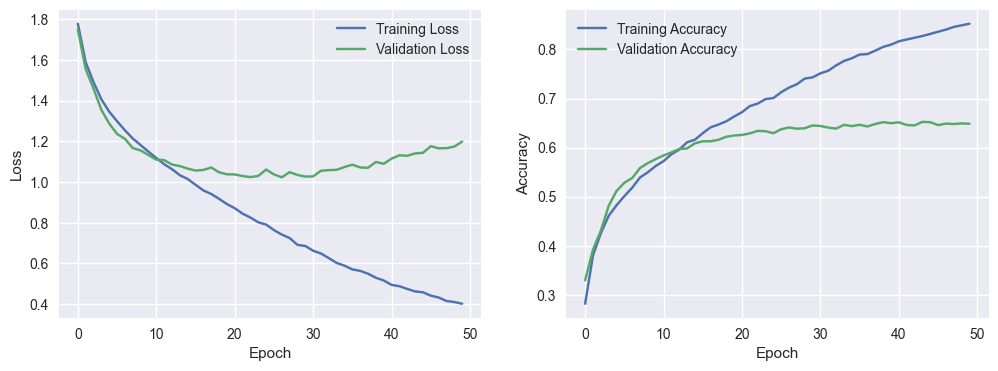

In [96]:
# Plotting the training and validation loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [97]:
torch.save(model.state_dict(), 'CNN_model.pth')